# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 01:00:35.112494: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T01:00:39.176698
2025-04-15 01:00:39.176698


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 01:00:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

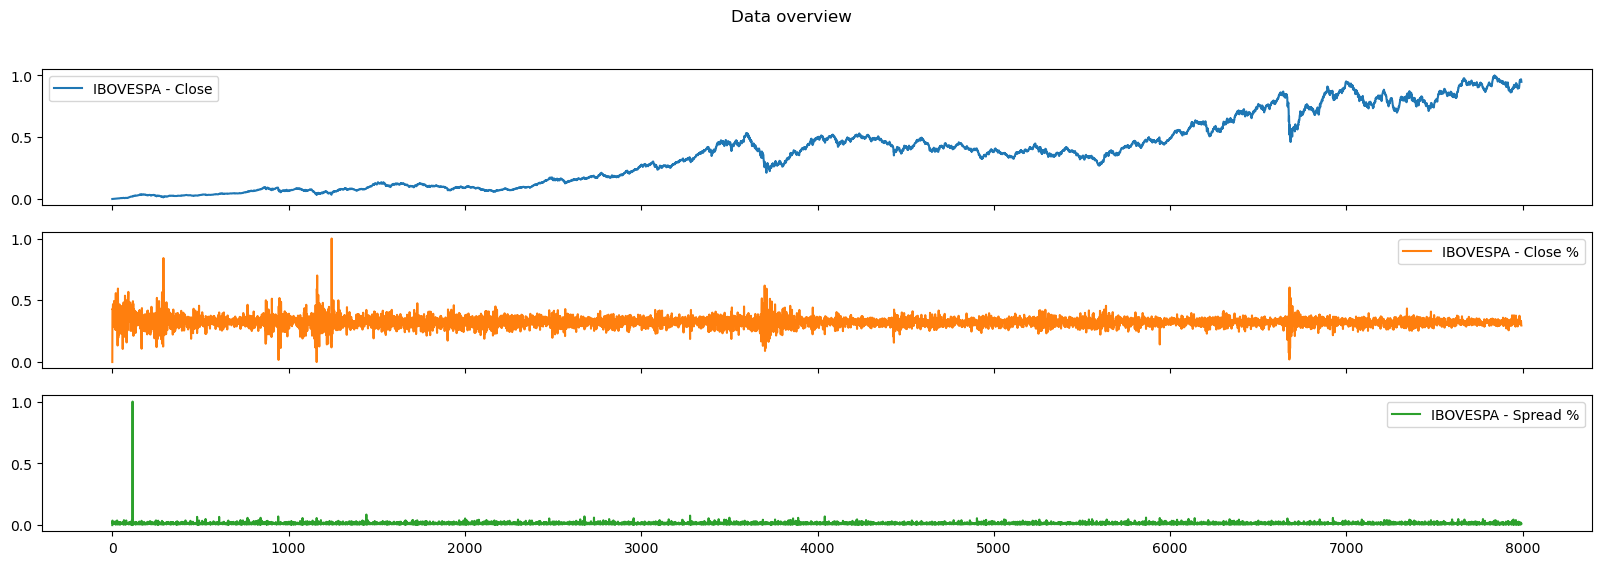

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

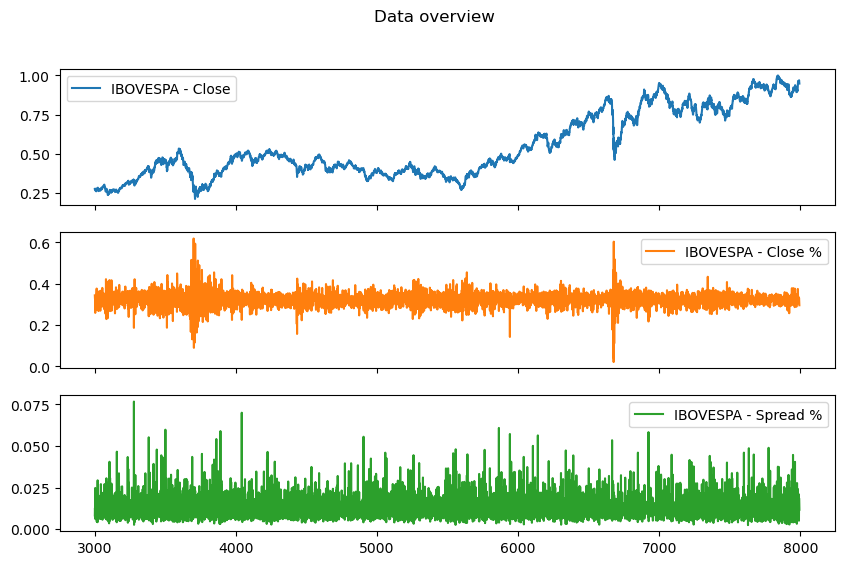

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

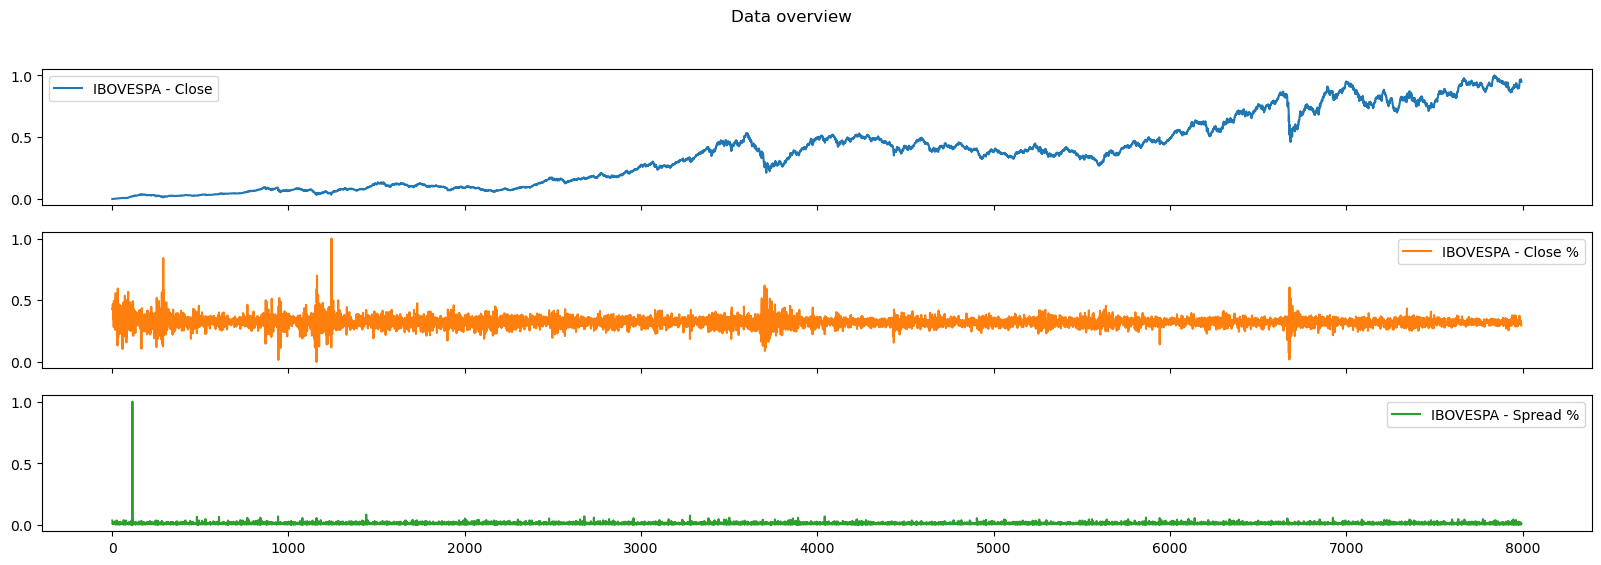

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

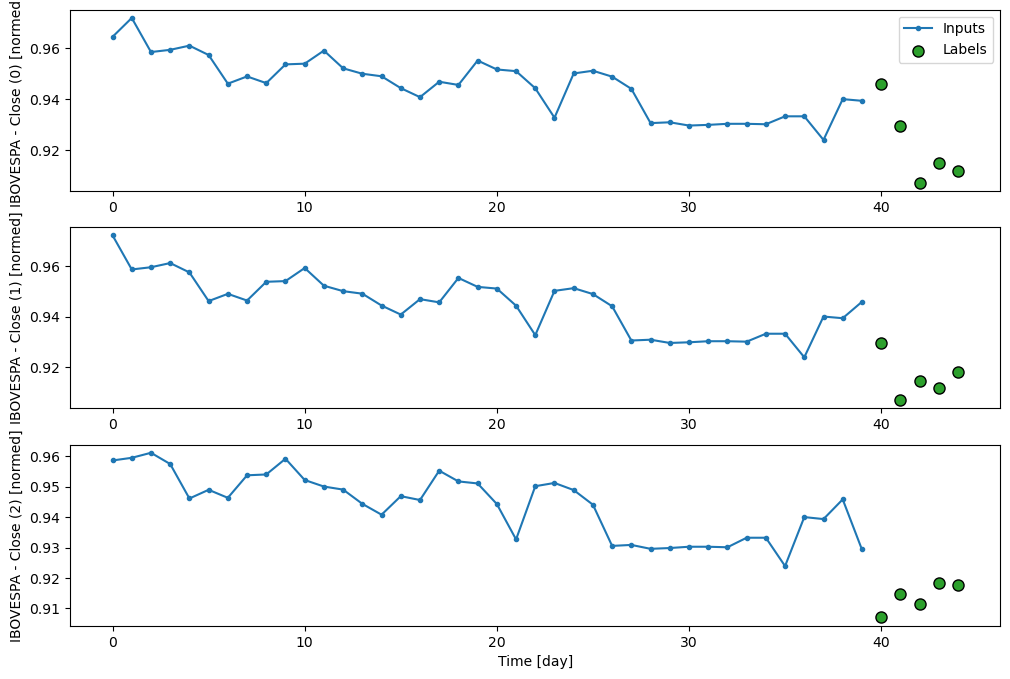

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:58 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 118.7088 - mean_squared_error: 1.7001e-04 - root_mean_squared_error: 0.0126 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 104.8011 - mean_squared_error: 1.7375e-04 - root_mean_squared_error: 0.0129

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 98.2842 - mean_squared_error: 2.3143e-04 - root_mean_squared_error: 0.0147 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 93.2553 - mean_squared_error: 2.5320e-04 - root_mean_squared_error: 0.0155

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 88.4026 - mean_squared_error: 2.5761e-04 - root_mean_squared_error: 0.0157

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 83.9056 - mean_squared_error: 2.5476e-04 - root_mean_squared_error: 0.0157

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 79.8821 - mean_squared_error: 2.4901e-04 - root_mean_squared_error: 0.0155

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 76.1370 - mean_squared_error: 2.4169e-04 - root_mean_squared_error: 0.0153

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 72.6856 - mean_squared_error: 2.3385e-04 - root_mean_squared_error: 0.0151

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.5295 - mean_squared_error: 2.2600e-04 - root_mean_squared_error: 0.0148

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 66.6847 - mean_squared_error: 2.1857e-04 - root_mean_squared_error: 0.0145

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.1275 - mean_squared_error: 2.1182e-04 - root_mean_squared_error: 0.0143

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.8111 - mean_squared_error: 2.0603e-04 - root_mean_squared_error: 0.0141

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 59.7820 - mean_squared_error: 2.0252e-04 - root_mean_squared_error: 0.0140

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.9634 - mean_squared_error: 1.9983e-04 - root_mean_squared_error: 0.0139

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.3238 - mean_squared_error: 1.9811e-04 - root_mean_squared_error: 0.0138

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.8291 - mean_squared_error: 1.9670e-04 - root_mean_squared_error: 0.0138

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.5670 - mean_squared_error: 1.9709e-04 - root_mean_squared_error: 0.0138

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.4208 - mean_squared_error: 1.9752e-04 - root_mean_squared_error: 0.0139

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.4007 - mean_squared_error: 1.9964e-04 - root_mean_squared_error: 0.0139

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.4750 - mean_squared_error: 2.0246e-04 - root_mean_squared_error: 0.0140

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.6046 - mean_squared_error: 2.0510e-04 - root_mean_squared_error: 0.0141

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.8333 - mean_squared_error: 2.2472e-04 - root_mean_squared_error: 0.0146

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.1612 - mean_squared_error: 2.5860e-04 - root_mean_squared_error: 0.0153

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.5168 - mean_squared_error: 2.8886e-04 - root_mean_squared_error: 0.0160

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.8892 - mean_squared_error: 3.1556e-04 - root_mean_squared_error: 0.0166

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 46.2771 - mean_squared_error: 3.3916e-04 - root_mean_squared_error: 0.0171

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 45.9806 - mean_squared_error: 3.5000e-04 - root_mean_squared_error: 0.0173

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 45.4009 - mean_squared_error: 3.6982e-04 - root_mean_squared_error: 0.0178

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 44.8455 - mean_squared_error: 3.8751e-04 - root_mean_squared_error: 0.0182

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 44.3169 - mean_squared_error: 4.0356e-04 - root_mean_squared_error: 0.0186

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 43.8112 - mean_squared_error: 4.1808e-04 - root_mean_squared_error: 0.0189

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 43.3309 - mean_squared_error: 4.3120e-04 - root_mean_squared_error: 0.0192

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 42.8868 - mean_squared_error: 4.4337e-04 - root_mean_squared_error: 0.0195

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 42.4537 - mean_squared_error: 4.5422e-04 - root_mean_squared_error: 0.0198

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 42.0370 - mean_squared_error: 4.6411e-04 - root_mean_squared_error: 0.0200

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 41.6461 - mean_squared_error: 4.7365e-04 - root_mean_squared_error: 0.0202

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 41.2859 - mean_squared_error: 4.8431e-04 - root_mean_squared_error: 0.0205

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 40.9544 - mean_squared_error: 4.9706e-04 - root_mean_squared_error: 0.0208

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 40.6371 - mean_squared_error: 5.0965e-04 - root_mean_squared_error: 0.0210

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 40.3231 - mean_squared_error: 5.2117e-04 - root_mean_squared_error: 0.0213

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 40.0158 - mean_squared_error: 5.3192e-04 - root_mean_squared_error: 0.0215

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 39.7110 - mean_squared_error: 5.4176e-04 - root_mean_squared_error: 0.0217

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 39.4092 - mean_squared_error: 5.5079e-04 - root_mean_squared_error: 0.0219

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 39.1096 - mean_squared_error: 5.5899e-04 - root_mean_squared_error: 0.0221

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 38.8130 - mean_squared_error: 5.6650e-04 - root_mean_squared_error: 0.0223

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 38.5202 - mean_squared_error: 5.7344e-04 - root_mean_squared_error: 0.0225

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 38.2350 - mean_squared_error: 5.8045e-04 - root_mean_squared_error: 0.0226

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 37.9548 - mean_squared_error: 5.8714e-04 - root_mean_squared_error: 0.0228

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 37.6811 - mean_squared_error: 5.9401e-04 - root_mean_squared_error: 0.0229

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 37.4169 - mean_squared_error: 6.0197e-04 - root_mean_squared_error: 0.0231

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 37.1613 - mean_squared_error: 6.1130e-04 - root_mean_squared_error: 0.0233

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 36.9108 - mean_squared_error: 6.2082e-04 - root_mean_squared_error: 0.0235

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 36.6632 - mean_squared_error: 6.2985e-04 - root_mean_squared_error: 0.0237

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 36.4179 - mean_squared_error: 6.3832e-04 - root_mean_squared_error: 0.0238

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 36.1763 - mean_squared_error: 6.4663e-04 - root_mean_squared_error: 0.0240

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 35.9422 - mean_squared_error: 6.5688e-04 - root_mean_squared_error: 0.0242

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 35.7283 - mean_squared_error: 6.7632e-04 - root_mean_squared_error: 0.0245

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 35.6273 - mean_squared_error: 6.8796e-04 - root_mean_squared_error: 0.0247

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 35.4302 - mean_squared_error: 7.1143e-04 - root_mean_squared_error: 0.0250

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 35.2370 - mean_squared_error: 7.3453e-04 - root_mean_squared_error: 0.0254

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 35.0516 - mean_squared_error: 7.6075e-04 - root_mean_squared_error: 0.0258

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 34.8758 - mean_squared_error: 7.9416e-04 - root_mean_squared_error: 0.0262

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 34.7082 - mean_squared_error: 8.3336e-04 - root_mean_squared_error: 0.0267

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 34.5457 - mean_squared_error: 8.7385e-04 - root_mean_squared_error: 0.0272

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 34.3847 - mean_squared_error: 9.1302e-04 - root_mean_squared_error: 0.0277

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 34.2252 - mean_squared_error: 9.5078e-04 - root_mean_squared_error: 0.0281

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 34.0663 - mean_squared_error: 9.8685e-04 - root_mean_squared_error: 0.0286

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 33.9077 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290    

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 33.7505 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 33.5940 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 33.4395 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 33.2864 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 33.1342 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 32.9826 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 32.8318 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 32.6823 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 32.5345 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 32.3879 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 32.2421 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 32.0977 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 31.9553 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 31.8142 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 31.6753 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 31.5374 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 31.4009 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 31.2657 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 31.1322 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 31.0014 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 30.8745 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 30.7521 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 30.6340 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 30.5196 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 30.4081 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 30.2994 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 30.1928 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 30.0873 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 29.9843 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 29.8828 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 29.7820 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 29.6824 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 29.5838 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 29.4856 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 29.3877 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 29.2923 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 29.1980 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 29.1042 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 29.0116 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 28.9202 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 28.8295 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 28.7399 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 28.6520 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 28.5646 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 28.4776 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 28.3914 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 28.3061 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 28.2213 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 28.1368 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 28.0530 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 28.0116 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425 - val_loss: 0.0174 - val_mean_absolute_error: 0.0174 - val_mean_absolute_percentage_error: 1.8639 - val_mean_squared_error: 4.9205e-04 - val_root_mean_squared_error: 0.0222 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.6356 - mean_absolute_error: 0.6356 - mean_absolute_percentage_error: 8441.5352 - mean_squared_error: 0.4040 - root_mean_squared_error: 0.6356

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6298 - mean_absolute_error: 0.6298 - mean_absolute_percentage_error: 7007.8169 - mean_squared_error: 0.3969 - root_mean_squared_error: 0.6300 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6185 - mean_absolute_error: 0.6185 - mean_absolute_percentage_error: 5922.5254 - mean_squared_error: 0.3833 - root_mean_squared_error: 0.6190

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6052 - mean_absolute_error: 0.6052 - mean_absolute_percentage_error: 5220.3228 - mean_squared_error: 0.3681 - root_mean_squared_error: 0.6062

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5901 - mean_absolute_error: 0.5901 - mean_absolute_percentage_error: 4751.7183 - mean_squared_error: 0.3519 - root_mean_squared_error: 0.5923

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5936 - mean_absolute_error: 0.5936 - mean_absolute_percentage_error: 4470.7109 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6237

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6127 - mean_absolute_error: 0.6127 - mean_absolute_percentage_error: 4313.6611 - mean_squared_error: 0.4934 - root_mean_squared_error: 0.6796

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6236 - mean_absolute_error: 0.6236 - mean_absolute_percentage_error: 4169.1963 - mean_squared_error: 0.5450 - root_mean_squared_error: 0.7141

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6283 - mean_absolute_error: 0.6283 - mean_absolute_percentage_error: 4031.4099 - mean_squared_error: 0.5748 - root_mean_squared_error: 0.7352

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6266 - mean_absolute_error: 0.6266 - mean_absolute_percentage_error: 3894.1016 - mean_squared_error: 0.5898 - root_mean_squared_error: 0.7469

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6204 - mean_absolute_error: 0.6204 - mean_absolute_percentage_error: 3759.4192 - mean_squared_error: 0.5953 - root_mean_squared_error: 0.7524

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6111 - mean_absolute_error: 0.6111 - mean_absolute_percentage_error: 3629.4900 - mean_squared_error: 0.5948 - root_mean_squared_error: 0.7537

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6001 - mean_absolute_error: 0.6001 - mean_absolute_percentage_error: 3505.6826 - mean_squared_error: 0.5906 - root_mean_squared_error: 0.7523

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5881 - mean_absolute_error: 0.5881 - mean_absolute_percentage_error: 3388.6919 - mean_squared_error: 0.5839 - root_mean_squared_error: 0.7490

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5758 - mean_absolute_error: 0.5758 - mean_absolute_percentage_error: 3278.6641 - mean_squared_error: 0.5758 - root_mean_squared_error: 0.7444

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5634 - mean_absolute_error: 0.5634 - mean_absolute_percentage_error: 3175.3689 - mean_squared_error: 0.5667 - root_mean_squared_error: 0.7390

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5513 - mean_absolute_error: 0.5513 - mean_absolute_percentage_error: 3078.4817 - mean_squared_error: 0.5571 - root_mean_squared_error: 0.7329

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_absolute_percentage_error: 2987.5801 - mean_squared_error: 0.5473 - root_mean_squared_error: 0.7265

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5278 - mean_absolute_error: 0.5278 - mean_absolute_percentage_error: 2902.3022 - mean_squared_error: 0.5374 - root_mean_squared_error: 0.7198

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5167 - mean_absolute_error: 0.5167 - mean_absolute_percentage_error: 2822.1743 - mean_squared_error: 0.5275 - root_mean_squared_error: 0.7130

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5060 - mean_absolute_error: 0.5060 - mean_absolute_percentage_error: 2746.7722 - mean_squared_error: 0.5178 - root_mean_squared_error: 0.7062

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 2675.6589 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.6994

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4858 - mean_absolute_error: 0.4858 - mean_absolute_percentage_error: 2608.4922 - mean_squared_error: 0.4990 - root_mean_squared_error: 0.6926

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4763 - mean_absolute_error: 0.4763 - mean_absolute_percentage_error: 2544.9478 - mean_squared_error: 0.4899 - root_mean_squared_error: 0.6859

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - mean_absolute_percentage_error: 2484.7393 - mean_squared_error: 0.4811 - root_mean_squared_error: 0.6792

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4583 - mean_absolute_error: 0.4583 - mean_absolute_percentage_error: 2427.6067 - mean_squared_error: 0.4725 - root_mean_squared_error: 0.6727

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - mean_absolute_percentage_error: 2373.3188 - mean_squared_error: 0.4643 - root_mean_squared_error: 0.6663

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4417 - mean_absolute_error: 0.4417 - mean_absolute_percentage_error: 2321.6863 - mean_squared_error: 0.4563 - root_mean_squared_error: 0.6601

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - mean_absolute_percentage_error: 2272.5127 - mean_squared_error: 0.4485 - root_mean_squared_error: 0.6539

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4264 - mean_absolute_error: 0.4264 - mean_absolute_percentage_error: 2225.6306 - mean_squared_error: 0.4410 - root_mean_squared_error: 0.6479

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 2180.8877 - mean_squared_error: 0.4338 - root_mean_squared_error: 0.6420

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 2138.1482 - mean_squared_error: 0.4267 - root_mean_squared_error: 0.6363

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4055 - mean_absolute_error: 0.4055 - mean_absolute_percentage_error: 2097.2683 - mean_squared_error: 0.4200 - root_mean_squared_error: 0.6307

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2058.1428 - mean_squared_error: 0.4134 - root_mean_squared_error: 0.6252

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 2020.6455 - mean_squared_error: 0.4070 - root_mean_squared_error: 0.6199

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 1984.6810 - mean_squared_error: 0.4009 - root_mean_squared_error: 0.6147

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 1950.1511 - mean_squared_error: 0.3949 - root_mean_squared_error: 0.6096

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 1916.9515 - mean_squared_error: 0.3892 - root_mean_squared_error: 0.6046

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1885.0015 - mean_squared_error: 0.3836 - root_mean_squared_error: 0.5997

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 1854.2340 - mean_squared_error: 0.3782 - root_mean_squared_error: 0.5950

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1824.5847 - mean_squared_error: 0.3729 - root_mean_squared_error: 0.5903

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1795.9890 - mean_squared_error: 0.3678 - root_mean_squared_error: 0.5858

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1768.3916 - mean_squared_error: 0.3629 - root_mean_squared_error: 0.5813

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1741.7366 - mean_squared_error: 0.3581 - root_mean_squared_error: 0.5770

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 1715.9785 - mean_squared_error: 0.3534 - root_mean_squared_error: 0.5727

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1691.0676 - mean_squared_error: 0.3489 - root_mean_squared_error: 0.5686

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 1666.9631 - mean_squared_error: 0.3445 - root_mean_squared_error: 0.5645

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 1643.6262 - mean_squared_error: 0.3402 - root_mean_squared_error: 0.5605

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 1621.0168 - mean_squared_error: 0.3360 - root_mean_squared_error: 0.5566

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1599.1007 - mean_squared_error: 0.3320 - root_mean_squared_error: 0.5528

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1577.8433 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5491

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1557.2145 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5454

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 1547.1274 - mean_squared_error: 0.3223 - root_mean_squared_error: 0.5436

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1527.3898 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5401

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1508.2126 - mean_squared_error: 0.3150 - root_mean_squared_error: 0.5366

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1489.5721 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5332

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1471.4447 - mean_squared_error: 0.3081 - root_mean_squared_error: 0.5298

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1453.8121 - mean_squared_error: 0.3047 - root_mean_squared_error: 0.5266

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1436.6660 - mean_squared_error: 0.3015 - root_mean_squared_error: 0.5234

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1419.9835 - mean_squared_error: 0.2983 - root_mean_squared_error: 0.5202

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1403.7361 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5172

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1387.9047 - mean_squared_error: 0.2922 - root_mean_squared_error: 0.5141

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1372.4772 - mean_squared_error: 0.2892 - root_mean_squared_error: 0.5112

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1357.4384 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5083

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1342.7721 - mean_squared_error: 0.2836 - root_mean_squared_error: 0.5054

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1328.4620 - mean_squared_error: 0.2808 - root_mean_squared_error: 0.5027

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1314.4938 - mean_squared_error: 0.2781 - root_mean_squared_error: 0.4999

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1300.8529 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.4972

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 1287.5281 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.4946

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1274.5112 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4920

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1261.7931 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4894

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1249.3604 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.4869

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1237.2010 - mean_squared_error: 0.2632 - root_mean_squared_error: 0.4844

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1225.3064 - mean_squared_error: 0.2609 - root_mean_squared_error: 0.4820

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1213.6665 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4796

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1202.2737 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4773

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1191.1194 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4749

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1180.1962 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4727

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1169.4957 - mean_squared_error: 0.2499 - root_mean_squared_error: 0.4704

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1159.0115 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4682

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1148.7368 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4660

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1138.6653 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4638

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1128.7910 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4617

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1119.1075 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4596

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1109.6093 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4576

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1100.2902 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4555

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1091.1461 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4535

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1082.1729 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4515

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1073.3649 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4496

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1064.7168 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4477

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1056.2255 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4458

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1047.8866 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4439

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1039.6962 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4421

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1031.6493 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4402

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1023.7424 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4384

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1015.9714 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4367

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1008.3328 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4349

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 1000.8225 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4332

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 993.4368 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4315 

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 986.1723 - mean_squared_error: 0.2135 - root_mean_squared_error: 0.4298

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 979.0261 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4281

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 971.9949 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4265

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 965.0759 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4249

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 958.2663 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4233

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 951.5643 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4217

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 944.9693 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4201

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 938.4771 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4186

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 932.0845 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4171

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 925.7892 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4156

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 919.5889 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4141

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 913.4815 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4126

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 907.4644 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4112

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 901.5358 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4097

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 895.6933 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4083

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 889.9352 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4069

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 884.2595 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4055

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 878.6642 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4042

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 873.1476 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4028

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 867.7082 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4015

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 862.3546 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4002 - val_loss: 0.0743 - val_mean_absolute_error: 0.0743 - val_mean_absolute_percentage_error: 7.8819 - val_mean_squared_error: 0.0061 - val_root_mean_squared_error: 0.0779 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.6471 - mean_absolute_error: 0.6471 - mean_absolute_percentage_error: 8593.8945 - mean_squared_error: 0.4187 - root_mean_squared_error: 0.6471

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.6474 - mean_absolute_error: 0.6474 - mean_absolute_percentage_error: 7177.4390 - mean_squared_error: 0.4192 - root_mean_squared_error: 0.6474 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6443 - mean_absolute_error: 0.6443 - mean_absolute_percentage_error: 6098.2095 - mean_squared_error: 0.4152 - root_mean_squared_error: 0.6444

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6400 - mean_absolute_error: 0.6400 - mean_absolute_percentage_error: 5411.0933 - mean_squared_error: 0.4098 - root_mean_squared_error: 0.6401

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6346 - mean_absolute_error: 0.6346 - mean_absolute_percentage_error: 4974.9927 - mean_squared_error: 0.4032 - root_mean_squared_error: 0.6349

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.6279 - mean_absolute_error: 0.6279 - mean_absolute_percentage_error: 4652.0137 - mean_squared_error: 0.3953 - root_mean_squared_error: 0.6285

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6198 - mean_absolute_error: 0.6198 - mean_absolute_percentage_error: 4389.1431 - mean_squared_error: 0.3861 - root_mean_squared_error: 0.6209

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6103 - mean_absolute_error: 0.6103 - mean_absolute_percentage_error: 4166.1914 - mean_squared_error: 0.3759 - root_mean_squared_error: 0.6123

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5992 - mean_absolute_error: 0.5992 - mean_absolute_percentage_error: 3968.6875 - mean_squared_error: 0.3648 - root_mean_squared_error: 0.6027

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5862 - mean_absolute_error: 0.5862 - mean_absolute_percentage_error: 3788.7556 - mean_squared_error: 0.3531 - root_mean_squared_error: 0.5922

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5737 - mean_absolute_error: 0.5737 - mean_absolute_percentage_error: 3627.3809 - mean_squared_error: 0.3432 - root_mean_squared_error: 0.5833

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5629 - mean_absolute_error: 0.5629 - mean_absolute_percentage_error: 3484.6438 - mean_squared_error: 0.3351 - root_mean_squared_error: 0.5761

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5515 - mean_absolute_error: 0.5515 - mean_absolute_percentage_error: 3352.5920 - mean_squared_error: 0.3268 - root_mean_squared_error: 0.5685

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5399 - mean_absolute_error: 0.5399 - mean_absolute_percentage_error: 3230.4124 - mean_squared_error: 0.3184 - root_mean_squared_error: 0.5607

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5286 - mean_absolute_error: 0.5286 - mean_absolute_percentage_error: 3117.5745 - mean_squared_error: 0.3103 - root_mean_squared_error: 0.5528

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5177 - mean_absolute_error: 0.5177 - mean_absolute_percentage_error: 3013.4429 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5452

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5069 - mean_absolute_error: 0.5069 - mean_absolute_percentage_error: 2916.4746 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5377

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4964 - mean_absolute_error: 0.4964 - mean_absolute_percentage_error: 2826.1467 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5303

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4862 - mean_absolute_error: 0.4862 - mean_absolute_percentage_error: 2742.0042 - mean_squared_error: 0.2805 - root_mean_squared_error: 0.5231

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4764 - mean_absolute_error: 0.4764 - mean_absolute_percentage_error: 2663.2896 - mean_squared_error: 0.2738 - root_mean_squared_error: 0.5161

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4668 - mean_absolute_error: 0.4668 - mean_absolute_percentage_error: 2589.4250 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.5094

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 2554.1992 - mean_squared_error: 0.2643 - root_mean_squared_error: 0.5061

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4532 - mean_absolute_error: 0.4532 - mean_absolute_percentage_error: 2486.8921 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4997

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4446 - mean_absolute_error: 0.4446 - mean_absolute_percentage_error: 2423.4270 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4934

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2363.4766 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4874

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 2306.7866 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4816

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4205 - mean_absolute_error: 0.4205 - mean_absolute_percentage_error: 2253.0945 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4759

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4131 - mean_absolute_error: 0.4131 - mean_absolute_percentage_error: 2202.1477 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2153.7192 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4652

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2107.6340 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4601

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 2063.7153 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4552

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 2021.8057 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4504

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 1981.7684 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4458

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3737 - mean_absolute_error: 0.3737 - mean_absolute_percentage_error: 1943.4821 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4413

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1906.8322 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4369

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 1871.7208 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4327

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1838.0422 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4286

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 1805.7051 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4246

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3465 - mean_absolute_error: 0.3465 - mean_absolute_percentage_error: 1774.6255 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4207

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 1744.7307 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4169

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 1715.9543 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4132

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3322 - mean_absolute_error: 0.3322 - mean_absolute_percentage_error: 1688.2321 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4096

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1661.5023 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4062

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1635.7129 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.4028

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1610.8112 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3995

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1586.7499 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3962

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1563.4860 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3931

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 1540.9801 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3900

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1519.1940 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3870

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1498.0941 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3841

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1477.6458 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3813

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1457.8165 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3785

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1448.1256 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3771

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1429.1750 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3744

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1410.7773 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3718

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1392.9073 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3692

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1375.5399 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3667

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1358.6542 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3642

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1342.2377 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3618

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1326.2791 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3595

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 1310.7548 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3572

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1295.6394 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3550

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1280.9125 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3528

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1266.5591 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3506

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1252.5656 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3485

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1238.9170 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3465

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1225.6002 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3444

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1212.6019 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3425

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1199.9102 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3405

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1187.5149 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3386

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1175.4078 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3367

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1163.5775 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3349

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1152.0121 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3331

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1140.7023 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3313

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1129.6393 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3295

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1118.8153 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3278

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1108.2224 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3261

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - mean_absolute_percentage_error: 1097.8525 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3245

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1087.6989 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3228

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1077.7537 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3212

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1068.0107 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3196

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1058.4637 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3180

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1049.1071 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3165

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1044.4982 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3157

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1039.9346 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3150

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1035.4154 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3142

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1030.9401 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3135

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1022.1182 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3120

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1013.4642 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3106

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1004.9738 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3091

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 996.6426 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3077 

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 988.4650 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3064

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 980.4371 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3050

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 972.5553 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.3036

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 964.8152 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.3023

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 957.2126 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3010

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 949.7430 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2997

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 942.4030 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.2984

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 935.1887 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.2972

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 928.0969 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2959

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 921.1254 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2947

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 914.2704 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2935

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 907.5287 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2923

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 900.8975 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2911

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 894.3742 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2900

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 887.9557 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2888

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 881.6395 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2877

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 875.4249 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2866

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 869.3091 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2855

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 863.2891 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2844

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 857.3617 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2834

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 851.5247 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2823

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 845.7761 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2813

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 840.1137 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2802

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 834.5358 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2792

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 829.0400 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2782

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 826.3224 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.2777

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 823.6246 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2772

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 818.2877 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2763

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 813.0277 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2753

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 807.8427 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2743

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 802.7309 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.2734

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 797.6938 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2725

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 795.2066 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2720 - val_loss: 0.0172 - val_mean_absolute_error: 0.0172 - val_mean_absolute_percentage_error: 1.8178 - val_mean_squared_error: 4.6535e-04 - val_root_mean_squared_error: 0.0216 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.3951 - mean_absolute_error: 0.3951 - mean_absolute_percentage_error: 5246.4521 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3952

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 4371.7529 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3941 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 3706.7239 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3902

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 3279.9800 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3853

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.3821 - mean_absolute_error: 0.3821 - mean_absolute_percentage_error: 3129.1050 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3825

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 3002.2180 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3795

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 2891.2019 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3763

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.3717 - mean_absolute_error: 0.3717 - mean_absolute_percentage_error: 2792.1289 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3729

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 2701.6201 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3692

 13/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 2618.2278 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3654

 14/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.3584 - mean_absolute_error: 0.3584 - mean_absolute_percentage_error: 2540.7214 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3613

 15/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 2467.7473 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3572

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 2333.0725 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3488

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 2271.4932 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3447

 19/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 2213.6677 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3406

 20/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 2159.3372 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3367

 21/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 2108.1802 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3329

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 2059.8550 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3292

 23/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 2014.0120 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3257

 24/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1970.3844 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3222

 25/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1928.7556 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.3188

 26/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1888.9678 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.3155

 27/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1850.9438 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.3123

 29/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1779.8613 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.3061

 31/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1714.7997 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.3002

 32/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1684.2605 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2974

 33/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1654.9314 - mean_squared_error: 0.0909 - root_mean_squared_error: 0.2947

 35/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1599.5747 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2895

 36/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1573.4451 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2870

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1548.2854 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2845

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1524.0547 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2821

 39/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1500.6890 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2798

 41/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1456.3383 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2753

 43/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1414.8497 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2710

 45/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1375.9606 - mean_squared_error: 0.0763 - root_mean_squared_error: 0.2669

 47/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1339.4146 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2630

 49/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1304.9935 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2593

 50/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1288.5225 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2575

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1272.5164 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2557 

 52/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1256.9535 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2540

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1227.0819 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2506 

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1198.7751 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2474

 57/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1185.1692 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2459

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1171.9075 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2443

 59/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 1158.9778 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2428

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 1146.3694 - mean_squared_error: 0.0640 - root_mean_squared_error: 0.2414

 61/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 1134.0702 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2399

 63/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 1110.3501 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2371

 65/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 1087.7308 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2344

 66/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 1076.8134 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2331

 67/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 1066.1443 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2318

 69/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 1045.5088 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2292

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 1025.7640 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2268

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 1006.8483 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2244

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 988.7039 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2221 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 971.2823 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2199

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 954.5402 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2178

 80/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 946.4113 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2167

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 938.4372 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2157

 82/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 930.6135 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2147

 83/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.1692 - mean_absolute_error: 0.1692 - mean_absolute_percentage_error: 922.9358 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2137

 84/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 915.3997 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2127

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 908.0013 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2117

 86/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.1656 - mean_absolute_error: 0.1656 - mean_absolute_percentage_error: 900.7366 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2107

 87/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 893.6024 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2098

 88/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 886.5947 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2089

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 879.7098 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2079

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 866.2965 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2061

 93/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 853.3378 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2044

 95/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 840.8090 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2027

 97/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 828.6891 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2010

 99/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 816.9583 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1994

101/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 805.5952 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.1978

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 794.5827 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1963

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 783.9047 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1948

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 773.5449 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1933

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 763.4888 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1919

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 753.7231 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1905

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 748.9450 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1898

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 744.2349 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1891

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 739.5913 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1884

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 735.0136 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1877

116/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 730.4999 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1871

118/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 721.6572 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.1858

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 713.0535 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1845

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 708.8387 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1839

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 704.6804 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1833

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 700.5776 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1827

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 696.5289 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1821

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 688.5892 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1809

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 684.6957 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1804

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 680.8513 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1798

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 677.0551 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1792

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 669.6038 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1781

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 665.9470 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1776

134/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 658.7667 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1765

135/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 655.2414 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1760

136/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 651.7583 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1754

138/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 644.9153 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1744

139/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 641.5540 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1739

140/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 638.2319 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1734

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 631.7031 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1724

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 625.3237 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1714

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 622.1880 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1709

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 619.0875 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1705

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 612.9890 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1695

150/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 607.0238 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1686

152/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 601.1879 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1677

154/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 595.4775 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1668

156/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 589.8876 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1659

158/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 584.4137 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1650

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 579.0526 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1642

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 573.8011 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1634

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 568.6558 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1625

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 563.6129 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1617

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 558.6693 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1609

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 553.8217 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1601

172/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 549.0677 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1594

174/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 544.4043 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1586

176/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 539.8291 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1579

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 535.3403 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1571

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 530.9357 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1564

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 526.6126 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1557

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 522.3685 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1550

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 518.2003 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1543

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 514.1057 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1536

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 510.0828 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1530

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 506.1296 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1523

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 502.2444 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1516

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 498.4256 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1510

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 494.6713 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1504

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 490.9801 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1497

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 487.3503 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1491

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 483.7801 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1485

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 480.2677 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1479

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 476.8123 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1473

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 473.4136 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1468

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 470.0688 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1462

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 466.7767 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1456

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 463.5362 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1451

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 460.3463 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1446

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 457.2055 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1440

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 454.1122 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1435

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 451.0656 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1430

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 448.0644 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1425

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 445.1075 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1420

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 442.1940 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1415

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 439.3228 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1410

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 436.4929 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1406

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 433.7033 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1401

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 430.9580 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1396 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.3990 - val_mean_squared_error: 2.8477e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 3506.3572 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2641

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 2917.2754 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2626 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 2468.1594 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2586

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 2176.8884 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2536

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1981.7133 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2478

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1830.6210 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2413

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1703.4178 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2344

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1592.9023 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2275

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1498.2792 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2210

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1416.7742 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2151

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 1345.4374 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.2097

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 1281.8851 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.2046

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 1224.6290 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1998

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 1172.9064 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1953

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 1125.9807 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1911

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 1083.1534 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1872

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 1063.0831 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1854

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 1025.4023 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1818

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 990.7136 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1784 

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 958.6180 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1752

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 928.8091 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1722

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 901.0352 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1694

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 875.0802 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1667

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 850.7742 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1641

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 827.9501 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1616

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 806.4744 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1593

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 786.2247 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1570

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - mean_absolute_percentage_error: 767.0971 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1549

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 748.9974 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1528

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 731.8411 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1508

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 715.5587 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1489

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 700.0775 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1471

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 685.3375 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1453

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 671.2875 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1437

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 657.8788 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1420

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 645.0641 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1405

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 632.8022 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1389

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 621.0560 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1375

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 609.7919 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1360

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 598.9800 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1347

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 588.5936 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1333

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 578.6058 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1320

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 568.9932 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1308

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 559.7341 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1296

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 550.8092 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1284

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 542.1996 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1272

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 533.8881 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1261

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 525.8587 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1250

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 518.0972 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1240

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 510.5897 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1229

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 503.3231 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1219

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 496.2856 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1209

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 489.4657 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1200

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 482.8536 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1191

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 476.4392 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1182

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 470.2137 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1173

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 464.1685 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1164

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 458.2957 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1156

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 452.5894 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1147

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 447.0409 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1139

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 441.6437 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1132

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 436.3917 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1124

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 431.2782 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1116

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 426.2976 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1109

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 421.4449 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1102

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 416.7147 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1095

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 412.1021 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1088

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 407.6027 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1081

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 403.2121 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1074

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 398.9264 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1068

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 394.7420 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1062

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 390.6548 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1055

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 386.6616 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1049

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 382.7588 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1043

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 378.9432 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1037

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 375.2117 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1031

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 371.5614 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1026

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 369.7660 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1023

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 366.2328 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1017

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 362.7744 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1012

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 359.3882 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1006

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 356.0719 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1001

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 352.8234 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0996

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 349.6407 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0991

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 346.5215 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0986

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 343.4640 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0981

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 340.4661 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0976

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 337.5262 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0971

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 334.6427 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0967

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 331.8139 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0962

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 329.0382 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0957

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 326.3139 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0953

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 323.6396 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0948

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 321.0140 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0944

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 318.4355 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0940

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 315.9030 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0935

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 313.4152 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0931

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 310.9708 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0927

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 308.5690 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0923

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 306.2085 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0919

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 303.8879 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0915

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 301.6064 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0911

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 299.3628 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0908

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 297.1561 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0904

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 294.9853 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0900

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 292.8502 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0896

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 290.7495 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0893

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 288.6822 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0889

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 286.6476 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0886

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 284.6449 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0882

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 282.6732 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0879

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 280.7320 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0876

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 278.8204 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0873

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 276.9378 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0869

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 275.0834 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0866

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 273.2565 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0863

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 271.4566 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0860

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 269.6831 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0857

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 267.9352 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0854

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 266.2134 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0851

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 265.3632 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0850 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304 - val_mean_absolute_percentage_error: 3.2234 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0335 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1372.9141 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1046

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 1136.9795 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1034 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 952.1539 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 824.8792 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0942

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 732.6434 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 664.9855 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0854

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 613.0703 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0821

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 570.6559 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0793

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 534.5190 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 503.7113 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0743

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 476.9491 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0722

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 453.2610 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0703

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 432.2010 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0685

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 413.2835 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0669

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 396.1852 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0654

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 380.6762 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0640

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 366.4936 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0627

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 353.5063 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0614

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 341.5822 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0603

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 330.5750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 320.3559 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 310.8345 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0572

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 301.9386 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 293.6073 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 285.7868 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 278.4277 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0538

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 271.4884 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 264.9337 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 258.7313 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 252.8522 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 247.2728 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 241.9679 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 236.9176 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 232.1047 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 227.5113 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 223.1213 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 218.9203 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 214.8952 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 211.0345 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 207.3289 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 203.7686 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 200.3442 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 197.0477 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 193.8722 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 190.8108 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 189.3208 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 186.4188 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 183.6160 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 180.9076 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 178.2888 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 175.7546 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 173.3011 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 170.9239 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 168.6198 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 166.3852 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 164.2171 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 162.1121 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 160.0677 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 158.0825 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 156.1535 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 154.2774 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 152.4521 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 150.6752 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 148.9446 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 147.2585 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 145.6151 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 144.0126 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 142.4495 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 140.9242 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 139.4354 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 137.9820 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 136.5625 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 135.1757 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 133.8205 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 132.4957 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 131.2002 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 129.9329 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 128.6931 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 127.4797 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 126.2918 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 125.1286 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 123.9893 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 122.8733 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 121.7800 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 120.7085 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 119.6580 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 118.6280 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 117.6179 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 116.6271 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 115.6552 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 114.7013 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 113.7651 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 112.8459 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 111.9434 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 111.0571 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 110.1864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 109.3310 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 108.4907 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 107.6648 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 106.8531 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 106.0554 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 105.2709 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 104.4995 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 103.7406 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 102.9944 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 102.2605 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 101.8980 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 101.1816 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 100.4768 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 99.7829 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310 

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 99.4401 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 98.7623 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 98.0950 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 97.4380 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 96.7911 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 96.1538 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 95.5260 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 94.9076 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 94.2983 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 93.6978 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 93.1070 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247 - val_mean_absolute_percentage_error: 2.6151 - val_mean_squared_error: 8.1015e-04 - val_root_mean_squared_error: 0.0285 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 1038.0839 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0795

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 856.5653 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0781  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 713.4708 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0742

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 613.6956 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0698

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 545.7816 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 497.6497 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 460.1268 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 428.6586 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 402.3613 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 379.9483 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 360.2419 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 342.8744 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0527

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 327.3656 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 320.1956 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 306.9184 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0498

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 294.8797 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 283.8859 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 273.8001 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0469

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 264.5373 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 256.0069 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 248.0948 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 240.7242 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 233.8369 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 227.3848 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 221.3275 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 215.6304 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 210.2593 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 205.1868 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 200.3865 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 195.8361 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 191.5184 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 187.4135 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 183.5055 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 179.7814 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 176.2286 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 172.8340 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 171.1925 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 168.0141 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 164.9673 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 162.0438 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 159.2367 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 156.5393 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 153.9443 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 151.4454 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 149.0374 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 146.7155 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 144.4747 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 142.3111 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 140.2201 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 138.1992 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 136.2443 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 134.3518 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 132.5189 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 130.7421 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.0194 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.3481 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 125.7256 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 124.1499 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 122.6195 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 121.1337 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 119.6892 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 118.2841 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.9169 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 115.5854 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 114.2884 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 113.0247 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.7926 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.5909 - mean_squared_error: 9.9653e-04 - root_mean_squared_error: 0.0288

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 109.4185 - mean_squared_error: 9.8760e-04 - root_mean_squared_error: 0.0286

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 108.2741 - mean_squared_error: 9.7888e-04 - root_mean_squared_error: 0.0285

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.1571 - mean_squared_error: 9.7041e-04 - root_mean_squared_error: 0.0284

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 106.0664 - mean_squared_error: 9.6220e-04 - root_mean_squared_error: 0.0283

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 105.0008 - mean_squared_error: 9.5418e-04 - root_mean_squared_error: 0.0281

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 104.4773 - mean_squared_error: 9.5026e-04 - root_mean_squared_error: 0.0281

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 103.4480 - mean_squared_error: 9.4255e-04 - root_mean_squared_error: 0.0280

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 102.4416 - mean_squared_error: 9.3502e-04 - root_mean_squared_error: 0.0279

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.4573 - mean_squared_error: 9.2763e-04 - root_mean_squared_error: 0.0277

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 100.4942 - mean_squared_error: 9.2038e-04 - root_mean_squared_error: 0.0276

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 99.5517 - mean_squared_error: 9.1328e-04 - root_mean_squared_error: 0.0275 

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 98.6291 - mean_squared_error: 9.0632e-04 - root_mean_squared_error: 0.0274

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 97.7257 - mean_squared_error: 8.9948e-04 - root_mean_squared_error: 0.0273

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 96.8410 - mean_squared_error: 8.9277e-04 - root_mean_squared_error: 0.0272

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 95.9743 - mean_squared_error: 8.8619e-04 - root_mean_squared_error: 0.0271

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 95.1252 - mean_squared_error: 8.7974e-04 - root_mean_squared_error: 0.0270

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.2933 - mean_squared_error: 8.7345e-04 - root_mean_squared_error: 0.0269

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.4778 - mean_squared_error: 8.6727e-04 - root_mean_squared_error: 0.0268

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 92.6782 - mean_squared_error: 8.6119e-04 - root_mean_squared_error: 0.0267

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 91.8940 - mean_squared_error: 8.5523e-04 - root_mean_squared_error: 0.0266

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.1248 - mean_squared_error: 8.4936e-04 - root_mean_squared_error: 0.0265

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.3703 - mean_squared_error: 8.4361e-04 - root_mean_squared_error: 0.0264

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 89.6299 - mean_squared_error: 8.3797e-04 - root_mean_squared_error: 0.0264

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 88.9032 - mean_squared_error: 8.3241e-04 - root_mean_squared_error: 0.0263

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.1897 - mean_squared_error: 8.2696e-04 - root_mean_squared_error: 0.0262

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 87.4891 - mean_squared_error: 8.2159e-04 - root_mean_squared_error: 0.0261

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 86.8010 - mean_squared_error: 8.1632e-04 - root_mean_squared_error: 0.0260

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.1251 - mean_squared_error: 8.1114e-04 - root_mean_squared_error: 0.0259

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.4610 - mean_squared_error: 8.0605e-04 - root_mean_squared_error: 0.0258

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 84.8085 - mean_squared_error: 8.0104e-04 - root_mean_squared_error: 0.0258

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.1672 - mean_squared_error: 7.9614e-04 - root_mean_squared_error: 0.0257

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 83.5368 - mean_squared_error: 7.9133e-04 - root_mean_squared_error: 0.0256

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 82.9172 - mean_squared_error: 7.8663e-04 - root_mean_squared_error: 0.0255

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 82.3080 - mean_squared_error: 7.8203e-04 - root_mean_squared_error: 0.0255

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 81.7089 - mean_squared_error: 7.7751e-04 - root_mean_squared_error: 0.0254

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 81.4130 - mean_squared_error: 7.7529e-04 - root_mean_squared_error: 0.0253

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 81.1196 - mean_squared_error: 7.7308e-04 - root_mean_squared_error: 0.0253

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 80.5399 - mean_squared_error: 7.6873e-04 - root_mean_squared_error: 0.0252

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 79.9697 - mean_squared_error: 7.6461e-04 - root_mean_squared_error: 0.0252

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 79.4091 - mean_squared_error: 7.6077e-04 - root_mean_squared_error: 0.0251

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 78.8573 - mean_squared_error: 7.5700e-04 - root_mean_squared_error: 0.0251

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 78.3144 - mean_squared_error: 7.5337e-04 - root_mean_squared_error: 0.0250

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 77.7801 - mean_squared_error: 7.4993e-04 - root_mean_squared_error: 0.0249

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 77.2540 - mean_squared_error: 7.4656e-04 - root_mean_squared_error: 0.0249

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 76.7362 - mean_squared_error: 7.4335e-04 - root_mean_squared_error: 0.0249

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 76.2264 - mean_squared_error: 7.4031e-04 - root_mean_squared_error: 0.0248

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 75.7243 - mean_squared_error: 7.3736e-04 - root_mean_squared_error: 0.0248

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 75.2299 - mean_squared_error: 7.3453e-04 - root_mean_squared_error: 0.0247

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 74.7428 - mean_squared_error: 7.3175e-04 - root_mean_squared_error: 0.0247

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 74.2629 - mean_squared_error: 7.2904e-04 - root_mean_squared_error: 0.0247

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 73.7900 - mean_squared_error: 7.2643e-04 - root_mean_squared_error: 0.0246

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 73.3241 - mean_squared_error: 7.2388e-04 - root_mean_squared_error: 0.0246

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 72.8649 - mean_squared_error: 7.2143e-04 - root_mean_squared_error: 0.0246

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 72.4130 - mean_squared_error: 7.1903e-04 - root_mean_squared_error: 0.0245 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 1.7697 - val_mean_squared_error: 4.2124e-04 - val_root_mean_squared_error: 0.0205 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 831.3654 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0635

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 683.3204 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0620 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 566.1972 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0583

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 485.1669 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 432.3320 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 394.5935 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 364.1678 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 339.3080 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 318.7179 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 300.8929 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 292.8606 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 285.3575 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 271.6400 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 259.3739 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 248.3514 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 238.3596 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 229.2862 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 220.9774 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 213.3521 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 206.3398 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 199.8667 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 193.8490 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 188.2389 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 182.9969 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 178.0836 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 173.4692 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 169.1209 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 165.0157 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 161.1351 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 157.4595 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 153.9718 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 150.6593 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 147.5070 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 144.5028 - mean_squared_error: 9.8203e-04 - root_mean_squared_error: 0.0294

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.6376 - mean_squared_error: 9.6308e-04 - root_mean_squared_error: 0.0291

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 138.9007 - mean_squared_error: 9.4495e-04 - root_mean_squared_error: 0.0288

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 136.2826 - mean_squared_error: 9.2757e-04 - root_mean_squared_error: 0.0285

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 133.7751 - mean_squared_error: 9.1091e-04 - root_mean_squared_error: 0.0282

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 131.3710 - mean_squared_error: 8.9491e-04 - root_mean_squared_error: 0.0279

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 129.0638 - mean_squared_error: 8.7955e-04 - root_mean_squared_error: 0.0276

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 126.8484 - mean_squared_error: 8.6481e-04 - root_mean_squared_error: 0.0274

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 124.7199 - mean_squared_error: 8.5065e-04 - root_mean_squared_error: 0.0271

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 122.6720 - mean_squared_error: 8.3703e-04 - root_mean_squared_error: 0.0269

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 120.7000 - mean_squared_error: 8.2391e-04 - root_mean_squared_error: 0.0266

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 118.7995 - mean_squared_error: 8.1127e-04 - root_mean_squared_error: 0.0264

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.9672 - mean_squared_error: 7.9910e-04 - root_mean_squared_error: 0.0262

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.1988 - mean_squared_error: 7.8737e-04 - root_mean_squared_error: 0.0259

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 113.4915 - mean_squared_error: 7.7607e-04 - root_mean_squared_error: 0.0257

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 111.8414 - mean_squared_error: 7.6519e-04 - root_mean_squared_error: 0.0255

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 110.2467 - mean_squared_error: 7.5476e-04 - root_mean_squared_error: 0.0253

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 108.7044 - mean_squared_error: 7.4475e-04 - root_mean_squared_error: 0.0251

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 107.2112 - mean_squared_error: 7.3511e-04 - root_mean_squared_error: 0.0250

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 105.7653 - mean_squared_error: 7.2587e-04 - root_mean_squared_error: 0.0248

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 104.3637 - mean_squared_error: 7.1696e-04 - root_mean_squared_error: 0.0246

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 103.0046 - mean_squared_error: 7.0845e-04 - root_mean_squared_error: 0.0245

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 101.6861 - mean_squared_error: 7.0033e-04 - root_mean_squared_error: 0.0243

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 100.4061 - mean_squared_error: 6.9254e-04 - root_mean_squared_error: 0.0242

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.1627 - mean_squared_error: 6.8506e-04 - root_mean_squared_error: 0.0240 

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 97.9551 - mean_squared_error: 6.7792e-04 - root_mean_squared_error: 0.0239

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.7825 - mean_squared_error: 6.7119e-04 - root_mean_squared_error: 0.0238

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 95.6422 - mean_squared_error: 6.6468e-04 - root_mean_squared_error: 0.0237

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 94.5332 - mean_squared_error: 6.5845e-04 - root_mean_squared_error: 0.0236

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 93.4541 - mean_squared_error: 6.5252e-04 - root_mean_squared_error: 0.0235

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 92.4032 - mean_squared_error: 6.4680e-04 - root_mean_squared_error: 0.0234

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.3793 - mean_squared_error: 6.4129e-04 - root_mean_squared_error: 0.0233

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.3819 - mean_squared_error: 6.3607e-04 - root_mean_squared_error: 0.0232

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.4094 - mean_squared_error: 6.3104e-04 - root_mean_squared_error: 0.0231

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.4607 - mean_squared_error: 6.2615e-04 - root_mean_squared_error: 0.0230

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.5352 - mean_squared_error: 6.2144e-04 - root_mean_squared_error: 0.0229

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.6316 - mean_squared_error: 6.1683e-04 - root_mean_squared_error: 0.0228

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.7497 - mean_squared_error: 6.1241e-04 - root_mean_squared_error: 0.0228

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.8886 - mean_squared_error: 6.0814e-04 - root_mean_squared_error: 0.0227

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.0471 - mean_squared_error: 6.0396e-04 - root_mean_squared_error: 0.0226

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.2249 - mean_squared_error: 5.9991e-04 - root_mean_squared_error: 0.0226

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.4209 - mean_squared_error: 5.9595e-04 - root_mean_squared_error: 0.0225

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.6346 - mean_squared_error: 5.9205e-04 - root_mean_squared_error: 0.0224

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.8652 - mean_squared_error: 5.8822e-04 - root_mean_squared_error: 0.0224

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.1122 - mean_squared_error: 5.8445e-04 - root_mean_squared_error: 0.0223

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.3752 - mean_squared_error: 5.8075e-04 - root_mean_squared_error: 0.0222

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.6535 - mean_squared_error: 5.7711e-04 - root_mean_squared_error: 0.0222

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.9466 - mean_squared_error: 5.7352e-04 - root_mean_squared_error: 0.0221

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.2542 - mean_squared_error: 5.7000e-04 - root_mean_squared_error: 0.0220

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.5757 - mean_squared_error: 5.6653e-04 - root_mean_squared_error: 0.0220

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.9110 - mean_squared_error: 5.6315e-04 - root_mean_squared_error: 0.0219

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.2595 - mean_squared_error: 5.5984e-04 - root_mean_squared_error: 0.0218

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.6205 - mean_squared_error: 5.5657e-04 - root_mean_squared_error: 0.0218

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.9939 - mean_squared_error: 5.5334e-04 - root_mean_squared_error: 0.0217

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.3793 - mean_squared_error: 5.5017e-04 - root_mean_squared_error: 0.0217

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.7763 - mean_squared_error: 5.4706e-04 - root_mean_squared_error: 0.0216

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.1847 - mean_squared_error: 5.4400e-04 - root_mean_squared_error: 0.0216

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.6040 - mean_squared_error: 5.4098e-04 - root_mean_squared_error: 0.0215

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.0339 - mean_squared_error: 5.3802e-04 - root_mean_squared_error: 0.0214

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.4741 - mean_squared_error: 5.3510e-04 - root_mean_squared_error: 0.0214

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.9243 - mean_squared_error: 5.3222e-04 - root_mean_squared_error: 0.0213

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.3841 - mean_squared_error: 5.2940e-04 - root_mean_squared_error: 0.0213

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.8534 - mean_squared_error: 5.2661e-04 - root_mean_squared_error: 0.0212

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.3318 - mean_squared_error: 5.2386e-04 - root_mean_squared_error: 0.0212

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.8192 - mean_squared_error: 5.2117e-04 - root_mean_squared_error: 0.0211

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.3154 - mean_squared_error: 5.1852e-04 - root_mean_squared_error: 0.0211

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 66.8200 - mean_squared_error: 5.1593e-04 - root_mean_squared_error: 0.0210

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.3329 - mean_squared_error: 5.1338e-04 - root_mean_squared_error: 0.0210

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 65.8539 - mean_squared_error: 5.1089e-04 - root_mean_squared_error: 0.0209

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 65.3827 - mean_squared_error: 5.0845e-04 - root_mean_squared_error: 0.0209

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 64.9192 - mean_squared_error: 5.0604e-04 - root_mean_squared_error: 0.0208

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 64.4630 - mean_squared_error: 5.0369e-04 - root_mean_squared_error: 0.0208

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 64.0146 - mean_squared_error: 5.0167e-04 - root_mean_squared_error: 0.0208

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 63.5735 - mean_squared_error: 4.9973e-04 - root_mean_squared_error: 0.0207

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 63.1393 - mean_squared_error: 4.9783e-04 - root_mean_squared_error: 0.0207

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 62.7120 - mean_squared_error: 4.9610e-04 - root_mean_squared_error: 0.0207

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 62.2914 - mean_squared_error: 4.9444e-04 - root_mean_squared_error: 0.0206

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 61.8773 - mean_squared_error: 4.9285e-04 - root_mean_squared_error: 0.0206

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 61.4696 - mean_squared_error: 4.9138e-04 - root_mean_squared_error: 0.0206

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 61.0681 - mean_squared_error: 4.8996e-04 - root_mean_squared_error: 0.0206

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 60.6727 - mean_squared_error: 4.8866e-04 - root_mean_squared_error: 0.0206

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 60.2832 - mean_squared_error: 4.8741e-04 - root_mean_squared_error: 0.0205

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 59.8994 - mean_squared_error: 4.8619e-04 - root_mean_squared_error: 0.0205

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 59.5213 - mean_squared_error: 4.8504e-04 - root_mean_squared_error: 0.0205

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 59.1487 - mean_squared_error: 4.8391e-04 - root_mean_squared_error: 0.0205

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 58.7815 - mean_squared_error: 4.8288e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 58.4198 - mean_squared_error: 4.8191e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 58.2412 - mean_squared_error: 4.8143e-04 - root_mean_squared_error: 0.0205 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.4675 - val_mean_squared_error: 2.8462e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 778.3560 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0596

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 637.6876 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0578 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 527.0202 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 451.2128 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 401.9659 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 366.5499 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0457

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 337.8894 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 314.6586 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 295.2905 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 278.5451 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 264.0394 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 251.2184 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 239.7896 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 229.5161 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 220.2234 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 211.7890 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 204.0794 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 197.0184 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 190.5319 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 184.5576 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 179.0067 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 173.8384 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 169.0056 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 164.4731 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 160.2128 - mean_squared_error: 9.9228e-04 - root_mean_squared_error: 0.0298

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 156.1977 - mean_squared_error: 9.6833e-04 - root_mean_squared_error: 0.0294

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 152.4068 - mean_squared_error: 9.4567e-04 - root_mean_squared_error: 0.0290

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 148.8217 - mean_squared_error: 9.2419e-04 - root_mean_squared_error: 0.0287

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 145.4254 - mean_squared_error: 9.0381e-04 - root_mean_squared_error: 0.0283

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 142.2024 - mean_squared_error: 8.8442e-04 - root_mean_squared_error: 0.0280

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 139.1401 - mean_squared_error: 8.6597e-04 - root_mean_squared_error: 0.0276

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 136.2256 - mean_squared_error: 8.4837e-04 - root_mean_squared_error: 0.0273

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 133.4483 - mean_squared_error: 8.3156e-04 - root_mean_squared_error: 0.0270

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 130.7995 - mean_squared_error: 8.1551e-04 - root_mean_squared_error: 0.0267

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.2695 - mean_squared_error: 8.0014e-04 - root_mean_squared_error: 0.0264

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 125.8501 - mean_squared_error: 7.8542e-04 - root_mean_squared_error: 0.0262

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 123.5332 - mean_squared_error: 7.7131e-04 - root_mean_squared_error: 0.0259

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 121.3120 - mean_squared_error: 7.5776e-04 - root_mean_squared_error: 0.0256

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 119.1803 - mean_squared_error: 7.4475e-04 - root_mean_squared_error: 0.0254

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 117.1337 - mean_squared_error: 7.3228e-04 - root_mean_squared_error: 0.0251

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.1671 - mean_squared_error: 7.2029e-04 - root_mean_squared_error: 0.0249

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.2748 - mean_squared_error: 7.0875e-04 - root_mean_squared_error: 0.0247

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.4525 - mean_squared_error: 6.9764e-04 - root_mean_squared_error: 0.0245

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 109.6963 - mean_squared_error: 6.8693e-04 - root_mean_squared_error: 0.0243

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.0029 - mean_squared_error: 6.7661e-04 - root_mean_squared_error: 0.0240

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.3685 - mean_squared_error: 6.6666e-04 - root_mean_squared_error: 0.0238

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 104.7902 - mean_squared_error: 6.5707e-04 - root_mean_squared_error: 0.0237

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 103.2650 - mean_squared_error: 6.4783e-04 - root_mean_squared_error: 0.0235

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.7909 - mean_squared_error: 6.3898e-04 - root_mean_squared_error: 0.0233

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 100.3651 - mean_squared_error: 6.3047e-04 - root_mean_squared_error: 0.0231

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.9848 - mean_squared_error: 6.2227e-04 - root_mean_squared_error: 0.0230 

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.6480 - mean_squared_error: 6.1440e-04 - root_mean_squared_error: 0.0228

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 96.3520 - mean_squared_error: 6.0680e-04 - root_mean_squared_error: 0.0226

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.0956 - mean_squared_error: 5.9956e-04 - root_mean_squared_error: 0.0225

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.8766 - mean_squared_error: 5.9265e-04 - root_mean_squared_error: 0.0224

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.6932 - mean_squared_error: 5.8601e-04 - root_mean_squared_error: 0.0222

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.5439 - mean_squared_error: 5.7965e-04 - root_mean_squared_error: 0.0221

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.4278 - mean_squared_error: 5.7363e-04 - root_mean_squared_error: 0.0220

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.3445 - mean_squared_error: 5.6801e-04 - root_mean_squared_error: 0.0219

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.2911 - mean_squared_error: 5.6258e-04 - root_mean_squared_error: 0.0218

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.2669 - mean_squared_error: 5.5743e-04 - root_mean_squared_error: 0.0217

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.2705 - mean_squared_error: 5.5258e-04 - root_mean_squared_error: 0.0216

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.3004 - mean_squared_error: 5.4797e-04 - root_mean_squared_error: 0.0215

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.3553 - mean_squared_error: 5.4352e-04 - root_mean_squared_error: 0.0214

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.4348 - mean_squared_error: 5.3937e-04 - root_mean_squared_error: 0.0213

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 82.5374 - mean_squared_error: 5.3540e-04 - root_mean_squared_error: 0.0213

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 81.6621 - mean_squared_error: 5.3153e-04 - root_mean_squared_error: 0.0212

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.8081 - mean_squared_error: 5.2781e-04 - root_mean_squared_error: 0.0211

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.9744 - mean_squared_error: 5.2418e-04 - root_mean_squared_error: 0.0211

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.1608 - mean_squared_error: 5.2069e-04 - root_mean_squared_error: 0.0210

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.3663 - mean_squared_error: 5.1734e-04 - root_mean_squared_error: 0.0209

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.5901 - mean_squared_error: 5.1406e-04 - root_mean_squared_error: 0.0209

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.8315 - mean_squared_error: 5.1088e-04 - root_mean_squared_error: 0.0208

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.0900 - mean_squared_error: 5.0777e-04 - root_mean_squared_error: 0.0208

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.3646 - mean_squared_error: 5.0471e-04 - root_mean_squared_error: 0.0207

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.6549 - mean_squared_error: 5.0169e-04 - root_mean_squared_error: 0.0207

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.9603 - mean_squared_error: 4.9872e-04 - root_mean_squared_error: 0.0206

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.2805 - mean_squared_error: 4.9580e-04 - root_mean_squared_error: 0.0206

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.6148 - mean_squared_error: 4.9293e-04 - root_mean_squared_error: 0.0205

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.9628 - mean_squared_error: 4.9009e-04 - root_mean_squared_error: 0.0205

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.3242 - mean_squared_error: 4.8730e-04 - root_mean_squared_error: 0.0204

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.6984 - mean_squared_error: 4.8455e-04 - root_mean_squared_error: 0.0204

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.0853 - mean_squared_error: 4.8187e-04 - root_mean_squared_error: 0.0203

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.4844 - mean_squared_error: 4.7924e-04 - root_mean_squared_error: 0.0203

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.8951 - mean_squared_error: 4.7665e-04 - root_mean_squared_error: 0.0202

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.3171 - mean_squared_error: 4.7408e-04 - root_mean_squared_error: 0.0202

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.7503 - mean_squared_error: 4.7156e-04 - root_mean_squared_error: 0.0201

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.1942 - mean_squared_error: 4.6908e-04 - root_mean_squared_error: 0.0201

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.6486 - mean_squared_error: 4.6665e-04 - root_mean_squared_error: 0.0200

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.1131 - mean_squared_error: 4.6425e-04 - root_mean_squared_error: 0.0200

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.5873 - mean_squared_error: 4.6189e-04 - root_mean_squared_error: 0.0199

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.0711 - mean_squared_error: 4.5956e-04 - root_mean_squared_error: 0.0199

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.5640 - mean_squared_error: 4.5727e-04 - root_mean_squared_error: 0.0198

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.0660 - mean_squared_error: 4.5502e-04 - root_mean_squared_error: 0.0198

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.5766 - mean_squared_error: 4.5280e-04 - root_mean_squared_error: 0.0197

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.0957 - mean_squared_error: 4.5061e-04 - root_mean_squared_error: 0.0197

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.6230 - mean_squared_error: 4.4846e-04 - root_mean_squared_error: 0.0197

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.1584 - mean_squared_error: 4.4635e-04 - root_mean_squared_error: 0.0196

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.7016 - mean_squared_error: 4.4429e-04 - root_mean_squared_error: 0.0196

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.2525 - mean_squared_error: 4.4226e-04 - root_mean_squared_error: 0.0195

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.0307 - mean_squared_error: 4.4126e-04 - root_mean_squared_error: 0.0195

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.5927 - mean_squared_error: 4.3929e-04 - root_mean_squared_error: 0.0195

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.1617 - mean_squared_error: 4.3736e-04 - root_mean_squared_error: 0.0194

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.7377 - mean_squared_error: 4.3545e-04 - root_mean_squared_error: 0.0194

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.3206 - mean_squared_error: 4.3373e-04 - root_mean_squared_error: 0.0194

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.9105 - mean_squared_error: 4.3220e-04 - root_mean_squared_error: 0.0193

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.5069 - mean_squared_error: 4.3070e-04 - root_mean_squared_error: 0.0193

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.1097 - mean_squared_error: 4.2929e-04 - root_mean_squared_error: 0.0193

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 57.7188 - mean_squared_error: 4.2797e-04 - root_mean_squared_error: 0.0193

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 57.3338 - mean_squared_error: 4.2668e-04 - root_mean_squared_error: 0.0192

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 56.9548 - mean_squared_error: 4.2546e-04 - root_mean_squared_error: 0.0192

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 56.5815 - mean_squared_error: 4.2428e-04 - root_mean_squared_error: 0.0192

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 56.2139 - mean_squared_error: 4.2317e-04 - root_mean_squared_error: 0.0192

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 55.8518 - mean_squared_error: 4.2211e-04 - root_mean_squared_error: 0.0192

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 55.4950 - mean_squared_error: 4.2107e-04 - root_mean_squared_error: 0.0192

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 55.1435 - mean_squared_error: 4.2008e-04 - root_mean_squared_error: 0.0191

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 54.7970 - mean_squared_error: 4.1912e-04 - root_mean_squared_error: 0.0191

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 54.4556 - mean_squared_error: 4.1818e-04 - root_mean_squared_error: 0.0191

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 54.1191 - mean_squared_error: 4.1730e-04 - root_mean_squared_error: 0.0191

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 53.7879 - mean_squared_error: 4.1644e-04 - root_mean_squared_error: 0.0191 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1757 - val_mean_squared_error: 1.7984e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 849.8916 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 691.4634 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0628 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 569.8997 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 487.6731 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 433.9283 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 395.5146 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 364.6200 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 339.3044 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 328.3424 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 308.8198 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 291.8615 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 277.0389 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 263.8470 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 252.0455 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 241.3940 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 231.7417 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 222.9353 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 214.8791 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 207.4857 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 200.6942 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 194.4120 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 188.5800 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 183.1456 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 178.0656 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 173.3009 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 168.8210 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 164.5985 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 160.6138 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 156.8460 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 153.2761 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 149.8894 - mean_squared_error: 9.9643e-04 - root_mean_squared_error: 0.0295

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 146.6707 - mean_squared_error: 9.7539e-04 - root_mean_squared_error: 0.0291

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 143.6075 - mean_squared_error: 9.5534e-04 - root_mean_squared_error: 0.0288

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 140.6891 - mean_squared_error: 9.3622e-04 - root_mean_squared_error: 0.0285

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 137.9049 - mean_squared_error: 9.1794e-04 - root_mean_squared_error: 0.0282

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 135.2447 - mean_squared_error: 9.0047e-04 - root_mean_squared_error: 0.0278

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 132.7001 - mean_squared_error: 8.8373e-04 - root_mean_squared_error: 0.0276

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 130.2626 - mean_squared_error: 8.6769e-04 - root_mean_squared_error: 0.0273

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 127.9251 - mean_squared_error: 8.5229e-04 - root_mean_squared_error: 0.0270

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.6820 - mean_squared_error: 8.3753e-04 - root_mean_squared_error: 0.0267

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.5284 - mean_squared_error: 8.2338e-04 - root_mean_squared_error: 0.0265

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 121.4578 - mean_squared_error: 8.0977e-04 - root_mean_squared_error: 0.0262

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 119.4649 - mean_squared_error: 7.9667e-04 - root_mean_squared_error: 0.0260

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.5458 - mean_squared_error: 7.8406e-04 - root_mean_squared_error: 0.0258

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 115.6961 - mean_squared_error: 7.7190e-04 - root_mean_squared_error: 0.0255

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.9123 - mean_squared_error: 7.6020e-04 - root_mean_squared_error: 0.0253

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 112.1904 - mean_squared_error: 7.4890e-04 - root_mean_squared_error: 0.0251

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 110.5271 - mean_squared_error: 7.3801e-04 - root_mean_squared_error: 0.0249

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 108.9195 - mean_squared_error: 7.2751e-04 - root_mean_squared_error: 0.0247

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.3648 - mean_squared_error: 7.1738e-04 - root_mean_squared_error: 0.0245

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.8600 - mean_squared_error: 7.0758e-04 - root_mean_squared_error: 0.0243

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 104.4027 - mean_squared_error: 6.9812e-04 - root_mean_squared_error: 0.0241

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.9904 - mean_squared_error: 6.8896e-04 - root_mean_squared_error: 0.0239

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.6212 - mean_squared_error: 6.8014e-04 - root_mean_squared_error: 0.0238

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 100.2932 - mean_squared_error: 6.7163e-04 - root_mean_squared_error: 0.0236

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.6441 - mean_squared_error: 6.6751e-04 - root_mean_squared_error: 0.0235 

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 99.0046 - mean_squared_error: 6.6346e-04 - root_mean_squared_error: 0.0235

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 98.3744 - mean_squared_error: 6.5947e-04 - root_mean_squared_error: 0.0234

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.1413 - mean_squared_error: 6.5174e-04 - root_mean_squared_error: 0.0232

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 96.5381 - mean_squared_error: 6.4798e-04 - root_mean_squared_error: 0.0232

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.9439 - mean_squared_error: 6.4435e-04 - root_mean_squared_error: 0.0231

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.3582 - mean_squared_error: 6.4078e-04 - root_mean_squared_error: 0.0230

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.7809 - mean_squared_error: 6.3728e-04 - root_mean_squared_error: 0.0229

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.2117 - mean_squared_error: 6.3384e-04 - root_mean_squared_error: 0.0229

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.6504 - mean_squared_error: 6.3046e-04 - root_mean_squared_error: 0.0228

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.0966 - mean_squared_error: 6.2713e-04 - root_mean_squared_error: 0.0228

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.5504 - mean_squared_error: 6.2385e-04 - root_mean_squared_error: 0.0227

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.0115 - mean_squared_error: 6.2062e-04 - root_mean_squared_error: 0.0226

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.4797 - mean_squared_error: 6.1744e-04 - root_mean_squared_error: 0.0226

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.9550 - mean_squared_error: 6.1431e-04 - root_mean_squared_error: 0.0225

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.9258 - mean_squared_error: 6.0819e-04 - root_mean_squared_error: 0.0224

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.4212 - mean_squared_error: 6.0519e-04 - root_mean_squared_error: 0.0223

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 88.4311 - mean_squared_error: 5.9933e-04 - root_mean_squared_error: 0.0222

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 87.4657 - mean_squared_error: 5.9363e-04 - root_mean_squared_error: 0.0221

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.9920 - mean_squared_error: 5.9083e-04 - root_mean_squared_error: 0.0221

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.0618 - mean_squared_error: 5.8535e-04 - root_mean_squared_error: 0.0220

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 85.1541 - mean_squared_error: 5.8000e-04 - root_mean_squared_error: 0.0218

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.7083 - mean_squared_error: 5.7737e-04 - root_mean_squared_error: 0.0218

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.2679 - mean_squared_error: 5.7479e-04 - root_mean_squared_error: 0.0217

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.4028 - mean_squared_error: 5.6974e-04 - root_mean_squared_error: 0.0216

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.5579 - mean_squared_error: 5.6482e-04 - root_mean_squared_error: 0.0216

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.7323 - mean_squared_error: 5.6004e-04 - root_mean_squared_error: 0.0215

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.9256 - mean_squared_error: 5.5539e-04 - root_mean_squared_error: 0.0214

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.1369 - mean_squared_error: 5.5083e-04 - root_mean_squared_error: 0.0213

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.7490 - mean_squared_error: 5.4860e-04 - root_mean_squared_error: 0.0212

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.3654 - mean_squared_error: 5.4638e-04 - root_mean_squared_error: 0.0212

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.6107 - mean_squared_error: 5.4202e-04 - root_mean_squared_error: 0.0211

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.8723 - mean_squared_error: 5.3776e-04 - root_mean_squared_error: 0.0210

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.5090 - mean_squared_error: 5.3566e-04 - root_mean_squared_error: 0.0210

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.1495 - mean_squared_error: 5.3358e-04 - root_mean_squared_error: 0.0209

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.4418 - mean_squared_error: 5.2948e-04 - root_mean_squared_error: 0.0209

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.7488 - mean_squared_error: 5.2547e-04 - root_mean_squared_error: 0.0208

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.4076 - mean_squared_error: 5.2349e-04 - root_mean_squared_error: 0.0207

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.7356 - mean_squared_error: 5.1960e-04 - root_mean_squared_error: 0.0207

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.4049 - mean_squared_error: 5.1769e-04 - root_mean_squared_error: 0.0206

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.0775 - mean_squared_error: 5.1582e-04 - root_mean_squared_error: 0.0206

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.4327 - mean_squared_error: 5.1213e-04 - root_mean_squared_error: 0.0205

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.1150 - mean_squared_error: 5.1031e-04 - root_mean_squared_error: 0.0205

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.8005 - mean_squared_error: 5.0850e-04 - root_mean_squared_error: 0.0204

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.4891 - mean_squared_error: 5.0672e-04 - root_mean_squared_error: 0.0204

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.1807 - mean_squared_error: 5.0495e-04 - root_mean_squared_error: 0.0204

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.8753 - mean_squared_error: 5.0320e-04 - root_mean_squared_error: 0.0203

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.5728 - mean_squared_error: 5.0146e-04 - root_mean_squared_error: 0.0203

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.2733 - mean_squared_error: 4.9974e-04 - root_mean_squared_error: 0.0203

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.9767 - mean_squared_error: 4.9805e-04 - root_mean_squared_error: 0.0202

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.6829 - mean_squared_error: 4.9637e-04 - root_mean_squared_error: 0.0202

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.1037 - mean_squared_error: 4.9307e-04 - root_mean_squared_error: 0.0201

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.5352 - mean_squared_error: 4.8984e-04 - root_mean_squared_error: 0.0201

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.9773 - mean_squared_error: 4.8668e-04 - root_mean_squared_error: 0.0200

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.7021 - mean_squared_error: 4.8512e-04 - root_mean_squared_error: 0.0200

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.4294 - mean_squared_error: 4.8357e-04 - root_mean_squared_error: 0.0199

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.1593 - mean_squared_error: 4.8205e-04 - root_mean_squared_error: 0.0199

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.8915 - mean_squared_error: 4.8054e-04 - root_mean_squared_error: 0.0199

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.6261 - mean_squared_error: 4.7904e-04 - root_mean_squared_error: 0.0198

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.3632 - mean_squared_error: 4.7756e-04 - root_mean_squared_error: 0.0198

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.8441 - mean_squared_error: 4.7464e-04 - root_mean_squared_error: 0.0197

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.3341 - mean_squared_error: 4.7178e-04 - root_mean_squared_error: 0.0197

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.8330 - mean_squared_error: 4.6900e-04 - root_mean_squared_error: 0.0196

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.3405 - mean_squared_error: 4.6629e-04 - root_mean_squared_error: 0.0196

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.8565 - mean_squared_error: 4.6366e-04 - root_mean_squared_error: 0.0195

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.3807 - mean_squared_error: 4.6113e-04 - root_mean_squared_error: 0.0195

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.9128 - mean_squared_error: 4.5864e-04 - root_mean_squared_error: 0.0194

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.4527 - mean_squared_error: 4.5621e-04 - root_mean_squared_error: 0.0194

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.9999 - mean_squared_error: 4.5384e-04 - root_mean_squared_error: 0.0193

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.5548 - mean_squared_error: 4.5164e-04 - root_mean_squared_error: 0.0193

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.3350 - mean_squared_error: 4.5063e-04 - root_mean_squared_error: 0.0193

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.1170 - mean_squared_error: 4.4963e-04 - root_mean_squared_error: 0.0193

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.9007 - mean_squared_error: 4.4864e-04 - root_mean_squared_error: 0.0192

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.6862 - mean_squared_error: 4.4766e-04 - root_mean_squared_error: 0.0192

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.4734 - mean_squared_error: 4.4670e-04 - root_mean_squared_error: 0.0192

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.2623 - mean_squared_error: 4.4578e-04 - root_mean_squared_error: 0.0192

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.8450 - mean_squared_error: 4.4399e-04 - root_mean_squared_error: 0.0192

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.4342 - mean_squared_error: 4.4224e-04 - root_mean_squared_error: 0.0191

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.0298 - mean_squared_error: 4.4056e-04 - root_mean_squared_error: 0.0191

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.8299 - mean_squared_error: 4.3974e-04 - root_mean_squared_error: 0.0191

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.6315 - mean_squared_error: 4.3892e-04 - root_mean_squared_error: 0.0191

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.2394 - mean_squared_error: 4.3737e-04 - root_mean_squared_error: 0.0190

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.0455 - mean_squared_error: 4.3662e-04 - root_mean_squared_error: 0.0190

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.8531 - mean_squared_error: 4.3588e-04 - root_mean_squared_error: 0.0190

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.6621 - mean_squared_error: 4.3514e-04 - root_mean_squared_error: 0.0190

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.4726 - mean_squared_error: 4.3441e-04 - root_mean_squared_error: 0.0190

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.0976 - mean_squared_error: 4.3300e-04 - root_mean_squared_error: 0.0190

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.9123 - mean_squared_error: 4.3231e-04 - root_mean_squared_error: 0.0190

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.7282 - mean_squared_error: 4.3162e-04 - root_mean_squared_error: 0.0190

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.5455 - mean_squared_error: 4.3094e-04 - root_mean_squared_error: 0.0189

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.3641 - mean_squared_error: 4.3028e-04 - root_mean_squared_error: 0.0189

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.0053 - mean_squared_error: 4.2901e-04 - root_mean_squared_error: 0.0189

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.6523 - mean_squared_error: 4.2775e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0832 - val_mean_squared_error: 1.6089e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 1188.3563 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 974.2994 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886   

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 811.3007 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0842

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 699.2056 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 655.9552 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 589.2197 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 540.0418 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 500.8606 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0678

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 467.7662 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0655

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 439.8661 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 415.9502 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 394.8993 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 376.2032 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0585

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 359.4725 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0571

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 344.3501 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0558

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 330.6587 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 318.1582 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0535

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 306.7122 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0524

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 296.1843 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 286.4659 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 277.4537 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 269.0665 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0488

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 261.2369 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 253.9104 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 247.0402 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 240.5818 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 234.4961 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 228.7519 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 223.3199 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 218.1732 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 213.2908 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 208.6513 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 204.2364 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 200.0304 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 196.0185 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 192.1867 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 188.5222 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 185.0134 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 181.6496 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 178.4226 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 175.3241 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 172.3457 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 169.4799 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 166.7204 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 164.0612 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 161.4968 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 159.0221 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 156.6321 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 154.3226 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 152.0896 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 149.9287 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 147.8364 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 145.8093 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 143.8445 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 141.9389 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 140.0902 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 138.2953 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 136.5521 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 134.8595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 133.2146 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 131.6149 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 130.0584 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 128.5431 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 127.0673 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 125.6294 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 124.2280 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 122.8615 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 121.5286 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 120.2280 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 118.9585 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 117.7192 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.5090 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 115.3267 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 114.1715 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 113.0422 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.9379 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.8577 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 109.8009 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 108.7667 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.7542 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 106.7628 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.7918 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 104.8408 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.9092 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 102.9963 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 102.1013 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 101.2237 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 100.3632 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 99.5192 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284 

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.6912 - mean_squared_error: 9.9939e-04 - root_mean_squared_error: 0.0283

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.8786 - mean_squared_error: 9.9190e-04 - root_mean_squared_error: 0.0281

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 97.0811 - mean_squared_error: 9.8455e-04 - root_mean_squared_error: 0.0280

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 96.2982 - mean_squared_error: 9.7733e-04 - root_mean_squared_error: 0.0279

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 95.5294 - mean_squared_error: 9.7026e-04 - root_mean_squared_error: 0.0278

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 94.7744 - mean_squared_error: 9.6331e-04 - root_mean_squared_error: 0.0277

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 94.0327 - mean_squared_error: 9.5649e-04 - root_mean_squared_error: 0.0276

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 93.3040 - mean_squared_error: 9.4980e-04 - root_mean_squared_error: 0.0275

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 92.5881 - mean_squared_error: 9.4325e-04 - root_mean_squared_error: 0.0274

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 91.8845 - mean_squared_error: 9.3683e-04 - root_mean_squared_error: 0.0273

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 91.1930 - mean_squared_error: 9.3056e-04 - root_mean_squared_error: 0.0272

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.5133 - mean_squared_error: 9.2444e-04 - root_mean_squared_error: 0.0271

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.8449 - mean_squared_error: 9.1843e-04 - root_mean_squared_error: 0.0270

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.1876 - mean_squared_error: 9.1253e-04 - root_mean_squared_error: 0.0269

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 88.5410 - mean_squared_error: 9.0674e-04 - root_mean_squared_error: 0.0268

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.9052 - mean_squared_error: 9.0119e-04 - root_mean_squared_error: 0.0268

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.2799 - mean_squared_error: 8.9588e-04 - root_mean_squared_error: 0.0267

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.6646 - mean_squared_error: 8.9066e-04 - root_mean_squared_error: 0.0266

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.0591 - mean_squared_error: 8.8558e-04 - root_mean_squared_error: 0.0265

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.4632 - mean_squared_error: 8.8064e-04 - root_mean_squared_error: 0.0265

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.8766 - mean_squared_error: 8.7578e-04 - root_mean_squared_error: 0.0264

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.2990 - mean_squared_error: 8.7103e-04 - root_mean_squared_error: 0.0263

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.7303 - mean_squared_error: 8.6637e-04 - root_mean_squared_error: 0.0262

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.1702 - mean_squared_error: 8.6183e-04 - root_mean_squared_error: 0.0262

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.6187 - mean_squared_error: 8.5740e-04 - root_mean_squared_error: 0.0261

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.0753 - mean_squared_error: 8.5305e-04 - root_mean_squared_error: 0.0261

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.5401 - mean_squared_error: 8.4878e-04 - root_mean_squared_error: 0.0260

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.0126 - mean_squared_error: 8.4459e-04 - root_mean_squared_error: 0.0259

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.4929 - mean_squared_error: 8.4048e-04 - root_mean_squared_error: 0.0259

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 79.9807 - mean_squared_error: 8.3647e-04 - root_mean_squared_error: 0.0258

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.4766 - mean_squared_error: 8.3252e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1158 - val_mean_squared_error: 1.6624e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 1178.4203 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 965.8776 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 804.4243 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0828

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 744.2952 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0804

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 650.0580 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0757

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 583.3105 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 533.9401 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 494.4865 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0663

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 461.2825 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0640

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 433.4506 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 409.6628 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 388.7612 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0586

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 370.2243 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0571

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 353.6563 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 338.6921 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0544

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 325.1490 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0532

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 312.7892 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 301.4686 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 291.0645 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 281.4652 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 272.5684 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 264.2936 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 256.5718 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 249.3488 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 242.5764 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 236.2112 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 230.2148 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 224.5562 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 219.2061 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 214.1380 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 209.3311 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 204.7641 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 200.4188 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 196.2797 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 192.3320 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 188.5618 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 184.9568 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 181.5051 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 178.1965 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 175.0225 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 171.9752 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 169.0463 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 166.2283 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 163.5152 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 160.9009 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 158.3802 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 155.9477 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 153.5988 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 151.3291 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 149.1346 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 147.0111 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 144.9552 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 142.9634 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 141.0329 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 139.1608 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 137.3445 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 135.5812 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 133.8689 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 132.2063 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 130.5907 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.7997 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 129.0196 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 128.2501 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 126.7419 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 126.0028 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 124.5536 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 123.1415 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 121.7654 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 120.4236 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 119.1148 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 117.8378 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 116.5914 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 115.9794 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 115.3747 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 114.1866 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 113.0260 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 111.8920 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 110.7835 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.6995 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 108.6392 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 107.6020 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 106.5869 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 105.5932 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 104.6202 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 103.6673 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.7340 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 101.8198 - mean_squared_error: 9.9480e-04 - root_mean_squared_error: 0.0282

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.9239 - mean_squared_error: 9.8680e-04 - root_mean_squared_error: 0.0281

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 100.0457 - mean_squared_error: 9.7895e-04 - root_mean_squared_error: 0.0280

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 99.1846 - mean_squared_error: 9.7126e-04 - root_mean_squared_error: 0.0278 

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 98.3401 - mean_squared_error: 9.6370e-04 - root_mean_squared_error: 0.0277

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 97.5120 - mean_squared_error: 9.5631e-04 - root_mean_squared_error: 0.0276

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 96.6996 - mean_squared_error: 9.4907e-04 - root_mean_squared_error: 0.0275

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 95.9024 - mean_squared_error: 9.4197e-04 - root_mean_squared_error: 0.0274

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 95.1199 - mean_squared_error: 9.3500e-04 - root_mean_squared_error: 0.0273

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 94.3517 - mean_squared_error: 9.2816e-04 - root_mean_squared_error: 0.0272

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 93.5975 - mean_squared_error: 9.2146e-04 - root_mean_squared_error: 0.0271

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 92.8568 - mean_squared_error: 9.1488e-04 - root_mean_squared_error: 0.0270

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 92.1292 - mean_squared_error: 9.0842e-04 - root_mean_squared_error: 0.0269

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 91.4144 - mean_squared_error: 9.0208e-04 - root_mean_squared_error: 0.0268

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 90.7121 - mean_squared_error: 8.9589e-04 - root_mean_squared_error: 0.0267

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 90.0220 - mean_squared_error: 8.8982e-04 - root_mean_squared_error: 0.0266

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 89.3437 - mean_squared_error: 8.8389e-04 - root_mean_squared_error: 0.0265

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 88.6770 - mean_squared_error: 8.7811e-04 - root_mean_squared_error: 0.0264

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.0215 - mean_squared_error: 8.7244e-04 - root_mean_squared_error: 0.0263

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.3768 - mean_squared_error: 8.6688e-04 - root_mean_squared_error: 0.0262

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 86.7427 - mean_squared_error: 8.6142e-04 - root_mean_squared_error: 0.0261

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 86.1191 - mean_squared_error: 8.5618e-04 - root_mean_squared_error: 0.0261

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.5059 - mean_squared_error: 8.5118e-04 - root_mean_squared_error: 0.0260

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.9025 - mean_squared_error: 8.4627e-04 - root_mean_squared_error: 0.0259

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 84.3087 - mean_squared_error: 8.4148e-04 - root_mean_squared_error: 0.0258

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.7243 - mean_squared_error: 8.3683e-04 - root_mean_squared_error: 0.0258

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.1489 - mean_squared_error: 8.3225e-04 - root_mean_squared_error: 0.0257

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.5825 - mean_squared_error: 8.2779e-04 - root_mean_squared_error: 0.0256

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 82.0248 - mean_squared_error: 8.2340e-04 - root_mean_squared_error: 0.0256

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.4757 - mean_squared_error: 8.1915e-04 - root_mean_squared_error: 0.0255

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.9348 - mean_squared_error: 8.1499e-04 - root_mean_squared_error: 0.0254

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.4020 - mean_squared_error: 8.1090e-04 - root_mean_squared_error: 0.0254

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.8771 - mean_squared_error: 8.0690e-04 - root_mean_squared_error: 0.0253

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.3600 - mean_squared_error: 8.0297e-04 - root_mean_squared_error: 0.0253

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.8503 - mean_squared_error: 7.9912e-04 - root_mean_squared_error: 0.0252

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.3482 - mean_squared_error: 7.9537e-04 - root_mean_squared_error: 0.0252

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.8540 - mean_squared_error: 7.9168e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1203 - val_mean_squared_error: 1.6728e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 1183.0426 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 970.4781 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 808.9922 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 697.8669 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 617.9557 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0742

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 560.4484 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0708

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 516.2855 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 479.8630 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 449.2061 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 423.3071 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0615

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 400.8763 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 381.0207 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0582

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 363.3709 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0567

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 347.5098 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 333.1703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0542

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 320.1482 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 308.2393 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0519

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 297.3142 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 287.2477 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0500

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 277.9391 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 269.2926 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 261.2395 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 253.7178 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 246.6756 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 240.0688 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 233.8532 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 227.9939 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 222.4606 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 217.2255 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 212.2637 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 207.5544 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 203.0770 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 198.8144 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 194.7517 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 190.8739 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 187.1682 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 183.6224 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 180.2259 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 176.9690 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 173.8441 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 170.8426 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 167.9565 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 165.1789 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 162.5038 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 159.9256 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 157.4386 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 155.0382 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 152.7196 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 150.4787 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 148.3115 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 146.2138 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 144.1823 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 142.2138 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 140.3055 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 138.4547 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 136.6584 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 134.9145 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 133.2211 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.5763 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.9775 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 128.4223 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 126.9088 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 125.4352 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 123.9997 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 122.6011 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 121.2377 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 119.9081 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 118.6111 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 117.3453 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 116.1099 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 114.9037 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 113.7256 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 112.5747 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 111.4500 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 110.3503 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 109.2748 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 108.2228 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 107.1936 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 106.1861 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 105.1998 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 104.2340 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 103.2880 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 102.3615 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 101.9054 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 101.4538 - mean_squared_error: 9.9985e-04 - root_mean_squared_error: 0.0282

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 101.0067 - mean_squared_error: 9.9580e-04 - root_mean_squared_error: 0.0282

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 100.1258 - mean_squared_error: 9.8782e-04 - root_mean_squared_error: 0.0281

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 99.2621 - mean_squared_error: 9.7999e-04 - root_mean_squared_error: 0.0279 

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 98.4152 - mean_squared_error: 9.7231e-04 - root_mean_squared_error: 0.0278

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 97.9979 - mean_squared_error: 9.6853e-04 - root_mean_squared_error: 0.0278

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 97.5846 - mean_squared_error: 9.6479e-04 - root_mean_squared_error: 0.0277

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 97.1752 - mean_squared_error: 9.6109e-04 - root_mean_squared_error: 0.0276

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 96.7698 - mean_squared_error: 9.5743e-04 - root_mean_squared_error: 0.0276

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 95.9703 - mean_squared_error: 9.5021e-04 - root_mean_squared_error: 0.0275

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.1856 - mean_squared_error: 9.4313e-04 - root_mean_squared_error: 0.0274

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 94.4153 - mean_squared_error: 9.3619e-04 - root_mean_squared_error: 0.0273

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 93.6590 - mean_squared_error: 9.2938e-04 - root_mean_squared_error: 0.0272

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 92.9164 - mean_squared_error: 9.2270e-04 - root_mean_squared_error: 0.0270

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 92.1868 - mean_squared_error: 9.1614e-04 - root_mean_squared_error: 0.0269

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.4701 - mean_squared_error: 9.0970e-04 - root_mean_squared_error: 0.0268

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 90.7661 - mean_squared_error: 9.0342e-04 - root_mean_squared_error: 0.0267

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 90.0741 - mean_squared_error: 8.9726e-04 - root_mean_squared_error: 0.0266

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.3942 - mean_squared_error: 8.9124e-04 - root_mean_squared_error: 0.0266

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.7258 - mean_squared_error: 8.8537e-04 - root_mean_squared_error: 0.0265

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 88.0686 - mean_squared_error: 8.7960e-04 - root_mean_squared_error: 0.0264

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.4223 - mean_squared_error: 8.7396e-04 - root_mean_squared_error: 0.0263

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 86.7867 - mean_squared_error: 8.6841e-04 - root_mean_squared_error: 0.0262

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.1615 - mean_squared_error: 8.6309e-04 - root_mean_squared_error: 0.0261

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.5468 - mean_squared_error: 8.5800e-04 - root_mean_squared_error: 0.0260

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 84.9419 - mean_squared_error: 8.5299e-04 - root_mean_squared_error: 0.0260

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 84.3466 - mean_squared_error: 8.4811e-04 - root_mean_squared_error: 0.0259

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.7608 - mean_squared_error: 8.4336e-04 - root_mean_squared_error: 0.0258

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 83.1841 - mean_squared_error: 8.3869e-04 - root_mean_squared_error: 0.0258

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 82.6164 - mean_squared_error: 8.3412e-04 - root_mean_squared_error: 0.0257

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 82.0573 - mean_squared_error: 8.2964e-04 - root_mean_squared_error: 0.0256

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 81.5068 - mean_squared_error: 8.2527e-04 - root_mean_squared_error: 0.0256

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 80.9646 - mean_squared_error: 8.2100e-04 - root_mean_squared_error: 0.0255

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 80.4306 - mean_squared_error: 8.1680e-04 - root_mean_squared_error: 0.0254

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 79.9045 - mean_squared_error: 8.1269e-04 - root_mean_squared_error: 0.0254

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 79.3861 - mean_squared_error: 8.0865e-04 - root_mean_squared_error: 0.0253

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 78.8753 - mean_squared_error: 8.0469e-04 - root_mean_squared_error: 0.0253

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 78.3718 - mean_squared_error: 8.0081e-04 - root_mean_squared_error: 0.0252

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 77.8765 - mean_squared_error: 7.9700e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0625 - val_mean_squared_error: 1.5517e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 1075.4426 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0823

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 878.6096 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0794  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 729.8677 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0751

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 627.3619 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 556.1502 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 505.9159 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 467.4705 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 435.5628 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 408.4948 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 385.4539 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 365.3461 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 347.5527 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0530

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 331.7353 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 317.4971 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 304.6126 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 292.9185 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 282.2044 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 272.3617 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 263.2809 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 254.8744 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 247.0588 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 239.7730 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 232.9640 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 226.5836 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 223.5429 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 217.7321 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 212.2555 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 207.0850 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 202.1955 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 197.5618 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 193.1655 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 188.9872 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 185.0103 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 181.2209 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 177.6057 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 174.1517 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 170.8481 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 167.6840 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 164.6501 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 161.7392 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 158.9443 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 156.2574 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 153.6719 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 151.1824 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 148.7832 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 146.4697 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.2368 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 142.0799 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 139.9955 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 137.9797 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.0289 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 134.1397 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 132.3091 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 130.5345 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 128.8133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 127.1432 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 125.5216 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 123.9466 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 122.4174 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 120.9309 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 119.4852 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 118.0785 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 116.7089 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 115.3750 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 114.0752 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 112.8084 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 111.5731 - mean_squared_error: 9.9343e-04 - root_mean_squared_error: 0.0285

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.3681 - mean_squared_error: 9.8353e-04 - root_mean_squared_error: 0.0284

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 109.1922 - mean_squared_error: 9.7387e-04 - root_mean_squared_error: 0.0282

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 108.0446 - mean_squared_error: 9.6446e-04 - root_mean_squared_error: 0.0281

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 106.9241 - mean_squared_error: 9.5530e-04 - root_mean_squared_error: 0.0279

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 105.8300 - mean_squared_error: 9.4640e-04 - root_mean_squared_error: 0.0278

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 104.7612 - mean_squared_error: 9.3772e-04 - root_mean_squared_error: 0.0277

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 103.7166 - mean_squared_error: 9.2926e-04 - root_mean_squared_error: 0.0275

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 102.6954 - mean_squared_error: 9.2098e-04 - root_mean_squared_error: 0.0274

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 101.6968 - mean_squared_error: 9.1288e-04 - root_mean_squared_error: 0.0273

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 100.7198 - mean_squared_error: 9.0495e-04 - root_mean_squared_error: 0.0271

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 99.7640 - mean_squared_error: 8.9719e-04 - root_mean_squared_error: 0.0270 

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 98.8285 - mean_squared_error: 8.8959e-04 - root_mean_squared_error: 0.0269

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 97.9125 - mean_squared_error: 8.8215e-04 - root_mean_squared_error: 0.0268

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 97.0157 - mean_squared_error: 8.7485e-04 - root_mean_squared_error: 0.0267

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 96.1372 - mean_squared_error: 8.6770e-04 - root_mean_squared_error: 0.0265

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 95.2767 - mean_squared_error: 8.6071e-04 - root_mean_squared_error: 0.0264

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 94.4338 - mean_squared_error: 8.5389e-04 - root_mean_squared_error: 0.0263

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 93.6077 - mean_squared_error: 8.4720e-04 - root_mean_squared_error: 0.0262

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 92.7978 - mean_squared_error: 8.4064e-04 - root_mean_squared_error: 0.0261

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.0036 - mean_squared_error: 8.3421e-04 - root_mean_squared_error: 0.0260

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.2248 - mean_squared_error: 8.2789e-04 - root_mean_squared_error: 0.0259

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 90.4609 - mean_squared_error: 8.2172e-04 - root_mean_squared_error: 0.0258

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 89.7116 - mean_squared_error: 8.1567e-04 - root_mean_squared_error: 0.0257

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 88.9762 - mean_squared_error: 8.0975e-04 - root_mean_squared_error: 0.0256

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.2545 - mean_squared_error: 8.0394e-04 - root_mean_squared_error: 0.0255

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 87.5459 - mean_squared_error: 7.9824e-04 - root_mean_squared_error: 0.0254

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.8502 - mean_squared_error: 7.9265e-04 - root_mean_squared_error: 0.0253

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.1669 - mean_squared_error: 7.8718e-04 - root_mean_squared_error: 0.0252

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.4958 - mean_squared_error: 7.8181e-04 - root_mean_squared_error: 0.0251

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.8364 - mean_squared_error: 7.7654e-04 - root_mean_squared_error: 0.0250

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.1885 - mean_squared_error: 7.7141e-04 - root_mean_squared_error: 0.0249

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.5519 - mean_squared_error: 7.6639e-04 - root_mean_squared_error: 0.0249

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.9262 - mean_squared_error: 7.6149e-04 - root_mean_squared_error: 0.0248

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.3111 - mean_squared_error: 7.5671e-04 - root_mean_squared_error: 0.0247

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 81.7063 - mean_squared_error: 7.5203e-04 - root_mean_squared_error: 0.0246

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 81.1114 - mean_squared_error: 7.4744e-04 - root_mean_squared_error: 0.0245

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.5263 - mean_squared_error: 7.4293e-04 - root_mean_squared_error: 0.0245

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.9508 - mean_squared_error: 7.3862e-04 - root_mean_squared_error: 0.0244

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.3849 - mean_squared_error: 7.3454e-04 - root_mean_squared_error: 0.0243

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.8279 - mean_squared_error: 7.3052e-04 - root_mean_squared_error: 0.0243

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.2799 - mean_squared_error: 7.2660e-04 - root_mean_squared_error: 0.0242

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.7404 - mean_squared_error: 7.2280e-04 - root_mean_squared_error: 0.0241

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.2094 - mean_squared_error: 7.1906e-04 - root_mean_squared_error: 0.0241

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 76.6865 - mean_squared_error: 7.1542e-04 - root_mean_squared_error: 0.0240

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.1716 - mean_squared_error: 7.1184e-04 - root_mean_squared_error: 0.0240

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 75.6646 - mean_squared_error: 7.0837e-04 - root_mean_squared_error: 0.0239

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 75.1652 - mean_squared_error: 7.0499e-04 - root_mean_squared_error: 0.0239

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.6733 - mean_squared_error: 7.0167e-04 - root_mean_squared_error: 0.0238

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.1886 - mean_squared_error: 6.9843e-04 - root_mean_squared_error: 0.0238

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 73.7111 - mean_squared_error: 6.9524e-04 - root_mean_squared_error: 0.0237

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 73.2404 - mean_squared_error: 6.9212e-04 - root_mean_squared_error: 0.0237

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 72.7767 - mean_squared_error: 6.8908e-04 - root_mean_squared_error: 0.0236

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 72.3203 - mean_squared_error: 6.8610e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1251 - val_mean_squared_error: 1.7013e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 1206.4778 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0919

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 990.4825 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 826.6259 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 714.3622 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 632.8235 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0763

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 574.1556 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 529.6567 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 493.5571 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 462.7025 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 436.3939 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0638

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 413.6485 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0621

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 393.5187 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0605

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 375.5559 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0591

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 359.4209 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0577

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 344.7998 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 331.5145 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 319.3595 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0543

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 308.1966 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0532

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 297.9232 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0523

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 288.4178 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 279.5861 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 271.3550 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 263.6674 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 256.4634 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 249.7025 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 243.3360 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 237.3309 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 231.6565 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 226.2864 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 221.1937 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 216.3604 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 211.7635 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 207.3895 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 203.2202 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 199.2430 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 195.4406 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 191.8007 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 188.3129 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 184.9667 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 181.7557 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 178.6704 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 175.7028 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 172.8459 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 170.0934 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 167.4394 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 164.8781 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 162.4042 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 160.0135 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 157.7019 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 155.4650 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 153.2989 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 151.2003 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 150.1752 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 148.1718 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 146.2283 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 144.3421 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 142.5104 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 140.7310 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 139.0027 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 137.3223 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 135.6877 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 134.0967 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 132.5475 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 131.0384 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 129.5676 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 128.1339 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 126.7356 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 125.3713 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 124.0399 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 122.7401 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 121.4710 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 120.2314 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 119.0202 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 117.8364 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 116.6790 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 115.5470 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 114.4395 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 113.3559 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.2952 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.2567 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 110.2397 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.2435 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.2676 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 107.3114 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 106.3743 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 105.4554 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 104.5544 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 103.6706 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.8038 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 101.9534 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.1188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.2995 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.4952 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289 

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.7053 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.9295 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 97.1674 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.4185 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 95.6827 - mean_squared_error: 9.9922e-04 - root_mean_squared_error: 0.0283

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 94.9596 - mean_squared_error: 9.9238e-04 - root_mean_squared_error: 0.0282

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.2487 - mean_squared_error: 9.8569e-04 - root_mean_squared_error: 0.0281

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 93.5499 - mean_squared_error: 9.7914e-04 - root_mean_squared_error: 0.0280

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 92.8627 - mean_squared_error: 9.7272e-04 - root_mean_squared_error: 0.0279

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.1869 - mean_squared_error: 9.6642e-04 - root_mean_squared_error: 0.0278

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.5220 - mean_squared_error: 9.6022e-04 - root_mean_squared_error: 0.0277

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 90.8681 - mean_squared_error: 9.5426e-04 - root_mean_squared_error: 0.0276

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.2249 - mean_squared_error: 9.4854e-04 - root_mean_squared_error: 0.0275

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.5919 - mean_squared_error: 9.4292e-04 - root_mean_squared_error: 0.0275

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 88.9690 - mean_squared_error: 9.3743e-04 - root_mean_squared_error: 0.0274

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.3559 - mean_squared_error: 9.3207e-04 - root_mean_squared_error: 0.0273

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.7523 - mean_squared_error: 9.2680e-04 - root_mean_squared_error: 0.0272

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.1579 - mean_squared_error: 9.2164e-04 - root_mean_squared_error: 0.0271

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 86.5726 - mean_squared_error: 9.1658e-04 - root_mean_squared_error: 0.0271

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 85.9962 - mean_squared_error: 9.1164e-04 - root_mean_squared_error: 0.0270

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 85.4284 - mean_squared_error: 9.0681e-04 - root_mean_squared_error: 0.0269

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 84.8691 - mean_squared_error: 9.0206e-04 - root_mean_squared_error: 0.0269

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 84.3180 - mean_squared_error: 8.9740e-04 - root_mean_squared_error: 0.0268

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 83.7750 - mean_squared_error: 8.9282e-04 - root_mean_squared_error: 0.0267

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 83.2399 - mean_squared_error: 8.8833e-04 - root_mean_squared_error: 0.0267

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 82.7124 - mean_squared_error: 8.8392e-04 - root_mean_squared_error: 0.0266

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 82.1934 - mean_squared_error: 8.7958e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0948 - val_mean_squared_error: 1.6114e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 1014.2517 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0782

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 828.4017 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0754  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 688.0280 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0713

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 591.8298 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 524.1137 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 475.6989 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 438.3679 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 407.4436 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 381.4629 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0540

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 359.3972 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0524

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 340.1496 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 323.2100 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 308.1914 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0482

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 294.6969 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 282.5272 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 271.5031 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 261.4229 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 252.1790 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 243.6617 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 235.7870 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 232.0638 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 225.0085 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 218.4280 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 212.2758 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 206.5095 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 201.0916 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 195.9884 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 191.1740 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 186.6241 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 182.3152 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 178.2297 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 174.3489 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 170.6585 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 167.1445 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 163.7965 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 160.6002 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 157.5443 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 154.6189 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 151.8153 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 149.1263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 146.5459 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 144.0659 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 141.6812 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 139.3852 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 137.1738 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 135.0412 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 132.9832 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 130.9955 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 129.0748 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 127.2177 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 125.4202 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 123.6797 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 121.9931 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 120.3582 - mean_squared_error: 9.9509e-04 - root_mean_squared_error: 0.0287

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 118.7725 - mean_squared_error: 9.8237e-04 - root_mean_squared_error: 0.0284

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 117.2339 - mean_squared_error: 9.7011e-04 - root_mean_squared_error: 0.0282

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.7400 - mean_squared_error: 9.5825e-04 - root_mean_squared_error: 0.0281

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.2891 - mean_squared_error: 9.4679e-04 - root_mean_squared_error: 0.0279

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 112.8804 - mean_squared_error: 9.3582e-04 - root_mean_squared_error: 0.0277

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 111.5110 - mean_squared_error: 9.2517e-04 - root_mean_squared_error: 0.0275

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.1792 - mean_squared_error: 9.1486e-04 - root_mean_squared_error: 0.0274

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.8833 - mean_squared_error: 9.0484e-04 - root_mean_squared_error: 0.0272

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.6217 - mean_squared_error: 8.9512e-04 - root_mean_squared_error: 0.0270

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.3928 - mean_squared_error: 8.8566e-04 - root_mean_squared_error: 0.0269

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.1955 - mean_squared_error: 8.7648e-04 - root_mean_squared_error: 0.0267

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 104.0285 - mean_squared_error: 8.6755e-04 - root_mean_squared_error: 0.0266

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 102.8905 - mean_squared_error: 8.5886e-04 - root_mean_squared_error: 0.0264

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.7804 - mean_squared_error: 8.5038e-04 - root_mean_squared_error: 0.0263

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 100.6972 - mean_squared_error: 8.4211e-04 - root_mean_squared_error: 0.0262

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.6400 - mean_squared_error: 8.3406e-04 - root_mean_squared_error: 0.0260 

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.6078 - mean_squared_error: 8.2623e-04 - root_mean_squared_error: 0.0259

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.6000 - mean_squared_error: 8.1861e-04 - root_mean_squared_error: 0.0258

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 96.6153 - mean_squared_error: 8.1120e-04 - root_mean_squared_error: 0.0256

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 95.6531 - mean_squared_error: 8.0396e-04 - root_mean_squared_error: 0.0255

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 94.7124 - mean_squared_error: 7.9689e-04 - root_mean_squared_error: 0.0254

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 93.7924 - mean_squared_error: 7.8997e-04 - root_mean_squared_error: 0.0253

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 92.8925 - mean_squared_error: 7.8320e-04 - root_mean_squared_error: 0.0252

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.0120 - mean_squared_error: 7.7657e-04 - root_mean_squared_error: 0.0251

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.1503 - mean_squared_error: 7.7008e-04 - root_mean_squared_error: 0.0250

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.3066 - mean_squared_error: 7.6372e-04 - root_mean_squared_error: 0.0248

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.4805 - mean_squared_error: 7.5749e-04 - root_mean_squared_error: 0.0247

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.0738 - mean_squared_error: 7.5442e-04 - root_mean_squared_error: 0.0247

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 88.2730 - mean_squared_error: 7.4838e-04 - root_mean_squared_error: 0.0246

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.4885 - mean_squared_error: 7.4248e-04 - root_mean_squared_error: 0.0245

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.7198 - mean_squared_error: 7.3671e-04 - root_mean_squared_error: 0.0244

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.9664 - mean_squared_error: 7.3105e-04 - root_mean_squared_error: 0.0243

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.5952 - mean_squared_error: 7.2826e-04 - root_mean_squared_error: 0.0242

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.2276 - mean_squared_error: 7.2549e-04 - root_mean_squared_error: 0.0242

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.5032 - mean_squared_error: 7.2005e-04 - root_mean_squared_error: 0.0241

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.7927 - mean_squared_error: 7.1471e-04 - root_mean_squared_error: 0.0240

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.0958 - mean_squared_error: 7.0950e-04 - root_mean_squared_error: 0.0239

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.4121 - mean_squared_error: 7.0439e-04 - root_mean_squared_error: 0.0238

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.7411 - mean_squared_error: 6.9939e-04 - root_mean_squared_error: 0.0237

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.0825 - mean_squared_error: 6.9448e-04 - root_mean_squared_error: 0.0236

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.4358 - mean_squared_error: 6.8967e-04 - root_mean_squared_error: 0.0236

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.8007 - mean_squared_error: 6.8496e-04 - root_mean_squared_error: 0.0235

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.1770 - mean_squared_error: 6.8033e-04 - root_mean_squared_error: 0.0234

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.5642 - mean_squared_error: 6.7580e-04 - root_mean_squared_error: 0.0233

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.9622 - mean_squared_error: 6.7137e-04 - root_mean_squared_error: 0.0232

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.3707 - mean_squared_error: 6.6705e-04 - root_mean_squared_error: 0.0232

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.7893 - mean_squared_error: 6.6282e-04 - root_mean_squared_error: 0.0231

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.2179 - mean_squared_error: 6.5871e-04 - root_mean_squared_error: 0.0230

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.6561 - mean_squared_error: 6.5470e-04 - root_mean_squared_error: 0.0229

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.1037 - mean_squared_error: 6.5077e-04 - root_mean_squared_error: 0.0229

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.5603 - mean_squared_error: 6.4691e-04 - root_mean_squared_error: 0.0228

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.0257 - mean_squared_error: 6.4313e-04 - root_mean_squared_error: 0.0227

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.5002 - mean_squared_error: 6.3966e-04 - root_mean_squared_error: 0.0227

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.9831 - mean_squared_error: 6.3627e-04 - root_mean_squared_error: 0.0226

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.4743 - mean_squared_error: 6.3294e-04 - root_mean_squared_error: 0.0226

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.9735 - mean_squared_error: 6.2972e-04 - root_mean_squared_error: 0.0225

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.4806 - mean_squared_error: 6.2658e-04 - root_mean_squared_error: 0.0225

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.9952 - mean_squared_error: 6.2350e-04 - root_mean_squared_error: 0.0224

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.7554 - mean_squared_error: 6.2199e-04 - root_mean_squared_error: 0.0224

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.5174 - mean_squared_error: 6.2050e-04 - root_mean_squared_error: 0.0224

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.2812 - mean_squared_error: 6.1902e-04 - root_mean_squared_error: 0.0223

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.0468 - mean_squared_error: 6.1756e-04 - root_mean_squared_error: 0.0223

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.8142 - mean_squared_error: 6.1614e-04 - root_mean_squared_error: 0.0223

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.5834 - mean_squared_error: 6.1473e-04 - root_mean_squared_error: 0.0223

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.3543 - mean_squared_error: 6.1334e-04 - root_mean_squared_error: 0.0223

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.1269 - mean_squared_error: 6.1196e-04 - root_mean_squared_error: 0.0222

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.9012 - mean_squared_error: 6.1059e-04 - root_mean_squared_error: 0.0222

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.6772 - mean_squared_error: 6.0924e-04 - root_mean_squared_error: 0.0222

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.4549 - mean_squared_error: 6.0791e-04 - root_mean_squared_error: 0.0222

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.2342 - mean_squared_error: 6.0659e-04 - root_mean_squared_error: 0.0221

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.7975 - mean_squared_error: 6.0398e-04 - root_mean_squared_error: 0.0221

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.5816 - mean_squared_error: 6.0270e-04 - root_mean_squared_error: 0.0221

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.1545 - mean_squared_error: 6.0021e-04 - root_mean_squared_error: 0.0221

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.7342 - mean_squared_error: 5.9776e-04 - root_mean_squared_error: 0.0220 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1131 - val_mean_squared_error: 1.6954e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 1124.2750 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0861

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 923.0488 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0837 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 770.3711 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0799 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 713.8566 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0778

  7/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 666.0074 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0757

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 590.4293 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 536.0077 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 514.1501 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

 13/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 494.8214 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 15/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 461.5290 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 446.7228 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 433.0312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

 19/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 408.7189 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 387.7876 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

 23/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 369.3318 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0572

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 352.7705 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

 27/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 337.8782 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0547

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 330.9757 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 318.0991 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0530

 32/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 306.3263 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0520

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 300.8130 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 35/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 290.4373 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0506

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 280.8773 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497 

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 272.0363 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0488

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 263.8154 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 259.9198 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0477

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 256.1539 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 248.9875 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 242.2693 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 235.9535 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 232.9344 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 227.1534 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 221.6939 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 219.0753 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 216.5263 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 57/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 214.0446 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 211.6274 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 59/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 209.2725 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 61/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 204.7397 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 200.4266 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 196.3183 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 67/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 192.4002 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 188.6599 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 185.0828 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 181.6571 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 178.3736 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 175.2225 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 172.1971 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 169.2890 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 166.4909 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 165.1308 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 163.7959 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 162.4856 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 88/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 159.9356 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 157.4754 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 155.1001 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 153.9426 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 152.8048 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 151.6860 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 149.5037 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 148.4392 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 147.3918 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 146.3610 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 144.3477 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 142.3964 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 141.4431 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 140.5043 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 138.6686 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 136.8869 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 136.0155 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 134.3100 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 132.6533 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 131.8427 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 130.2551 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 128.7106 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 127.2072 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 125.7432 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 124.3169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 122.9269 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 121.5717 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 120.2499 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 118.9603 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 117.7015 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.4726 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 115.2727 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.1006 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 112.9553 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.8359 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 110.7413 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.6707 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.6232 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 107.5982 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 106.5950 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 105.6126 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 104.6505 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 103.7080 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.2440 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.3301 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.4345 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.5564 - mean_squared_error: 9.9946e-04 - root_mean_squared_error: 0.0286

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.6954 - mean_squared_error: 9.9159e-04 - root_mean_squared_error: 0.0284 

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.8510 - mean_squared_error: 9.8388e-04 - root_mean_squared_error: 0.0283

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.0227 - mean_squared_error: 9.7631e-04 - root_mean_squared_error: 0.0282

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 97.2102 - mean_squared_error: 9.6891e-04 - root_mean_squared_error: 0.0281

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.4130 - mean_squared_error: 9.6165e-04 - root_mean_squared_error: 0.0280

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 95.6304 - mean_squared_error: 9.5454e-04 - root_mean_squared_error: 0.0279

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.8621 - mean_squared_error: 9.4755e-04 - root_mean_squared_error: 0.0277

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.1077 - mean_squared_error: 9.4070e-04 - root_mean_squared_error: 0.0276

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.3668 - mean_squared_error: 9.3398e-04 - root_mean_squared_error: 0.0275

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.6389 - mean_squared_error: 9.2737e-04 - root_mean_squared_error: 0.0274

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.9238 - mean_squared_error: 9.2089e-04 - root_mean_squared_error: 0.0273

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.2211 - mean_squared_error: 9.1454e-04 - root_mean_squared_error: 0.0272

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 90.5306 - mean_squared_error: 9.0832e-04 - root_mean_squared_error: 0.0271

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.8518 - mean_squared_error: 9.0223e-04 - root_mean_squared_error: 0.0270

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 89.1846 - mean_squared_error: 8.9628e-04 - root_mean_squared_error: 0.0269

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.5285 - mean_squared_error: 8.9045e-04 - root_mean_squared_error: 0.0268

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.8833 - mean_squared_error: 8.8472e-04 - root_mean_squared_error: 0.0267

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.2486 - mean_squared_error: 8.7910e-04 - root_mean_squared_error: 0.0267

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.6241 - mean_squared_error: 8.7358e-04 - root_mean_squared_error: 0.0266

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.0101 - mean_squared_error: 8.6840e-04 - root_mean_squared_error: 0.0265

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 85.4060 - mean_squared_error: 8.6333e-04 - root_mean_squared_error: 0.0264

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 84.8114 - mean_squared_error: 8.5835e-04 - root_mean_squared_error: 0.0263

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 84.2262 - mean_squared_error: 8.5350e-04 - root_mean_squared_error: 0.0263

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 83.6501 - mean_squared_error: 8.4875e-04 - root_mean_squared_error: 0.0262

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 83.0828 - mean_squared_error: 8.4408e-04 - root_mean_squared_error: 0.0261

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 82.5242 - mean_squared_error: 8.3951e-04 - root_mean_squared_error: 0.0260

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 81.9741 - mean_squared_error: 8.3503e-04 - root_mean_squared_error: 0.0260

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 81.4323 - mean_squared_error: 8.3067e-04 - root_mean_squared_error: 0.0259

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 80.8986 - mean_squared_error: 8.2639e-04 - root_mean_squared_error: 0.0258

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 80.3728 - mean_squared_error: 8.2219e-04 - root_mean_squared_error: 0.0258

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 80.1128 - mean_squared_error: 8.2012e-04 - root_mean_squared_error: 0.0258

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 79.5984 - mean_squared_error: 8.1603e-04 - root_mean_squared_error: 0.0257

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 79.0915 - mean_squared_error: 8.1202e-04 - root_mean_squared_error: 0.0256

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 78.5919 - mean_squared_error: 8.0810e-04 - root_mean_squared_error: 0.0256

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 78.1003 - mean_squared_error: 8.0424e-04 - root_mean_squared_error: 0.0255 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0695 - val_mean_squared_error: 1.5654e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 916.4965 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0708

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 748.0499 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0682 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 620.7850 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 533.6216 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0604

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 472.9181 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0571

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 429.8747 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 396.7596 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0525

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 369.2474 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0507

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 346.1400 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 326.5956 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 309.6044 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 294.5471 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 281.1469 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 269.0798 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 258.1565 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 248.2320 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 239.1465 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 230.8091 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 223.1196 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 216.0070 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 209.3932 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 203.2260 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 197.4594 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 192.0554 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 186.9817 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 182.2052 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 177.7000 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 173.4429 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 169.4132 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 165.5917 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 161.9633 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 158.5121 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 155.2255 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 152.0926 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 149.1017 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 146.2432 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 143.5072 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.8855 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 138.3706 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 135.9568 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 133.6376 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 131.4069 - mean_squared_error: 9.9253e-04 - root_mean_squared_error: 0.0291

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 129.2592 - mean_squared_error: 9.7652e-04 - root_mean_squared_error: 0.0288

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 127.1904 - mean_squared_error: 9.6109e-04 - root_mean_squared_error: 0.0285

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 125.1958 - mean_squared_error: 9.4622e-04 - root_mean_squared_error: 0.0283

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 123.2715 - mean_squared_error: 9.3188e-04 - root_mean_squared_error: 0.0280

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 121.4133 - mean_squared_error: 9.1803e-04 - root_mean_squared_error: 0.0278

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.6180 - mean_squared_error: 9.0467e-04 - root_mean_squared_error: 0.0276

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 117.8825 - mean_squared_error: 8.9179e-04 - root_mean_squared_error: 0.0274

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 116.2035 - mean_squared_error: 8.7932e-04 - root_mean_squared_error: 0.0271

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 114.5779 - mean_squared_error: 8.6726e-04 - root_mean_squared_error: 0.0269

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 113.0032 - mean_squared_error: 8.5560e-04 - root_mean_squared_error: 0.0267

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 111.4771 - mean_squared_error: 8.4432e-04 - root_mean_squared_error: 0.0265

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 109.9973 - mean_squared_error: 8.3343e-04 - root_mean_squared_error: 0.0263

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 108.5618 - mean_squared_error: 8.2292e-04 - root_mean_squared_error: 0.0261

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 107.1685 - mean_squared_error: 8.1278e-04 - root_mean_squared_error: 0.0260

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 105.8154 - mean_squared_error: 8.0298e-04 - root_mean_squared_error: 0.0258

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 104.5017 - mean_squared_error: 7.9359e-04 - root_mean_squared_error: 0.0256

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 103.2255 - mean_squared_error: 7.8457e-04 - root_mean_squared_error: 0.0255

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 101.9848 - mean_squared_error: 7.7582e-04 - root_mean_squared_error: 0.0253

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 100.7778 - mean_squared_error: 7.6735e-04 - root_mean_squared_error: 0.0252

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 99.6031 - mean_squared_error: 7.5913e-04 - root_mean_squared_error: 0.0250 

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 98.4591 - mean_squared_error: 7.5114e-04 - root_mean_squared_error: 0.0249

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.3447 - mean_squared_error: 7.4339e-04 - root_mean_squared_error: 0.0247

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 96.2587 - mean_squared_error: 7.3586e-04 - root_mean_squared_error: 0.0246

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.2000 - mean_squared_error: 7.2853e-04 - root_mean_squared_error: 0.0245

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 94.1674 - mean_squared_error: 7.2139e-04 - root_mean_squared_error: 0.0243

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.1599 - mean_squared_error: 7.1443e-04 - root_mean_squared_error: 0.0242

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.1767 - mean_squared_error: 7.0765e-04 - root_mean_squared_error: 0.0241

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.2170 - mean_squared_error: 7.0106e-04 - root_mean_squared_error: 0.0240

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 90.2799 - mean_squared_error: 6.9464e-04 - root_mean_squared_error: 0.0238

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 89.3647 - mean_squared_error: 6.8842e-04 - root_mean_squared_error: 0.0237

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 88.4704 - mean_squared_error: 6.8234e-04 - root_mean_squared_error: 0.0236

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 87.5962 - mean_squared_error: 6.7640e-04 - root_mean_squared_error: 0.0235

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.7415 - mean_squared_error: 6.7059e-04 - root_mean_squared_error: 0.0234

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 85.9055 - mean_squared_error: 6.6491e-04 - root_mean_squared_error: 0.0233

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.0876 - mean_squared_error: 6.5935e-04 - root_mean_squared_error: 0.0232

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.2873 - mean_squared_error: 6.5390e-04 - root_mean_squared_error: 0.0231

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 83.5038 - mean_squared_error: 6.4857e-04 - root_mean_squared_error: 0.0230

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.7368 - mean_squared_error: 6.4335e-04 - root_mean_squared_error: 0.0229

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.9855 - mean_squared_error: 6.3823e-04 - root_mean_squared_error: 0.0228

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.2497 - mean_squared_error: 6.3322e-04 - root_mean_squared_error: 0.0227

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.5289 - mean_squared_error: 6.2832e-04 - root_mean_squared_error: 0.0226

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.8226 - mean_squared_error: 6.2354e-04 - root_mean_squared_error: 0.0225

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 79.1303 - mean_squared_error: 6.1884e-04 - root_mean_squared_error: 0.0224

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.4515 - mean_squared_error: 6.1424e-04 - root_mean_squared_error: 0.0224

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.7858 - mean_squared_error: 6.0972e-04 - root_mean_squared_error: 0.0223

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.1330 - mean_squared_error: 6.0530e-04 - root_mean_squared_error: 0.0222

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.4927 - mean_squared_error: 6.0098e-04 - root_mean_squared_error: 0.0221

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.8645 - mean_squared_error: 5.9674e-04 - root_mean_squared_error: 0.0220

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.2479 - mean_squared_error: 5.9260e-04 - root_mean_squared_error: 0.0220

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.6427 - mean_squared_error: 5.8853e-04 - root_mean_squared_error: 0.0219

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.0485 - mean_squared_error: 5.8455e-04 - root_mean_squared_error: 0.0218

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.4650 - mean_squared_error: 5.8064e-04 - root_mean_squared_error: 0.0217

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.8918 - mean_squared_error: 5.7681e-04 - root_mean_squared_error: 0.0216

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.3288 - mean_squared_error: 5.7306e-04 - root_mean_squared_error: 0.0216

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.7756 - mean_squared_error: 5.6940e-04 - root_mean_squared_error: 0.0215

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.2321 - mean_squared_error: 5.6583e-04 - root_mean_squared_error: 0.0214

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.6979 - mean_squared_error: 5.6234e-04 - root_mean_squared_error: 0.0214

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.1728 - mean_squared_error: 5.5896e-04 - root_mean_squared_error: 0.0213

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.6566 - mean_squared_error: 5.5566e-04 - root_mean_squared_error: 0.0212

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.1490 - mean_squared_error: 5.5243e-04 - root_mean_squared_error: 0.0212

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.6497 - mean_squared_error: 5.4926e-04 - root_mean_squared_error: 0.0211

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.1585 - mean_squared_error: 5.4615e-04 - root_mean_squared_error: 0.0211

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.6756 - mean_squared_error: 5.4334e-04 - root_mean_squared_error: 0.0210

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.2005 - mean_squared_error: 5.4060e-04 - root_mean_squared_error: 0.0210

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.7329 - mean_squared_error: 5.3791e-04 - root_mean_squared_error: 0.0209

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.2728 - mean_squared_error: 5.3531e-04 - root_mean_squared_error: 0.0209

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.8199 - mean_squared_error: 5.3278e-04 - root_mean_squared_error: 0.0208

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.3739 - mean_squared_error: 5.3030e-04 - root_mean_squared_error: 0.0208

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.9348 - mean_squared_error: 5.2787e-04 - root_mean_squared_error: 0.0207

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.5023 - mean_squared_error: 5.2551e-04 - root_mean_squared_error: 0.0207

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.0765 - mean_squared_error: 5.2324e-04 - root_mean_squared_error: 0.0207

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.6571 - mean_squared_error: 5.2101e-04 - root_mean_squared_error: 0.0206

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.2439 - mean_squared_error: 5.1884e-04 - root_mean_squared_error: 0.0206

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.8367 - mean_squared_error: 5.1671e-04 - root_mean_squared_error: 0.0206

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.4355 - mean_squared_error: 5.1463e-04 - root_mean_squared_error: 0.0205

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.0401 - mean_squared_error: 5.1261e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.6506 - mean_squared_error: 5.1063e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.4583 - mean_squared_error: 5.0966e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0640 - val_mean_squared_error: 1.5652e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 1035.1895 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0788

  2/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 942.9099 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0779 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 848.3090 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0764

  4/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 770.2068 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0746

  5/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 706.9371 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726

  7/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 609.9547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

  9/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 539.9916 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 489.7196 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 451.3716 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 420.0048 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 393.3678 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 370.6936 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0538

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 350.9919 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0523

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 333.5543 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 318.0420 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 304.0994 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 291.5057 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 280.0754 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 269.6219 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 260.0314 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 251.2122 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 243.0639 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 235.5001 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 228.4614 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 221.8880 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 215.7332 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 209.9579 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 204.5246 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 199.4030 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 194.5665 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 189.9907 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 185.6538 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 181.5386 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 177.6266 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 173.9033 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 170.3558 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 166.9709 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 163.7370 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 160.6428 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 157.6788 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 154.8367 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 152.1095 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 149.4902 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 146.9715 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 144.5473 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 142.2126 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 139.9625 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 137.7920 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 135.6967 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 133.6727 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 131.7165 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 129.8243 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 127.9927 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 126.2189 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 124.5000 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 122.8336 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 121.2173 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 119.6487 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.1257 - mean_squared_error: 9.9795e-04 - root_mean_squared_error: 0.0286

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 116.6470 - mean_squared_error: 9.8599e-04 - root_mean_squared_error: 0.0284

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 115.2108 - mean_squared_error: 9.7447e-04 - root_mean_squared_error: 0.0282

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 113.8145 - mean_squared_error: 9.6330e-04 - root_mean_squared_error: 0.0280

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 112.4562 - mean_squared_error: 9.5246e-04 - root_mean_squared_error: 0.0278

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 111.1343 - mean_squared_error: 9.4192e-04 - root_mean_squared_error: 0.0277

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 109.8472 - mean_squared_error: 9.3167e-04 - root_mean_squared_error: 0.0275

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.5934 - mean_squared_error: 9.2171e-04 - root_mean_squared_error: 0.0274

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 107.3718 - mean_squared_error: 9.1203e-04 - root_mean_squared_error: 0.0272

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 106.1809 - mean_squared_error: 9.0261e-04 - root_mean_squared_error: 0.0270

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.0195 - mean_squared_error: 8.9342e-04 - root_mean_squared_error: 0.0269

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.8865 - mean_squared_error: 8.8445e-04 - root_mean_squared_error: 0.0267

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.7807 - mean_squared_error: 8.7571e-04 - root_mean_squared_error: 0.0266

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.7016 - mean_squared_error: 8.6720e-04 - root_mean_squared_error: 0.0265

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 100.6480 - mean_squared_error: 8.5892e-04 - root_mean_squared_error: 0.0263

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.6189 - mean_squared_error: 8.5085e-04 - root_mean_squared_error: 0.0262 

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.6135 - mean_squared_error: 8.4297e-04 - root_mean_squared_error: 0.0261

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.6310 - mean_squared_error: 8.3529e-04 - root_mean_squared_error: 0.0259

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 96.6703 - mean_squared_error: 8.2778e-04 - root_mean_squared_error: 0.0258

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.7308 - mean_squared_error: 8.2042e-04 - root_mean_squared_error: 0.0257

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 94.8117 - mean_squared_error: 8.1323e-04 - root_mean_squared_error: 0.0256

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.9124 - mean_squared_error: 8.0619e-04 - root_mean_squared_error: 0.0254

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.0322 - mean_squared_error: 7.9930e-04 - root_mean_squared_error: 0.0253

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.1705 - mean_squared_error: 7.9254e-04 - root_mean_squared_error: 0.0252

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.7464 - mean_squared_error: 7.8922e-04 - root_mean_squared_error: 0.0252

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.9112 - mean_squared_error: 7.8267e-04 - root_mean_squared_error: 0.0250

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.0933 - mean_squared_error: 7.7628e-04 - root_mean_squared_error: 0.0249

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.2921 - mean_squared_error: 7.7003e-04 - root_mean_squared_error: 0.0248

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.5069 - mean_squared_error: 7.6391e-04 - root_mean_squared_error: 0.0247

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.7372 - mean_squared_error: 7.5791e-04 - root_mean_squared_error: 0.0246

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.9825 - mean_squared_error: 7.5202e-04 - root_mean_squared_error: 0.0245

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.2425 - mean_squared_error: 7.4625e-04 - root_mean_squared_error: 0.0244

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.5167 - mean_squared_error: 7.4061e-04 - root_mean_squared_error: 0.0243

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.8048 - mean_squared_error: 7.3508e-04 - root_mean_squared_error: 0.0242

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.1062 - mean_squared_error: 7.2967e-04 - root_mean_squared_error: 0.0241

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.4206 - mean_squared_error: 7.2435e-04 - root_mean_squared_error: 0.0240

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.7475 - mean_squared_error: 7.1914e-04 - root_mean_squared_error: 0.0239

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.0867 - mean_squared_error: 7.1404e-04 - root_mean_squared_error: 0.0239

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.4377 - mean_squared_error: 7.0903e-04 - root_mean_squared_error: 0.0238

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.8002 - mean_squared_error: 7.0411e-04 - root_mean_squared_error: 0.0237

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.1739 - mean_squared_error: 6.9928e-04 - root_mean_squared_error: 0.0236

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.5586 - mean_squared_error: 6.9458e-04 - root_mean_squared_error: 0.0235

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.9540 - mean_squared_error: 6.8998e-04 - root_mean_squared_error: 0.0234

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.3598 - mean_squared_error: 6.8549e-04 - root_mean_squared_error: 0.0234

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.7757 - mean_squared_error: 6.8111e-04 - root_mean_squared_error: 0.0233

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.2014 - mean_squared_error: 6.7682e-04 - root_mean_squared_error: 0.0232

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.6367 - mean_squared_error: 6.7262e-04 - root_mean_squared_error: 0.0231

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.0811 - mean_squared_error: 6.6849e-04 - root_mean_squared_error: 0.0231

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.5348 - mean_squared_error: 6.6456e-04 - root_mean_squared_error: 0.0230

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.9976 - mean_squared_error: 6.6083e-04 - root_mean_squared_error: 0.0229

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.4690 - mean_squared_error: 6.5717e-04 - root_mean_squared_error: 0.0229

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.9488 - mean_squared_error: 6.5361e-04 - root_mean_squared_error: 0.0228

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.4369 - mean_squared_error: 6.5014e-04 - root_mean_squared_error: 0.0228

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.9329 - mean_squared_error: 6.4674e-04 - root_mean_squared_error: 0.0227

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.6838 - mean_squared_error: 6.4506e-04 - root_mean_squared_error: 0.0227

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.1914 - mean_squared_error: 6.4177e-04 - root_mean_squared_error: 0.0226

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.7066 - mean_squared_error: 6.3855e-04 - root_mean_squared_error: 0.0226

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.2292 - mean_squared_error: 6.3544e-04 - root_mean_squared_error: 0.0225

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.7590 - mean_squared_error: 6.3238e-04 - root_mean_squared_error: 0.0225

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.2957 - mean_squared_error: 6.2939e-04 - root_mean_squared_error: 0.0224

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.8393 - mean_squared_error: 6.2647e-04 - root_mean_squared_error: 0.0224

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.3896 - mean_squared_error: 6.2359e-04 - root_mean_squared_error: 0.0223

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.9465 - mean_squared_error: 6.2080e-04 - root_mean_squared_error: 0.0223

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.5100 - mean_squared_error: 6.1806e-04 - root_mean_squared_error: 0.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.2944 - mean_squared_error: 6.1671e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0966 - val_mean_squared_error: 1.6167e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 963.3250 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0734

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 788.9188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0711 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 656.9014 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0675

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 566.1083 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 501.4853 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 455.4189 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 420.2046 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 391.1617 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 366.6007 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0516

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 345.8424 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 327.8813 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 311.9385 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 297.7554 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 285.0130 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 273.4615 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 262.9810 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 253.3895 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 248.8930 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 240.4535 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 232.6656 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 225.4439 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 218.7220 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 212.4514 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 206.5858 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 201.0827 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 195.9071 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 193.4314 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 191.0266 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 186.4188 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 182.0594 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 177.9274 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 174.0069 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 170.2805 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 166.7348 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 163.3564 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 160.1357 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 157.0587 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 154.1149 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 151.2951 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 148.5911 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 145.9962 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 143.5046 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 141.1085 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 138.8025 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 136.5813 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 134.4406 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 132.3751 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 130.3810 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 128.4541 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 126.5914 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 124.7896 - mean_squared_error: 9.9311e-04 - root_mean_squared_error: 0.0290

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 123.0452 - mean_squared_error: 9.7959e-04 - root_mean_squared_error: 0.0287

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 121.3554 - mean_squared_error: 9.6650e-04 - root_mean_squared_error: 0.0285

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 119.7175 - mean_squared_error: 9.5382e-04 - root_mean_squared_error: 0.0283

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 118.1294 - mean_squared_error: 9.4158e-04 - root_mean_squared_error: 0.0281

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 116.5887 - mean_squared_error: 9.2974e-04 - root_mean_squared_error: 0.0279

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 115.0934 - mean_squared_error: 9.1832e-04 - root_mean_squared_error: 0.0277

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 113.6412 - mean_squared_error: 9.0727e-04 - root_mean_squared_error: 0.0275

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 112.2304 - mean_squared_error: 8.9659e-04 - root_mean_squared_error: 0.0273

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 110.8603 - mean_squared_error: 8.8637e-04 - root_mean_squared_error: 0.0272

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 109.5283 - mean_squared_error: 8.7646e-04 - root_mean_squared_error: 0.0270

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 108.2325 - mean_squared_error: 8.6683e-04 - root_mean_squared_error: 0.0268

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 106.9713 - mean_squared_error: 8.5748e-04 - root_mean_squared_error: 0.0267

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 105.7430 - mean_squared_error: 8.4838e-04 - root_mean_squared_error: 0.0265

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 104.5464 - mean_squared_error: 8.3954e-04 - root_mean_squared_error: 0.0264

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 103.3803 - mean_squared_error: 8.3093e-04 - root_mean_squared_error: 0.0262

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 102.2434 - mean_squared_error: 8.2256e-04 - root_mean_squared_error: 0.0261

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 101.1345 - mean_squared_error: 8.1439e-04 - root_mean_squared_error: 0.0260

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 100.0525 - mean_squared_error: 8.0643e-04 - root_mean_squared_error: 0.0258

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 98.9965 - mean_squared_error: 7.9866e-04 - root_mean_squared_error: 0.0257 

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 97.9656 - mean_squared_error: 7.9108e-04 - root_mean_squared_error: 0.0256

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 96.9590 - mean_squared_error: 7.8370e-04 - root_mean_squared_error: 0.0254

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 95.9758 - mean_squared_error: 7.7652e-04 - root_mean_squared_error: 0.0253

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.0150 - mean_squared_error: 7.6951e-04 - root_mean_squared_error: 0.0252

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 94.0760 - mean_squared_error: 7.6268e-04 - root_mean_squared_error: 0.0251

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 93.1578 - mean_squared_error: 7.5599e-04 - root_mean_squared_error: 0.0249

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 92.2598 - mean_squared_error: 7.4945e-04 - root_mean_squared_error: 0.0248

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 91.3811 - mean_squared_error: 7.4305e-04 - root_mean_squared_error: 0.0247

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 90.5214 - mean_squared_error: 7.3678e-04 - root_mean_squared_error: 0.0246

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 89.6798 - mean_squared_error: 7.3065e-04 - root_mean_squared_error: 0.0245

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 88.8557 - mean_squared_error: 7.2463e-04 - root_mean_squared_error: 0.0244

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.0487 - mean_squared_error: 7.1874e-04 - root_mean_squared_error: 0.0243

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 87.2582 - mean_squared_error: 7.1296e-04 - root_mean_squared_error: 0.0242

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.4837 - mean_squared_error: 7.0732e-04 - root_mean_squared_error: 0.0241

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.7250 - mean_squared_error: 7.0181e-04 - root_mean_squared_error: 0.0240

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 84.9813 - mean_squared_error: 6.9640e-04 - root_mean_squared_error: 0.0239

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.2520 - mean_squared_error: 6.9110e-04 - root_mean_squared_error: 0.0238

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.5369 - mean_squared_error: 6.8590e-04 - root_mean_squared_error: 0.0237

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.8355 - mean_squared_error: 6.8080e-04 - root_mean_squared_error: 0.0236

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.1476 - mean_squared_error: 6.7582e-04 - root_mean_squared_error: 0.0235

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 81.4726 - mean_squared_error: 6.7094e-04 - root_mean_squared_error: 0.0234

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.8102 - mean_squared_error: 6.6615e-04 - root_mean_squared_error: 0.0233

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.1599 - mean_squared_error: 6.6145e-04 - root_mean_squared_error: 0.0232

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.5214 - mean_squared_error: 6.5684e-04 - root_mean_squared_error: 0.0231

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.8944 - mean_squared_error: 6.5233e-04 - root_mean_squared_error: 0.0231

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.2786 - mean_squared_error: 6.4789e-04 - root_mean_squared_error: 0.0230

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.6735 - mean_squared_error: 6.4354e-04 - root_mean_squared_error: 0.0229

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.0790 - mean_squared_error: 6.3927e-04 - root_mean_squared_error: 0.0228

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.4948 - mean_squared_error: 6.3511e-04 - root_mean_squared_error: 0.0227

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.9206 - mean_squared_error: 6.3102e-04 - root_mean_squared_error: 0.0227

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.3562 - mean_squared_error: 6.2704e-04 - root_mean_squared_error: 0.0226

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 74.8014 - mean_squared_error: 6.2316e-04 - root_mean_squared_error: 0.0225

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.2557 - mean_squared_error: 6.1935e-04 - root_mean_squared_error: 0.0225

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 73.7190 - mean_squared_error: 6.1562e-04 - root_mean_squared_error: 0.0224

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.1910 - mean_squared_error: 6.1195e-04 - root_mean_squared_error: 0.0223

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 72.6717 - mean_squared_error: 6.0847e-04 - root_mean_squared_error: 0.0223

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.1610 - mean_squared_error: 6.0519e-04 - root_mean_squared_error: 0.0222

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.6584 - mean_squared_error: 6.0196e-04 - root_mean_squared_error: 0.0221

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.1637 - mean_squared_error: 5.9882e-04 - root_mean_squared_error: 0.0221

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.6768 - mean_squared_error: 5.9577e-04 - root_mean_squared_error: 0.0220

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.1974 - mean_squared_error: 5.9277e-04 - root_mean_squared_error: 0.0220

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 69.7253 - mean_squared_error: 5.8985e-04 - root_mean_squared_error: 0.0219

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.2605 - mean_squared_error: 5.8698e-04 - root_mean_squared_error: 0.0219

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 68.8027 - mean_squared_error: 5.8420e-04 - root_mean_squared_error: 0.0218

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.3517 - mean_squared_error: 5.8148e-04 - root_mean_squared_error: 0.0218

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.9075 - mean_squared_error: 5.7882e-04 - root_mean_squared_error: 0.0217

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.4698 - mean_squared_error: 5.7622e-04 - root_mean_squared_error: 0.0217

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.0384 - mean_squared_error: 5.7367e-04 - root_mean_squared_error: 0.0217

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 66.6133 - mean_squared_error: 5.7118e-04 - root_mean_squared_error: 0.0216

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.1944 - mean_squared_error: 5.6875e-04 - root_mean_squared_error: 0.0216

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 65.7821 - mean_squared_error: 5.6636e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0621 - val_mean_squared_error: 1.5367e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 901.1867 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0690

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 736.3757 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0665 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 612.0394 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0630

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 526.6203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 466.4995 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 423.8085 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 391.1467 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 364.1649 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0497

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 341.3948 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0481

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 322.1844 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 305.5928 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 290.8636 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 277.7526 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 265.9863 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 255.3182 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 250.3578 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 241.0926 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 232.5880 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 224.7600 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 217.5422 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 210.8422 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 204.6105 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 198.7902 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 193.3426 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 188.2276 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 183.4137 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 178.8726 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 174.5845 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 170.5256 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 166.6779 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.0262 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 159.5560 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 156.2526 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 153.1055 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 150.1032 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 147.2344 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.4889 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 141.8584 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 139.3358 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 136.9145 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 134.5898 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 132.3538 - mean_squared_error: 9.8872e-04 - root_mean_squared_error: 0.0292

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 130.2016 - mean_squared_error: 9.7307e-04 - root_mean_squared_error: 0.0290

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 128.1282 - mean_squared_error: 9.5799e-04 - root_mean_squared_error: 0.0287

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 126.1295 - mean_squared_error: 9.4346e-04 - root_mean_squared_error: 0.0285

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 124.2008 - mean_squared_error: 9.2943e-04 - root_mean_squared_error: 0.0282

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 122.3383 - mean_squared_error: 9.1588e-04 - root_mean_squared_error: 0.0280

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 120.5385 - mean_squared_error: 9.0279e-04 - root_mean_squared_error: 0.0278

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 118.7985 - mean_squared_error: 8.9016e-04 - root_mean_squared_error: 0.0275

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.1151 - mean_squared_error: 8.7796e-04 - root_mean_squared_error: 0.0273

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 115.4851 - mean_squared_error: 8.6614e-04 - root_mean_squared_error: 0.0271

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 113.9059 - mean_squared_error: 8.5470e-04 - root_mean_squared_error: 0.0269

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.3751 - mean_squared_error: 8.4361e-04 - root_mean_squared_error: 0.0267

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.8908 - mean_squared_error: 8.3291e-04 - root_mean_squared_error: 0.0265

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 109.4505 - mean_squared_error: 8.2256e-04 - root_mean_squared_error: 0.0263

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 108.0527 - mean_squared_error: 8.1259e-04 - root_mean_squared_error: 0.0262

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 106.6950 - mean_squared_error: 8.0295e-04 - root_mean_squared_error: 0.0260

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 105.3760 - mean_squared_error: 7.9364e-04 - root_mean_squared_error: 0.0258

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.0950 - mean_squared_error: 7.8474e-04 - root_mean_squared_error: 0.0257

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 102.8496 - mean_squared_error: 7.7612e-04 - root_mean_squared_error: 0.0255

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.6379 - mean_squared_error: 7.6776e-04 - root_mean_squared_error: 0.0254

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 100.4585 - mean_squared_error: 7.5963e-04 - root_mean_squared_error: 0.0252

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.3099 - mean_squared_error: 7.5173e-04 - root_mean_squared_error: 0.0251 

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.1909 - mean_squared_error: 7.4405e-04 - root_mean_squared_error: 0.0249

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.1002 - mean_squared_error: 7.3659e-04 - root_mean_squared_error: 0.0248

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.0368 - mean_squared_error: 7.2932e-04 - root_mean_squared_error: 0.0247

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.9996 - mean_squared_error: 7.2223e-04 - root_mean_squared_error: 0.0245

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 93.9875 - mean_squared_error: 7.1532e-04 - root_mean_squared_error: 0.0244

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.9996 - mean_squared_error: 7.0857e-04 - root_mean_squared_error: 0.0243

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.0351 - mean_squared_error: 7.0199e-04 - root_mean_squared_error: 0.0242

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.0933 - mean_squared_error: 6.9560e-04 - root_mean_squared_error: 0.0241

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.1734 - mean_squared_error: 6.8937e-04 - root_mean_squared_error: 0.0239

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.2745 - mean_squared_error: 6.8330e-04 - root_mean_squared_error: 0.0238

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.3958 - mean_squared_error: 6.7737e-04 - root_mean_squared_error: 0.0237

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.5366 - mean_squared_error: 6.7158e-04 - root_mean_squared_error: 0.0236

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.6962 - mean_squared_error: 6.6590e-04 - root_mean_squared_error: 0.0235

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.2828 - mean_squared_error: 6.6311e-04 - root_mean_squared_error: 0.0235

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.4694 - mean_squared_error: 6.5761e-04 - root_mean_squared_error: 0.0234

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.6733 - mean_squared_error: 6.5223e-04 - root_mean_squared_error: 0.0233

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.8938 - mean_squared_error: 6.4696e-04 - root_mean_squared_error: 0.0232

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.1305 - mean_squared_error: 6.4179e-04 - root_mean_squared_error: 0.0231

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.3828 - mean_squared_error: 6.3672e-04 - root_mean_squared_error: 0.0230

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.6503 - mean_squared_error: 6.3176e-04 - root_mean_squared_error: 0.0229

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.9327 - mean_squared_error: 6.2692e-04 - root_mean_squared_error: 0.0228

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.2295 - mean_squared_error: 6.2218e-04 - root_mean_squared_error: 0.0227

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.5399 - mean_squared_error: 6.1753e-04 - root_mean_squared_error: 0.0226

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.8638 - mean_squared_error: 6.1297e-04 - root_mean_squared_error: 0.0225

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.2007 - mean_squared_error: 6.0850e-04 - root_mean_squared_error: 0.0224

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.5502 - mean_squared_error: 6.0411e-04 - root_mean_squared_error: 0.0223

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.9122 - mean_squared_error: 5.9983e-04 - root_mean_squared_error: 0.0222

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.2861 - mean_squared_error: 5.9563e-04 - root_mean_squared_error: 0.0222

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.6715 - mean_squared_error: 5.9152e-04 - root_mean_squared_error: 0.0221

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.0681 - mean_squared_error: 5.8748e-04 - root_mean_squared_error: 0.0220

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.4756 - mean_squared_error: 5.8353e-04 - root_mean_squared_error: 0.0219

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.8937 - mean_squared_error: 5.7965e-04 - root_mean_squared_error: 0.0219

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.3220 - mean_squared_error: 5.7584e-04 - root_mean_squared_error: 0.0218

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.7603 - mean_squared_error: 5.7211e-04 - root_mean_squared_error: 0.0217

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.2084 - mean_squared_error: 5.6846e-04 - root_mean_squared_error: 0.0216

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.6660 - mean_squared_error: 5.6490e-04 - root_mean_squared_error: 0.0216

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.1329 - mean_squared_error: 5.6142e-04 - root_mean_squared_error: 0.0215

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.6088 - mean_squared_error: 5.5802e-04 - root_mean_squared_error: 0.0214

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.0934 - mean_squared_error: 5.5471e-04 - root_mean_squared_error: 0.0214

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.5865 - mean_squared_error: 5.5146e-04 - root_mean_squared_error: 0.0213

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.0879 - mean_squared_error: 5.4827e-04 - root_mean_squared_error: 0.0212

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.5973 - mean_squared_error: 5.4515e-04 - root_mean_squared_error: 0.0212

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.1150 - mean_squared_error: 5.4231e-04 - root_mean_squared_error: 0.0211

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.6404 - mean_squared_error: 5.3954e-04 - root_mean_squared_error: 0.0211

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.1733 - mean_squared_error: 5.3683e-04 - root_mean_squared_error: 0.0210

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.7135 - mean_squared_error: 5.3420e-04 - root_mean_squared_error: 0.0210

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.2609 - mean_squared_error: 5.3163e-04 - root_mean_squared_error: 0.0209

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.8152 - mean_squared_error: 5.2912e-04 - root_mean_squared_error: 0.0209

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.3763 - mean_squared_error: 5.2666e-04 - root_mean_squared_error: 0.0209

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 64.9441 - mean_squared_error: 5.2427e-04 - root_mean_squared_error: 0.0208

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.5184 - mean_squared_error: 5.2196e-04 - root_mean_squared_error: 0.0208

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.0990 - mean_squared_error: 5.1969e-04 - root_mean_squared_error: 0.0207

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.6858 - mean_squared_error: 5.1748e-04 - root_mean_squared_error: 0.0207

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.2787 - mean_squared_error: 5.1532e-04 - root_mean_squared_error: 0.0207

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 62.8775 - mean_squared_error: 5.1320e-04 - root_mean_squared_error: 0.0206

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.4821 - mean_squared_error: 5.1115e-04 - root_mean_squared_error: 0.0206

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.0925 - mean_squared_error: 5.0914e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 61.9001 - mean_squared_error: 5.0814e-04 - root_mean_squared_error: 0.0205 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0700 - val_mean_squared_error: 1.5617e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 880.6051 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0676

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 720.2188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 599.0861 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 515.9763 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0583

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 457.0416 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 414.9218 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0526

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 382.6035 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 355.8834 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 333.3481 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0472

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 314.2832 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 297.7368 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 283.0970 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 270.1018 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 258.4247 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 247.8553 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 238.2640 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 229.4819 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 221.4202 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 213.9904 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 207.1191 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 200.7331 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 194.7829 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 189.2227 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 184.0153 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 179.1283 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 174.5289 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 170.1919 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 166.0953 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 162.2187 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 158.5435 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 155.0553 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 151.7383 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 148.5804 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 145.5710 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 142.6986 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 139.9536 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 137.3267 - mean_squared_error: 9.9203e-04 - root_mean_squared_error: 0.0292

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 134.8098 - mean_squared_error: 9.7406e-04 - root_mean_squared_error: 0.0289

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 132.3960 - mean_squared_error: 9.5681e-04 - root_mean_squared_error: 0.0286

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 130.0795 - mean_squared_error: 9.4027e-04 - root_mean_squared_error: 0.0283

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 127.8542 - mean_squared_error: 9.2437e-04 - root_mean_squared_error: 0.0280

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 125.7140 - mean_squared_error: 9.0908e-04 - root_mean_squared_error: 0.0278

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 123.6538 - mean_squared_error: 8.9436e-04 - root_mean_squared_error: 0.0275

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 121.6694 - mean_squared_error: 8.8019e-04 - root_mean_squared_error: 0.0273

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 119.7566 - mean_squared_error: 8.6652e-04 - root_mean_squared_error: 0.0270

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.9114 - mean_squared_error: 8.5335e-04 - root_mean_squared_error: 0.0268

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 116.1297 - mean_squared_error: 8.4063e-04 - root_mean_squared_error: 0.0266

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 114.4085 - mean_squared_error: 8.2837e-04 - root_mean_squared_error: 0.0263

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 112.7448 - mean_squared_error: 8.1654e-04 - root_mean_squared_error: 0.0261

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 111.9334 - mean_squared_error: 8.1077e-04 - root_mean_squared_error: 0.0260

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 111.1353 - mean_squared_error: 8.0510e-04 - root_mean_squared_error: 0.0259

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 109.5771 - mean_squared_error: 7.9403e-04 - root_mean_squared_error: 0.0257

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 108.0679 - mean_squared_error: 7.8333e-04 - root_mean_squared_error: 0.0255

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 106.6052 - mean_squared_error: 7.7298e-04 - root_mean_squared_error: 0.0253

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 105.1871 - mean_squared_error: 7.6299e-04 - root_mean_squared_error: 0.0251

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 103.8116 - mean_squared_error: 7.5337e-04 - root_mean_squared_error: 0.0250

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 102.4766 - mean_squared_error: 7.4408e-04 - root_mean_squared_error: 0.0248

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 101.1803 - mean_squared_error: 7.3511e-04 - root_mean_squared_error: 0.0246

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.9216 - mean_squared_error: 7.2653e-04 - root_mean_squared_error: 0.0245 

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 98.6992 - mean_squared_error: 7.1828e-04 - root_mean_squared_error: 0.0243

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 97.5107 - mean_squared_error: 7.1028e-04 - root_mean_squared_error: 0.0242

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 96.3545 - mean_squared_error: 7.0252e-04 - root_mean_squared_error: 0.0240

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.2291 - mean_squared_error: 6.9499e-04 - root_mean_squared_error: 0.0239

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 94.1333 - mean_squared_error: 6.8767e-04 - root_mean_squared_error: 0.0238

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.0658 - mean_squared_error: 6.8055e-04 - root_mean_squared_error: 0.0236

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.0255 - mean_squared_error: 6.7364e-04 - root_mean_squared_error: 0.0235

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 91.0114 - mean_squared_error: 6.6691e-04 - root_mean_squared_error: 0.0234

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.0222 - mean_squared_error: 6.6035e-04 - root_mean_squared_error: 0.0232

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 89.0572 - mean_squared_error: 6.5395e-04 - root_mean_squared_error: 0.0231

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.1153 - mean_squared_error: 6.4771e-04 - root_mean_squared_error: 0.0230

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.1960 - mean_squared_error: 6.4164e-04 - root_mean_squared_error: 0.0229

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.2984 - mean_squared_error: 6.3574e-04 - root_mean_squared_error: 0.0228

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 85.4217 - mean_squared_error: 6.3000e-04 - root_mean_squared_error: 0.0227

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 84.5651 - mean_squared_error: 6.2439e-04 - root_mean_squared_error: 0.0226

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.7279 - mean_squared_error: 6.1892e-04 - root_mean_squared_error: 0.0225

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 82.9093 - mean_squared_error: 6.1357e-04 - root_mean_squared_error: 0.0224

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.1086 - mean_squared_error: 6.0834e-04 - root_mean_squared_error: 0.0223

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.3253 - mean_squared_error: 6.0322e-04 - root_mean_squared_error: 0.0222

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.5588 - mean_squared_error: 5.9820e-04 - root_mean_squared_error: 0.0221

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.1817 - mean_squared_error: 5.9574e-04 - root_mean_squared_error: 0.0220

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.8086 - mean_squared_error: 5.9330e-04 - root_mean_squared_error: 0.0220

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.4393 - mean_squared_error: 5.9088e-04 - root_mean_squared_error: 0.0219

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.0740 - mean_squared_error: 5.8848e-04 - root_mean_squared_error: 0.0219

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.7125 - mean_squared_error: 5.8612e-04 - root_mean_squared_error: 0.0218

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.3547 - mean_squared_error: 5.8377e-04 - root_mean_squared_error: 0.0218

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.0005 - mean_squared_error: 5.8145e-04 - root_mean_squared_error: 0.0217

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.6501 - mean_squared_error: 5.7916e-04 - root_mean_squared_error: 0.0217

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.3032 - mean_squared_error: 5.7690e-04 - root_mean_squared_error: 0.0216

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.9599 - mean_squared_error: 5.7466e-04 - root_mean_squared_error: 0.0216

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.6201 - mean_squared_error: 5.7245e-04 - root_mean_squared_error: 0.0216

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.2837 - mean_squared_error: 5.7027e-04 - root_mean_squared_error: 0.0215

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.9507 - mean_squared_error: 5.6810e-04 - root_mean_squared_error: 0.0215

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.6209 - mean_squared_error: 5.6595e-04 - root_mean_squared_error: 0.0214

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.2944 - mean_squared_error: 5.6383e-04 - root_mean_squared_error: 0.0214

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.9711 - mean_squared_error: 5.6172e-04 - root_mean_squared_error: 0.0213

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.6509 - mean_squared_error: 5.5964e-04 - root_mean_squared_error: 0.0213

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.3338 - mean_squared_error: 5.5758e-04 - root_mean_squared_error: 0.0213

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.0199 - mean_squared_error: 5.5553e-04 - root_mean_squared_error: 0.0212

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.7089 - mean_squared_error: 5.5351e-04 - root_mean_squared_error: 0.0212

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.0960 - mean_squared_error: 5.4955e-04 - root_mean_squared_error: 0.0211

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.4947 - mean_squared_error: 5.4566e-04 - root_mean_squared_error: 0.0210

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.9046 - mean_squared_error: 5.4186e-04 - root_mean_squared_error: 0.0210

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.6136 - mean_squared_error: 5.3998e-04 - root_mean_squared_error: 0.0209

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.3253 - mean_squared_error: 5.3813e-04 - root_mean_squared_error: 0.0209

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.0396 - mean_squared_error: 5.3629e-04 - root_mean_squared_error: 0.0208

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.7565 - mean_squared_error: 5.3447e-04 - root_mean_squared_error: 0.0208

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.4760 - mean_squared_error: 5.3267e-04 - root_mean_squared_error: 0.0208

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.9225 - mean_squared_error: 5.2912e-04 - root_mean_squared_error: 0.0207

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.3787 - mean_squared_error: 5.2564e-04 - root_mean_squared_error: 0.0206

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.1105 - mean_squared_error: 5.2392e-04 - root_mean_squared_error: 0.0206

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.8445 - mean_squared_error: 5.2222e-04 - root_mean_squared_error: 0.0206

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.5810 - mean_squared_error: 5.2055e-04 - root_mean_squared_error: 0.0205

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.3197 - mean_squared_error: 5.1890e-04 - root_mean_squared_error: 0.0205

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.8039 - mean_squared_error: 5.1565e-04 - root_mean_squared_error: 0.0204

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.2970 - mean_squared_error: 5.1248e-04 - root_mean_squared_error: 0.0204

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.7987 - mean_squared_error: 5.0940e-04 - root_mean_squared_error: 0.0203

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.3087 - mean_squared_error: 5.0638e-04 - root_mean_squared_error: 0.0202

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.0668 - mean_squared_error: 5.0490e-04 - root_mean_squared_error: 0.0202

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.8269 - mean_squared_error: 5.0343e-04 - root_mean_squared_error: 0.0202

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.5889 - mean_squared_error: 5.0197e-04 - root_mean_squared_error: 0.0202

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.3528 - mean_squared_error: 5.0053e-04 - root_mean_squared_error: 0.0201

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.8867 - mean_squared_error: 4.9780e-04 - root_mean_squared_error: 0.0201

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.4283 - mean_squared_error: 4.9525e-04 - root_mean_squared_error: 0.0200

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.9772 - mean_squared_error: 4.9275e-04 - root_mean_squared_error: 0.0200

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.7544 - mean_squared_error: 4.9152e-04 - root_mean_squared_error: 0.0200

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.5333 - mean_squared_error: 4.9032e-04 - root_mean_squared_error: 0.0199

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.0965 - mean_squared_error: 4.8796e-04 - root_mean_squared_error: 0.0199

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.8806 - mean_squared_error: 4.8680e-04 - root_mean_squared_error: 0.0199

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.4538 - mean_squared_error: 4.8452e-04 - root_mean_squared_error: 0.0198

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.0335 - mean_squared_error: 4.8229e-04 - root_mean_squared_error: 0.0198

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.8258 - mean_squared_error: 4.8119e-04 - root_mean_squared_error: 0.0198

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.6197 - mean_squared_error: 4.8011e-04 - root_mean_squared_error: 0.0198

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.4152 - mean_squared_error: 4.7906e-04 - root_mean_squared_error: 0.0197

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.2122 - mean_squared_error: 4.7802e-04 - root_mean_squared_error: 0.0197

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.0108 - mean_squared_error: 4.7699e-04 - root_mean_squared_error: 0.0197

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.8108 - mean_squared_error: 4.7597e-04 - root_mean_squared_error: 0.0197

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.6124 - mean_squared_error: 4.7497e-04 - root_mean_squared_error: 0.0197

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.4154 - mean_squared_error: 4.7397e-04 - root_mean_squared_error: 0.0197

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.2199 - mean_squared_error: 4.7300e-04 - root_mean_squared_error: 0.0196

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.0259 - mean_squared_error: 4.7203e-04 - root_mean_squared_error: 0.0196

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.8332 - mean_squared_error: 4.7107e-04 - root_mean_squared_error: 0.0196

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.6420 - mean_squared_error: 4.7012e-04 - root_mean_squared_error: 0.0196

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.2637 - mean_squared_error: 4.6827e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.7070 - mean_squared_error: 4.6557e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0634 - val_mean_squared_error: 1.5568e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 875.9537 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0669

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 716.3074 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0645 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 595.8898 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0612

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 513.2116 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 454.3986 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 412.3453 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 380.0773 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 366.2175 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 353.4129 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0481

 16/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 341.6801 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 321.0214 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 303.2609 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 295.1949 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 287.6257 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 273.8210 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 267.4917 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 261.4877 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 27/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 255.7874 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 250.3708 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 240.3359 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 32/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 231.1870 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 34/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 222.8098 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 215.1111 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 211.4906 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 208.0119 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 39/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 204.6618 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 198.3188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354 

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 195.3141 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 192.4121 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 189.6072 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 45/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 186.8945 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 181.7280 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 176.8801 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 172.3190 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 168.0192 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 163.9586 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 160.1167 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 156.4751 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 153.0196 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 149.7345 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 146.6075 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 143.6283 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 140.7854 - mean_squared_error: 9.9281e-04 - root_mean_squared_error: 0.0292

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 138.0692 - mean_squared_error: 9.7385e-04 - root_mean_squared_error: 0.0289

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 135.4704 - mean_squared_error: 9.5569e-04 - root_mean_squared_error: 0.0286

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 134.2124 - mean_squared_error: 9.4690e-04 - root_mean_squared_error: 0.0284

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 131.7747 - mean_squared_error: 9.2985e-04 - root_mean_squared_error: 0.0281

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 129.4366 - mean_squared_error: 9.1351e-04 - root_mean_squared_error: 0.0279

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 127.1920 - mean_squared_error: 8.9783e-04 - root_mean_squared_error: 0.0276

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 125.0350 - mean_squared_error: 8.8276e-04 - root_mean_squared_error: 0.0273

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 122.9597 - mean_squared_error: 8.6826e-04 - root_mean_squared_error: 0.0271

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 120.9616 - mean_squared_error: 8.5430e-04 - root_mean_squared_error: 0.0268

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 119.0365 - mean_squared_error: 8.4086e-04 - root_mean_squared_error: 0.0266

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 117.1805 - mean_squared_error: 8.2791e-04 - root_mean_squared_error: 0.0263

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 116.2770 - mean_squared_error: 8.2160e-04 - root_mean_squared_error: 0.0262

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 114.5168 - mean_squared_error: 8.0933e-04 - root_mean_squared_error: 0.0260

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 112.8166 - mean_squared_error: 7.9749e-04 - root_mean_squared_error: 0.0258

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.1732 - mean_squared_error: 7.8609e-04 - root_mean_squared_error: 0.0256

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.5835 - mean_squared_error: 7.7506e-04 - root_mean_squared_error: 0.0254

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 108.0447 - mean_squared_error: 7.6439e-04 - root_mean_squared_error: 0.0252

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.5543 - mean_squared_error: 7.5408e-04 - root_mean_squared_error: 0.0250

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 105.1100 - mean_squared_error: 7.4411e-04 - root_mean_squared_error: 0.0248

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.7097 - mean_squared_error: 7.3450e-04 - root_mean_squared_error: 0.0246

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 102.3516 - mean_squared_error: 7.2523e-04 - root_mean_squared_error: 0.0244

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.0336 - mean_squared_error: 7.1630e-04 - root_mean_squared_error: 0.0243

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.7537 - mean_squared_error: 7.0768e-04 - root_mean_squared_error: 0.0241 

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.5112 - mean_squared_error: 6.9942e-04 - root_mean_squared_error: 0.0240

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.3044 - mean_squared_error: 6.9150e-04 - root_mean_squared_error: 0.0238

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 96.1311 - mean_squared_error: 6.8381e-04 - root_mean_squared_error: 0.0237

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 94.9898 - mean_squared_error: 6.7635e-04 - root_mean_squared_error: 0.0235

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.8789 - mean_squared_error: 6.6911e-04 - root_mean_squared_error: 0.0234

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.7973 - mean_squared_error: 6.6207e-04 - root_mean_squared_error: 0.0233

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.7436 - mean_squared_error: 6.5523e-04 - root_mean_squared_error: 0.0231

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.7168 - mean_squared_error: 6.4859e-04 - root_mean_squared_error: 0.0230

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.7158 - mean_squared_error: 6.4212e-04 - root_mean_squared_error: 0.0229

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.7395 - mean_squared_error: 6.3582e-04 - root_mean_squared_error: 0.0228

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.7871 - mean_squared_error: 6.2967e-04 - root_mean_squared_error: 0.0227

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.3195 - mean_squared_error: 6.2666e-04 - root_mean_squared_error: 0.0226

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.4011 - mean_squared_error: 6.2074e-04 - root_mean_squared_error: 0.0225

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.5047 - mean_squared_error: 6.1500e-04 - root_mean_squared_error: 0.0224

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.6294 - mean_squared_error: 6.0941e-04 - root_mean_squared_error: 0.0223

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.7742 - mean_squared_error: 6.0396e-04 - root_mean_squared_error: 0.0222

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.9386 - mean_squared_error: 5.9865e-04 - root_mean_squared_error: 0.0221

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.1217 - mean_squared_error: 5.9345e-04 - root_mean_squared_error: 0.0220

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.3228 - mean_squared_error: 5.8837e-04 - root_mean_squared_error: 0.0219

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.5413 - mean_squared_error: 5.8340e-04 - root_mean_squared_error: 0.0218

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.7769 - mean_squared_error: 5.7854e-04 - root_mean_squared_error: 0.0217

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.0287 - mean_squared_error: 5.7377e-04 - root_mean_squared_error: 0.0216

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.2962 - mean_squared_error: 5.6911e-04 - root_mean_squared_error: 0.0215

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.5791 - mean_squared_error: 5.6454e-04 - root_mean_squared_error: 0.0214

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.8767 - mean_squared_error: 5.6006e-04 - root_mean_squared_error: 0.0213

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.1887 - mean_squared_error: 5.5569e-04 - root_mean_squared_error: 0.0212

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.5148 - mean_squared_error: 5.5142e-04 - root_mean_squared_error: 0.0211

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.8543 - mean_squared_error: 5.4723e-04 - root_mean_squared_error: 0.0210

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.2068 - mean_squared_error: 5.4313e-04 - root_mean_squared_error: 0.0210

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.5719 - mean_squared_error: 5.3911e-04 - root_mean_squared_error: 0.0209

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.9494 - mean_squared_error: 5.3516e-04 - root_mean_squared_error: 0.0208

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.3389 - mean_squared_error: 5.3131e-04 - root_mean_squared_error: 0.0207

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.7400 - mean_squared_error: 5.2753e-04 - root_mean_squared_error: 0.0207

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.1523 - mean_squared_error: 5.2384e-04 - root_mean_squared_error: 0.0206

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.5755 - mean_squared_error: 5.2021e-04 - root_mean_squared_error: 0.0205

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.0092 - mean_squared_error: 5.1666e-04 - root_mean_squared_error: 0.0204

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.4532 - mean_squared_error: 5.1318e-04 - root_mean_squared_error: 0.0204

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.9072 - mean_squared_error: 5.0977e-04 - root_mean_squared_error: 0.0203

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.3708 - mean_squared_error: 5.0642e-04 - root_mean_squared_error: 0.0202

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.8438 - mean_squared_error: 5.0313e-04 - root_mean_squared_error: 0.0202

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.3261 - mean_squared_error: 4.9993e-04 - root_mean_squared_error: 0.0201

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.8173 - mean_squared_error: 4.9680e-04 - root_mean_squared_error: 0.0200

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.3172 - mean_squared_error: 4.9376e-04 - root_mean_squared_error: 0.0200

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.8256 - mean_squared_error: 4.9078e-04 - root_mean_squared_error: 0.0199

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.3423 - mean_squared_error: 4.8787e-04 - root_mean_squared_error: 0.0199

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.8669 - mean_squared_error: 4.8503e-04 - root_mean_squared_error: 0.0198

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.3993 - mean_squared_error: 4.8223e-04 - root_mean_squared_error: 0.0197

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.9395 - mean_squared_error: 4.7960e-04 - root_mean_squared_error: 0.0197

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.4873 - mean_squared_error: 4.7715e-04 - root_mean_squared_error: 0.0196

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.0423 - mean_squared_error: 4.7474e-04 - root_mean_squared_error: 0.0196

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.6045 - mean_squared_error: 4.7241e-04 - root_mean_squared_error: 0.0196

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.1735 - mean_squared_error: 4.7015e-04 - root_mean_squared_error: 0.0195

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.7493 - mean_squared_error: 4.6793e-04 - root_mean_squared_error: 0.0195

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.3315 - mean_squared_error: 4.6576e-04 - root_mean_squared_error: 0.0194

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.9202 - mean_squared_error: 4.6365e-04 - root_mean_squared_error: 0.0194

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.5152 - mean_squared_error: 4.6160e-04 - root_mean_squared_error: 0.0194

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.1163 - mean_squared_error: 4.5962e-04 - root_mean_squared_error: 0.0193

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.7233 - mean_squared_error: 4.5767e-04 - root_mean_squared_error: 0.0193

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.3362 - mean_squared_error: 4.5578e-04 - root_mean_squared_error: 0.0193

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.9548 - mean_squared_error: 4.5392e-04 - root_mean_squared_error: 0.0192

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.5789 - mean_squared_error: 4.5211e-04 - root_mean_squared_error: 0.0192

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.2085 - mean_squared_error: 4.5036e-04 - root_mean_squared_error: 0.0192

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.8440 - mean_squared_error: 4.4863e-04 - root_mean_squared_error: 0.0191 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0482 - val_mean_squared_error: 1.5197e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 800.2332 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 652.2563 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 541.0615 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0557

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 464.7276 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0522

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 411.6294 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 374.0572 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0471

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 345.1812 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 321.1837 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 300.9666 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 292.0416 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 275.9759 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 261.8363 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 249.3468 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 238.1565 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 228.0843 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 218.9996 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 210.7118 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 203.1293 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 196.1585 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 189.7281 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 183.7665 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 178.2189 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 173.0418 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 168.1981 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 163.6576 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 159.3901 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 155.3695 - mean_squared_error: 9.9699e-04 - root_mean_squared_error: 0.0297

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 151.5755 - mean_squared_error: 9.7316e-04 - root_mean_squared_error: 0.0293

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 147.9884 - mean_squared_error: 9.5060e-04 - root_mean_squared_error: 0.0289

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 144.5899 - mean_squared_error: 9.2919e-04 - root_mean_squared_error: 0.0285

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 141.3667 - mean_squared_error: 9.0887e-04 - root_mean_squared_error: 0.0282

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 138.3045 - mean_squared_error: 8.8953e-04 - root_mean_squared_error: 0.0278

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 135.3912 - mean_squared_error: 8.7111e-04 - root_mean_squared_error: 0.0275

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 132.6162 - mean_squared_error: 8.5355e-04 - root_mean_squared_error: 0.0272

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 129.9705 - mean_squared_error: 8.3677e-04 - root_mean_squared_error: 0.0269

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 127.4445 - mean_squared_error: 8.2074e-04 - root_mean_squared_error: 0.0266

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 125.0289 - mean_squared_error: 8.0539e-04 - root_mean_squared_error: 0.0263

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 122.7163 - mean_squared_error: 7.9068e-04 - root_mean_squared_error: 0.0260

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 120.4994 - mean_squared_error: 7.7657e-04 - root_mean_squared_error: 0.0258

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 118.3729 - mean_squared_error: 7.6306e-04 - root_mean_squared_error: 0.0255

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 116.3319 - mean_squared_error: 7.5010e-04 - root_mean_squared_error: 0.0253

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 114.3700 - mean_squared_error: 7.3765e-04 - root_mean_squared_error: 0.0250

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 113.4173 - mean_squared_error: 7.3160e-04 - root_mean_squared_error: 0.0249

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 111.5653 - mean_squared_error: 7.1984e-04 - root_mean_squared_error: 0.0247

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.7819 - mean_squared_error: 7.0853e-04 - root_mean_squared_error: 0.0245

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 108.0630 - mean_squared_error: 6.9764e-04 - root_mean_squared_error: 0.0243

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.4047 - mean_squared_error: 6.8714e-04 - root_mean_squared_error: 0.0240

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.8037 - mean_squared_error: 6.7702e-04 - root_mean_squared_error: 0.0238

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.2568 - mean_squared_error: 6.6725e-04 - root_mean_squared_error: 0.0237

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.7619 - mean_squared_error: 6.5786e-04 - root_mean_squared_error: 0.0235

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.3156 - mean_squared_error: 6.4878e-04 - root_mean_squared_error: 0.0233

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.9154 - mean_squared_error: 6.4000e-04 - root_mean_squared_error: 0.0231 

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.5591 - mean_squared_error: 6.3151e-04 - root_mean_squared_error: 0.0229

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.2446 - mean_squared_error: 6.2331e-04 - root_mean_squared_error: 0.0228

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 94.9701 - mean_squared_error: 6.1540e-04 - root_mean_squared_error: 0.0226

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.7337 - mean_squared_error: 6.0779e-04 - root_mean_squared_error: 0.0225

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.5338 - mean_squared_error: 6.0047e-04 - root_mean_squared_error: 0.0223

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.3685 - mean_squared_error: 5.9340e-04 - root_mean_squared_error: 0.0222

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.2371 - mean_squared_error: 5.8666e-04 - root_mean_squared_error: 0.0220

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.1383 - mean_squared_error: 5.8019e-04 - root_mean_squared_error: 0.0219

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.0699 - mean_squared_error: 5.7394e-04 - root_mean_squared_error: 0.0218

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.0306 - mean_squared_error: 5.6787e-04 - root_mean_squared_error: 0.0216

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.0190 - mean_squared_error: 5.6198e-04 - root_mean_squared_error: 0.0215

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.0339 - mean_squared_error: 5.5627e-04 - root_mean_squared_error: 0.0214

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.0742 - mean_squared_error: 5.5072e-04 - root_mean_squared_error: 0.0213

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.1390 - mean_squared_error: 5.4534e-04 - root_mean_squared_error: 0.0212

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.2271 - mean_squared_error: 5.4010e-04 - root_mean_squared_error: 0.0211

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.3378 - mean_squared_error: 5.3499e-04 - root_mean_squared_error: 0.0210

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.4700 - mean_squared_error: 5.3002e-04 - root_mean_squared_error: 0.0209

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.6231 - mean_squared_error: 5.2516e-04 - root_mean_squared_error: 0.0208

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.7966 - mean_squared_error: 5.2045e-04 - root_mean_squared_error: 0.0207

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.9894 - mean_squared_error: 5.1588e-04 - root_mean_squared_error: 0.0206

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.2011 - mean_squared_error: 5.1143e-04 - root_mean_squared_error: 0.0205

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 76.4307 - mean_squared_error: 5.0709e-04 - root_mean_squared_error: 0.0204

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.0521 - mean_squared_error: 5.0496e-04 - root_mean_squared_error: 0.0204

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.3076 - mean_squared_error: 5.0076e-04 - root_mean_squared_error: 0.0203

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.5794 - mean_squared_error: 4.9666e-04 - root_mean_squared_error: 0.0202

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.8671 - mean_squared_error: 4.9264e-04 - root_mean_squared_error: 0.0201

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.1702 - mean_squared_error: 4.8872e-04 - root_mean_squared_error: 0.0200

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.4881 - mean_squared_error: 4.8487e-04 - root_mean_squared_error: 0.0199

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.8204 - mean_squared_error: 4.8110e-04 - root_mean_squared_error: 0.0199

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.1665 - mean_squared_error: 4.7741e-04 - root_mean_squared_error: 0.0198

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.5260 - mean_squared_error: 4.7379e-04 - root_mean_squared_error: 0.0197

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.8987 - mean_squared_error: 4.7026e-04 - root_mean_squared_error: 0.0196

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.2841 - mean_squared_error: 4.6681e-04 - root_mean_squared_error: 0.0196

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.6817 - mean_squared_error: 4.6343e-04 - root_mean_squared_error: 0.0195

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.0912 - mean_squared_error: 4.6011e-04 - root_mean_squared_error: 0.0194

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.5121 - mean_squared_error: 4.5685e-04 - root_mean_squared_error: 0.0194

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.9443 - mean_squared_error: 4.5366e-04 - root_mean_squared_error: 0.0193

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.3874 - mean_squared_error: 4.5055e-04 - root_mean_squared_error: 0.0192

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.8411 - mean_squared_error: 4.4751e-04 - root_mean_squared_error: 0.0191

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.3051 - mean_squared_error: 4.4453e-04 - root_mean_squared_error: 0.0191

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.7790 - mean_squared_error: 4.4161e-04 - root_mean_squared_error: 0.0190

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.2625 - mean_squared_error: 4.3876e-04 - root_mean_squared_error: 0.0190

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.7553 - mean_squared_error: 4.3596e-04 - root_mean_squared_error: 0.0189

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.2572 - mean_squared_error: 4.3322e-04 - root_mean_squared_error: 0.0188

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.7680 - mean_squared_error: 4.3054e-04 - root_mean_squared_error: 0.0188

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.2872 - mean_squared_error: 4.2791e-04 - root_mean_squared_error: 0.0187

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.8150 - mean_squared_error: 4.2536e-04 - root_mean_squared_error: 0.0187

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.3509 - mean_squared_error: 4.2288e-04 - root_mean_squared_error: 0.0186

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.8947 - mean_squared_error: 4.2045e-04 - root_mean_squared_error: 0.0186

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.4462 - mean_squared_error: 4.1810e-04 - root_mean_squared_error: 0.0185

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.0053 - mean_squared_error: 4.1580e-04 - root_mean_squared_error: 0.0185

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.5716 - mean_squared_error: 4.1355e-04 - root_mean_squared_error: 0.0184

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.1449 - mean_squared_error: 4.1134e-04 - root_mean_squared_error: 0.0184

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.7254 - mean_squared_error: 4.0929e-04 - root_mean_squared_error: 0.0183

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.3128 - mean_squared_error: 4.0741e-04 - root_mean_squared_error: 0.0183

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.9068 - mean_squared_error: 4.0556e-04 - root_mean_squared_error: 0.0183

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.5072 - mean_squared_error: 4.0378e-04 - root_mean_squared_error: 0.0182

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.1139 - mean_squared_error: 4.0206e-04 - root_mean_squared_error: 0.0182

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.7268 - mean_squared_error: 4.0037e-04 - root_mean_squared_error: 0.0182

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.3455 - mean_squared_error: 3.9873e-04 - root_mean_squared_error: 0.0181

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.9701 - mean_squared_error: 3.9713e-04 - root_mean_squared_error: 0.0181

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.6005 - mean_squared_error: 3.9560e-04 - root_mean_squared_error: 0.0181

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.2364 - mean_squared_error: 3.9412e-04 - root_mean_squared_error: 0.0181

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.8778 - mean_squared_error: 3.9267e-04 - root_mean_squared_error: 0.0180

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.5244 - mean_squared_error: 3.9128e-04 - root_mean_squared_error: 0.0180

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.1763 - mean_squared_error: 3.8992e-04 - root_mean_squared_error: 0.0180

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.8332 - mean_squared_error: 3.8859e-04 - root_mean_squared_error: 0.0180

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.4951 - mean_squared_error: 3.8732e-04 - root_mean_squared_error: 0.0179

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.1624 - mean_squared_error: 3.8607e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0416 - val_mean_squared_error: 1.5483e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 890.5529 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0678

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 729.5604 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0656 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 607.9733 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0625

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 524.8254 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 464.6957 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 421.4418 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0532

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 388.4293 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 361.4159 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0494

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 338.5042 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 319.0252 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 302.1005 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 287.1302 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 273.8211 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 261.8563 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 251.0472 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 241.2324 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 232.2553 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 224.0224 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 216.4421 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 209.4361 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 202.9287 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 196.8677 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 191.2064 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 185.9066 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 180.9350 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 176.2583 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 171.8503 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 167.6882 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 163.7511 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 160.0199 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 156.4795 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 153.1142 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 149.9111 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 146.8599 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 143.9486 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 141.1673 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 138.5063 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 135.9573 - mean_squared_error: 9.8434e-04 - root_mean_squared_error: 0.0290

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 133.5134 - mean_squared_error: 9.6677e-04 - root_mean_squared_error: 0.0287

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 131.1685 - mean_squared_error: 9.4993e-04 - root_mean_squared_error: 0.0284

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 128.9165 - mean_squared_error: 9.3376e-04 - root_mean_squared_error: 0.0281

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 126.7510 - mean_squared_error: 9.1821e-04 - root_mean_squared_error: 0.0278

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 124.6669 - mean_squared_error: 9.0324e-04 - root_mean_squared_error: 0.0276

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 122.6599 - mean_squared_error: 8.8884e-04 - root_mean_squared_error: 0.0273

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 120.7255 - mean_squared_error: 8.7496e-04 - root_mean_squared_error: 0.0271

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 118.8597 - mean_squared_error: 8.6159e-04 - root_mean_squared_error: 0.0268

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 117.0585 - mean_squared_error: 8.4868e-04 - root_mean_squared_error: 0.0266

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 115.3186 - mean_squared_error: 8.3624e-04 - root_mean_squared_error: 0.0264

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 113.6370 - mean_squared_error: 8.2425e-04 - root_mean_squared_error: 0.0262

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 112.0104 - mean_squared_error: 8.1266e-04 - root_mean_squared_error: 0.0260

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.4358 - mean_squared_error: 8.0144e-04 - root_mean_squared_error: 0.0258

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 108.9108 - mean_squared_error: 7.9060e-04 - root_mean_squared_error: 0.0256

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 107.4331 - mean_squared_error: 7.8013e-04 - root_mean_squared_error: 0.0254

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.0004 - mean_squared_error: 7.7002e-04 - root_mean_squared_error: 0.0252

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 104.6108 - mean_squared_error: 7.6027e-04 - root_mean_squared_error: 0.0250

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.2623 - mean_squared_error: 7.5088e-04 - root_mean_squared_error: 0.0248

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 101.9530 - mean_squared_error: 7.4181e-04 - root_mean_squared_error: 0.0247

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 100.6817 - mean_squared_error: 7.3312e-04 - root_mean_squared_error: 0.0245

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 99.4470 - mean_squared_error: 7.2477e-04 - root_mean_squared_error: 0.0244 

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 98.2467 - mean_squared_error: 7.1667e-04 - root_mean_squared_error: 0.0242

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.0790 - mean_squared_error: 7.0880e-04 - root_mean_squared_error: 0.0241

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.9425 - mean_squared_error: 7.0116e-04 - root_mean_squared_error: 0.0239

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 94.8359 - mean_squared_error: 6.9375e-04 - root_mean_squared_error: 0.0238

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.7579 - mean_squared_error: 6.8653e-04 - root_mean_squared_error: 0.0237

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.7076 - mean_squared_error: 6.7952e-04 - root_mean_squared_error: 0.0235

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 91.6836 - mean_squared_error: 6.7270e-04 - root_mean_squared_error: 0.0234

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.6849 - mean_squared_error: 6.6605e-04 - root_mean_squared_error: 0.0233

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 89.7106 - mean_squared_error: 6.5957e-04 - root_mean_squared_error: 0.0232

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.7597 - mean_squared_error: 6.5324e-04 - root_mean_squared_error: 0.0230

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.8317 - mean_squared_error: 6.4710e-04 - root_mean_squared_error: 0.0229

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.9256 - mean_squared_error: 6.4112e-04 - root_mean_squared_error: 0.0228

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.0406 - mean_squared_error: 6.3529e-04 - root_mean_squared_error: 0.0227

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.1758 - mean_squared_error: 6.2961e-04 - root_mean_squared_error: 0.0226

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.3307 - mean_squared_error: 6.2406e-04 - root_mean_squared_error: 0.0225

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.9152 - mean_squared_error: 6.2133e-04 - root_mean_squared_error: 0.0224

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.5044 - mean_squared_error: 6.1864e-04 - root_mean_squared_error: 0.0224

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.0980 - mean_squared_error: 6.1597e-04 - root_mean_squared_error: 0.0223

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.6962 - mean_squared_error: 6.1333e-04 - root_mean_squared_error: 0.0223

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.9056 - mean_squared_error: 6.0813e-04 - root_mean_squared_error: 0.0222

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.1320 - mean_squared_error: 6.0305e-04 - root_mean_squared_error: 0.0221

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.3749 - mean_squared_error: 5.9807e-04 - root_mean_squared_error: 0.0220

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.6336 - mean_squared_error: 5.9320e-04 - root_mean_squared_error: 0.0219

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.9076 - mean_squared_error: 5.8842e-04 - root_mean_squared_error: 0.0218

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.1966 - mean_squared_error: 5.8374e-04 - root_mean_squared_error: 0.0217

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.5002 - mean_squared_error: 5.7918e-04 - root_mean_squared_error: 0.0216

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.8178 - mean_squared_error: 5.7472e-04 - root_mean_squared_error: 0.0215

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.1489 - mean_squared_error: 5.7034e-04 - root_mean_squared_error: 0.0215

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.4931 - mean_squared_error: 5.6604e-04 - root_mean_squared_error: 0.0214

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.8501 - mean_squared_error: 5.6183e-04 - root_mean_squared_error: 0.0213

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.2195 - mean_squared_error: 5.5771e-04 - root_mean_squared_error: 0.0212

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.6010 - mean_squared_error: 5.5368e-04 - root_mean_squared_error: 0.0211

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.9942 - mean_squared_error: 5.4973e-04 - root_mean_squared_error: 0.0211

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.3987 - mean_squared_error: 5.4586e-04 - root_mean_squared_error: 0.0210

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.8141 - mean_squared_error: 5.4206e-04 - root_mean_squared_error: 0.0209

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.2402 - mean_squared_error: 5.3834e-04 - root_mean_squared_error: 0.0208

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.6767 - mean_squared_error: 5.3470e-04 - root_mean_squared_error: 0.0208

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.1231 - mean_squared_error: 5.3111e-04 - root_mean_squared_error: 0.0207

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.5793 - mean_squared_error: 5.2760e-04 - root_mean_squared_error: 0.0206

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.0450 - mean_squared_error: 5.2417e-04 - root_mean_squared_error: 0.0205

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.5200 - mean_squared_error: 5.2081e-04 - root_mean_squared_error: 0.0205

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.0041 - mean_squared_error: 5.1753e-04 - root_mean_squared_error: 0.0204

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.4969 - mean_squared_error: 5.1433e-04 - root_mean_squared_error: 0.0203

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.9983 - mean_squared_error: 5.1120e-04 - root_mean_squared_error: 0.0203

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.5080 - mean_squared_error: 5.0813e-04 - root_mean_squared_error: 0.0202

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.0257 - mean_squared_error: 5.0512e-04 - root_mean_squared_error: 0.0202

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.5513 - mean_squared_error: 5.0217e-04 - root_mean_squared_error: 0.0201

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.0849 - mean_squared_error: 4.9950e-04 - root_mean_squared_error: 0.0201

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.6261 - mean_squared_error: 4.9689e-04 - root_mean_squared_error: 0.0200

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.1746 - mean_squared_error: 4.9434e-04 - root_mean_squared_error: 0.0200

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.7302 - mean_squared_error: 4.9188e-04 - root_mean_squared_error: 0.0199

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.2929 - mean_squared_error: 4.8947e-04 - root_mean_squared_error: 0.0199

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.8622 - mean_squared_error: 4.8711e-04 - root_mean_squared_error: 0.0198

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.4383 - mean_squared_error: 4.8481e-04 - root_mean_squared_error: 0.0198

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.2287 - mean_squared_error: 4.8367e-04 - root_mean_squared_error: 0.0198

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.8144 - mean_squared_error: 4.8147e-04 - root_mean_squared_error: 0.0197

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.4064 - mean_squared_error: 4.7932e-04 - root_mean_squared_error: 0.0197

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.0044 - mean_squared_error: 4.7721e-04 - root_mean_squared_error: 0.0197

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.6084 - mean_squared_error: 4.7517e-04 - root_mean_squared_error: 0.0196

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.2183 - mean_squared_error: 4.7317e-04 - root_mean_squared_error: 0.0196

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.8338 - mean_squared_error: 4.7121e-04 - root_mean_squared_error: 0.0196

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.4550 - mean_squared_error: 4.6931e-04 - root_mean_squared_error: 0.0195

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.0821 - mean_squared_error: 4.6745e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0319 - val_mean_squared_error: 1.4872e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 701.6594 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0542

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 570.6852 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 472.3886 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 405.2454 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 359.3861 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 327.1729 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 302.2573 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 281.3915 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 263.8564 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 248.8433 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 235.6700 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 224.0572 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 213.6791 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 204.3517 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 195.9153 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 191.9937 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 184.6755 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 177.9734 - mean_squared_error: 9.9870e-04 - root_mean_squared_error: 0.0302

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 171.8326 - mean_squared_error: 9.6512e-04 - root_mean_squared_error: 0.0296

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 166.1738 - mean_squared_error: 9.3406e-04 - root_mean_squared_error: 0.0291

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 160.9398 - mean_squared_error: 9.0526e-04 - root_mean_squared_error: 0.0286

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 156.0770 - mean_squared_error: 8.7846e-04 - root_mean_squared_error: 0.0281

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 151.5445 - mean_squared_error: 8.5344e-04 - root_mean_squared_error: 0.0277

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 147.3062 - mean_squared_error: 8.3002e-04 - root_mean_squared_error: 0.0272

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 143.3322 - mean_squared_error: 8.0804e-04 - root_mean_squared_error: 0.0268

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 139.5973 - mean_squared_error: 7.8737e-04 - root_mean_squared_error: 0.0264

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 136.0789 - mean_squared_error: 7.6787e-04 - root_mean_squared_error: 0.0260

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 132.7602 - mean_squared_error: 7.4948e-04 - root_mean_squared_error: 0.0257

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 129.6228 - mean_squared_error: 7.3207e-04 - root_mean_squared_error: 0.0254

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 126.6512 - mean_squared_error: 7.1557e-04 - root_mean_squared_error: 0.0250

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 123.8344 - mean_squared_error: 6.9991e-04 - root_mean_squared_error: 0.0247

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 121.1596 - mean_squared_error: 6.8502e-04 - root_mean_squared_error: 0.0244

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 118.6156 - mean_squared_error: 6.7086e-04 - root_mean_squared_error: 0.0241

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 116.1936 - mean_squared_error: 6.5736e-04 - root_mean_squared_error: 0.0239

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 113.8856 - mean_squared_error: 6.4447e-04 - root_mean_squared_error: 0.0236

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 111.6817 - mean_squared_error: 6.3216e-04 - root_mean_squared_error: 0.0233

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 109.5741 - mean_squared_error: 6.2036e-04 - root_mean_squared_error: 0.0231

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 107.5559 - mean_squared_error: 6.0907e-04 - root_mean_squared_error: 0.0228

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 105.6215 - mean_squared_error: 5.9823e-04 - root_mean_squared_error: 0.0226

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 103.7660 - mean_squared_error: 5.8786e-04 - root_mean_squared_error: 0.0224

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 101.9855 - mean_squared_error: 5.7794e-04 - root_mean_squared_error: 0.0222

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 100.2738 - mean_squared_error: 5.6840e-04 - root_mean_squared_error: 0.0220

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 98.6271 - mean_squared_error: 5.5923e-04 - root_mean_squared_error: 0.0218 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 97.0414 - mean_squared_error: 5.5040e-04 - root_mean_squared_error: 0.0216

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 95.5137 - mean_squared_error: 5.4191e-04 - root_mean_squared_error: 0.0214

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 94.0403 - mean_squared_error: 5.3373e-04 - root_mean_squared_error: 0.0212

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 92.6181 - mean_squared_error: 5.2583e-04 - root_mean_squared_error: 0.0210

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 91.2442 - mean_squared_error: 5.1822e-04 - root_mean_squared_error: 0.0209

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.9166 - mean_squared_error: 5.1089e-04 - root_mean_squared_error: 0.0207

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.6327 - mean_squared_error: 5.0382e-04 - root_mean_squared_error: 0.0205

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 87.3899 - mean_squared_error: 4.9699e-04 - root_mean_squared_error: 0.0204

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 86.1863 - mean_squared_error: 4.9038e-04 - root_mean_squared_error: 0.0202

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.0199 - mean_squared_error: 4.8398e-04 - root_mean_squared_error: 0.0201

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 83.8893 - mean_squared_error: 4.7784e-04 - root_mean_squared_error: 0.0199

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.7927 - mean_squared_error: 4.7192e-04 - root_mean_squared_error: 0.0198

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.7287 - mean_squared_error: 4.6625e-04 - root_mean_squared_error: 0.0197

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.6957 - mean_squared_error: 4.6079e-04 - root_mean_squared_error: 0.0195

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 79.6925 - mean_squared_error: 4.5555e-04 - root_mean_squared_error: 0.0194

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.7188 - mean_squared_error: 4.5062e-04 - root_mean_squared_error: 0.0193

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.7725 - mean_squared_error: 4.4587e-04 - root_mean_squared_error: 0.0192

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.8523 - mean_squared_error: 4.4127e-04 - root_mean_squared_error: 0.0191

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 75.9567 - mean_squared_error: 4.3680e-04 - root_mean_squared_error: 0.0190

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.0847 - mean_squared_error: 4.3248e-04 - root_mean_squared_error: 0.0189

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.2354 - mean_squared_error: 4.2828e-04 - root_mean_squared_error: 0.0188

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.4078 - mean_squared_error: 4.2421e-04 - root_mean_squared_error: 0.0187

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.6011 - mean_squared_error: 4.2026e-04 - root_mean_squared_error: 0.0186

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.8143 - mean_squared_error: 4.1642e-04 - root_mean_squared_error: 0.0185

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.0468 - mean_squared_error: 4.1267e-04 - root_mean_squared_error: 0.0185

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.2977 - mean_squared_error: 4.0901e-04 - root_mean_squared_error: 0.0184

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.5665 - mean_squared_error: 4.0545e-04 - root_mean_squared_error: 0.0183

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.8528 - mean_squared_error: 4.0201e-04 - root_mean_squared_error: 0.0182

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.1557 - mean_squared_error: 3.9867e-04 - root_mean_squared_error: 0.0181

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.4747 - mean_squared_error: 3.9541e-04 - root_mean_squared_error: 0.0181

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.8091 - mean_squared_error: 3.9224e-04 - root_mean_squared_error: 0.0180

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.1584 - mean_squared_error: 3.8915e-04 - root_mean_squared_error: 0.0179

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.5220 - mean_squared_error: 3.8611e-04 - root_mean_squared_error: 0.0179

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.8994 - mean_squared_error: 3.8314e-04 - root_mean_squared_error: 0.0178

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.2903 - mean_squared_error: 3.8024e-04 - root_mean_squared_error: 0.0177

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.6941 - mean_squared_error: 3.7740e-04 - root_mean_squared_error: 0.0177

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.1104 - mean_squared_error: 3.7461e-04 - root_mean_squared_error: 0.0176

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.5388 - mean_squared_error: 3.7188e-04 - root_mean_squared_error: 0.0175

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.9789 - mean_squared_error: 3.6920e-04 - root_mean_squared_error: 0.0175

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.4304 - mean_squared_error: 3.6659e-04 - root_mean_squared_error: 0.0174

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.8931 - mean_squared_error: 3.6404e-04 - root_mean_squared_error: 0.0173

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.3665 - mean_squared_error: 3.6155e-04 - root_mean_squared_error: 0.0173

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.8502 - mean_squared_error: 3.5910e-04 - root_mean_squared_error: 0.0172

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.3440 - mean_squared_error: 3.5669e-04 - root_mean_squared_error: 0.0172

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.8475 - mean_squared_error: 3.5434e-04 - root_mean_squared_error: 0.0171

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.3606 - mean_squared_error: 3.5205e-04 - root_mean_squared_error: 0.0171

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.8830 - mean_squared_error: 3.4980e-04 - root_mean_squared_error: 0.0170

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.4143 - mean_squared_error: 3.4761e-04 - root_mean_squared_error: 0.0170

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.9542 - mean_squared_error: 3.4546e-04 - root_mean_squared_error: 0.0169

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.5025 - mean_squared_error: 3.4336e-04 - root_mean_squared_error: 0.0169

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.0590 - mean_squared_error: 3.4130e-04 - root_mean_squared_error: 0.0168

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.6234 - mean_squared_error: 3.3928e-04 - root_mean_squared_error: 0.0168

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.1954 - mean_squared_error: 3.3731e-04 - root_mean_squared_error: 0.0167

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.7750 - mean_squared_error: 3.3537e-04 - root_mean_squared_error: 0.0167

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.3619 - mean_squared_error: 3.3350e-04 - root_mean_squared_error: 0.0166

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.9559 - mean_squared_error: 3.3167e-04 - root_mean_squared_error: 0.0166

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.5568 - mean_squared_error: 3.2990e-04 - root_mean_squared_error: 0.0165

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.1645 - mean_squared_error: 3.2819e-04 - root_mean_squared_error: 0.0165

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.7787 - mean_squared_error: 3.2651e-04 - root_mean_squared_error: 0.0165

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.3993 - mean_squared_error: 3.2487e-04 - root_mean_squared_error: 0.0164

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.0260 - mean_squared_error: 3.2327e-04 - root_mean_squared_error: 0.0164

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.6590 - mean_squared_error: 3.2181e-04 - root_mean_squared_error: 0.0164

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.2980 - mean_squared_error: 3.2051e-04 - root_mean_squared_error: 0.0163

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.9428 - mean_squared_error: 3.1923e-04 - root_mean_squared_error: 0.0163

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.5933 - mean_squared_error: 3.1801e-04 - root_mean_squared_error: 0.0163

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.4206 - mean_squared_error: 3.1741e-04 - root_mean_squared_error: 0.0163

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.0792 - mean_squared_error: 3.1625e-04 - root_mean_squared_error: 0.0162

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.7430 - mean_squared_error: 3.1512e-04 - root_mean_squared_error: 0.0162

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.4120 - mean_squared_error: 3.1402e-04 - root_mean_squared_error: 0.0162

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.0860 - mean_squared_error: 3.1295e-04 - root_mean_squared_error: 0.0162

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.7650 - mean_squared_error: 3.1195e-04 - root_mean_squared_error: 0.0162

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.4488 - mean_squared_error: 3.1097e-04 - root_mean_squared_error: 0.0161

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.1373 - mean_squared_error: 3.1002e-04 - root_mean_squared_error: 0.0161

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.8304 - mean_squared_error: 3.0912e-04 - root_mean_squared_error: 0.0161

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.5280 - mean_squared_error: 3.0823e-04 - root_mean_squared_error: 0.0161

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.2299 - mean_squared_error: 3.0739e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.9363 - mean_squared_error: 3.0656e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.7913 - mean_squared_error: 3.0616e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0256 - val_mean_squared_error: 1.5087e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 747.2206 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0570

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 609.4843 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 505.8257 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 434.5168 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 385.0379 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 350.3825 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 324.0143 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 302.2233 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 283.7357 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 268.0768 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 254.5027 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 242.4104 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 231.6002 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 221.8483 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 212.9897 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 204.9197 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 201.1386 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 194.0392 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 187.5013 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 181.4589 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 175.8478 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 170.6204 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 165.7370 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 161.1639 - mean_squared_error: 9.7596e-04 - root_mean_squared_error: 0.0298

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 156.8740 - mean_squared_error: 9.5098e-04 - root_mean_squared_error: 0.0293

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 152.8387 - mean_squared_error: 9.2742e-04 - root_mean_squared_error: 0.0289

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 149.0338 - mean_squared_error: 9.0516e-04 - root_mean_squared_error: 0.0285

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 145.4408 - mean_squared_error: 8.8409e-04 - root_mean_squared_error: 0.0281

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 142.0419 - mean_squared_error: 8.6413e-04 - root_mean_squared_error: 0.0278

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 138.8197 - mean_squared_error: 8.4516e-04 - root_mean_squared_error: 0.0274

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 135.7622 - mean_squared_error: 8.2712e-04 - root_mean_squared_error: 0.0271

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 132.8559 - mean_squared_error: 8.0994e-04 - root_mean_squared_error: 0.0268

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 130.0893 - mean_squared_error: 7.9356e-04 - root_mean_squared_error: 0.0265

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 127.4531 - mean_squared_error: 7.7792e-04 - root_mean_squared_error: 0.0262

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 124.9382 - mean_squared_error: 7.6297e-04 - root_mean_squared_error: 0.0259

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 122.5359 - mean_squared_error: 7.4867e-04 - root_mean_squared_error: 0.0256

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.2376 - mean_squared_error: 7.3496e-04 - root_mean_squared_error: 0.0253

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 118.0362 - mean_squared_error: 7.2181e-04 - root_mean_squared_error: 0.0251

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 115.9249 - mean_squared_error: 7.0919e-04 - root_mean_squared_error: 0.0248

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.8989 - mean_squared_error: 6.9709e-04 - root_mean_squared_error: 0.0246

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.9532 - mean_squared_error: 6.8547e-04 - root_mean_squared_error: 0.0244

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.0825 - mean_squared_error: 6.7429e-04 - root_mean_squared_error: 0.0241

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.2818 - mean_squared_error: 6.6353e-04 - root_mean_squared_error: 0.0239

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 106.5475 - mean_squared_error: 6.5316e-04 - root_mean_squared_error: 0.0237

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.8759 - mean_squared_error: 6.4317e-04 - root_mean_squared_error: 0.0235

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 103.2636 - mean_squared_error: 6.3355e-04 - root_mean_squared_error: 0.0233

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 101.7071 - mean_squared_error: 6.2425e-04 - root_mean_squared_error: 0.0231

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 100.2033 - mean_squared_error: 6.1528e-04 - root_mean_squared_error: 0.0229

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 98.7499 - mean_squared_error: 6.0665e-04 - root_mean_squared_error: 0.0227 

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.3441 - mean_squared_error: 5.9831e-04 - root_mean_squared_error: 0.0225

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.9833 - mean_squared_error: 5.9025e-04 - root_mean_squared_error: 0.0224

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.6652 - mean_squared_error: 5.8245e-04 - root_mean_squared_error: 0.0222

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.3877 - mean_squared_error: 5.7489e-04 - root_mean_squared_error: 0.0220

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 92.1493 - mean_squared_error: 5.6762e-04 - root_mean_squared_error: 0.0219

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 90.9479 - mean_squared_error: 5.6061e-04 - root_mean_squared_error: 0.0217

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.7822 - mean_squared_error: 5.5387e-04 - root_mean_squared_error: 0.0216

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 88.6501 - mean_squared_error: 5.4738e-04 - root_mean_squared_error: 0.0215

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.5506 - mean_squared_error: 5.4113e-04 - root_mean_squared_error: 0.0213

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.4831 - mean_squared_error: 5.3521e-04 - root_mean_squared_error: 0.0212

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.4455 - mean_squared_error: 5.2948e-04 - root_mean_squared_error: 0.0211

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.4362 - mean_squared_error: 5.2394e-04 - root_mean_squared_error: 0.0210

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.4540 - mean_squared_error: 5.1855e-04 - root_mean_squared_error: 0.0208

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.4975 - mean_squared_error: 5.1333e-04 - root_mean_squared_error: 0.0207

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.5658 - mean_squared_error: 5.0826e-04 - root_mean_squared_error: 0.0206

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.6578 - mean_squared_error: 5.0333e-04 - root_mean_squared_error: 0.0205

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.7726 - mean_squared_error: 4.9855e-04 - root_mean_squared_error: 0.0204

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.9093 - mean_squared_error: 4.9388e-04 - root_mean_squared_error: 0.0203

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.0670 - mean_squared_error: 4.8934e-04 - root_mean_squared_error: 0.0202

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.2449 - mean_squared_error: 4.8490e-04 - root_mean_squared_error: 0.0201

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 76.4425 - mean_squared_error: 4.8058e-04 - root_mean_squared_error: 0.0200

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.6590 - mean_squared_error: 4.7639e-04 - root_mean_squared_error: 0.0199

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.8938 - mean_squared_error: 4.7232e-04 - root_mean_squared_error: 0.0199

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.1461 - mean_squared_error: 4.6835e-04 - root_mean_squared_error: 0.0198

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.4154 - mean_squared_error: 4.6448e-04 - root_mean_squared_error: 0.0197

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.7009 - mean_squared_error: 4.6069e-04 - root_mean_squared_error: 0.0196

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.0020 - mean_squared_error: 4.5698e-04 - root_mean_squared_error: 0.0195

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.3183 - mean_squared_error: 4.5335e-04 - root_mean_squared_error: 0.0194

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.6493 - mean_squared_error: 4.4980e-04 - root_mean_squared_error: 0.0194

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.9945 - mean_squared_error: 4.4633e-04 - root_mean_squared_error: 0.0193

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.6723 - mean_squared_error: 4.4462e-04 - root_mean_squared_error: 0.0192

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.0378 - mean_squared_error: 4.4124e-04 - root_mean_squared_error: 0.0192

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.4165 - mean_squared_error: 4.3793e-04 - root_mean_squared_error: 0.0191

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.8077 - mean_squared_error: 4.3470e-04 - root_mean_squared_error: 0.0190

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.2114 - mean_squared_error: 4.3154e-04 - root_mean_squared_error: 0.0190

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.6270 - mean_squared_error: 4.2845e-04 - root_mean_squared_error: 0.0189

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.0541 - mean_squared_error: 4.2542e-04 - root_mean_squared_error: 0.0188

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.4924 - mean_squared_error: 4.2245e-04 - root_mean_squared_error: 0.0187

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.9415 - mean_squared_error: 4.1953e-04 - root_mean_squared_error: 0.0187

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.4013 - mean_squared_error: 4.1668e-04 - root_mean_squared_error: 0.0186

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.8713 - mean_squared_error: 4.1390e-04 - root_mean_squared_error: 0.0186

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.3513 - mean_squared_error: 4.1118e-04 - root_mean_squared_error: 0.0185

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.8410 - mean_squared_error: 4.0851e-04 - root_mean_squared_error: 0.0184

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.3400 - mean_squared_error: 4.0589e-04 - root_mean_squared_error: 0.0184

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.8481 - mean_squared_error: 4.0334e-04 - root_mean_squared_error: 0.0183

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.3649 - mean_squared_error: 4.0083e-04 - root_mean_squared_error: 0.0183

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.8904 - mean_squared_error: 3.9837e-04 - root_mean_squared_error: 0.0182

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.4241 - mean_squared_error: 3.9596e-04 - root_mean_squared_error: 0.0181

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.9659 - mean_squared_error: 3.9361e-04 - root_mean_squared_error: 0.0181

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.5157 - mean_squared_error: 3.9132e-04 - root_mean_squared_error: 0.0180

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.0732 - mean_squared_error: 3.8909e-04 - root_mean_squared_error: 0.0180

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.6382 - mean_squared_error: 3.8692e-04 - root_mean_squared_error: 0.0179

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.2105 - mean_squared_error: 3.8482e-04 - root_mean_squared_error: 0.0179

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.7899 - mean_squared_error: 3.8275e-04 - root_mean_squared_error: 0.0179

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.3761 - mean_squared_error: 3.8073e-04 - root_mean_squared_error: 0.0178

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.9690 - mean_squared_error: 3.7875e-04 - root_mean_squared_error: 0.0178

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.5689 - mean_squared_error: 3.7703e-04 - root_mean_squared_error: 0.0177

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.1751 - mean_squared_error: 3.7536e-04 - root_mean_squared_error: 0.0177

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.7876 - mean_squared_error: 3.7372e-04 - root_mean_squared_error: 0.0177

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.4062 - mean_squared_error: 3.7215e-04 - root_mean_squared_error: 0.0176

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.0307 - mean_squared_error: 3.7062e-04 - root_mean_squared_error: 0.0176

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.8451 - mean_squared_error: 3.6987e-04 - root_mean_squared_error: 0.0176

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.4782 - mean_squared_error: 3.6839e-04 - root_mean_squared_error: 0.0176

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.1169 - mean_squared_error: 3.6695e-04 - root_mean_squared_error: 0.0175

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.7611 - mean_squared_error: 3.6557e-04 - root_mean_squared_error: 0.0175

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.4107 - mean_squared_error: 3.6423e-04 - root_mean_squared_error: 0.0175

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.0654 - mean_squared_error: 3.6293e-04 - root_mean_squared_error: 0.0175

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.7253 - mean_squared_error: 3.6167e-04 - root_mean_squared_error: 0.0174

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.3901 - mean_squared_error: 3.6045e-04 - root_mean_squared_error: 0.0174

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.0598 - mean_squared_error: 3.5926e-04 - root_mean_squared_error: 0.0174

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.7343 - mean_squared_error: 3.5811e-04 - root_mean_squared_error: 0.0174

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.4139 - mean_squared_error: 3.5699e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0360 - val_mean_squared_error: 1.5246e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 755.3628 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0576

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 616.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 512.3043 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 440.6765 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 390.4488 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 355.1181 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 328.2630 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 306.1017 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 287.3251 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 271.4669 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 257.7264 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 245.4787 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 234.5493 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 224.6967 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 215.7466 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 207.6039 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 200.1294 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 193.2591 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 190.0287 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 183.9340 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 178.2780 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 173.0068 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 168.0862 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 163.4777 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 159.1571 - mean_squared_error: 9.8622e-04 - root_mean_squared_error: 0.0299

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 155.0930 - mean_squared_error: 9.6214e-04 - root_mean_squared_error: 0.0295

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 151.2605 - mean_squared_error: 9.3936e-04 - root_mean_squared_error: 0.0291

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 147.6431 - mean_squared_error: 9.1784e-04 - root_mean_squared_error: 0.0287

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 144.2197 - mean_squared_error: 8.9742e-04 - root_mean_squared_error: 0.0283

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 140.9748 - mean_squared_error: 8.7802e-04 - root_mean_squared_error: 0.0280

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 137.8961 - mean_squared_error: 8.5957e-04 - root_mean_squared_error: 0.0277

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 134.9706 - mean_squared_error: 8.4201e-04 - root_mean_squared_error: 0.0273

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 132.1862 - mean_squared_error: 8.2527e-04 - root_mean_squared_error: 0.0270

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 129.5340 - mean_squared_error: 8.0928e-04 - root_mean_squared_error: 0.0267

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 127.0039 - mean_squared_error: 7.9400e-04 - root_mean_squared_error: 0.0265

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 124.5863 - mean_squared_error: 7.7936e-04 - root_mean_squared_error: 0.0262

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 122.2725 - mean_squared_error: 7.6533e-04 - root_mean_squared_error: 0.0259

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 120.0557 - mean_squared_error: 7.5186e-04 - root_mean_squared_error: 0.0257

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 117.9295 - mean_squared_error: 7.3894e-04 - root_mean_squared_error: 0.0254

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.8886 - mean_squared_error: 7.2653e-04 - root_mean_squared_error: 0.0252

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 113.9285 - mean_squared_error: 7.1463e-04 - root_mean_squared_error: 0.0249

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 112.0429 - mean_squared_error: 7.0317e-04 - root_mean_squared_error: 0.0247

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.2275 - mean_squared_error: 6.9214e-04 - root_mean_squared_error: 0.0245

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 108.4784 - mean_squared_error: 6.8150e-04 - root_mean_squared_error: 0.0243

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.7922 - mean_squared_error: 6.7125e-04 - root_mean_squared_error: 0.0241

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 105.1650 - mean_squared_error: 6.6135e-04 - root_mean_squared_error: 0.0239

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 103.5935 - mean_squared_error: 6.5179e-04 - root_mean_squared_error: 0.0237

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 102.0748 - mean_squared_error: 6.4256e-04 - root_mean_squared_error: 0.0235

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.6064 - mean_squared_error: 6.3365e-04 - root_mean_squared_error: 0.0233

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.1858 - mean_squared_error: 6.2505e-04 - root_mean_squared_error: 0.0231 

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.8101 - mean_squared_error: 6.1672e-04 - root_mean_squared_error: 0.0229

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.4773 - mean_squared_error: 6.0866e-04 - root_mean_squared_error: 0.0228

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 95.1853 - mean_squared_error: 6.0086e-04 - root_mean_squared_error: 0.0226

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.9325 - mean_squared_error: 5.9333e-04 - root_mean_squared_error: 0.0225

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 92.7169 - mean_squared_error: 5.8608e-04 - root_mean_squared_error: 0.0223

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.5372 - mean_squared_error: 5.7910e-04 - root_mean_squared_error: 0.0222

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 90.3913 - mean_squared_error: 5.7238e-04 - root_mean_squared_error: 0.0220

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 89.2782 - mean_squared_error: 5.6590e-04 - root_mean_squared_error: 0.0219

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.1973 - mean_squared_error: 5.5977e-04 - root_mean_squared_error: 0.0217

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.1467 - mean_squared_error: 5.5384e-04 - root_mean_squared_error: 0.0216

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.1245 - mean_squared_error: 5.4810e-04 - root_mean_squared_error: 0.0215

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 85.1295 - mean_squared_error: 5.4252e-04 - root_mean_squared_error: 0.0214

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 84.1606 - mean_squared_error: 5.3710e-04 - root_mean_squared_error: 0.0213

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.2166 - mean_squared_error: 5.3185e-04 - root_mean_squared_error: 0.0212

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 82.2965 - mean_squared_error: 5.2674e-04 - root_mean_squared_error: 0.0211

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 81.3994 - mean_squared_error: 5.2178e-04 - root_mean_squared_error: 0.0210

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.5244 - mean_squared_error: 5.1694e-04 - root_mean_squared_error: 0.0209

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.6705 - mean_squared_error: 5.1222e-04 - root_mean_squared_error: 0.0208

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.8371 - mean_squared_error: 5.0762e-04 - root_mean_squared_error: 0.0207

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.0234 - mean_squared_error: 5.0314e-04 - root_mean_squared_error: 0.0206

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.2288 - mean_squared_error: 4.9879e-04 - root_mean_squared_error: 0.0205

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.4527 - mean_squared_error: 4.9456e-04 - root_mean_squared_error: 0.0204

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.6943 - mean_squared_error: 4.9044e-04 - root_mean_squared_error: 0.0203

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.9529 - mean_squared_error: 4.8642e-04 - root_mean_squared_error: 0.0202

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.2279 - mean_squared_error: 4.8248e-04 - root_mean_squared_error: 0.0201

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.5188 - mean_squared_error: 4.7863e-04 - root_mean_squared_error: 0.0200

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.8249 - mean_squared_error: 4.7485e-04 - root_mean_squared_error: 0.0200

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.1459 - mean_squared_error: 4.7116e-04 - root_mean_squared_error: 0.0199

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.4812 - mean_squared_error: 4.6755e-04 - root_mean_squared_error: 0.0198

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.1541 - mean_squared_error: 4.6577e-04 - root_mean_squared_error: 0.0198

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.5100 - mean_squared_error: 4.6225e-04 - root_mean_squared_error: 0.0197

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.8791 - mean_squared_error: 4.5881e-04 - root_mean_squared_error: 0.0196

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.2609 - mean_squared_error: 4.5544e-04 - root_mean_squared_error: 0.0195

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.6553 - mean_squared_error: 4.5215e-04 - root_mean_squared_error: 0.0195

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.0618 - mean_squared_error: 4.4893e-04 - root_mean_squared_error: 0.0194

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.4798 - mean_squared_error: 4.4577e-04 - root_mean_squared_error: 0.0193

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.9092 - mean_squared_error: 4.4267e-04 - root_mean_squared_error: 0.0192

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.3495 - mean_squared_error: 4.3963e-04 - root_mean_squared_error: 0.0192

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.8005 - mean_squared_error: 4.3665e-04 - root_mean_squared_error: 0.0191

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.2620 - mean_squared_error: 4.3375e-04 - root_mean_squared_error: 0.0191

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.7336 - mean_squared_error: 4.3090e-04 - root_mean_squared_error: 0.0190

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.2148 - mean_squared_error: 4.2811e-04 - root_mean_squared_error: 0.0189

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.7055 - mean_squared_error: 4.2537e-04 - root_mean_squared_error: 0.0189

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.2054 - mean_squared_error: 4.2269e-04 - root_mean_squared_error: 0.0188

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.9587 - mean_squared_error: 4.2137e-04 - root_mean_squared_error: 0.0188

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.7142 - mean_squared_error: 4.2007e-04 - root_mean_squared_error: 0.0187

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.4718 - mean_squared_error: 4.1877e-04 - root_mean_squared_error: 0.0187

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.2316 - mean_squared_error: 4.1748e-04 - root_mean_squared_error: 0.0187

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.9935 - mean_squared_error: 4.1621e-04 - root_mean_squared_error: 0.0187

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.5234 - mean_squared_error: 4.1370e-04 - root_mean_squared_error: 0.0186

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.2915 - mean_squared_error: 4.1248e-04 - root_mean_squared_error: 0.0186

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.0615 - mean_squared_error: 4.1127e-04 - root_mean_squared_error: 0.0185

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.8335 - mean_squared_error: 4.1007e-04 - root_mean_squared_error: 0.0185

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.6075 - mean_squared_error: 4.0889e-04 - root_mean_squared_error: 0.0185

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.3833 - mean_squared_error: 4.0771e-04 - root_mean_squared_error: 0.0185

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.9408 - mean_squared_error: 4.0542e-04 - root_mean_squared_error: 0.0184

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.5056 - mean_squared_error: 4.0318e-04 - root_mean_squared_error: 0.0184

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.2907 - mean_squared_error: 4.0207e-04 - root_mean_squared_error: 0.0183

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.0775 - mean_squared_error: 4.0098e-04 - root_mean_squared_error: 0.0183

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.6564 - mean_squared_error: 3.9883e-04 - root_mean_squared_error: 0.0183

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.4484 - mean_squared_error: 3.9777e-04 - root_mean_squared_error: 0.0182

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.2421 - mean_squared_error: 3.9673e-04 - root_mean_squared_error: 0.0182

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.8348 - mean_squared_error: 3.9488e-04 - root_mean_squared_error: 0.0182

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.6336 - mean_squared_error: 3.9397e-04 - root_mean_squared_error: 0.0182

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.4340 - mean_squared_error: 3.9308e-04 - root_mean_squared_error: 0.0182

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.2359 - mean_squared_error: 3.9219e-04 - root_mean_squared_error: 0.0181

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.0395 - mean_squared_error: 3.9132e-04 - root_mean_squared_error: 0.0181

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.6512 - mean_squared_error: 3.8962e-04 - root_mean_squared_error: 0.0181

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.4593 - mean_squared_error: 3.8879e-04 - root_mean_squared_error: 0.0181

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.2689 - mean_squared_error: 3.8797e-04 - root_mean_squared_error: 0.0180

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.0799 - mean_squared_error: 3.8716e-04 - root_mean_squared_error: 0.0180

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.7064 - mean_squared_error: 3.8556e-04 - root_mean_squared_error: 0.0180

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.5217 - mean_squared_error: 3.8478e-04 - root_mean_squared_error: 0.0180

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.1566 - mean_squared_error: 3.8325e-04 - root_mean_squared_error: 0.0180

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.7970 - mean_squared_error: 3.8178e-04 - root_mean_squared_error: 0.0179

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.4428 - mean_squared_error: 3.8034e-04 - root_mean_squared_error: 0.0179

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.2676 - mean_squared_error: 3.7963e-04 - root_mean_squared_error: 0.0179

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.9211 - mean_squared_error: 3.7826e-04 - root_mean_squared_error: 0.0179

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.5797 - mean_squared_error: 3.7691e-04 - root_mean_squared_error: 0.0178

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.2432 - mean_squared_error: 3.7561e-04 - root_mean_squared_error: 0.0178

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.9116 - mean_squared_error: 3.7435e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.5852 - mean_squared_error: 3.7311e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0268 - val_mean_squared_error: 1.5050e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 642.3364 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

  2/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 582.7992 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0484 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 522.1249 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

  5/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 432.0936 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 398.6051 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

  8/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 347.2280 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 10/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 312.2379 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 12/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 286.4833 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 14/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 265.5937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 15/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 256.4172 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 16/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 248.0476 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 17/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 240.3836 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 18/237 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 233.3086 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 19/237 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 226.7264 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 21/237 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 214.7483 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 23/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 204.1850 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 25/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 194.7521 - mean_squared_error: 9.7365e-04 - root_mean_squared_error: 0.0301

 27/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 186.2736 - mean_squared_error: 9.3301e-04 - root_mean_squared_error: 0.0294

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 178.6199 - mean_squared_error: 8.9627e-04 - root_mean_squared_error: 0.0288

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 171.6672 - mean_squared_error: 8.6278e-04 - root_mean_squared_error: 0.0282

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 165.3221 - mean_squared_error: 8.3211e-04 - root_mean_squared_error: 0.0276

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 159.5042 - mean_squared_error: 8.0387e-04 - root_mean_squared_error: 0.0271 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 154.1671 - mean_squared_error: 7.7785e-04 - root_mean_squared_error: 0.0266

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 149.2373 - mean_squared_error: 7.5372e-04 - root_mean_squared_error: 0.0261

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 144.6603 - mean_squared_error: 7.3125e-04 - root_mean_squared_error: 0.0257

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 140.3956 - mean_squared_error: 7.1025e-04 - root_mean_squared_error: 0.0253

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 136.4093 - mean_squared_error: 6.9058e-04 - root_mean_squared_error: 0.0249

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 134.5123 - mean_squared_error: 6.8121e-04 - root_mean_squared_error: 0.0247

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 132.6754 - mean_squared_error: 6.7214e-04 - root_mean_squared_error: 0.0245

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 130.8959 - mean_squared_error: 6.6335e-04 - root_mean_squared_error: 0.0243

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 127.4969 - mean_squared_error: 6.4654e-04 - root_mean_squared_error: 0.0240

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 125.8720 - mean_squared_error: 6.3850e-04 - root_mean_squared_error: 0.0238

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 124.2941 - mean_squared_error: 6.3068e-04 - root_mean_squared_error: 0.0236

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 122.7616 - mean_squared_error: 6.2309e-04 - root_mean_squared_error: 0.0235

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 119.8235 - mean_squared_error: 6.0852e-04 - root_mean_squared_error: 0.0232

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 118.4144 - mean_squared_error: 6.0152e-04 - root_mean_squared_error: 0.0230

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 117.0427 - mean_squared_error: 5.9471e-04 - root_mean_squared_error: 0.0229

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 115.7068 - mean_squared_error: 5.8807e-04 - root_mean_squared_error: 0.0227

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 113.1391 - mean_squared_error: 5.7529e-04 - root_mean_squared_error: 0.0224

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 111.9041 - mean_squared_error: 5.6914e-04 - root_mean_squared_error: 0.0223

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 110.6995 - mean_squared_error: 5.6314e-04 - root_mean_squared_error: 0.0222

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 109.5246 - mean_squared_error: 5.5728e-04 - root_mean_squared_error: 0.0220

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 108.3783 - mean_squared_error: 5.5156e-04 - root_mean_squared_error: 0.0219

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 106.1672 - mean_squared_error: 5.4051e-04 - root_mean_squared_error: 0.0217

 67/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 105.1008 - mean_squared_error: 5.3518e-04 - root_mean_squared_error: 0.0215

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 104.0589 - mean_squared_error: 5.2997e-04 - root_mean_squared_error: 0.0214

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 103.0408 - mean_squared_error: 5.2487e-04 - root_mean_squared_error: 0.0213

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 101.0722 - mean_squared_error: 5.1500e-04 - root_mean_squared_error: 0.0211

 72/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.1200 - mean_squared_error: 5.1023e-04 - root_mean_squared_error: 0.0210

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 99.1882 - mean_squared_error: 5.0555e-04 - root_mean_squared_error: 0.0209 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 97.3831 - mean_squared_error: 4.9649e-04 - root_mean_squared_error: 0.0206

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 95.6518 - mean_squared_error: 4.8779e-04 - root_mean_squared_error: 0.0204

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 93.9908 - mean_squared_error: 4.7948e-04 - root_mean_squared_error: 0.0202

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 92.3952 - mean_squared_error: 4.7149e-04 - root_mean_squared_error: 0.0200

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 90.8607 - mean_squared_error: 4.6381e-04 - root_mean_squared_error: 0.0199

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.3834 - mean_squared_error: 4.5642e-04 - root_mean_squared_error: 0.0197

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.9607 - mean_squared_error: 4.4931e-04 - root_mean_squared_error: 0.0195

 89/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 86.5892 - mean_squared_error: 4.4246e-04 - root_mean_squared_error: 0.0193

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.2662 - mean_squared_error: 4.3587e-04 - root_mean_squared_error: 0.0192

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 83.9887 - mean_squared_error: 4.2950e-04 - root_mean_squared_error: 0.0190

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.7546 - mean_squared_error: 4.2338e-04 - root_mean_squared_error: 0.0189

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.5618 - mean_squared_error: 4.1750e-04 - root_mean_squared_error: 0.0187

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.4077 - mean_squared_error: 4.1182e-04 - root_mean_squared_error: 0.0186

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.2903 - mean_squared_error: 4.0632e-04 - root_mean_squared_error: 0.0184

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.2080 - mean_squared_error: 4.0101e-04 - root_mean_squared_error: 0.0183

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.1590 - mean_squared_error: 3.9590e-04 - root_mean_squared_error: 0.0182

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.1420 - mean_squared_error: 3.9099e-04 - root_mean_squared_error: 0.0181

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.1555 - mean_squared_error: 3.8629e-04 - root_mean_squared_error: 0.0179

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.1981 - mean_squared_error: 3.8178e-04 - root_mean_squared_error: 0.0178

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.2684 - mean_squared_error: 3.7746e-04 - root_mean_squared_error: 0.0177

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.3659 - mean_squared_error: 3.7338e-04 - root_mean_squared_error: 0.0176

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.4896 - mean_squared_error: 3.6950e-04 - root_mean_squared_error: 0.0175

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.6376 - mean_squared_error: 3.6576e-04 - root_mean_squared_error: 0.0174

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.8089 - mean_squared_error: 3.6215e-04 - root_mean_squared_error: 0.0173

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.0022 - mean_squared_error: 3.5864e-04 - root_mean_squared_error: 0.0173

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.2166 - mean_squared_error: 3.5524e-04 - root_mean_squared_error: 0.0172

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 67.4512 - mean_squared_error: 3.5195e-04 - root_mean_squared_error: 0.0171

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.7053 - mean_squared_error: 3.4876e-04 - root_mean_squared_error: 0.0170

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.9781 - mean_squared_error: 3.4566e-04 - root_mean_squared_error: 0.0169

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.2688 - mean_squared_error: 3.4264e-04 - root_mean_squared_error: 0.0169

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.5766 - mean_squared_error: 3.3969e-04 - root_mean_squared_error: 0.0168

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.9011 - mean_squared_error: 3.3682e-04 - root_mean_squared_error: 0.0167

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.2417 - mean_squared_error: 3.3405e-04 - root_mean_squared_error: 0.0167

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.5979 - mean_squared_error: 3.3136e-04 - root_mean_squared_error: 0.0166

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.9691 - mean_squared_error: 3.2875e-04 - root_mean_squared_error: 0.0165

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.3546 - mean_squared_error: 3.2621e-04 - root_mean_squared_error: 0.0165

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.7540 - mean_squared_error: 3.2373e-04 - root_mean_squared_error: 0.0164

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.1667 - mean_squared_error: 3.2130e-04 - root_mean_squared_error: 0.0163

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.5922 - mean_squared_error: 3.1893e-04 - root_mean_squared_error: 0.0163

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.0301 - mean_squared_error: 3.1660e-04 - root_mean_squared_error: 0.0162

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.4802 - mean_squared_error: 3.1433e-04 - root_mean_squared_error: 0.0162

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.9418 - mean_squared_error: 3.1210e-04 - root_mean_squared_error: 0.0161

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.4147 - mean_squared_error: 3.0992e-04 - root_mean_squared_error: 0.0161

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.8984 - mean_squared_error: 3.0778e-04 - root_mean_squared_error: 0.0160

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.3927 - mean_squared_error: 3.0568e-04 - root_mean_squared_error: 0.0160

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.8973 - mean_squared_error: 3.0365e-04 - root_mean_squared_error: 0.0159

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.4120 - mean_squared_error: 3.0166e-04 - root_mean_squared_error: 0.0159

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.1729 - mean_squared_error: 3.0067e-04 - root_mean_squared_error: 0.0158

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.9361 - mean_squared_error: 2.9970e-04 - root_mean_squared_error: 0.0158

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.4696 - mean_squared_error: 2.9779e-04 - root_mean_squared_error: 0.0158

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.0122 - mean_squared_error: 2.9591e-04 - root_mean_squared_error: 0.0157

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.5636 - mean_squared_error: 2.9407e-04 - root_mean_squared_error: 0.0157

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.3425 - mean_squared_error: 2.9318e-04 - root_mean_squared_error: 0.0156

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.1236 - mean_squared_error: 2.9229e-04 - root_mean_squared_error: 0.0156

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.9067 - mean_squared_error: 2.9141e-04 - root_mean_squared_error: 0.0156

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.6919 - mean_squared_error: 2.9054e-04 - root_mean_squared_error: 0.0156

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.4791 - mean_squared_error: 2.8968e-04 - root_mean_squared_error: 0.0155

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.2682 - mean_squared_error: 2.8883e-04 - root_mean_squared_error: 0.0155

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.8524 - mean_squared_error: 2.8716e-04 - root_mean_squared_error: 0.0155

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.4440 - mean_squared_error: 2.8552e-04 - root_mean_squared_error: 0.0154

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.0430 - mean_squared_error: 2.8392e-04 - root_mean_squared_error: 0.0154

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.6490 - mean_squared_error: 2.8235e-04 - root_mean_squared_error: 0.0154

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.4547 - mean_squared_error: 2.8158e-04 - root_mean_squared_error: 0.0153

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.2620 - mean_squared_error: 2.8081e-04 - root_mean_squared_error: 0.0153

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.8817 - mean_squared_error: 2.7932e-04 - root_mean_squared_error: 0.0153

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.5081 - mean_squared_error: 2.7787e-04 - root_mean_squared_error: 0.0153

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.1409 - mean_squared_error: 2.7646e-04 - root_mean_squared_error: 0.0152

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.7799 - mean_squared_error: 2.7510e-04 - root_mean_squared_error: 0.0152

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.4249 - mean_squared_error: 2.7378e-04 - root_mean_squared_error: 0.0151

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.0759 - mean_squared_error: 2.7249e-04 - root_mean_squared_error: 0.0151

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.7325 - mean_squared_error: 2.7123e-04 - root_mean_squared_error: 0.0151

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.3947 - mean_squared_error: 2.7000e-04 - root_mean_squared_error: 0.0151

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.0627 - mean_squared_error: 2.6901e-04 - root_mean_squared_error: 0.0150

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7360 - mean_squared_error: 2.6807e-04 - root_mean_squared_error: 0.0150

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.4146 - mean_squared_error: 2.6715e-04 - root_mean_squared_error: 0.0150

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.0982 - mean_squared_error: 2.6628e-04 - root_mean_squared_error: 0.0150

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.7867 - mean_squared_error: 2.6544e-04 - root_mean_squared_error: 0.0150

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.4801 - mean_squared_error: 2.6463e-04 - root_mean_squared_error: 0.0150

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.1781 - mean_squared_error: 2.6384e-04 - root_mean_squared_error: 0.0149

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.8808 - mean_squared_error: 2.6309e-04 - root_mean_squared_error: 0.0149

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.5880 - mean_squared_error: 2.6239e-04 - root_mean_squared_error: 0.0149

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.2995 - mean_squared_error: 2.6171e-04 - root_mean_squared_error: 0.0149

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.0153 - mean_squared_error: 2.6106e-04 - root_mean_squared_error: 0.0149

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.7354 - mean_squared_error: 2.6044e-04 - root_mean_squared_error: 0.0149

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.4595 - mean_squared_error: 2.5984e-04 - root_mean_squared_error: 0.0149

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.1877 - mean_squared_error: 2.5929e-04 - root_mean_squared_error: 0.0149

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.9199 - mean_squared_error: 2.5875e-04 - root_mean_squared_error: 0.0149

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.7876 - mean_squared_error: 2.5849e-04 - root_mean_squared_error: 0.0149 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0714 - val_mean_squared_error: 1.6283e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 668.7061 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 545.1219 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 452.3380 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 388.5064 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 344.4130 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 313.6804 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 290.3201 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 270.9804 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 254.5564 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 240.6236 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 228.5130 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 217.7068 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 208.0445 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 199.3211 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 191.4000 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 184.1806 - mean_squared_error: 9.9160e-04 - root_mean_squared_error: 0.0304

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 177.5529 - mean_squared_error: 9.5829e-04 - root_mean_squared_error: 0.0299

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 171.4573 - mean_squared_error: 9.2742e-04 - root_mean_squared_error: 0.0293

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 165.8332 - mean_squared_error: 8.9870e-04 - root_mean_squared_error: 0.0288

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 160.6250 - mean_squared_error: 8.7194e-04 - root_mean_squared_error: 0.0283

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 155.7775 - mean_squared_error: 8.4690e-04 - root_mean_squared_error: 0.0279

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 151.2554 - mean_squared_error: 8.2344e-04 - root_mean_squared_error: 0.0274

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 147.0246 - mean_squared_error: 8.0141e-04 - root_mean_squared_error: 0.0270

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 143.0586 - mean_squared_error: 7.8071e-04 - root_mean_squared_error: 0.0266

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 139.3336 - mean_squared_error: 7.6125e-04 - root_mean_squared_error: 0.0263

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 135.8243 - mean_squared_error: 7.4287e-04 - root_mean_squared_error: 0.0259

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 132.5125 - mean_squared_error: 7.2547e-04 - root_mean_squared_error: 0.0256

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 129.3820 - mean_squared_error: 7.0900e-04 - root_mean_squared_error: 0.0252

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 126.4175 - mean_squared_error: 6.9337e-04 - root_mean_squared_error: 0.0249

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 123.6052 - mean_squared_error: 6.7850e-04 - root_mean_squared_error: 0.0246

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 120.9346 - mean_squared_error: 6.6435e-04 - root_mean_squared_error: 0.0243

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 118.3939 - mean_squared_error: 6.5087e-04 - root_mean_squared_error: 0.0240

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.9737 - mean_squared_error: 6.3799e-04 - root_mean_squared_error: 0.0238

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 113.6671 - mean_squared_error: 6.2570e-04 - root_mean_squared_error: 0.0235

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.4646 - mean_squared_error: 6.1394e-04 - root_mean_squared_error: 0.0233

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.3594 - mean_squared_error: 6.0267e-04 - root_mean_squared_error: 0.0230

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 107.3435 - mean_squared_error: 5.9187e-04 - root_mean_squared_error: 0.0228

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 105.4113 - mean_squared_error: 5.8150e-04 - root_mean_squared_error: 0.0225

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.5574 - mean_squared_error: 5.7155e-04 - root_mean_squared_error: 0.0223

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.7777 - mean_squared_error: 5.6201e-04 - root_mean_squared_error: 0.0221

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 100.0675 - mean_squared_error: 5.5284e-04 - root_mean_squared_error: 0.0219

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.4220 - mean_squared_error: 5.4402e-04 - root_mean_squared_error: 0.0217 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.8372 - mean_squared_error: 5.3551e-04 - root_mean_squared_error: 0.0215

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 95.3104 - mean_squared_error: 5.2733e-04 - root_mean_squared_error: 0.0213

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.8381 - mean_squared_error: 5.1944e-04 - root_mean_squared_error: 0.0211

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.4173 - mean_squared_error: 5.1183e-04 - root_mean_squared_error: 0.0210

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.0448 - mean_squared_error: 5.0449e-04 - root_mean_squared_error: 0.0208

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.7185 - mean_squared_error: 4.9741e-04 - root_mean_squared_error: 0.0206

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.4361 - mean_squared_error: 4.9059e-04 - root_mean_squared_error: 0.0205

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.1951 - mean_squared_error: 4.8400e-04 - root_mean_squared_error: 0.0203

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.9932 - mean_squared_error: 4.7763e-04 - root_mean_squared_error: 0.0202

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.8287 - mean_squared_error: 4.7146e-04 - root_mean_squared_error: 0.0200

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.6997 - mean_squared_error: 4.6552e-04 - root_mean_squared_error: 0.0199

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.6049 - mean_squared_error: 4.5979e-04 - root_mean_squared_error: 0.0198

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.5427 - mean_squared_error: 4.5431e-04 - root_mean_squared_error: 0.0196

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.5115 - mean_squared_error: 4.4904e-04 - root_mean_squared_error: 0.0195

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.5100 - mean_squared_error: 4.4397e-04 - root_mean_squared_error: 0.0194

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.5374 - mean_squared_error: 4.3916e-04 - root_mean_squared_error: 0.0193

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.5929 - mean_squared_error: 4.3458e-04 - root_mean_squared_error: 0.0192

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.6745 - mean_squared_error: 4.3016e-04 - root_mean_squared_error: 0.0191

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.7808 - mean_squared_error: 4.2587e-04 - root_mean_squared_error: 0.0190

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.9108 - mean_squared_error: 4.2172e-04 - root_mean_squared_error: 0.0189

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.0635 - mean_squared_error: 4.1769e-04 - root_mean_squared_error: 0.0188

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.2378 - mean_squared_error: 4.1379e-04 - root_mean_squared_error: 0.0187

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.4331 - mean_squared_error: 4.1000e-04 - root_mean_squared_error: 0.0186

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.6483 - mean_squared_error: 4.0632e-04 - root_mean_squared_error: 0.0185

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.8828 - mean_squared_error: 4.0273e-04 - root_mean_squared_error: 0.0184

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.1357 - mean_squared_error: 3.9923e-04 - root_mean_squared_error: 0.0183

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.4065 - mean_squared_error: 3.9582e-04 - root_mean_squared_error: 0.0183

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.6946 - mean_squared_error: 3.9252e-04 - root_mean_squared_error: 0.0182

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.9994 - mean_squared_error: 3.8932e-04 - root_mean_squared_error: 0.0181

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.3202 - mean_squared_error: 3.8621e-04 - root_mean_squared_error: 0.0180

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.6564 - mean_squared_error: 3.8318e-04 - root_mean_squared_error: 0.0180

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.0076 - mean_squared_error: 3.8022e-04 - root_mean_squared_error: 0.0179

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.3730 - mean_squared_error: 3.7732e-04 - root_mean_squared_error: 0.0178

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7521 - mean_squared_error: 3.7448e-04 - root_mean_squared_error: 0.0178

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.1447 - mean_squared_error: 3.7170e-04 - root_mean_squared_error: 0.0177

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.5502 - mean_squared_error: 3.6898e-04 - root_mean_squared_error: 0.0176

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.9683 - mean_squared_error: 3.6631e-04 - root_mean_squared_error: 0.0176

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.3983 - mean_squared_error: 3.6370e-04 - root_mean_squared_error: 0.0175

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.8401 - mean_squared_error: 3.6113e-04 - root_mean_squared_error: 0.0174

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.2932 - mean_squared_error: 3.5862e-04 - root_mean_squared_error: 0.0174

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.7575 - mean_squared_error: 3.5618e-04 - root_mean_squared_error: 0.0173

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.2324 - mean_squared_error: 3.5378e-04 - root_mean_squared_error: 0.0173

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.7176 - mean_squared_error: 3.5143e-04 - root_mean_squared_error: 0.0172

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.2129 - mean_squared_error: 3.4913e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.7179 - mean_squared_error: 3.4687e-04 - root_mean_squared_error: 0.0171

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.2324 - mean_squared_error: 3.4466e-04 - root_mean_squared_error: 0.0170

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.7561 - mean_squared_error: 3.4250e-04 - root_mean_squared_error: 0.0170

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.2888 - mean_squared_error: 3.4039e-04 - root_mean_squared_error: 0.0169

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.8301 - mean_squared_error: 3.3833e-04 - root_mean_squared_error: 0.0169

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.3798 - mean_squared_error: 3.3630e-04 - root_mean_squared_error: 0.0168

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.9377 - mean_squared_error: 3.3432e-04 - root_mean_squared_error: 0.0168

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.5033 - mean_squared_error: 3.3238e-04 - root_mean_squared_error: 0.0167

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.2891 - mean_squared_error: 3.3142e-04 - root_mean_squared_error: 0.0167

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.8661 - mean_squared_error: 3.2953e-04 - root_mean_squared_error: 0.0167

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.4505 - mean_squared_error: 3.2768e-04 - root_mean_squared_error: 0.0166

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.0422 - mean_squared_error: 3.2588e-04 - root_mean_squared_error: 0.0166

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.6408 - mean_squared_error: 3.2413e-04 - root_mean_squared_error: 0.0165

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.2462 - mean_squared_error: 3.2242e-04 - root_mean_squared_error: 0.0165

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.8583 - mean_squared_error: 3.2076e-04 - root_mean_squared_error: 0.0165

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.4768 - mean_squared_error: 3.1914e-04 - root_mean_squared_error: 0.0164

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.1015 - mean_squared_error: 3.1756e-04 - root_mean_squared_error: 0.0164

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.7323 - mean_squared_error: 3.1600e-04 - root_mean_squared_error: 0.0163

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.3692 - mean_squared_error: 3.1459e-04 - root_mean_squared_error: 0.0163

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.0121 - mean_squared_error: 3.1333e-04 - root_mean_squared_error: 0.0163

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.6607 - mean_squared_error: 3.1209e-04 - root_mean_squared_error: 0.0163

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.3148 - mean_squared_error: 3.1090e-04 - root_mean_squared_error: 0.0162

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.9743 - mean_squared_error: 3.0976e-04 - root_mean_squared_error: 0.0162

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.6391 - mean_squared_error: 3.0863e-04 - root_mean_squared_error: 0.0162

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.3090 - mean_squared_error: 3.0754e-04 - root_mean_squared_error: 0.0162

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.9838 - mean_squared_error: 3.0648e-04 - root_mean_squared_error: 0.0161

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.6636 - mean_squared_error: 3.0547e-04 - root_mean_squared_error: 0.0161

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.3483 - mean_squared_error: 3.0449e-04 - root_mean_squared_error: 0.0161

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.0375 - mean_squared_error: 3.0354e-04 - root_mean_squared_error: 0.0161

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.7314 - mean_squared_error: 3.0262e-04 - root_mean_squared_error: 0.0161

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.4297 - mean_squared_error: 3.0173e-04 - root_mean_squared_error: 0.0161

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.1324 - mean_squared_error: 3.0087e-04 - root_mean_squared_error: 0.0160

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.8394 - mean_squared_error: 3.0004e-04 - root_mean_squared_error: 0.0160

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.5510 - mean_squared_error: 2.9922e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0085 - val_mean_squared_error: 1.4676e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 599.3126 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 485.8501 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 401.2906 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 369.9134 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 322.2791 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 290.2104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 266.6712 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 247.4922 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 231.3533 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 217.8087 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 206.0618 - mean_squared_error: 9.5445e-04 - root_mean_squared_error: 0.0301

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 195.7048 - mean_squared_error: 9.0939e-04 - root_mean_squared_error: 0.0293

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 186.5433 - mean_squared_error: 8.6930e-04 - root_mean_squared_error: 0.0286

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 178.3133 - mean_squared_error: 8.3302e-04 - root_mean_squared_error: 0.0279

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 170.9011 - mean_squared_error: 8.0040e-04 - root_mean_squared_error: 0.0273

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 164.2081 - mean_squared_error: 7.7109e-04 - root_mean_squared_error: 0.0267

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 158.0923 - mean_squared_error: 7.4411e-04 - root_mean_squared_error: 0.0262

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 152.4842 - mean_squared_error: 7.1922e-04 - root_mean_squared_error: 0.0257

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 147.3298 - mean_squared_error: 6.9617e-04 - root_mean_squared_error: 0.0253

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 142.5733 - mean_squared_error: 6.7477e-04 - root_mean_squared_error: 0.0248

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 138.1599 - mean_squared_error: 6.5480e-04 - root_mean_squared_error: 0.0244

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 134.0511 - mean_squared_error: 6.3615e-04 - root_mean_squared_error: 0.0240

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 130.2139 - mean_squared_error: 6.1866e-04 - root_mean_squared_error: 0.0237

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 126.6215 - mean_squared_error: 6.0224e-04 - root_mean_squared_error: 0.0233

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 123.2525 - mean_squared_error: 5.8684e-04 - root_mean_squared_error: 0.0230

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 120.0844 - mean_squared_error: 5.7233e-04 - root_mean_squared_error: 0.0226

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 117.0975 - mean_squared_error: 5.5862e-04 - root_mean_squared_error: 0.0223

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 114.2779 - mean_squared_error: 5.4566e-04 - root_mean_squared_error: 0.0221

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 111.6112 - mean_squared_error: 5.3338e-04 - root_mean_squared_error: 0.0218

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 109.0837 - mean_squared_error: 5.2172e-04 - root_mean_squared_error: 0.0215

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 106.6863 - mean_squared_error: 5.1064e-04 - root_mean_squared_error: 0.0212

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 104.4080 - mean_squared_error: 5.0009e-04 - root_mean_squared_error: 0.0210

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 102.2403 - mean_squared_error: 4.9004e-04 - root_mean_squared_error: 0.0208

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 100.1753 - mean_squared_error: 4.8044e-04 - root_mean_squared_error: 0.0205

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 99.1796 - mean_squared_error: 4.7581e-04 - root_mean_squared_error: 0.0204 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 97.2564 - mean_squared_error: 4.6685e-04 - root_mean_squared_error: 0.0202

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 95.4180 - mean_squared_error: 4.5827e-04 - root_mean_squared_error: 0.0200

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 93.6581 - mean_squared_error: 4.5004e-04 - root_mean_squared_error: 0.0198

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 91.9719 - mean_squared_error: 4.4215e-04 - root_mean_squared_error: 0.0196

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 90.3541 - mean_squared_error: 4.3458e-04 - root_mean_squared_error: 0.0194

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 88.8023 - mean_squared_error: 4.2736e-04 - root_mean_squared_error: 0.0192

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.3116 - mean_squared_error: 4.2043e-04 - root_mean_squared_error: 0.0190

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.8775 - mean_squared_error: 4.1376e-04 - root_mean_squared_error: 0.0189

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 84.4969 - mean_squared_error: 4.0734e-04 - root_mean_squared_error: 0.0187

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 83.1668 - mean_squared_error: 4.0117e-04 - root_mean_squared_error: 0.0185

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.8843 - mean_squared_error: 3.9522e-04 - root_mean_squared_error: 0.0184

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 80.6465 - mean_squared_error: 3.8948e-04 - root_mean_squared_error: 0.0182

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.4508 - mean_squared_error: 3.8394e-04 - root_mean_squared_error: 0.0181

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.2953 - mean_squared_error: 3.7860e-04 - root_mean_squared_error: 0.0180

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.1781 - mean_squared_error: 3.7346e-04 - root_mean_squared_error: 0.0178

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.0969 - mean_squared_error: 3.6850e-04 - root_mean_squared_error: 0.0177

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.0497 - mean_squared_error: 3.6369e-04 - root_mean_squared_error: 0.0176

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.0351 - mean_squared_error: 3.5905e-04 - root_mean_squared_error: 0.0174

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.0515 - mean_squared_error: 3.5458e-04 - root_mean_squared_error: 0.0173

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.0977 - mean_squared_error: 3.5029e-04 - root_mean_squared_error: 0.0172

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.1723 - mean_squared_error: 3.4619e-04 - root_mean_squared_error: 0.0171

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.2740 - mean_squared_error: 3.4226e-04 - root_mean_squared_error: 0.0170

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.4016 - mean_squared_error: 3.3850e-04 - root_mean_squared_error: 0.0169

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.5546 - mean_squared_error: 3.3497e-04 - root_mean_squared_error: 0.0168

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.7321 - mean_squared_error: 3.3163e-04 - root_mean_squared_error: 0.0167

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.9323 - mean_squared_error: 3.2840e-04 - root_mean_squared_error: 0.0166

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.1542 - mean_squared_error: 3.2529e-04 - root_mean_squared_error: 0.0166

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.3967 - mean_squared_error: 3.2228e-04 - root_mean_squared_error: 0.0165

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.6589 - mean_squared_error: 3.1937e-04 - root_mean_squared_error: 0.0164

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.9399 - mean_squared_error: 3.1654e-04 - root_mean_squared_error: 0.0163

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.5874 - mean_squared_error: 3.1517e-04 - root_mean_squared_error: 0.0163

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.8955 - mean_squared_error: 3.1249e-04 - root_mean_squared_error: 0.0162

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.2206 - mean_squared_error: 3.0987e-04 - root_mean_squared_error: 0.0162

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.5622 - mean_squared_error: 3.0732e-04 - root_mean_squared_error: 0.0161

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.9195 - mean_squared_error: 3.0483e-04 - root_mean_squared_error: 0.0160

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.2921 - mean_squared_error: 3.0241e-04 - root_mean_squared_error: 0.0160

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.6796 - mean_squared_error: 3.0008e-04 - root_mean_squared_error: 0.0159

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.3787 - mean_squared_error: 2.9894e-04 - root_mean_squared_error: 0.0159

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.0813 - mean_squared_error: 2.9782e-04 - root_mean_squared_error: 0.0159

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.4967 - mean_squared_error: 2.9562e-04 - root_mean_squared_error: 0.0158

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.9252 - mean_squared_error: 2.9347e-04 - root_mean_squared_error: 0.0157

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.3665 - mean_squared_error: 2.9137e-04 - root_mean_squared_error: 0.0157

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.8200 - mean_squared_error: 2.8931e-04 - root_mean_squared_error: 0.0156

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.2852 - mean_squared_error: 2.8730e-04 - root_mean_squared_error: 0.0156

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.7620 - mean_squared_error: 2.8533e-04 - root_mean_squared_error: 0.0155

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.2499 - mean_squared_error: 2.8340e-04 - root_mean_squared_error: 0.0155

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.7484 - mean_squared_error: 2.8151e-04 - root_mean_squared_error: 0.0154

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.2573 - mean_squared_error: 2.7965e-04 - root_mean_squared_error: 0.0154

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.7761 - mean_squared_error: 2.7783e-04 - root_mean_squared_error: 0.0153

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.3048 - mean_squared_error: 2.7606e-04 - root_mean_squared_error: 0.0153

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.8431 - mean_squared_error: 2.7433e-04 - root_mean_squared_error: 0.0152

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.3905 - mean_squared_error: 2.7264e-04 - root_mean_squared_error: 0.0152

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.9467 - mean_squared_error: 2.7098e-04 - root_mean_squared_error: 0.0152

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.5115 - mean_squared_error: 2.6935e-04 - root_mean_squared_error: 0.0151

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.0847 - mean_squared_error: 2.6775e-04 - root_mean_squared_error: 0.0151

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.6662 - mean_squared_error: 2.6620e-04 - root_mean_squared_error: 0.0150

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.2556 - mean_squared_error: 2.6469e-04 - root_mean_squared_error: 0.0150

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.8526 - mean_squared_error: 2.6321e-04 - root_mean_squared_error: 0.0149

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.4571 - mean_squared_error: 2.6177e-04 - root_mean_squared_error: 0.0149

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.0687 - mean_squared_error: 2.6035e-04 - root_mean_squared_error: 0.0149

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.6874 - mean_squared_error: 2.5898e-04 - root_mean_squared_error: 0.0148

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.3128 - mean_squared_error: 2.5762e-04 - root_mean_squared_error: 0.0148

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.9447 - mean_squared_error: 2.5630e-04 - root_mean_squared_error: 0.0148

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.5831 - mean_squared_error: 2.5501e-04 - root_mean_squared_error: 0.0147

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.2277 - mean_squared_error: 2.5376e-04 - root_mean_squared_error: 0.0147

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.8785 - mean_squared_error: 2.5255e-04 - root_mean_squared_error: 0.0147

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.5352 - mean_squared_error: 2.5138e-04 - root_mean_squared_error: 0.0146

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.1977 - mean_squared_error: 2.5025e-04 - root_mean_squared_error: 0.0146

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.8657 - mean_squared_error: 2.4914e-04 - root_mean_squared_error: 0.0146

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.5392 - mean_squared_error: 2.4807e-04 - root_mean_squared_error: 0.0146

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.2180 - mean_squared_error: 2.4701e-04 - root_mean_squared_error: 0.0145

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.9021 - mean_squared_error: 2.4610e-04 - root_mean_squared_error: 0.0145

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.7461 - mean_squared_error: 2.4571e-04 - root_mean_squared_error: 0.0145

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.5915 - mean_squared_error: 2.4532e-04 - root_mean_squared_error: 0.0145

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.4380 - mean_squared_error: 2.4494e-04 - root_mean_squared_error: 0.0145

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.1347 - mean_squared_error: 2.4420e-04 - root_mean_squared_error: 0.0145

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.8363 - mean_squared_error: 2.4352e-04 - root_mean_squared_error: 0.0145

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.5424 - mean_squared_error: 2.4286e-04 - root_mean_squared_error: 0.0144

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.2531 - mean_squared_error: 2.4223e-04 - root_mean_squared_error: 0.0144

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.9681 - mean_squared_error: 2.4162e-04 - root_mean_squared_error: 0.0144

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.6875 - mean_squared_error: 2.4104e-04 - root_mean_squared_error: 0.0144

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.4112 - mean_squared_error: 2.4052e-04 - root_mean_squared_error: 0.0144

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.1390 - mean_squared_error: 2.4002e-04 - root_mean_squared_error: 0.0144

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.8708 - mean_squared_error: 2.3954e-04 - root_mean_squared_error: 0.0144

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.6066 - mean_squared_error: 2.3910e-04 - root_mean_squared_error: 0.0144

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.3462 - mean_squared_error: 2.3868e-04 - root_mean_squared_error: 0.0144

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.0896 - mean_squared_error: 2.3830e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.7121 - mean_squared_error: 2.3776e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0773 - val_mean_squared_error: 1.7028e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 696.4257 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0529

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 569.8988 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 474.4199 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 408.9425 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 362.2296 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 329.0229 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 303.7027 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 282.8764 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 265.2437 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 250.3085 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 243.6292 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 237.3620 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 231.4403 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 220.5806 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 210.8427 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 202.0389 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 194.0584 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 186.7630 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 180.0678 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 173.9125 - mean_squared_error: 9.7419e-04 - root_mean_squared_error: 0.0299

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 168.2327 - mean_squared_error: 9.4351e-04 - root_mean_squared_error: 0.0294

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 162.9666 - mean_squared_error: 9.1494e-04 - root_mean_squared_error: 0.0288

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 158.0670 - mean_squared_error: 8.8828e-04 - root_mean_squared_error: 0.0284

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 153.4961 - mean_squared_error: 8.6334e-04 - root_mean_squared_error: 0.0279

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 149.2191 - mean_squared_error: 8.3995e-04 - root_mean_squared_error: 0.0275

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 145.2113 - mean_squared_error: 8.1805e-04 - root_mean_squared_error: 0.0271

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 141.4441 - mean_squared_error: 7.9743e-04 - root_mean_squared_error: 0.0267

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 137.8943 - mean_squared_error: 7.7797e-04 - root_mean_squared_error: 0.0263

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 134.5446 - mean_squared_error: 7.5959e-04 - root_mean_squared_error: 0.0260

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 131.3779 - mean_squared_error: 7.4219e-04 - root_mean_squared_error: 0.0256

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 128.3776 - mean_squared_error: 7.2567e-04 - root_mean_squared_error: 0.0253

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 126.9366 - mean_squared_error: 7.1773e-04 - root_mean_squared_error: 0.0252

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 124.1644 - mean_squared_error: 7.0244e-04 - root_mean_squared_error: 0.0248

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 121.5285 - mean_squared_error: 6.8787e-04 - root_mean_squared_error: 0.0246

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 119.0190 - mean_squared_error: 6.7399e-04 - root_mean_squared_error: 0.0243

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 116.6283 - mean_squared_error: 6.6073e-04 - root_mean_squared_error: 0.0240

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 114.3468 - mean_squared_error: 6.4807e-04 - root_mean_squared_error: 0.0237

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 112.1675 - mean_squared_error: 6.3596e-04 - root_mean_squared_error: 0.0235

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.0816 - mean_squared_error: 6.2435e-04 - root_mean_squared_error: 0.0232

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 108.0837 - mean_squared_error: 6.1322e-04 - root_mean_squared_error: 0.0230

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 106.1673 - mean_squared_error: 6.0255e-04 - root_mean_squared_error: 0.0228

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 104.3287 - mean_squared_error: 5.9234e-04 - root_mean_squared_error: 0.0226

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 102.5621 - mean_squared_error: 5.8253e-04 - root_mean_squared_error: 0.0223

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 100.8630 - mean_squared_error: 5.7310e-04 - root_mean_squared_error: 0.0221

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 99.2269 - mean_squared_error: 5.6401e-04 - root_mean_squared_error: 0.0219 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.6511 - mean_squared_error: 5.5527e-04 - root_mean_squared_error: 0.0217

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 96.1318 - mean_squared_error: 5.4684e-04 - root_mean_squared_error: 0.0216

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.6658 - mean_squared_error: 5.3871e-04 - root_mean_squared_error: 0.0214

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.2500 - mean_squared_error: 5.3087e-04 - root_mean_squared_error: 0.0212

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.8821 - mean_squared_error: 5.2331e-04 - root_mean_squared_error: 0.0210

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.5596 - mean_squared_error: 5.1603e-04 - root_mean_squared_error: 0.0209

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.2801 - mean_squared_error: 5.0899e-04 - root_mean_squared_error: 0.0207

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.0411 - mean_squared_error: 5.0219e-04 - root_mean_squared_error: 0.0206

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.8409 - mean_squared_error: 4.9561e-04 - root_mean_squared_error: 0.0204

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.6776 - mean_squared_error: 4.8926e-04 - root_mean_squared_error: 0.0203

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.5496 - mean_squared_error: 4.8316e-04 - root_mean_squared_error: 0.0201

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.4554 - mean_squared_error: 4.7731e-04 - root_mean_squared_error: 0.0200

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.3934 - mean_squared_error: 4.7169e-04 - root_mean_squared_error: 0.0199

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.3620 - mean_squared_error: 4.6629e-04 - root_mean_squared_error: 0.0197

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.3606 - mean_squared_error: 4.6116e-04 - root_mean_squared_error: 0.0196

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.3884 - mean_squared_error: 4.5630e-04 - root_mean_squared_error: 0.0195

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.4432 - mean_squared_error: 4.5160e-04 - root_mean_squared_error: 0.0194

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.5237 - mean_squared_error: 4.4705e-04 - root_mean_squared_error: 0.0193

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.6288 - mean_squared_error: 4.4267e-04 - root_mean_squared_error: 0.0192

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.7574 - mean_squared_error: 4.3844e-04 - root_mean_squared_error: 0.0191

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.9085 - mean_squared_error: 4.3434e-04 - root_mean_squared_error: 0.0190

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.0813 - mean_squared_error: 4.3038e-04 - root_mean_squared_error: 0.0189

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.2749 - mean_squared_error: 4.2655e-04 - root_mean_squared_error: 0.0188

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.4883 - mean_squared_error: 4.2281e-04 - root_mean_squared_error: 0.0188

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.7208 - mean_squared_error: 4.1918e-04 - root_mean_squared_error: 0.0187

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.9717 - mean_squared_error: 4.1564e-04 - root_mean_squared_error: 0.0186

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.2405 - mean_squared_error: 4.1221e-04 - root_mean_squared_error: 0.0185

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.5265 - mean_squared_error: 4.0889e-04 - root_mean_squared_error: 0.0185

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.8289 - mean_squared_error: 4.0564e-04 - root_mean_squared_error: 0.0184

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.1472 - mean_squared_error: 4.0247e-04 - root_mean_squared_error: 0.0183

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.4809 - mean_squared_error: 3.9938e-04 - root_mean_squared_error: 0.0182

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.8292 - mean_squared_error: 3.9635e-04 - root_mean_squared_error: 0.0182

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.1917 - mean_squared_error: 3.9338e-04 - root_mean_squared_error: 0.0181

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.5680 - mean_squared_error: 3.9047e-04 - root_mean_squared_error: 0.0180

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.9576 - mean_squared_error: 3.8762e-04 - root_mean_squared_error: 0.0180

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.3602 - mean_squared_error: 3.8484e-04 - root_mean_squared_error: 0.0179

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.7751 - mean_squared_error: 3.8210e-04 - root_mean_squared_error: 0.0179

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.2020 - mean_squared_error: 3.7941e-04 - root_mean_squared_error: 0.0178

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.6407 - mean_squared_error: 3.7678e-04 - root_mean_squared_error: 0.0177

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.0908 - mean_squared_error: 3.7422e-04 - root_mean_squared_error: 0.0177

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.5519 - mean_squared_error: 3.7170e-04 - root_mean_squared_error: 0.0176

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.0236 - mean_squared_error: 3.6924e-04 - root_mean_squared_error: 0.0176

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.5055 - mean_squared_error: 3.6682e-04 - root_mean_squared_error: 0.0175

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.9976 - mean_squared_error: 3.6445e-04 - root_mean_squared_error: 0.0174

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.4994 - mean_squared_error: 3.6213e-04 - root_mean_squared_error: 0.0174

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.0107 - mean_squared_error: 3.5986e-04 - root_mean_squared_error: 0.0173

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.7698 - mean_squared_error: 3.5874e-04 - root_mean_squared_error: 0.0173

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.2947 - mean_squared_error: 3.5653e-04 - root_mean_squared_error: 0.0173

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.8283 - mean_squared_error: 3.5437e-04 - root_mean_squared_error: 0.0172

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.3704 - mean_squared_error: 3.5225e-04 - root_mean_squared_error: 0.0172

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.9207 - mean_squared_error: 3.5017e-04 - root_mean_squared_error: 0.0171

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.4790 - mean_squared_error: 3.4813e-04 - root_mean_squared_error: 0.0171

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.0451 - mean_squared_error: 3.4612e-04 - root_mean_squared_error: 0.0170

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.6186 - mean_squared_error: 3.4415e-04 - root_mean_squared_error: 0.0170

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.1996 - mean_squared_error: 3.4224e-04 - root_mean_squared_error: 0.0169

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.7878 - mean_squared_error: 3.4037e-04 - root_mean_squared_error: 0.0169

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.3829 - mean_squared_error: 3.3854e-04 - root_mean_squared_error: 0.0168

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.9849 - mean_squared_error: 3.3676e-04 - root_mean_squared_error: 0.0168

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.5935 - mean_squared_error: 3.3501e-04 - root_mean_squared_error: 0.0168

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.2084 - mean_squared_error: 3.3330e-04 - root_mean_squared_error: 0.0167

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.8296 - mean_squared_error: 3.3162e-04 - root_mean_squared_error: 0.0167

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.4571 - mean_squared_error: 3.3009e-04 - root_mean_squared_error: 0.0166

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.0908 - mean_squared_error: 3.2870e-04 - root_mean_squared_error: 0.0166

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.7303 - mean_squared_error: 3.2733e-04 - root_mean_squared_error: 0.0166

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.3755 - mean_squared_error: 3.2602e-04 - root_mean_squared_error: 0.0166

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.0262 - mean_squared_error: 3.2475e-04 - root_mean_squared_error: 0.0165

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.6823 - mean_squared_error: 3.2351e-04 - root_mean_squared_error: 0.0165

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.3437 - mean_squared_error: 3.2230e-04 - root_mean_squared_error: 0.0165

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.0103 - mean_squared_error: 3.2112e-04 - root_mean_squared_error: 0.0165

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.6819 - mean_squared_error: 3.1999e-04 - root_mean_squared_error: 0.0164

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.3584 - mean_squared_error: 3.1889e-04 - root_mean_squared_error: 0.0164

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.0397 - mean_squared_error: 3.1782e-04 - root_mean_squared_error: 0.0164

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.7258 - mean_squared_error: 3.1679e-04 - root_mean_squared_error: 0.0164

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.4164 - mean_squared_error: 3.1579e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.1115 - mean_squared_error: 3.1482e-04 - root_mean_squared_error: 0.0163

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.8111 - mean_squared_error: 3.1387e-04 - root_mean_squared_error: 0.0163

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.5153 - mean_squared_error: 3.1295e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0039 - val_mean_squared_error: 1.4426e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 416.9588 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

  2/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 375.3688 - mean_squared_error: 9.9613e-04 - root_mean_squared_error: 0.0315

  4/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 300.2879 - mean_squared_error: 8.5588e-04 - root_mean_squared_error: 0.0291 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 250.8869 - mean_squared_error: 7.3571e-04 - root_mean_squared_error: 0.0268

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 218.7056 - mean_squared_error: 6.5096e-04 - root_mean_squared_error: 0.0251

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 197.2035 - mean_squared_error: 5.9397e-04 - root_mean_squared_error: 0.0239

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 180.6129 - mean_squared_error: 5.4809e-04 - root_mean_squared_error: 0.0229

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 167.2591 - mean_squared_error: 5.1011e-04 - root_mean_squared_error: 0.0220

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 156.4310 - mean_squared_error: 4.7936e-04 - root_mean_squared_error: 0.0213

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 147.2217 - mean_squared_error: 4.5281e-04 - root_mean_squared_error: 0.0207

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 139.2250 - mean_squared_error: 4.2947e-04 - root_mean_squared_error: 0.0201

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 132.2299 - mean_squared_error: 4.0888e-04 - root_mean_squared_error: 0.0195

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 126.0045 - mean_squared_error: 3.9042e-04 - root_mean_squared_error: 0.0191

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 120.4380 - mean_squared_error: 3.7394e-04 - root_mean_squared_error: 0.0186

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 115.4157 - mean_squared_error: 3.5907e-04 - root_mean_squared_error: 0.0182

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 110.8713 - mean_squared_error: 3.4564e-04 - root_mean_squared_error: 0.0178

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 106.7333 - mean_squared_error: 3.3338e-04 - root_mean_squared_error: 0.0175

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 102.9447 - mean_squared_error: 3.2211e-04 - root_mean_squared_error: 0.0171

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 99.4840 - mean_squared_error: 3.1184e-04 - root_mean_squared_error: 0.0168 

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 96.2973 - mean_squared_error: 3.0234e-04 - root_mean_squared_error: 0.0166

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 93.3534 - mean_squared_error: 2.9357e-04 - root_mean_squared_error: 0.0163

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 90.6162 - mean_squared_error: 2.8540e-04 - root_mean_squared_error: 0.0160

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 88.0638 - mean_squared_error: 2.7777e-04 - root_mean_squared_error: 0.0158

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 85.6742 - mean_squared_error: 2.7062e-04 - root_mean_squared_error: 0.0156

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 83.4314 - mean_squared_error: 2.6391e-04 - root_mean_squared_error: 0.0154

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 81.3217 - mean_squared_error: 2.5759e-04 - root_mean_squared_error: 0.0152

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 79.3328 - mean_squared_error: 2.5163e-04 - root_mean_squared_error: 0.0150

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 77.4551 - mean_squared_error: 2.4600e-04 - root_mean_squared_error: 0.0148

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.6783 - mean_squared_error: 2.4067e-04 - root_mean_squared_error: 0.0146

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 73.9935 - mean_squared_error: 2.3559e-04 - root_mean_squared_error: 0.0144

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 72.3953 - mean_squared_error: 2.3077e-04 - root_mean_squared_error: 0.0143

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.8759 - mean_squared_error: 2.2618e-04 - root_mean_squared_error: 0.0141

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 69.4298 - mean_squared_error: 2.2180e-04 - root_mean_squared_error: 0.0140

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 68.0518 - mean_squared_error: 2.1762e-04 - root_mean_squared_error: 0.0138

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 66.7380 - mean_squared_error: 2.1363e-04 - root_mean_squared_error: 0.0137

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.4830 - mean_squared_error: 2.0981e-04 - root_mean_squared_error: 0.0135

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 64.2820 - mean_squared_error: 2.0614e-04 - root_mean_squared_error: 0.0134

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 63.1314 - mean_squared_error: 2.0262e-04 - root_mean_squared_error: 0.0133

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 62.0278 - mean_squared_error: 1.9924e-04 - root_mean_squared_error: 0.0132

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.9689 - mean_squared_error: 1.9602e-04 - root_mean_squared_error: 0.0131

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.9528 - mean_squared_error: 1.9296e-04 - root_mean_squared_error: 0.0129

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.9753 - mean_squared_error: 1.9002e-04 - root_mean_squared_error: 0.0128

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 58.0345 - mean_squared_error: 1.8718e-04 - root_mean_squared_error: 0.0127

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.1281 - mean_squared_error: 1.8446e-04 - root_mean_squared_error: 0.0126

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.2546 - mean_squared_error: 1.8185e-04 - root_mean_squared_error: 0.0125

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 55.4117 - mean_squared_error: 1.7934e-04 - root_mean_squared_error: 0.0124

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.5977 - mean_squared_error: 1.7691e-04 - root_mean_squared_error: 0.0123

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.8109 - mean_squared_error: 1.7458e-04 - root_mean_squared_error: 0.0123

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 53.0505 - mean_squared_error: 1.7236e-04 - root_mean_squared_error: 0.0122

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.3148 - mean_squared_error: 1.7022e-04 - root_mean_squared_error: 0.0121

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.6022 - mean_squared_error: 1.6816e-04 - root_mean_squared_error: 0.0120

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.9118 - mean_squared_error: 1.6617e-04 - root_mean_squared_error: 0.0119

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.2425 - mean_squared_error: 1.6426e-04 - root_mean_squared_error: 0.0119

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 49.5935 - mean_squared_error: 1.6245e-04 - root_mean_squared_error: 0.0118

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.9639 - mean_squared_error: 1.6074e-04 - root_mean_squared_error: 0.0117

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.3530 - mean_squared_error: 1.5916e-04 - root_mean_squared_error: 0.0117

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.7597 - mean_squared_error: 1.5766e-04 - root_mean_squared_error: 0.0116

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.1834 - mean_squared_error: 1.5628e-04 - root_mean_squared_error: 0.0116

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.6245 - mean_squared_error: 1.5510e-04 - root_mean_squared_error: 0.0115

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.0814 - mean_squared_error: 1.5398e-04 - root_mean_squared_error: 0.0115

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.5532 - mean_squared_error: 1.5292e-04 - root_mean_squared_error: 0.0115

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.0390 - mean_squared_error: 1.5190e-04 - root_mean_squared_error: 0.0114

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.5382 - mean_squared_error: 1.5093e-04 - root_mean_squared_error: 0.0114

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.0503 - mean_squared_error: 1.5000e-04 - root_mean_squared_error: 0.0114

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.5747 - mean_squared_error: 1.4912e-04 - root_mean_squared_error: 0.0114

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.1109 - mean_squared_error: 1.4828e-04 - root_mean_squared_error: 0.0113

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.6585 - mean_squared_error: 1.4745e-04 - root_mean_squared_error: 0.0113

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.2170 - mean_squared_error: 1.4666e-04 - root_mean_squared_error: 0.0113

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.7859 - mean_squared_error: 1.4588e-04 - root_mean_squared_error: 0.0113

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.3651 - mean_squared_error: 1.4514e-04 - root_mean_squared_error: 0.0112

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.9542 - mean_squared_error: 1.4444e-04 - root_mean_squared_error: 0.0112

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.5529 - mean_squared_error: 1.4377e-04 - root_mean_squared_error: 0.0112

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.1607 - mean_squared_error: 1.4313e-04 - root_mean_squared_error: 0.0112

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.7772 - mean_squared_error: 1.4251e-04 - root_mean_squared_error: 0.0112

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.4022 - mean_squared_error: 1.4190e-04 - root_mean_squared_error: 0.0111

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.0354 - mean_squared_error: 1.4130e-04 - root_mean_squared_error: 0.0111

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.6763 - mean_squared_error: 1.4071e-04 - root_mean_squared_error: 0.0111

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.3250 - mean_squared_error: 1.4013e-04 - root_mean_squared_error: 0.0111

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.9811 - mean_squared_error: 1.3957e-04 - root_mean_squared_error: 0.0111

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.6443 - mean_squared_error: 1.3902e-04 - root_mean_squared_error: 0.0111

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.3143 - mean_squared_error: 1.3847e-04 - root_mean_squared_error: 0.0110

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.9911 - mean_squared_error: 1.3793e-04 - root_mean_squared_error: 0.0110

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.6744 - mean_squared_error: 1.3742e-04 - root_mean_squared_error: 0.0110

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.3641 - mean_squared_error: 1.3692e-04 - root_mean_squared_error: 0.0110

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.0600 - mean_squared_error: 1.3644e-04 - root_mean_squared_error: 0.0110

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.7617 - mean_squared_error: 1.3596e-04 - root_mean_squared_error: 0.0110

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.4692 - mean_squared_error: 1.3549e-04 - root_mean_squared_error: 0.0110

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.1824 - mean_squared_error: 1.3503e-04 - root_mean_squared_error: 0.0109

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.9011 - mean_squared_error: 1.3460e-04 - root_mean_squared_error: 0.0109

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.6251 - mean_squared_error: 1.3418e-04 - root_mean_squared_error: 0.0109

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.3542 - mean_squared_error: 1.3378e-04 - root_mean_squared_error: 0.0109

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.0883 - mean_squared_error: 1.3339e-04 - root_mean_squared_error: 0.0109

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.8272 - mean_squared_error: 1.3301e-04 - root_mean_squared_error: 0.0109

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.5708 - mean_squared_error: 1.3265e-04 - root_mean_squared_error: 0.0109

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.3189 - mean_squared_error: 1.3229e-04 - root_mean_squared_error: 0.0109

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.0713 - mean_squared_error: 1.3195e-04 - root_mean_squared_error: 0.0109

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.8281 - mean_squared_error: 1.3162e-04 - root_mean_squared_error: 0.0108

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.5890 - mean_squared_error: 1.3131e-04 - root_mean_squared_error: 0.0108

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.3540 - mean_squared_error: 1.3103e-04 - root_mean_squared_error: 0.0108

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.1231 - mean_squared_error: 1.3076e-04 - root_mean_squared_error: 0.0108

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.8959 - mean_squared_error: 1.3052e-04 - root_mean_squared_error: 0.0108

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.6725 - mean_squared_error: 1.3029e-04 - root_mean_squared_error: 0.0108

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.4527 - mean_squared_error: 1.3008e-04 - root_mean_squared_error: 0.0108

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.2365 - mean_squared_error: 1.2987e-04 - root_mean_squared_error: 0.0108

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.0238 - mean_squared_error: 1.2979e-04 - root_mean_squared_error: 0.0108

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.8147 - mean_squared_error: 1.2983e-04 - root_mean_squared_error: 0.0108

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.6090 - mean_squared_error: 1.2989e-04 - root_mean_squared_error: 0.0108

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.4065 - mean_squared_error: 1.2997e-04 - root_mean_squared_error: 0.0108

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.2071 - mean_squared_error: 1.3008e-04 - root_mean_squared_error: 0.0108

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.0108 - mean_squared_error: 1.3020e-04 - root_mean_squared_error: 0.0109

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.8175 - mean_squared_error: 1.3033e-04 - root_mean_squared_error: 0.0109

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.6271 - mean_squared_error: 1.3048e-04 - root_mean_squared_error: 0.0109

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.4396 - mean_squared_error: 1.3066e-04 - root_mean_squared_error: 0.0109

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.2549 - mean_squared_error: 1.3086e-04 - root_mean_squared_error: 0.0109

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.0729 - mean_squared_error: 1.3107e-04 - root_mean_squared_error: 0.0109

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.8936 - mean_squared_error: 1.3130e-04 - root_mean_squared_error: 0.0109

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.7169 - mean_squared_error: 1.3155e-04 - root_mean_squared_error: 0.0109

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.5428 - mean_squared_error: 1.3181e-04 - root_mean_squared_error: 0.0110

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.4567 - mean_squared_error: 1.3195e-04 - root_mean_squared_error: 0.0110

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.2864 - mean_squared_error: 1.3223e-04 - root_mean_squared_error: 0.0110

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.2023 - mean_squared_error: 1.3237e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0835 - val_mean_squared_error: 1.7269e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 606.7120 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 494.4578 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 410.1119 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 352.0737 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 312.0171 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 284.1169 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 262.8970 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 245.2858 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 230.3466 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 217.6942 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 206.6984 - mean_squared_error: 9.8205e-04 - root_mean_squared_error: 0.0306

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 196.9036 - mean_squared_error: 9.3984e-04 - root_mean_squared_error: 0.0298

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 188.1575 - mean_squared_error: 9.0178e-04 - root_mean_squared_error: 0.0292

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 180.2646 - mean_squared_error: 8.6708e-04 - root_mean_squared_error: 0.0286

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 173.0982 - mean_squared_error: 8.3532e-04 - root_mean_squared_error: 0.0280

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 166.5677 - mean_squared_error: 8.0616e-04 - root_mean_squared_error: 0.0274

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 160.5718 - mean_squared_error: 7.7915e-04 - root_mean_squared_error: 0.0269

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 155.0578 - mean_squared_error: 7.5410e-04 - root_mean_squared_error: 0.0264

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 149.9721 - mean_squared_error: 7.3081e-04 - root_mean_squared_error: 0.0260

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 145.2639 - mean_squared_error: 7.0911e-04 - root_mean_squared_error: 0.0255

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 140.8824 - mean_squared_error: 6.8881e-04 - root_mean_squared_error: 0.0251

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 136.7957 - mean_squared_error: 6.6979e-04 - root_mean_squared_error: 0.0247

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 132.9725 - mean_squared_error: 6.5192e-04 - root_mean_squared_error: 0.0244

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 129.3893 - mean_squared_error: 6.3516e-04 - root_mean_squared_error: 0.0240

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 126.0248 - mean_squared_error: 6.1941e-04 - root_mean_squared_error: 0.0237

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 122.8552 - mean_squared_error: 6.0453e-04 - root_mean_squared_error: 0.0234

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 119.8645 - mean_squared_error: 5.9045e-04 - root_mean_squared_error: 0.0231

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 117.0378 - mean_squared_error: 5.7713e-04 - root_mean_squared_error: 0.0228

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 114.3613 - mean_squared_error: 5.6448e-04 - root_mean_squared_error: 0.0225

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 111.8225 - mean_squared_error: 5.5245e-04 - root_mean_squared_error: 0.0222

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.4122 - mean_squared_error: 5.4102e-04 - root_mean_squared_error: 0.0219

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 107.1191 - mean_squared_error: 5.3011e-04 - root_mean_squared_error: 0.0217

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 104.9352 - mean_squared_error: 5.1970e-04 - root_mean_squared_error: 0.0215

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.8535 - mean_squared_error: 5.0976e-04 - root_mean_squared_error: 0.0212

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 100.8660 - mean_squared_error: 5.0024e-04 - root_mean_squared_error: 0.0210

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 98.9665 - mean_squared_error: 4.9113e-04 - root_mean_squared_error: 0.0208 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.1475 - mean_squared_error: 4.8239e-04 - root_mean_squared_error: 0.0206

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.4047 - mean_squared_error: 4.7400e-04 - root_mean_squared_error: 0.0204

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.7322 - mean_squared_error: 4.6596e-04 - root_mean_squared_error: 0.0202

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.1275 - mean_squared_error: 4.5827e-04 - root_mean_squared_error: 0.0200

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 90.5851 - mean_squared_error: 4.5087e-04 - root_mean_squared_error: 0.0198

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.1011 - mean_squared_error: 4.4376e-04 - root_mean_squared_error: 0.0196

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.6719 - mean_squared_error: 4.3690e-04 - root_mean_squared_error: 0.0195

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.2950 - mean_squared_error: 4.3031e-04 - root_mean_squared_error: 0.0193

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 84.9671 - mean_squared_error: 4.2395e-04 - root_mean_squared_error: 0.0191

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.6855 - mean_squared_error: 4.1781e-04 - root_mean_squared_error: 0.0190

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 82.4474 - mean_squared_error: 4.1189e-04 - root_mean_squared_error: 0.0188

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.2507 - mean_squared_error: 4.0618e-04 - root_mean_squared_error: 0.0187

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.0937 - mean_squared_error: 4.0069e-04 - root_mean_squared_error: 0.0185

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.9738 - mean_squared_error: 3.9538e-04 - root_mean_squared_error: 0.0184

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.8892 - mean_squared_error: 3.9024e-04 - root_mean_squared_error: 0.0183

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.8382 - mean_squared_error: 3.8527e-04 - root_mean_squared_error: 0.0181

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 75.8193 - mean_squared_error: 3.8048e-04 - root_mean_squared_error: 0.0180

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.8312 - mean_squared_error: 3.7589e-04 - root_mean_squared_error: 0.0179

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.8725 - mean_squared_error: 3.7149e-04 - root_mean_squared_error: 0.0178

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.9418 - mean_squared_error: 3.6728e-04 - root_mean_squared_error: 0.0177

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.4865 - mean_squared_error: 3.6524e-04 - root_mean_squared_error: 0.0176

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.5956 - mean_squared_error: 3.6129e-04 - root_mean_squared_error: 0.0175

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.7309 - mean_squared_error: 3.5761e-04 - root_mean_squared_error: 0.0174

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.8905 - mean_squared_error: 3.5409e-04 - root_mean_squared_error: 0.0173

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.0732 - mean_squared_error: 3.5069e-04 - root_mean_squared_error: 0.0172

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.2776 - mean_squared_error: 3.4738e-04 - root_mean_squared_error: 0.0172

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.5029 - mean_squared_error: 3.4420e-04 - root_mean_squared_error: 0.0171

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.7483 - mean_squared_error: 3.4112e-04 - root_mean_squared_error: 0.0170

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.0127 - mean_squared_error: 3.3813e-04 - root_mean_squared_error: 0.0169

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.2957 - mean_squared_error: 3.3525e-04 - root_mean_squared_error: 0.0169

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.5964 - mean_squared_error: 3.3243e-04 - root_mean_squared_error: 0.0168

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.9140 - mean_squared_error: 3.2969e-04 - root_mean_squared_error: 0.0167

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.2479 - mean_squared_error: 3.2702e-04 - root_mean_squared_error: 0.0167

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.5977 - mean_squared_error: 3.2443e-04 - root_mean_squared_error: 0.0166

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.9629 - mean_squared_error: 3.2193e-04 - root_mean_squared_error: 0.0165

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.3428 - mean_squared_error: 3.1949e-04 - root_mean_squared_error: 0.0165

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.7367 - mean_squared_error: 3.1712e-04 - root_mean_squared_error: 0.0164

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.1443 - mean_squared_error: 3.1480e-04 - root_mean_squared_error: 0.0163

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.5651 - mean_squared_error: 3.1254e-04 - root_mean_squared_error: 0.0163

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.9985 - mean_squared_error: 3.1032e-04 - root_mean_squared_error: 0.0162

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.4440 - mean_squared_error: 3.0814e-04 - root_mean_squared_error: 0.0162

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.9015 - mean_squared_error: 3.0602e-04 - root_mean_squared_error: 0.0161

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.3705 - mean_squared_error: 3.0393e-04 - root_mean_squared_error: 0.0161

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.8505 - mean_squared_error: 3.0189e-04 - root_mean_squared_error: 0.0160

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.3412 - mean_squared_error: 2.9988e-04 - root_mean_squared_error: 0.0160

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.8423 - mean_squared_error: 2.9791e-04 - root_mean_squared_error: 0.0159

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.3535 - mean_squared_error: 2.9599e-04 - root_mean_squared_error: 0.0159

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.8746 - mean_squared_error: 2.9412e-04 - root_mean_squared_error: 0.0158

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.4051 - mean_squared_error: 2.9229e-04 - root_mean_squared_error: 0.0158

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.9448 - mean_squared_error: 2.9048e-04 - root_mean_squared_error: 0.0157

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.4934 - mean_squared_error: 2.8872e-04 - root_mean_squared_error: 0.0157

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.0506 - mean_squared_error: 2.8698e-04 - root_mean_squared_error: 0.0156

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.6164 - mean_squared_error: 2.8530e-04 - root_mean_squared_error: 0.0156

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.1904 - mean_squared_error: 2.8364e-04 - root_mean_squared_error: 0.0155

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.7722 - mean_squared_error: 2.8202e-04 - root_mean_squared_error: 0.0155

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.3617 - mean_squared_error: 2.8044e-04 - root_mean_squared_error: 0.0155

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.9586 - mean_squared_error: 2.7888e-04 - root_mean_squared_error: 0.0154

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.5628 - mean_squared_error: 2.7737e-04 - root_mean_squared_error: 0.0154

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.1739 - mean_squared_error: 2.7587e-04 - root_mean_squared_error: 0.0153

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.7918 - mean_squared_error: 2.7441e-04 - root_mean_squared_error: 0.0153

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.4164 - mean_squared_error: 2.7298e-04 - root_mean_squared_error: 0.0153

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.0474 - mean_squared_error: 2.7159e-04 - root_mean_squared_error: 0.0152

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.6848 - mean_squared_error: 2.7023e-04 - root_mean_squared_error: 0.0152

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.3283 - mean_squared_error: 2.6892e-04 - root_mean_squared_error: 0.0152

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.9777 - mean_squared_error: 2.6764e-04 - root_mean_squared_error: 0.0151

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.6330 - mean_squared_error: 2.6639e-04 - root_mean_squared_error: 0.0151

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.2939 - mean_squared_error: 2.6517e-04 - root_mean_squared_error: 0.0151

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.9602 - mean_squared_error: 2.6397e-04 - root_mean_squared_error: 0.0150

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.6321 - mean_squared_error: 2.6292e-04 - root_mean_squared_error: 0.0150

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.3094 - mean_squared_error: 2.6200e-04 - root_mean_squared_error: 0.0150

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.9918 - mean_squared_error: 2.6110e-04 - root_mean_squared_error: 0.0150

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.6793 - mean_squared_error: 2.6024e-04 - root_mean_squared_error: 0.0150

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.3716 - mean_squared_error: 2.5942e-04 - root_mean_squared_error: 0.0149

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.0687 - mean_squared_error: 2.5862e-04 - root_mean_squared_error: 0.0149

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.7703 - mean_squared_error: 2.5785e-04 - root_mean_squared_error: 0.0149

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.4765 - mean_squared_error: 2.5711e-04 - root_mean_squared_error: 0.0149

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.1871 - mean_squared_error: 2.5640e-04 - root_mean_squared_error: 0.0149

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.9021 - mean_squared_error: 2.5573e-04 - root_mean_squared_error: 0.0149

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.6213 - mean_squared_error: 2.5507e-04 - root_mean_squared_error: 0.0149

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.3446 - mean_squared_error: 2.5445e-04 - root_mean_squared_error: 0.0148

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.0720 - mean_squared_error: 2.5386e-04 - root_mean_squared_error: 0.0148

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.9372 - mean_squared_error: 2.5357e-04 - root_mean_squared_error: 0.0148

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.6704 - mean_squared_error: 2.5302e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.4076 - mean_squared_error: 2.5248e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.2779 - mean_squared_error: 2.5221e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0684 - val_mean_squared_error: 1.6795e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 478.8918 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0367

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 386.5167 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 317.9153 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0322

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 271.5393 - mean_squared_error: 9.1729e-04 - root_mean_squared_error: 0.0299

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 241.0823 - mean_squared_error: 8.2527e-04 - root_mean_squared_error: 0.0283

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 219.7364 - mean_squared_error: 7.6200e-04 - root_mean_squared_error: 0.0271

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 202.8585 - mean_squared_error: 7.1010e-04 - root_mean_squared_error: 0.0261

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 188.8157 - mean_squared_error: 6.6505e-04 - root_mean_squared_error: 0.0252

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 177.1577 - mean_squared_error: 6.2719e-04 - root_mean_squared_error: 0.0244

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 167.1129 - mean_squared_error: 5.9397e-04 - root_mean_squared_error: 0.0237

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 158.3241 - mean_squared_error: 5.6448e-04 - root_mean_squared_error: 0.0230

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 150.5862 - mean_squared_error: 5.3827e-04 - root_mean_squared_error: 0.0225

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 143.6688 - mean_squared_error: 5.1464e-04 - root_mean_squared_error: 0.0219

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 137.4567 - mean_squared_error: 4.9344e-04 - root_mean_squared_error: 0.0214

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 131.8394 - mean_squared_error: 4.7422e-04 - root_mean_squared_error: 0.0209

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 126.7410 - mean_squared_error: 4.5673e-04 - root_mean_squared_error: 0.0205

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 122.0823 - mean_squared_error: 4.4068e-04 - root_mean_squared_error: 0.0201

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 117.8170 - mean_squared_error: 4.2593e-04 - root_mean_squared_error: 0.0197

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 113.9020 - mean_squared_error: 4.1234e-04 - root_mean_squared_error: 0.0194

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 110.2906 - mean_squared_error: 3.9977e-04 - root_mean_squared_error: 0.0190

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 106.9390 - mean_squared_error: 3.8808e-04 - root_mean_squared_error: 0.0187

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 103.8200 - mean_squared_error: 3.7718e-04 - root_mean_squared_error: 0.0184

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 100.9046 - mean_squared_error: 3.6696e-04 - root_mean_squared_error: 0.0182

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 98.1733 - mean_squared_error: 3.5739e-04 - root_mean_squared_error: 0.0179 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 95.6091 - mean_squared_error: 3.4841e-04 - root_mean_squared_error: 0.0176

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 94.3843 - mean_squared_error: 3.4411e-04 - root_mean_squared_error: 0.0175

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 92.0402 - mean_squared_error: 3.3588e-04 - root_mean_squared_error: 0.0173

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 89.8283 - mean_squared_error: 3.2811e-04 - root_mean_squared_error: 0.0171

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 87.7365 - mean_squared_error: 3.2076e-04 - root_mean_squared_error: 0.0168

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 85.7542 - mean_squared_error: 3.1377e-04 - root_mean_squared_error: 0.0166

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 83.8747 - mean_squared_error: 3.0714e-04 - root_mean_squared_error: 0.0164

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 82.0891 - mean_squared_error: 3.0084e-04 - root_mean_squared_error: 0.0162

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.3905 - mean_squared_error: 2.9484e-04 - root_mean_squared_error: 0.0161

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.7727 - mean_squared_error: 2.8911e-04 - root_mean_squared_error: 0.0159

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 77.2310 - mean_squared_error: 2.8364e-04 - root_mean_squared_error: 0.0157

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 75.7585 - mean_squared_error: 2.7841e-04 - root_mean_squared_error: 0.0156

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.3499 - mean_squared_error: 2.7340e-04 - root_mean_squared_error: 0.0154

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 73.0008 - mean_squared_error: 2.6859e-04 - root_mean_squared_error: 0.0153

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 71.7072 - mean_squared_error: 2.6398e-04 - root_mean_squared_error: 0.0151

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.4662 - mean_squared_error: 2.5957e-04 - root_mean_squared_error: 0.0150

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 69.2754 - mean_squared_error: 2.5537e-04 - root_mean_squared_error: 0.0148

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.1302 - mean_squared_error: 2.5133e-04 - root_mean_squared_error: 0.0147

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 67.0281 - mean_squared_error: 2.4745e-04 - root_mean_squared_error: 0.0146

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.9667 - mean_squared_error: 2.4371e-04 - root_mean_squared_error: 0.0144

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.9439 - mean_squared_error: 2.4012e-04 - root_mean_squared_error: 0.0143

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.9573 - mean_squared_error: 2.3666e-04 - root_mean_squared_error: 0.0142

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.0047 - mean_squared_error: 2.3333e-04 - root_mean_squared_error: 0.0141

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.0843 - mean_squared_error: 2.3012e-04 - root_mean_squared_error: 0.0140

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.1949 - mean_squared_error: 2.2704e-04 - root_mean_squared_error: 0.0139

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 60.3345 - mean_squared_error: 2.2409e-04 - root_mean_squared_error: 0.0138

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.5015 - mean_squared_error: 2.2123e-04 - root_mean_squared_error: 0.0137

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.6946 - mean_squared_error: 2.1848e-04 - root_mean_squared_error: 0.0136

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.9125 - mean_squared_error: 2.1582e-04 - root_mean_squared_error: 0.0135

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 57.1544 - mean_squared_error: 2.1329e-04 - root_mean_squared_error: 0.0134

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.4190 - mean_squared_error: 2.1089e-04 - root_mean_squared_error: 0.0134

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.7055 - mean_squared_error: 2.0863e-04 - root_mean_squared_error: 0.0133

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.0128 - mean_squared_error: 2.0648e-04 - root_mean_squared_error: 0.0132

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.3400 - mean_squared_error: 2.0446e-04 - root_mean_squared_error: 0.0131

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.6873 - mean_squared_error: 2.0265e-04 - root_mean_squared_error: 0.0131

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.0532 - mean_squared_error: 2.0093e-04 - root_mean_squared_error: 0.0130

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.4366 - mean_squared_error: 1.9929e-04 - root_mean_squared_error: 0.0130

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.8364 - mean_squared_error: 1.9771e-04 - root_mean_squared_error: 0.0129

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.2519 - mean_squared_error: 1.9618e-04 - root_mean_squared_error: 0.0129

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.6826 - mean_squared_error: 1.9472e-04 - root_mean_squared_error: 0.0129

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.1277 - mean_squared_error: 1.9331e-04 - root_mean_squared_error: 0.0128

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.5868 - mean_squared_error: 1.9195e-04 - root_mean_squared_error: 0.0128

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.0592 - mean_squared_error: 1.9063e-04 - root_mean_squared_error: 0.0127

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.5443 - mean_squared_error: 1.8934e-04 - root_mean_squared_error: 0.0127

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.0418 - mean_squared_error: 1.8809e-04 - root_mean_squared_error: 0.0127

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.5513 - mean_squared_error: 1.8689e-04 - root_mean_squared_error: 0.0126

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 47.0724 - mean_squared_error: 1.8574e-04 - root_mean_squared_error: 0.0126

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.6047 - mean_squared_error: 1.8463e-04 - root_mean_squared_error: 0.0126

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.1476 - mean_squared_error: 1.8355e-04 - root_mean_squared_error: 0.0125

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.7009 - mean_squared_error: 1.8250e-04 - root_mean_squared_error: 0.0125

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.2640 - mean_squared_error: 1.8148e-04 - root_mean_squared_error: 0.0125

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.8367 - mean_squared_error: 1.8047e-04 - root_mean_squared_error: 0.0124

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.4186 - mean_squared_error: 1.7949e-04 - root_mean_squared_error: 0.0124

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.0095 - mean_squared_error: 1.7853e-04 - root_mean_squared_error: 0.0124

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.6091 - mean_squared_error: 1.7759e-04 - root_mean_squared_error: 0.0124

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.2170 - mean_squared_error: 1.7666e-04 - root_mean_squared_error: 0.0123

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.8329 - mean_squared_error: 1.7575e-04 - root_mean_squared_error: 0.0123

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.4567 - mean_squared_error: 1.7486e-04 - root_mean_squared_error: 0.0123

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.0882 - mean_squared_error: 1.7400e-04 - root_mean_squared_error: 0.0123

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.7272 - mean_squared_error: 1.7316e-04 - root_mean_squared_error: 0.0122

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.3733 - mean_squared_error: 1.7234e-04 - root_mean_squared_error: 0.0122

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.1990 - mean_squared_error: 1.7194e-04 - root_mean_squared_error: 0.0122

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.8554 - mean_squared_error: 1.7114e-04 - root_mean_squared_error: 0.0122

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.5184 - mean_squared_error: 1.7036e-04 - root_mean_squared_error: 0.0122

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.1880 - mean_squared_error: 1.6960e-04 - root_mean_squared_error: 0.0121

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.8639 - mean_squared_error: 1.6887e-04 - root_mean_squared_error: 0.0121

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.5459 - mean_squared_error: 1.6816e-04 - root_mean_squared_error: 0.0121

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.2338 - mean_squared_error: 1.6747e-04 - root_mean_squared_error: 0.0121

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.9274 - mean_squared_error: 1.6679e-04 - root_mean_squared_error: 0.0120

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.6265 - mean_squared_error: 1.6613e-04 - root_mean_squared_error: 0.0120

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.3310 - mean_squared_error: 1.6549e-04 - root_mean_squared_error: 0.0120

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.0407 - mean_squared_error: 1.6486e-04 - root_mean_squared_error: 0.0120

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.7554 - mean_squared_error: 1.6425e-04 - root_mean_squared_error: 0.0120

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.4750 - mean_squared_error: 1.6366e-04 - root_mean_squared_error: 0.0120

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.1995 - mean_squared_error: 1.6309e-04 - root_mean_squared_error: 0.0119

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.9287 - mean_squared_error: 1.6255e-04 - root_mean_squared_error: 0.0119

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.6625 - mean_squared_error: 1.6203e-04 - root_mean_squared_error: 0.0119

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.4007 - mean_squared_error: 1.6154e-04 - root_mean_squared_error: 0.0119

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.1432 - mean_squared_error: 1.6107e-04 - root_mean_squared_error: 0.0119

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.8899 - mean_squared_error: 1.6060e-04 - root_mean_squared_error: 0.0119

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.6406 - mean_squared_error: 1.6016e-04 - root_mean_squared_error: 0.0119

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.3957 - mean_squared_error: 1.5995e-04 - root_mean_squared_error: 0.0119

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.1547 - mean_squared_error: 1.5975e-04 - root_mean_squared_error: 0.0119

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.9175 - mean_squared_error: 1.5958e-04 - root_mean_squared_error: 0.0119

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.6841 - mean_squared_error: 1.5944e-04 - root_mean_squared_error: 0.0119

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.4543 - mean_squared_error: 1.5932e-04 - root_mean_squared_error: 0.0119

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.2280 - mean_squared_error: 1.5921e-04 - root_mean_squared_error: 0.0119

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.0051 - mean_squared_error: 1.5912e-04 - root_mean_squared_error: 0.0119

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.7856 - mean_squared_error: 1.5906e-04 - root_mean_squared_error: 0.0119

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.5695 - mean_squared_error: 1.5903e-04 - root_mean_squared_error: 0.0119

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.3566 - mean_squared_error: 1.5902e-04 - root_mean_squared_error: 0.0119

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.1468 - mean_squared_error: 1.5902e-04 - root_mean_squared_error: 0.0119

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.9402 - mean_squared_error: 1.5905e-04 - root_mean_squared_error: 0.0119

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.7365 - mean_squared_error: 1.5910e-04 - root_mean_squared_error: 0.0119

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.5359 - mean_squared_error: 1.5917e-04 - root_mean_squared_error: 0.0119

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.2405 - mean_squared_error: 1.5930e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2007 - val_mean_squared_error: 2.0992e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 537.8275 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 437.0313 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 361.6792 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 309.9356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 274.5069 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 249.6395 - mean_squared_error: 9.9435e-04 - root_mean_squared_error: 0.0310

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 230.4147 - mean_squared_error: 9.2695e-04 - root_mean_squared_error: 0.0298

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 214.3597 - mean_squared_error: 8.6806e-04 - root_mean_squared_error: 0.0288

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 200.9813 - mean_squared_error: 8.1810e-04 - root_mean_squared_error: 0.0279

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 189.6112 - mean_squared_error: 7.7522e-04 - root_mean_squared_error: 0.0271

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 179.6424 - mean_squared_error: 7.3700e-04 - root_mean_squared_error: 0.0264

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 170.8819 - mean_squared_error: 7.0315e-04 - root_mean_squared_error: 0.0257

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 163.0853 - mean_squared_error: 6.7288e-04 - root_mean_squared_error: 0.0251

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 156.0688 - mean_squared_error: 6.4555e-04 - root_mean_squared_error: 0.0245

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 149.7439 - mean_squared_error: 6.2102e-04 - root_mean_squared_error: 0.0240

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 143.9984 - mean_squared_error: 5.9869e-04 - root_mean_squared_error: 0.0235

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 138.7395 - mean_squared_error: 5.7810e-04 - root_mean_squared_error: 0.0231

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 133.9132 - mean_squared_error: 5.5908e-04 - root_mean_squared_error: 0.0226

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 129.4716 - mean_squared_error: 5.4146e-04 - root_mean_squared_error: 0.0222

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 125.3666 - mean_squared_error: 5.2509e-04 - root_mean_squared_error: 0.0219

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 121.5504 - mean_squared_error: 5.0980e-04 - root_mean_squared_error: 0.0215

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 117.9940 - mean_squared_error: 4.9550e-04 - root_mean_squared_error: 0.0212

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 114.6698 - mean_squared_error: 4.8209e-04 - root_mean_squared_error: 0.0208

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 113.0879 - mean_squared_error: 4.7570e-04 - root_mean_squared_error: 0.0207

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 110.0736 - mean_squared_error: 4.6355e-04 - root_mean_squared_error: 0.0204

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 107.2400 - mean_squared_error: 4.5212e-04 - root_mean_squared_error: 0.0201

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 104.5692 - mean_squared_error: 4.4131e-04 - root_mean_squared_error: 0.0198

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 102.0491 - mean_squared_error: 4.3111e-04 - root_mean_squared_error: 0.0196

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 99.6662 - mean_squared_error: 4.2144e-04 - root_mean_squared_error: 0.0193 

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 97.4081 - mean_squared_error: 4.1226e-04 - root_mean_squared_error: 0.0191

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 95.2670 - mean_squared_error: 4.0355e-04 - root_mean_squared_error: 0.0189

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 93.2327 - mean_squared_error: 3.9525e-04 - root_mean_squared_error: 0.0187

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 91.2972 - mean_squared_error: 3.8734e-04 - root_mean_squared_error: 0.0184

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.4535 - mean_squared_error: 3.7980e-04 - root_mean_squared_error: 0.0182

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.6959 - mean_squared_error: 3.7259e-04 - root_mean_squared_error: 0.0180

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 86.0173 - mean_squared_error: 3.6569e-04 - root_mean_squared_error: 0.0179

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.4119 - mean_squared_error: 3.5908e-04 - root_mean_squared_error: 0.0177

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.8744 - mean_squared_error: 3.5274e-04 - root_mean_squared_error: 0.0175

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.4004 - mean_squared_error: 3.4666e-04 - root_mean_squared_error: 0.0173

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 79.9863 - mean_squared_error: 3.4084e-04 - root_mean_squared_error: 0.0172

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.6291 - mean_squared_error: 3.3528e-04 - root_mean_squared_error: 0.0170

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.3239 - mean_squared_error: 3.2994e-04 - root_mean_squared_error: 0.0169

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.0677 - mean_squared_error: 3.2478e-04 - root_mean_squared_error: 0.0167

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.8578 - mean_squared_error: 3.1983e-04 - root_mean_squared_error: 0.0166

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.6919 - mean_squared_error: 3.1506e-04 - root_mean_squared_error: 0.0164

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.5671 - mean_squared_error: 3.1046e-04 - root_mean_squared_error: 0.0163

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.0195 - mean_squared_error: 3.0823e-04 - root_mean_squared_error: 0.0162

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.9521 - mean_squared_error: 3.0387e-04 - root_mean_squared_error: 0.0161

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.9208 - mean_squared_error: 2.9968e-04 - root_mean_squared_error: 0.0160

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.4181 - mean_squared_error: 2.9765e-04 - root_mean_squared_error: 0.0159

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.4374 - mean_squared_error: 2.9370e-04 - root_mean_squared_error: 0.0158

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.4880 - mean_squared_error: 2.8987e-04 - root_mean_squared_error: 0.0157

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.5683 - mean_squared_error: 2.8618e-04 - root_mean_squared_error: 0.0156

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.6770 - mean_squared_error: 2.8262e-04 - root_mean_squared_error: 0.0155

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.2417 - mean_squared_error: 2.8090e-04 - root_mean_squared_error: 0.0154

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.3908 - mean_squared_error: 2.7757e-04 - root_mean_squared_error: 0.0153

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.5654 - mean_squared_error: 2.7440e-04 - root_mean_squared_error: 0.0152

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.7643 - mean_squared_error: 2.7138e-04 - root_mean_squared_error: 0.0151

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.9862 - mean_squared_error: 2.6851e-04 - root_mean_squared_error: 0.0151

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.2310 - mean_squared_error: 2.6583e-04 - root_mean_squared_error: 0.0150

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.4978 - mean_squared_error: 2.6333e-04 - root_mean_squared_error: 0.0149

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.7850 - mean_squared_error: 2.6093e-04 - root_mean_squared_error: 0.0148

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.0916 - mean_squared_error: 2.5862e-04 - root_mean_squared_error: 0.0148

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.4166 - mean_squared_error: 2.5639e-04 - root_mean_squared_error: 0.0147

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.7593 - mean_squared_error: 2.5425e-04 - root_mean_squared_error: 0.0147

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.1188 - mean_squared_error: 2.5217e-04 - root_mean_squared_error: 0.0146

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.4946 - mean_squared_error: 2.5018e-04 - root_mean_squared_error: 0.0146

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.8859 - mean_squared_error: 2.4825e-04 - root_mean_squared_error: 0.0145

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.5872 - mean_squared_error: 2.4730e-04 - root_mean_squared_error: 0.0145

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.2922 - mean_squared_error: 2.4636e-04 - root_mean_squared_error: 0.0144

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.0007 - mean_squared_error: 2.4544e-04 - root_mean_squared_error: 0.0144

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.7128 - mean_squared_error: 2.4453e-04 - root_mean_squared_error: 0.0144

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.1472 - mean_squared_error: 2.4274e-04 - root_mean_squared_error: 0.0143

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.8695 - mean_squared_error: 2.4188e-04 - root_mean_squared_error: 0.0143

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.5951 - mean_squared_error: 2.4103e-04 - root_mean_squared_error: 0.0143

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.3240 - mean_squared_error: 2.4020e-04 - root_mean_squared_error: 0.0143

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.0560 - mean_squared_error: 2.3937e-04 - root_mean_squared_error: 0.0143

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.7911 - mean_squared_error: 2.3856e-04 - root_mean_squared_error: 0.0142

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.2704 - mean_squared_error: 2.3697e-04 - root_mean_squared_error: 0.0142

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.0145 - mean_squared_error: 2.3619e-04 - root_mean_squared_error: 0.0142

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.7615 - mean_squared_error: 2.3542e-04 - root_mean_squared_error: 0.0142

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.5113 - mean_squared_error: 2.3466e-04 - root_mean_squared_error: 0.0141

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.0192 - mean_squared_error: 2.3317e-04 - root_mean_squared_error: 0.0141

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.7771 - mean_squared_error: 2.3243e-04 - root_mean_squared_error: 0.0141

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.5377 - mean_squared_error: 2.3170e-04 - root_mean_squared_error: 0.0140

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.3009 - mean_squared_error: 2.3097e-04 - root_mean_squared_error: 0.0140

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.8349 - mean_squared_error: 2.2955e-04 - root_mean_squared_error: 0.0140

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.3788 - mean_squared_error: 2.2816e-04 - root_mean_squared_error: 0.0140

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.1543 - mean_squared_error: 2.2747e-04 - root_mean_squared_error: 0.0139

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.9322 - mean_squared_error: 2.2679e-04 - root_mean_squared_error: 0.0139

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.7124 - mean_squared_error: 2.2612e-04 - root_mean_squared_error: 0.0139

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.4948 - mean_squared_error: 2.2545e-04 - root_mean_squared_error: 0.0139

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.2795 - mean_squared_error: 2.2479e-04 - root_mean_squared_error: 0.0139

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.8554 - mean_squared_error: 2.2348e-04 - root_mean_squared_error: 0.0138

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.4400 - mean_squared_error: 2.2222e-04 - root_mean_squared_error: 0.0138

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.2354 - mean_squared_error: 2.2161e-04 - root_mean_squared_error: 0.0138

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.0329 - mean_squared_error: 2.2099e-04 - root_mean_squared_error: 0.0138

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.6338 - mean_squared_error: 2.1978e-04 - root_mean_squared_error: 0.0137

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.4371 - mean_squared_error: 2.1919e-04 - root_mean_squared_error: 0.0137

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.2424 - mean_squared_error: 2.1859e-04 - root_mean_squared_error: 0.0137

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.0496 - mean_squared_error: 2.1801e-04 - root_mean_squared_error: 0.0137

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.6696 - mean_squared_error: 2.1686e-04 - root_mean_squared_error: 0.0136

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.2969 - mean_squared_error: 2.1574e-04 - root_mean_squared_error: 0.0136

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.9312 - mean_squared_error: 2.1465e-04 - root_mean_squared_error: 0.0136

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.5723 - mean_squared_error: 2.1358e-04 - root_mean_squared_error: 0.0135

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.2200 - mean_squared_error: 2.1253e-04 - root_mean_squared_error: 0.0135

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.0463 - mean_squared_error: 2.1201e-04 - root_mean_squared_error: 0.0135

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.8741 - mean_squared_error: 2.1150e-04 - root_mean_squared_error: 0.0135

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.5344 - mean_squared_error: 2.1050e-04 - root_mean_squared_error: 0.0135

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.2007 - mean_squared_error: 2.0952e-04 - root_mean_squared_error: 0.0134

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.8728 - mean_squared_error: 2.0856e-04 - root_mean_squared_error: 0.0134

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.7110 - mean_squared_error: 2.0808e-04 - root_mean_squared_error: 0.0134

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.5506 - mean_squared_error: 2.0761e-04 - root_mean_squared_error: 0.0134

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.2339 - mean_squared_error: 2.0671e-04 - root_mean_squared_error: 0.0134

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.0777 - mean_squared_error: 2.0626e-04 - root_mean_squared_error: 0.0133

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.9227 - mean_squared_error: 2.0583e-04 - root_mean_squared_error: 0.0133

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.6168 - mean_squared_error: 2.0497e-04 - root_mean_squared_error: 0.0133

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.4658 - mean_squared_error: 2.0456e-04 - root_mean_squared_error: 0.0133

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.3161 - mean_squared_error: 2.0415e-04 - root_mean_squared_error: 0.0133

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.0202 - mean_squared_error: 2.0335e-04 - root_mean_squared_error: 0.0133

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.8742 - mean_squared_error: 2.0296e-04 - root_mean_squared_error: 0.0133

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.5855 - mean_squared_error: 2.0219e-04 - root_mean_squared_error: 0.0132

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.4430 - mean_squared_error: 2.0181e-04 - root_mean_squared_error: 0.0132

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.3016 - mean_squared_error: 2.0144e-04 - root_mean_squared_error: 0.0132

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.1615 - mean_squared_error: 2.0117e-04 - root_mean_squared_error: 0.0132

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.0225 - mean_squared_error: 2.0092e-04 - root_mean_squared_error: 0.0132

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.8847 - mean_squared_error: 2.0067e-04 - root_mean_squared_error: 0.0132

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.7479 - mean_squared_error: 2.0042e-04 - root_mean_squared_error: 0.0132

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.6122 - mean_squared_error: 2.0018e-04 - root_mean_squared_error: 0.0132

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.3441 - mean_squared_error: 1.9972e-04 - root_mean_squared_error: 0.0132

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.0802 - mean_squared_error: 1.9930e-04 - root_mean_squared_error: 0.0132

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.8203 - mean_squared_error: 1.9889e-04 - root_mean_squared_error: 0.0132

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.5644 - mean_squared_error: 1.9850e-04 - root_mean_squared_error: 0.0132

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.3124 - mean_squared_error: 1.9813e-04 - root_mean_squared_error: 0.0132

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0642 - mean_squared_error: 1.9779e-04 - root_mean_squared_error: 0.0131

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.8198 - mean_squared_error: 1.9748e-04 - root_mean_squared_error: 0.0131

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.5789 - mean_squared_error: 1.9718e-04 - root_mean_squared_error: 0.0131

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.3416 - mean_squared_error: 1.9692e-04 - root_mean_squared_error: 0.0131

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.1078 - mean_squared_error: 1.9667e-04 - root_mean_squared_error: 0.0131

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.8774 - mean_squared_error: 1.9644e-04 - root_mean_squared_error: 0.0131

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.6503 - mean_squared_error: 1.9624e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.4268 - mean_squared_error: 1.9603e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0441 - val_mean_squared_error: 1.6005e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 435.8813 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0334

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 351.3317 - mean_squared_error: 9.9784e-04 - root_mean_squared_error: 0.0315

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 316.6592 - mean_squared_error: 9.2952e-04 - root_mean_squared_error: 0.0304

  5/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 288.5733 - mean_squared_error: 8.6511e-04 - root_mean_squared_error: 0.0292

  6/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 265.3275 - mean_squared_error: 8.0603e-04 - root_mean_squared_error: 0.0281

  8/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 231.0286 - mean_squared_error: 7.1290e-04 - root_mean_squared_error: 0.0263

  9/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 218.6586 - mean_squared_error: 6.7931e-04 - root_mean_squared_error: 0.0256

 10/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 208.2216 - mean_squared_error: 6.5108e-04 - root_mean_squared_error: 0.0251

 11/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 199.1954 - mean_squared_error: 6.2645e-04 - root_mean_squared_error: 0.0246

 13/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 183.7144 - mean_squared_error: 5.8260e-04 - root_mean_squared_error: 0.0236

 15/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 170.9068 - mean_squared_error: 5.4493e-04 - root_mean_squared_error: 0.0228

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 160.2299 - mean_squared_error: 5.1302e-04 - root_mean_squared_error: 0.0220

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 155.4518 - mean_squared_error: 4.9853e-04 - root_mean_squared_error: 0.0217

 20/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 146.8363 - mean_squared_error: 4.7213e-04 - root_mean_squared_error: 0.0211

 21/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 142.9491 - mean_squared_error: 4.6013e-04 - root_mean_squared_error: 0.0208

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 139.2946 - mean_squared_error: 4.4879e-04 - root_mean_squared_error: 0.0205

 23/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 135.8456 - mean_squared_error: 4.3804e-04 - root_mean_squared_error: 0.0202

 25/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 129.5234 - mean_squared_error: 4.1832e-04 - root_mean_squared_error: 0.0197

 27/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 123.8521 - mean_squared_error: 4.0066e-04 - root_mean_squared_error: 0.0192

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 118.7369 - mean_squared_error: 3.8473e-04 - root_mean_squared_error: 0.0188

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 114.1069 - mean_squared_error: 3.7032e-04 - root_mean_squared_error: 0.0184

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 109.8816 - mean_squared_error: 3.5713e-04 - root_mean_squared_error: 0.0180

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 106.0220 - mean_squared_error: 3.4508e-04 - root_mean_squared_error: 0.0177 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 102.4830 - mean_squared_error: 3.3401e-04 - root_mean_squared_error: 0.0174

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 99.2235 - mean_squared_error: 3.2379e-04 - root_mean_squared_error: 0.0171 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 96.2005 - mean_squared_error: 3.1430e-04 - root_mean_squared_error: 0.0168

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 93.3892 - mean_squared_error: 3.0547e-04 - root_mean_squared_error: 0.0165

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 90.7622 - mean_squared_error: 2.9720e-04 - root_mean_squared_error: 0.0163

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 88.3020 - mean_squared_error: 2.8945e-04 - root_mean_squared_error: 0.0161

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 85.9930 - mean_squared_error: 2.8219e-04 - root_mean_squared_error: 0.0158

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 83.8199 - mean_squared_error: 2.7534e-04 - root_mean_squared_error: 0.0156

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 81.7710 - mean_squared_error: 2.6889e-04 - root_mean_squared_error: 0.0154

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 79.8359 - mean_squared_error: 2.6279e-04 - root_mean_squared_error: 0.0152

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 78.0045 - mean_squared_error: 2.5701e-04 - root_mean_squared_error: 0.0150

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 76.2682 - mean_squared_error: 2.5152e-04 - root_mean_squared_error: 0.0149

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 74.6211 - mean_squared_error: 2.4631e-04 - root_mean_squared_error: 0.0147

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 73.0549 - mean_squared_error: 2.4135e-04 - root_mean_squared_error: 0.0145

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 71.5644 - mean_squared_error: 2.3662e-04 - root_mean_squared_error: 0.0144

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 70.1443 - mean_squared_error: 2.3211e-04 - root_mean_squared_error: 0.0142

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 68.7896 - mean_squared_error: 2.2779e-04 - root_mean_squared_error: 0.0141

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 67.4950 - mean_squared_error: 2.2366e-04 - root_mean_squared_error: 0.0139

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 66.2559 - mean_squared_error: 2.1970e-04 - root_mean_squared_error: 0.0138

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 65.0688 - mean_squared_error: 2.1591e-04 - root_mean_squared_error: 0.0137

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 63.9301 - mean_squared_error: 2.1227e-04 - root_mean_squared_error: 0.0135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 62.8381 - mean_squared_error: 2.0882e-04 - root_mean_squared_error: 0.0134

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 61.7890 - mean_squared_error: 2.0551e-04 - root_mean_squared_error: 0.0133

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.7797 - mean_squared_error: 2.0232e-04 - root_mean_squared_error: 0.0132

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 59.8081 - mean_squared_error: 1.9926e-04 - root_mean_squared_error: 0.0131

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 58.8722 - mean_squared_error: 1.9632e-04 - root_mean_squared_error: 0.0130

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.9699 - mean_squared_error: 1.9349e-04 - root_mean_squared_error: 0.0129

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 57.0993 - mean_squared_error: 1.9077e-04 - root_mean_squared_error: 0.0128

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 56.2583 - mean_squared_error: 1.8815e-04 - root_mean_squared_error: 0.0127

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 55.4456 - mean_squared_error: 1.8563e-04 - root_mean_squared_error: 0.0126

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 54.6602 - mean_squared_error: 1.8323e-04 - root_mean_squared_error: 0.0125

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 53.9000 - mean_squared_error: 1.8091e-04 - root_mean_squared_error: 0.0124

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 53.1639 - mean_squared_error: 1.7868e-04 - root_mean_squared_error: 0.0123

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 52.4507 - mean_squared_error: 1.7653e-04 - root_mean_squared_error: 0.0122

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 51.7593 - mean_squared_error: 1.7447e-04 - root_mean_squared_error: 0.0122

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.0890 - mean_squared_error: 1.7252e-04 - root_mean_squared_error: 0.0121

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 50.4388 - mean_squared_error: 1.7070e-04 - root_mean_squared_error: 0.0120

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 49.8078 - mean_squared_error: 1.6899e-04 - root_mean_squared_error: 0.0120

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 49.1950 - mean_squared_error: 1.6738e-04 - root_mean_squared_error: 0.0119

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 48.6003 - mean_squared_error: 1.6594e-04 - root_mean_squared_error: 0.0119

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 48.0232 - mean_squared_error: 1.6464e-04 - root_mean_squared_error: 0.0118

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 47.4623 - mean_squared_error: 1.6340e-04 - root_mean_squared_error: 0.0118

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.9166 - mean_squared_error: 1.6222e-04 - root_mean_squared_error: 0.0117

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 46.3854 - mean_squared_error: 1.6109e-04 - root_mean_squared_error: 0.0117

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.8680 - mean_squared_error: 1.6001e-04 - root_mean_squared_error: 0.0117

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.3639 - mean_squared_error: 1.5897e-04 - root_mean_squared_error: 0.0116

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.8726 - mean_squared_error: 1.5798e-04 - root_mean_squared_error: 0.0116

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.3935 - mean_squared_error: 1.5703e-04 - root_mean_squared_error: 0.0116

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.9261 - mean_squared_error: 1.5610e-04 - root_mean_squared_error: 0.0116

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 43.4699 - mean_squared_error: 1.5520e-04 - root_mean_squared_error: 0.0115

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 43.0246 - mean_squared_error: 1.5432e-04 - root_mean_squared_error: 0.0115

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.5900 - mean_squared_error: 1.5349e-04 - root_mean_squared_error: 0.0115

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.1656 - mean_squared_error: 1.5270e-04 - root_mean_squared_error: 0.0115

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.7510 - mean_squared_error: 1.5193e-04 - root_mean_squared_error: 0.0114

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.3457 - mean_squared_error: 1.5119e-04 - root_mean_squared_error: 0.0114

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.9496 - mean_squared_error: 1.5047e-04 - root_mean_squared_error: 0.0114

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.5622 - mean_squared_error: 1.4977e-04 - root_mean_squared_error: 0.0114

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 40.1831 - mean_squared_error: 1.4908e-04 - root_mean_squared_error: 0.0114

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.8123 - mean_squared_error: 1.4840e-04 - root_mean_squared_error: 0.0113

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.4493 - mean_squared_error: 1.4774e-04 - root_mean_squared_error: 0.0113

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.0940 - mean_squared_error: 1.4709e-04 - root_mean_squared_error: 0.0113

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.7461 - mean_squared_error: 1.4645e-04 - root_mean_squared_error: 0.0113

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.4052 - mean_squared_error: 1.4582e-04 - root_mean_squared_error: 0.0113

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 38.0713 - mean_squared_error: 1.4520e-04 - root_mean_squared_error: 0.0112

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.7443 - mean_squared_error: 1.4461e-04 - root_mean_squared_error: 0.0112

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.4238 - mean_squared_error: 1.4404e-04 - root_mean_squared_error: 0.0112

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.1096 - mean_squared_error: 1.4348e-04 - root_mean_squared_error: 0.0112

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.8015 - mean_squared_error: 1.4293e-04 - root_mean_squared_error: 0.0112

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 36.4994 - mean_squared_error: 1.4239e-04 - root_mean_squared_error: 0.0112

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 36.2032 - mean_squared_error: 1.4186e-04 - root_mean_squared_error: 0.0111

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.9126 - mean_squared_error: 1.4136e-04 - root_mean_squared_error: 0.0111

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.6275 - mean_squared_error: 1.4087e-04 - root_mean_squared_error: 0.0111

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.3476 - mean_squared_error: 1.4039e-04 - root_mean_squared_error: 0.0111

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.0729 - mean_squared_error: 1.3993e-04 - root_mean_squared_error: 0.0111

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.8031 - mean_squared_error: 1.3948e-04 - root_mean_squared_error: 0.0111

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.5381 - mean_squared_error: 1.3904e-04 - root_mean_squared_error: 0.0111

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 34.2777 - mean_squared_error: 1.3862e-04 - root_mean_squared_error: 0.0111

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 34.0219 - mean_squared_error: 1.3820e-04 - root_mean_squared_error: 0.0110

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.7705 - mean_squared_error: 1.3780e-04 - root_mean_squared_error: 0.0110

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.5235 - mean_squared_error: 1.3743e-04 - root_mean_squared_error: 0.0110

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.2807 - mean_squared_error: 1.3708e-04 - root_mean_squared_error: 0.0110

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.0420 - mean_squared_error: 1.3675e-04 - root_mean_squared_error: 0.0110

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.8072 - mean_squared_error: 1.3643e-04 - root_mean_squared_error: 0.0110

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.5763 - mean_squared_error: 1.3614e-04 - root_mean_squared_error: 0.0110

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.3492 - mean_squared_error: 1.3585e-04 - root_mean_squared_error: 0.0110

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.1256 - mean_squared_error: 1.3558e-04 - root_mean_squared_error: 0.0110

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.9060 - mean_squared_error: 1.3553e-04 - root_mean_squared_error: 0.0110

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.6900 - mean_squared_error: 1.3549e-04 - root_mean_squared_error: 0.0110

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.4773 - mean_squared_error: 1.3548e-04 - root_mean_squared_error: 0.0110

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.2680 - mean_squared_error: 1.3549e-04 - root_mean_squared_error: 0.0110

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.0620 - mean_squared_error: 1.3552e-04 - root_mean_squared_error: 0.0110

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.8590 - mean_squared_error: 1.3555e-04 - root_mean_squared_error: 0.0110

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.6592 - mean_squared_error: 1.3561e-04 - root_mean_squared_error: 0.0110

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.4624 - mean_squared_error: 1.3568e-04 - root_mean_squared_error: 0.0110

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.2686 - mean_squared_error: 1.3579e-04 - root_mean_squared_error: 0.0110

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.0777 - mean_squared_error: 1.3591e-04 - root_mean_squared_error: 0.0111

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.8896 - mean_squared_error: 1.3604e-04 - root_mean_squared_error: 0.0111

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.7043 - mean_squared_error: 1.3619e-04 - root_mean_squared_error: 0.0111

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.5217 - mean_squared_error: 1.3636e-04 - root_mean_squared_error: 0.0111

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.4314 - mean_squared_error: 1.3645e-04 - root_mean_squared_error: 0.0111

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.2528 - mean_squared_error: 1.3665e-04 - root_mean_squared_error: 0.0111

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.0769 - mean_squared_error: 1.3684e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0961 - val_mean_squared_error: 1.7709e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 478.9235 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 388.3315 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 320.8128 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 274.4736 - mean_squared_error: 9.2262e-04 - root_mean_squared_error: 0.0301

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 243.4786 - mean_squared_error: 8.2997e-04 - root_mean_squared_error: 0.0284

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 221.8709 - mean_squared_error: 7.6710e-04 - root_mean_squared_error: 0.0272

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 205.0447 - mean_squared_error: 7.1692e-04 - root_mean_squared_error: 0.0263

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 190.8725 - mean_squared_error: 6.7244e-04 - root_mean_squared_error: 0.0254

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 179.0466 - mean_squared_error: 6.3448e-04 - root_mean_squared_error: 0.0246

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 168.9113 - mean_squared_error: 6.0131e-04 - root_mean_squared_error: 0.0239

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 160.0329 - mean_squared_error: 5.7173e-04 - root_mean_squared_error: 0.0232

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 152.2476 - mean_squared_error: 5.4565e-04 - root_mean_squared_error: 0.0226

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 145.2926 - mean_squared_error: 5.2215e-04 - root_mean_squared_error: 0.0221

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 139.0439 - mean_squared_error: 5.0107e-04 - root_mean_squared_error: 0.0216

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 133.4035 - mean_squared_error: 4.8208e-04 - root_mean_squared_error: 0.0211

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 128.2780 - mean_squared_error: 4.6476e-04 - root_mean_squared_error: 0.0207

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 123.5955 - mean_squared_error: 4.4885e-04 - root_mean_squared_error: 0.0203

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 119.3001 - mean_squared_error: 4.3416e-04 - root_mean_squared_error: 0.0200

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 115.3546 - mean_squared_error: 4.2059e-04 - root_mean_squared_error: 0.0196

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 111.7101 - mean_squared_error: 4.0799e-04 - root_mean_squared_error: 0.0193

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 108.3221 - mean_squared_error: 3.9622e-04 - root_mean_squared_error: 0.0190

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 105.1641 - mean_squared_error: 3.8521e-04 - root_mean_squared_error: 0.0187

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 102.2114 - mean_squared_error: 3.7488e-04 - root_mean_squared_error: 0.0184

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 99.4460 - mean_squared_error: 3.6521e-04 - root_mean_squared_error: 0.0181 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 96.8513 - mean_squared_error: 3.5614e-04 - root_mean_squared_error: 0.0179

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 94.4082 - mean_squared_error: 3.4759e-04 - root_mean_squared_error: 0.0176

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 92.1042 - mean_squared_error: 3.3951e-04 - root_mean_squared_error: 0.0174

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 89.9278 - mean_squared_error: 3.3188e-04 - root_mean_squared_error: 0.0172

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 87.8680 - mean_squared_error: 3.2463e-04 - root_mean_squared_error: 0.0170

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 85.9147 - mean_squared_error: 3.1775e-04 - root_mean_squared_error: 0.0168

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 84.0616 - mean_squared_error: 3.1121e-04 - root_mean_squared_error: 0.0166

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 82.2991 - mean_squared_error: 3.0497e-04 - root_mean_squared_error: 0.0164

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 80.6214 - mean_squared_error: 2.9903e-04 - root_mean_squared_error: 0.0162

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 79.0227 - mean_squared_error: 2.9335e-04 - root_mean_squared_error: 0.0160

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.4973 - mean_squared_error: 2.8793e-04 - root_mean_squared_error: 0.0159

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.0393 - mean_squared_error: 2.8273e-04 - root_mean_squared_error: 0.0157

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 74.6437 - mean_squared_error: 2.7774e-04 - root_mean_squared_error: 0.0156

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 73.3065 - mean_squared_error: 2.7296e-04 - root_mean_squared_error: 0.0154

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 72.0236 - mean_squared_error: 2.6837e-04 - root_mean_squared_error: 0.0153

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.7930 - mean_squared_error: 2.6400e-04 - root_mean_squared_error: 0.0151

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.6105 - mean_squared_error: 2.5981e-04 - root_mean_squared_error: 0.0150

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.4728 - mean_squared_error: 2.5577e-04 - root_mean_squared_error: 0.0149

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 67.3772 - mean_squared_error: 2.5188e-04 - root_mean_squared_error: 0.0147

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.3219 - mean_squared_error: 2.4815e-04 - root_mean_squared_error: 0.0146

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.3042 - mean_squared_error: 2.4455e-04 - root_mean_squared_error: 0.0145

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.3221 - mean_squared_error: 2.4108e-04 - root_mean_squared_error: 0.0144

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.3735 - mean_squared_error: 2.3774e-04 - root_mean_squared_error: 0.0143

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.4568 - mean_squared_error: 2.3453e-04 - root_mean_squared_error: 0.0142

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.5706 - mean_squared_error: 2.3145e-04 - root_mean_squared_error: 0.0141

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 60.7130 - mean_squared_error: 2.2848e-04 - root_mean_squared_error: 0.0140

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 59.8824 - mean_squared_error: 2.2561e-04 - root_mean_squared_error: 0.0139

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 59.0777 - mean_squared_error: 2.2285e-04 - root_mean_squared_error: 0.0138

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.2977 - mean_squared_error: 2.2020e-04 - root_mean_squared_error: 0.0137

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.5413 - mean_squared_error: 2.1768e-04 - root_mean_squared_error: 0.0136

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.8076 - mean_squared_error: 2.1530e-04 - root_mean_squared_error: 0.0135

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.0955 - mean_squared_error: 2.1305e-04 - root_mean_squared_error: 0.0135

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.4039 - mean_squared_error: 2.1092e-04 - root_mean_squared_error: 0.0134

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.7326 - mean_squared_error: 2.0897e-04 - root_mean_squared_error: 0.0133

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.0811 - mean_squared_error: 2.0719e-04 - root_mean_squared_error: 0.0133

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.7623 - mean_squared_error: 2.0633e-04 - root_mean_squared_error: 0.0133

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.1377 - mean_squared_error: 2.0466e-04 - root_mean_squared_error: 0.0132

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.5298 - mean_squared_error: 2.0305e-04 - root_mean_squared_error: 0.0132

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.9380 - mean_squared_error: 2.0152e-04 - root_mean_squared_error: 0.0131

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.3616 - mean_squared_error: 2.0006e-04 - root_mean_squared_error: 0.0131

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.7998 - mean_squared_error: 1.9865e-04 - root_mean_squared_error: 0.0130

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.2522 - mean_squared_error: 1.9730e-04 - root_mean_squared_error: 0.0130

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.7182 - mean_squared_error: 1.9599e-04 - root_mean_squared_error: 0.0130

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.1970 - mean_squared_error: 1.9471e-04 - root_mean_squared_error: 0.0129

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.6883 - mean_squared_error: 1.9347e-04 - root_mean_squared_error: 0.0129

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.1918 - mean_squared_error: 1.9228e-04 - root_mean_squared_error: 0.0128

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.7070 - mean_squared_error: 1.9115e-04 - root_mean_squared_error: 0.0128

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.2335 - mean_squared_error: 1.9005e-04 - root_mean_squared_error: 0.0128

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.7707 - mean_squared_error: 1.8897e-04 - root_mean_squared_error: 0.0128

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.3184 - mean_squared_error: 1.8792e-04 - root_mean_squared_error: 0.0127

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.8761 - mean_squared_error: 1.8691e-04 - root_mean_squared_error: 0.0127

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.4434 - mean_squared_error: 1.8590e-04 - root_mean_squared_error: 0.0127

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.0201 - mean_squared_error: 1.8492e-04 - root_mean_squared_error: 0.0126

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.6059 - mean_squared_error: 1.8396e-04 - root_mean_squared_error: 0.0126

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.2004 - mean_squared_error: 1.8302e-04 - root_mean_squared_error: 0.0126

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.8034 - mean_squared_error: 1.8210e-04 - root_mean_squared_error: 0.0126

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.4145 - mean_squared_error: 1.8118e-04 - root_mean_squared_error: 0.0125

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.0335 - mean_squared_error: 1.8029e-04 - root_mean_squared_error: 0.0125

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.6603 - mean_squared_error: 1.7942e-04 - root_mean_squared_error: 0.0125

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.2947 - mean_squared_error: 1.7858e-04 - root_mean_squared_error: 0.0125

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.9364 - mean_squared_error: 1.7776e-04 - root_mean_squared_error: 0.0124

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.7598 - mean_squared_error: 1.7735e-04 - root_mean_squared_error: 0.0124

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.5849 - mean_squared_error: 1.7695e-04 - root_mean_squared_error: 0.0124

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.4118 - mean_squared_error: 1.7655e-04 - root_mean_squared_error: 0.0124

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.0705 - mean_squared_error: 1.7576e-04 - root_mean_squared_error: 0.0124

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.7359 - mean_squared_error: 1.7500e-04 - root_mean_squared_error: 0.0124

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.4076 - mean_squared_error: 1.7425e-04 - root_mean_squared_error: 0.0123

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.0854 - mean_squared_error: 1.7352e-04 - root_mean_squared_error: 0.0123

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.7692 - mean_squared_error: 1.7281e-04 - root_mean_squared_error: 0.0123

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.4587 - mean_squared_error: 1.7212e-04 - root_mean_squared_error: 0.0123

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.1538 - mean_squared_error: 1.7144e-04 - root_mean_squared_error: 0.0123

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.8543 - mean_squared_error: 1.7077e-04 - root_mean_squared_error: 0.0122

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.5601 - mean_squared_error: 1.7012e-04 - root_mean_squared_error: 0.0122

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.2709 - mean_squared_error: 1.6948e-04 - root_mean_squared_error: 0.0122

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.9868 - mean_squared_error: 1.6886e-04 - root_mean_squared_error: 0.0122

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.7075 - mean_squared_error: 1.6827e-04 - root_mean_squared_error: 0.0122

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.4330 - mean_squared_error: 1.6770e-04 - root_mean_squared_error: 0.0121

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.1632 - mean_squared_error: 1.6715e-04 - root_mean_squared_error: 0.0121

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.8978 - mean_squared_error: 1.6662e-04 - root_mean_squared_error: 0.0121

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.6367 - mean_squared_error: 1.6611e-04 - root_mean_squared_error: 0.0121

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.3799 - mean_squared_error: 1.6562e-04 - root_mean_squared_error: 0.0121

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.1272 - mean_squared_error: 1.6514e-04 - root_mean_squared_error: 0.0121

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.8789 - mean_squared_error: 1.6488e-04 - root_mean_squared_error: 0.0121

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.6345 - mean_squared_error: 1.6464e-04 - root_mean_squared_error: 0.0121

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.3940 - mean_squared_error: 1.6443e-04 - root_mean_squared_error: 0.0121

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.1574 - mean_squared_error: 1.6424e-04 - root_mean_squared_error: 0.0121

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.9243 - mean_squared_error: 1.6407e-04 - root_mean_squared_error: 0.0121

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.6948 - mean_squared_error: 1.6391e-04 - root_mean_squared_error: 0.0121

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.4688 - mean_squared_error: 1.6377e-04 - root_mean_squared_error: 0.0121

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.2462 - mean_squared_error: 1.6365e-04 - root_mean_squared_error: 0.0121

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.0270 - mean_squared_error: 1.6357e-04 - root_mean_squared_error: 0.0121

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.8111 - mean_squared_error: 1.6349e-04 - root_mean_squared_error: 0.0121

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.5983 - mean_squared_error: 1.6343e-04 - root_mean_squared_error: 0.0121

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.3887 - mean_squared_error: 1.6340e-04 - root_mean_squared_error: 0.0121

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.1821 - mean_squared_error: 1.6338e-04 - root_mean_squared_error: 0.0121

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 32.9785 - mean_squared_error: 1.6339e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 32.7779 - mean_squared_error: 1.6340e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 32.6789 - mean_squared_error: 1.6340e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0724 - val_mean_squared_error: 1.6799e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 383.9533 - mean_squared_error: 8.8164e-04 - root_mean_squared_error: 0.0297

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 308.2687 - mean_squared_error: 7.7797e-04 - root_mean_squared_error: 0.0278 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 252.5323 - mean_squared_error: 6.6969e-04 - root_mean_squared_error: 0.0257

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 215.3871 - mean_squared_error: 5.8315e-04 - root_mean_squared_error: 0.0238

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 191.1168 - mean_squared_error: 5.2368e-04 - root_mean_squared_error: 0.0225

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 173.7964 - mean_squared_error: 4.8078e-04 - root_mean_squared_error: 0.0215

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 159.9501 - mean_squared_error: 4.4509e-04 - root_mean_squared_error: 0.0206

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 148.7489 - mean_squared_error: 4.1567e-04 - root_mean_squared_error: 0.0199

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 139.4290 - mean_squared_error: 3.9100e-04 - root_mean_squared_error: 0.0192

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 131.3751 - mean_squared_error: 3.6935e-04 - root_mean_squared_error: 0.0186

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 124.3724 - mean_squared_error: 3.5034e-04 - root_mean_squared_error: 0.0181

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 118.1868 - mean_squared_error: 3.3342e-04 - root_mean_squared_error: 0.0176

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 112.6914 - mean_squared_error: 3.1839e-04 - root_mean_squared_error: 0.0172

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 107.7608 - mean_squared_error: 3.0494e-04 - root_mean_squared_error: 0.0167

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 103.3183 - mean_squared_error: 2.9285e-04 - root_mean_squared_error: 0.0164

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 99.3001 - mean_squared_error: 2.8197e-04 - root_mean_squared_error: 0.0160 

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 95.6350 - mean_squared_error: 2.7202e-04 - root_mean_squared_error: 0.0157

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 92.2890 - mean_squared_error: 2.6295e-04 - root_mean_squared_error: 0.0154

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 89.2228 - mean_squared_error: 2.5463e-04 - root_mean_squared_error: 0.0152

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 86.3998 - mean_squared_error: 2.4695e-04 - root_mean_squared_error: 0.0149

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 83.7818 - mean_squared_error: 2.3983e-04 - root_mean_squared_error: 0.0147

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 81.3477 - mean_squared_error: 2.3321e-04 - root_mean_squared_error: 0.0145

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 79.0727 - mean_squared_error: 2.2700e-04 - root_mean_squared_error: 0.0142

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 76.9419 - mean_squared_error: 2.2119e-04 - root_mean_squared_error: 0.0140

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 74.9422 - mean_squared_error: 2.1575e-04 - root_mean_squared_error: 0.0138

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 73.0601 - mean_squared_error: 2.1062e-04 - root_mean_squared_error: 0.0137

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 71.2853 - mean_squared_error: 2.0579e-04 - root_mean_squared_error: 0.0135

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 69.6091 - mean_squared_error: 2.0122e-04 - root_mean_squared_error: 0.0133

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 68.0226 - mean_squared_error: 1.9689e-04 - root_mean_squared_error: 0.0132

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 66.5183 - mean_squared_error: 1.9277e-04 - root_mean_squared_error: 0.0130

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 65.0913 - mean_squared_error: 1.8887e-04 - root_mean_squared_error: 0.0129

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 63.7343 - mean_squared_error: 1.8515e-04 - root_mean_squared_error: 0.0127

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 62.4426 - mean_squared_error: 1.8160e-04 - root_mean_squared_error: 0.0126

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 61.2122 - mean_squared_error: 1.7821e-04 - root_mean_squared_error: 0.0125

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 60.0383 - mean_squared_error: 1.7497e-04 - root_mean_squared_error: 0.0123

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.9167 - mean_squared_error: 1.7187e-04 - root_mean_squared_error: 0.0122

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 57.8430 - mean_squared_error: 1.6889e-04 - root_mean_squared_error: 0.0121

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 56.8143 - mean_squared_error: 1.6604e-04 - root_mean_squared_error: 0.0120

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 55.8274 - mean_squared_error: 1.6331e-04 - root_mean_squared_error: 0.0119

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 54.8811 - mean_squared_error: 1.6072e-04 - root_mean_squared_error: 0.0118

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 53.9719 - mean_squared_error: 1.5825e-04 - root_mean_squared_error: 0.0117

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 53.0972 - mean_squared_error: 1.5586e-04 - root_mean_squared_error: 0.0116

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 52.2549 - mean_squared_error: 1.5357e-04 - root_mean_squared_error: 0.0115

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 51.4436 - mean_squared_error: 1.5138e-04 - root_mean_squared_error: 0.0114

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.6614 - mean_squared_error: 1.4926e-04 - root_mean_squared_error: 0.0113

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.9066 - mean_squared_error: 1.4723e-04 - root_mean_squared_error: 0.0112

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.1774 - mean_squared_error: 1.4528e-04 - root_mean_squared_error: 0.0112

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.4727 - mean_squared_error: 1.4341e-04 - root_mean_squared_error: 0.0111

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.7916 - mean_squared_error: 1.4163e-04 - root_mean_squared_error: 0.0110

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.1324 - mean_squared_error: 1.3992e-04 - root_mean_squared_error: 0.0109

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.4939 - mean_squared_error: 1.3827e-04 - root_mean_squared_error: 0.0109

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.8753 - mean_squared_error: 1.3669e-04 - root_mean_squared_error: 0.0108

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.2756 - mean_squared_error: 1.3518e-04 - root_mean_squared_error: 0.0107

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.6941 - mean_squared_error: 1.3376e-04 - root_mean_squared_error: 0.0107

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.1300 - mean_squared_error: 1.3246e-04 - root_mean_squared_error: 0.0106

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.5826 - mean_squared_error: 1.3125e-04 - root_mean_squared_error: 0.0106

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.0510 - mean_squared_error: 1.3013e-04 - root_mean_squared_error: 0.0105

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.5352 - mean_squared_error: 1.2916e-04 - root_mean_squared_error: 0.0105

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.0347 - mean_squared_error: 1.2832e-04 - root_mean_squared_error: 0.0105

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.5483 - mean_squared_error: 1.2753e-04 - root_mean_squared_error: 0.0105

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 41.0751 - mean_squared_error: 1.2679e-04 - root_mean_squared_error: 0.0104

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.6144 - mean_squared_error: 1.2608e-04 - root_mean_squared_error: 0.0104

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.1657 - mean_squared_error: 1.2541e-04 - root_mean_squared_error: 0.0104

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.7284 - mean_squared_error: 1.2478e-04 - root_mean_squared_error: 0.0104

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 39.3022 - mean_squared_error: 1.2419e-04 - root_mean_squared_error: 0.0104

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.8866 - mean_squared_error: 1.2362e-04 - root_mean_squared_error: 0.0103

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.4811 - mean_squared_error: 1.2307e-04 - root_mean_squared_error: 0.0103

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.0853 - mean_squared_error: 1.2253e-04 - root_mean_squared_error: 0.0103

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.6989 - mean_squared_error: 1.2201e-04 - root_mean_squared_error: 0.0103

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 37.3218 - mean_squared_error: 1.2153e-04 - root_mean_squared_error: 0.0103

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.9535 - mean_squared_error: 1.2108e-04 - root_mean_squared_error: 0.0103

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.5937 - mean_squared_error: 1.2065e-04 - root_mean_squared_error: 0.0103

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.2420 - mean_squared_error: 1.2023e-04 - root_mean_squared_error: 0.0103

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.8982 - mean_squared_error: 1.1982e-04 - root_mean_squared_error: 0.0102

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.5619 - mean_squared_error: 1.1943e-04 - root_mean_squared_error: 0.0102

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.2328 - mean_squared_error: 1.1904e-04 - root_mean_squared_error: 0.0102

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.9108 - mean_squared_error: 1.1865e-04 - root_mean_squared_error: 0.0102

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.5958 - mean_squared_error: 1.1828e-04 - root_mean_squared_error: 0.0102

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.2873 - mean_squared_error: 1.1791e-04 - root_mean_squared_error: 0.0102

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.9851 - mean_squared_error: 1.1755e-04 - root_mean_squared_error: 0.0102

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.6891 - mean_squared_error: 1.1719e-04 - root_mean_squared_error: 0.0102

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.3992 - mean_squared_error: 1.1684e-04 - root_mean_squared_error: 0.0102

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.1152 - mean_squared_error: 1.1651e-04 - root_mean_squared_error: 0.0102

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.8369 - mean_squared_error: 1.1619e-04 - root_mean_squared_error: 0.0102

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.5640 - mean_squared_error: 1.1588e-04 - root_mean_squared_error: 0.0101

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.2964 - mean_squared_error: 1.1557e-04 - root_mean_squared_error: 0.0101

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.0340 - mean_squared_error: 1.1527e-04 - root_mean_squared_error: 0.0101

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.7767 - mean_squared_error: 1.1498e-04 - root_mean_squared_error: 0.0101

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.5243 - mean_squared_error: 1.1471e-04 - root_mean_squared_error: 0.0101

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.2766 - mean_squared_error: 1.1444e-04 - root_mean_squared_error: 0.0101

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.0335 - mean_squared_error: 1.1419e-04 - root_mean_squared_error: 0.0101

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.7949 - mean_squared_error: 1.1394e-04 - root_mean_squared_error: 0.0101

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.5605 - mean_squared_error: 1.1370e-04 - root_mean_squared_error: 0.0101

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.3303 - mean_squared_error: 1.1347e-04 - root_mean_squared_error: 0.0101

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.1040 - mean_squared_error: 1.1324e-04 - root_mean_squared_error: 0.0101

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.8817 - mean_squared_error: 1.1303e-04 - root_mean_squared_error: 0.0101

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.6633 - mean_squared_error: 1.1283e-04 - root_mean_squared_error: 0.0101

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.4486 - mean_squared_error: 1.1265e-04 - root_mean_squared_error: 0.0101

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.2376 - mean_squared_error: 1.1248e-04 - root_mean_squared_error: 0.0101

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.0301 - mean_squared_error: 1.1233e-04 - root_mean_squared_error: 0.0101

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.8261 - mean_squared_error: 1.1220e-04 - root_mean_squared_error: 0.0101

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.6254 - mean_squared_error: 1.1207e-04 - root_mean_squared_error: 0.0101

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.4279 - mean_squared_error: 1.1196e-04 - root_mean_squared_error: 0.0101

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.2335 - mean_squared_error: 1.1185e-04 - root_mean_squared_error: 0.0101

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.0427 - mean_squared_error: 1.1197e-04 - root_mean_squared_error: 0.0101

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.8549 - mean_squared_error: 1.1209e-04 - root_mean_squared_error: 0.0101

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.6700 - mean_squared_error: 1.1223e-04 - root_mean_squared_error: 0.0101

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.4881 - mean_squared_error: 1.1240e-04 - root_mean_squared_error: 0.0101

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.3089 - mean_squared_error: 1.1258e-04 - root_mean_squared_error: 0.0101

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.1325 - mean_squared_error: 1.1276e-04 - root_mean_squared_error: 0.0101

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.9588 - mean_squared_error: 1.1296e-04 - root_mean_squared_error: 0.0101

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.7877 - mean_squared_error: 1.1318e-04 - root_mean_squared_error: 0.0102

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.6192 - mean_squared_error: 1.1343e-04 - root_mean_squared_error: 0.0102

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.4532 - mean_squared_error: 1.1368e-04 - root_mean_squared_error: 0.0102

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.2896 - mean_squared_error: 1.1395e-04 - root_mean_squared_error: 0.0102

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.1285 - mean_squared_error: 1.1424e-04 - root_mean_squared_error: 0.0102

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.9697 - mean_squared_error: 1.1454e-04 - root_mean_squared_error: 0.0102

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.8132 - mean_squared_error: 1.1486e-04 - root_mean_squared_error: 0.0103

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.5829 - mean_squared_error: 1.1534e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1134 - val_mean_squared_error: 1.8230e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 440.9291 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 356.6740 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 294.1324 - mean_squared_error: 8.8454e-04 - root_mean_squared_error: 0.0296

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 251.3627 - mean_squared_error: 7.7515e-04 - root_mean_squared_error: 0.0275

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 222.9068 - mean_squared_error: 6.9683e-04 - root_mean_squared_error: 0.0260

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 212.1966 - mean_squared_error: 6.6787e-04 - root_mean_squared_error: 0.0254

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 194.8309 - mean_squared_error: 6.2063e-04 - root_mean_squared_error: 0.0244

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 180.5379 - mean_squared_error: 5.7973e-04 - root_mean_squared_error: 0.0236

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 168.6817 - mean_squared_error: 5.4487e-04 - root_mean_squared_error: 0.0228

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 158.7128 - mean_squared_error: 5.1518e-04 - root_mean_squared_error: 0.0221

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 150.0247 - mean_squared_error: 4.8882e-04 - root_mean_squared_error: 0.0215

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 142.4449 - mean_squared_error: 4.6564e-04 - root_mean_squared_error: 0.0209

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 135.7413 - mean_squared_error: 4.4505e-04 - root_mean_squared_error: 0.0204

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 129.7233 - mean_squared_error: 4.2646e-04 - root_mean_squared_error: 0.0199

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 124.3100 - mean_squared_error: 4.0983e-04 - root_mean_squared_error: 0.0195

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 119.4075 - mean_squared_error: 3.9478e-04 - root_mean_squared_error: 0.0191

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 114.9453 - mean_squared_error: 3.8102e-04 - root_mean_squared_error: 0.0187

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 110.8545 - mean_squared_error: 3.6832e-04 - root_mean_squared_error: 0.0184

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 107.1082 - mean_squared_error: 3.5663e-04 - root_mean_squared_error: 0.0181

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 103.6579 - mean_squared_error: 3.4581e-04 - root_mean_squared_error: 0.0178

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 100.4596 - mean_squared_error: 3.3572e-04 - root_mean_squared_error: 0.0175

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 97.4829 - mean_squared_error: 3.2630e-04 - root_mean_squared_error: 0.0172 

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 94.7039 - mean_squared_error: 3.1746e-04 - root_mean_squared_error: 0.0169

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 92.1025 - mean_squared_error: 3.0917e-04 - root_mean_squared_error: 0.0167

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 89.6650 - mean_squared_error: 3.0143e-04 - root_mean_squared_error: 0.0165

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 87.3736 - mean_squared_error: 2.9415e-04 - root_mean_squared_error: 0.0162

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 85.2136 - mean_squared_error: 2.8727e-04 - root_mean_squared_error: 0.0160

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 83.1755 - mean_squared_error: 2.8078e-04 - root_mean_squared_error: 0.0158

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 81.2481 - mean_squared_error: 2.7463e-04 - root_mean_squared_error: 0.0156

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 79.4212 - mean_squared_error: 2.6878e-04 - root_mean_squared_error: 0.0154

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 77.6891 - mean_squared_error: 2.6323e-04 - root_mean_squared_error: 0.0153

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 76.0433 - mean_squared_error: 2.5795e-04 - root_mean_squared_error: 0.0151

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 74.4772 - mean_squared_error: 2.5291e-04 - root_mean_squared_error: 0.0149

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.9853 - mean_squared_error: 2.4810e-04 - root_mean_squared_error: 0.0148

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 71.5630 - mean_squared_error: 2.4350e-04 - root_mean_squared_error: 0.0146

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 70.2047 - mean_squared_error: 2.3910e-04 - root_mean_squared_error: 0.0145

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.9054 - mean_squared_error: 2.3488e-04 - root_mean_squared_error: 0.0143

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 67.6610 - mean_squared_error: 2.3083e-04 - root_mean_squared_error: 0.0142

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 66.4678 - mean_squared_error: 2.2695e-04 - root_mean_squared_error: 0.0141

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 65.3230 - mean_squared_error: 2.2324e-04 - root_mean_squared_error: 0.0139

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 64.2243 - mean_squared_error: 2.1970e-04 - root_mean_squared_error: 0.0138

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.1677 - mean_squared_error: 2.1630e-04 - root_mean_squared_error: 0.0137

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.1505 - mean_squared_error: 2.1302e-04 - root_mean_squared_error: 0.0136

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.1707 - mean_squared_error: 2.0987e-04 - root_mean_squared_error: 0.0135

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 60.2265 - mean_squared_error: 2.0684e-04 - root_mean_squared_error: 0.0134

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 59.3155 - mean_squared_error: 2.0392e-04 - root_mean_squared_error: 0.0133

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.4360 - mean_squared_error: 2.0110e-04 - root_mean_squared_error: 0.0132

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.5861 - mean_squared_error: 1.9839e-04 - root_mean_squared_error: 0.0131

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.7648 - mean_squared_error: 1.9581e-04 - root_mean_squared_error: 0.0130

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.9703 - mean_squared_error: 1.9332e-04 - root_mean_squared_error: 0.0129

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.2011 - mean_squared_error: 1.9092e-04 - root_mean_squared_error: 0.0128

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.4560 - mean_squared_error: 1.8861e-04 - root_mean_squared_error: 0.0127

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.7338 - mean_squared_error: 1.8638e-04 - root_mean_squared_error: 0.0126

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.0337 - mean_squared_error: 1.8427e-04 - root_mean_squared_error: 0.0126

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.3547 - mean_squared_error: 1.8227e-04 - root_mean_squared_error: 0.0125

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.6959 - mean_squared_error: 1.8041e-04 - root_mean_squared_error: 0.0124

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.0561 - mean_squared_error: 1.7866e-04 - root_mean_squared_error: 0.0124

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.4349 - mean_squared_error: 1.7701e-04 - root_mean_squared_error: 0.0123

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.8323 - mean_squared_error: 1.7558e-04 - root_mean_squared_error: 0.0123

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.2470 - mean_squared_error: 1.7424e-04 - root_mean_squared_error: 0.0122

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.6778 - mean_squared_error: 1.7296e-04 - root_mean_squared_error: 0.0122

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.1239 - mean_squared_error: 1.7173e-04 - root_mean_squared_error: 0.0121

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.5845 - mean_squared_error: 1.7056e-04 - root_mean_squared_error: 0.0121

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.0592 - mean_squared_error: 1.6946e-04 - root_mean_squared_error: 0.0121

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.5472 - mean_squared_error: 1.6840e-04 - root_mean_squared_error: 0.0120

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.0481 - mean_squared_error: 1.6740e-04 - root_mean_squared_error: 0.0120

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.5613 - mean_squared_error: 1.6642e-04 - root_mean_squared_error: 0.0120

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.0863 - mean_squared_error: 1.6547e-04 - root_mean_squared_error: 0.0120

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.6226 - mean_squared_error: 1.6455e-04 - root_mean_squared_error: 0.0119

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.1699 - mean_squared_error: 1.6366e-04 - root_mean_squared_error: 0.0119

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.7281 - mean_squared_error: 1.6283e-04 - root_mean_squared_error: 0.0119

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.2964 - mean_squared_error: 1.6202e-04 - root_mean_squared_error: 0.0119

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.8745 - mean_squared_error: 1.6123e-04 - root_mean_squared_error: 0.0118

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.4621 - mean_squared_error: 1.6046e-04 - root_mean_squared_error: 0.0118

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.0588 - mean_squared_error: 1.5972e-04 - root_mean_squared_error: 0.0118

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.6643 - mean_squared_error: 1.5899e-04 - root_mean_squared_error: 0.0118

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.2783 - mean_squared_error: 1.5826e-04 - root_mean_squared_error: 0.0118

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.9006 - mean_squared_error: 1.5756e-04 - root_mean_squared_error: 0.0117

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.5309 - mean_squared_error: 1.5687e-04 - root_mean_squared_error: 0.0117

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.1688 - mean_squared_error: 1.5619e-04 - root_mean_squared_error: 0.0117

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.8142 - mean_squared_error: 1.5552e-04 - root_mean_squared_error: 0.0117

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.4667 - mean_squared_error: 1.5486e-04 - root_mean_squared_error: 0.0117

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.1264 - mean_squared_error: 1.5422e-04 - root_mean_squared_error: 0.0116

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.7930 - mean_squared_error: 1.5361e-04 - root_mean_squared_error: 0.0116

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.4661 - mean_squared_error: 1.5300e-04 - root_mean_squared_error: 0.0116

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.1456 - mean_squared_error: 1.5241e-04 - root_mean_squared_error: 0.0116

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.8313 - mean_squared_error: 1.5183e-04 - root_mean_squared_error: 0.0116

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.5230 - mean_squared_error: 1.5126e-04 - root_mean_squared_error: 0.0115

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.2208 - mean_squared_error: 1.5071e-04 - root_mean_squared_error: 0.0115

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.9241 - mean_squared_error: 1.5017e-04 - root_mean_squared_error: 0.0115

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.6330 - mean_squared_error: 1.4965e-04 - root_mean_squared_error: 0.0115

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.3472 - mean_squared_error: 1.4914e-04 - root_mean_squared_error: 0.0115

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.0666 - mean_squared_error: 1.4864e-04 - root_mean_squared_error: 0.0115

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.7910 - mean_squared_error: 1.4815e-04 - root_mean_squared_error: 0.0115

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.5202 - mean_squared_error: 1.4768e-04 - root_mean_squared_error: 0.0114

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.2541 - mean_squared_error: 1.4721e-04 - root_mean_squared_error: 0.0114

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.9926 - mean_squared_error: 1.4676e-04 - root_mean_squared_error: 0.0114

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.7356 - mean_squared_error: 1.4633e-04 - root_mean_squared_error: 0.0114

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.4830 - mean_squared_error: 1.4592e-04 - root_mean_squared_error: 0.0114

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.2347 - mean_squared_error: 1.4552e-04 - root_mean_squared_error: 0.0114

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.9906 - mean_squared_error: 1.4515e-04 - root_mean_squared_error: 0.0114

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.7504 - mean_squared_error: 1.4479e-04 - root_mean_squared_error: 0.0114

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.5142 - mean_squared_error: 1.4445e-04 - root_mean_squared_error: 0.0114

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.2817 - mean_squared_error: 1.4411e-04 - root_mean_squared_error: 0.0113

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.0532 - mean_squared_error: 1.4390e-04 - root_mean_squared_error: 0.0113

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.8284 - mean_squared_error: 1.4380e-04 - root_mean_squared_error: 0.0113

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.6073 - mean_squared_error: 1.4372e-04 - root_mean_squared_error: 0.0113

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.3896 - mean_squared_error: 1.4366e-04 - root_mean_squared_error: 0.0114

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.1753 - mean_squared_error: 1.4362e-04 - root_mean_squared_error: 0.0114

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.9642 - mean_squared_error: 1.4359e-04 - root_mean_squared_error: 0.0114

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.7564 - mean_squared_error: 1.4357e-04 - root_mean_squared_error: 0.0114

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.5517 - mean_squared_error: 1.4357e-04 - root_mean_squared_error: 0.0114

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.3502 - mean_squared_error: 1.4359e-04 - root_mean_squared_error: 0.0114

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.1516 - mean_squared_error: 1.4363e-04 - root_mean_squared_error: 0.0114

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.9559 - mean_squared_error: 1.4368e-04 - root_mean_squared_error: 0.0114

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.7632 - mean_squared_error: 1.4375e-04 - root_mean_squared_error: 0.0114

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.5733 - mean_squared_error: 1.4384e-04 - root_mean_squared_error: 0.0114

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.3861 - mean_squared_error: 1.4395e-04 - root_mean_squared_error: 0.0114

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.2016 - mean_squared_error: 1.4406e-04 - root_mean_squared_error: 0.0114

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.0200 - mean_squared_error: 1.4418e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0547 - val_mean_squared_error: 1.6274e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 379.7524 - mean_squared_error: 8.4301e-04 - root_mean_squared_error: 0.0290

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 304.9216 - mean_squared_error: 7.4221e-04 - root_mean_squared_error: 0.0272 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 249.8976 - mean_squared_error: 6.3857e-04 - root_mean_squared_error: 0.0251

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 213.0500 - mean_squared_error: 5.5555e-04 - root_mean_squared_error: 0.0233

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 189.1035 - mean_squared_error: 4.9951e-04 - root_mean_squared_error: 0.0220

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 172.1933 - mean_squared_error: 4.6029e-04 - root_mean_squared_error: 0.0210

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 158.7002 - mean_squared_error: 4.2756e-04 - root_mean_squared_error: 0.0202

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 147.6889 - mean_squared_error: 4.0007e-04 - root_mean_squared_error: 0.0195

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 138.5427 - mean_squared_error: 3.7703e-04 - root_mean_squared_error: 0.0189

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 130.6196 - mean_squared_error: 3.5668e-04 - root_mean_squared_error: 0.0183

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 123.7241 - mean_squared_error: 3.3876e-04 - root_mean_squared_error: 0.0178

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 117.6299 - mean_squared_error: 3.2276e-04 - root_mean_squared_error: 0.0174

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 112.2050 - mean_squared_error: 3.0849e-04 - root_mean_squared_error: 0.0169

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 107.3386 - mean_squared_error: 2.9576e-04 - root_mean_squared_error: 0.0165

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 102.9465 - mean_squared_error: 2.8426e-04 - root_mean_squared_error: 0.0162

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 98.9708 - mean_squared_error: 2.7389e-04 - root_mean_squared_error: 0.0159 

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 95.3416 - mean_squared_error: 2.6438e-04 - root_mean_squared_error: 0.0155

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 92.0256 - mean_squared_error: 2.5570e-04 - root_mean_squared_error: 0.0153

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 88.9872 - mean_squared_error: 2.4773e-04 - root_mean_squared_error: 0.0150

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 86.1865 - mean_squared_error: 2.4037e-04 - root_mean_squared_error: 0.0148

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 83.5879 - mean_squared_error: 2.3353e-04 - root_mean_squared_error: 0.0145

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 81.1696 - mean_squared_error: 2.2715e-04 - root_mean_squared_error: 0.0143

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 78.9085 - mean_squared_error: 2.2117e-04 - root_mean_squared_error: 0.0141

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 76.7901 - mean_squared_error: 2.1556e-04 - root_mean_squared_error: 0.0139

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 74.8017 - mean_squared_error: 2.1031e-04 - root_mean_squared_error: 0.0137

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 72.9297 - mean_squared_error: 2.0536e-04 - root_mean_squared_error: 0.0135

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 71.1641 - mean_squared_error: 2.0069e-04 - root_mean_squared_error: 0.0134

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 69.4962 - mean_squared_error: 1.9628e-04 - root_mean_squared_error: 0.0132

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 67.9173 - mean_squared_error: 1.9209e-04 - root_mean_squared_error: 0.0130

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 66.4201 - mean_squared_error: 1.8811e-04 - root_mean_squared_error: 0.0129

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 64.9995 - mean_squared_error: 1.8434e-04 - root_mean_squared_error: 0.0128

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 63.6485 - mean_squared_error: 1.8074e-04 - root_mean_squared_error: 0.0126

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 62.3623 - mean_squared_error: 1.7730e-04 - root_mean_squared_error: 0.0125

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 61.1369 - mean_squared_error: 1.7402e-04 - root_mean_squared_error: 0.0124

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 59.9676 - mean_squared_error: 1.7088e-04 - root_mean_squared_error: 0.0122

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.8502 - mean_squared_error: 1.6788e-04 - root_mean_squared_error: 0.0121

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 57.7805 - mean_squared_error: 1.6499e-04 - root_mean_squared_error: 0.0120

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 56.7556 - mean_squared_error: 1.6223e-04 - root_mean_squared_error: 0.0119

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 55.7722 - mean_squared_error: 1.5958e-04 - root_mean_squared_error: 0.0118

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 54.8292 - mean_squared_error: 1.5707e-04 - root_mean_squared_error: 0.0117

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 53.9232 - mean_squared_error: 1.5467e-04 - root_mean_squared_error: 0.0116

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 53.0514 - mean_squared_error: 1.5236e-04 - root_mean_squared_error: 0.0115

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 52.2120 - mean_squared_error: 1.5014e-04 - root_mean_squared_error: 0.0114

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 51.4033 - mean_squared_error: 1.4802e-04 - root_mean_squared_error: 0.0113

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.6235 - mean_squared_error: 1.4597e-04 - root_mean_squared_error: 0.0112

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 49.8709 - mean_squared_error: 1.4400e-04 - root_mean_squared_error: 0.0111

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.1438 - mean_squared_error: 1.4210e-04 - root_mean_squared_error: 0.0111

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.4411 - mean_squared_error: 1.4028e-04 - root_mean_squared_error: 0.0110

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 47.7619 - mean_squared_error: 1.3856e-04 - root_mean_squared_error: 0.0109

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.1044 - mean_squared_error: 1.3689e-04 - root_mean_squared_error: 0.0108

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.4676 - mean_squared_error: 1.3529e-04 - root_mean_squared_error: 0.0108

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 45.8506 - mean_squared_error: 1.3375e-04 - root_mean_squared_error: 0.0107

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.2523 - mean_squared_error: 1.3228e-04 - root_mean_squared_error: 0.0107

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.6722 - mean_squared_error: 1.3091e-04 - root_mean_squared_error: 0.0106

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.1096 - mean_squared_error: 1.2965e-04 - root_mean_squared_error: 0.0106

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 43.5634 - mean_squared_error: 1.2848e-04 - root_mean_squared_error: 0.0105

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.0330 - mean_squared_error: 1.2740e-04 - root_mean_squared_error: 0.0105

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 42.5184 - mean_squared_error: 1.2646e-04 - root_mean_squared_error: 0.0104

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.0190 - mean_squared_error: 1.2566e-04 - root_mean_squared_error: 0.0104

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.5337 - mean_squared_error: 1.2491e-04 - root_mean_squared_error: 0.0104

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.0615 - mean_squared_error: 1.2420e-04 - root_mean_squared_error: 0.0104

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.6017 - mean_squared_error: 1.2352e-04 - root_mean_squared_error: 0.0103

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.1539 - mean_squared_error: 1.2289e-04 - root_mean_squared_error: 0.0103

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.7176 - mean_squared_error: 1.2229e-04 - root_mean_squared_error: 0.0103

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.2923 - mean_squared_error: 1.2172e-04 - root_mean_squared_error: 0.0103

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.8775 - mean_squared_error: 1.2119e-04 - root_mean_squared_error: 0.0103

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.4728 - mean_squared_error: 1.2066e-04 - root_mean_squared_error: 0.0103

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.0778 - mean_squared_error: 1.2015e-04 - root_mean_squared_error: 0.0102

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.6921 - mean_squared_error: 1.1966e-04 - root_mean_squared_error: 0.0102

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.3157 - mean_squared_error: 1.1922e-04 - root_mean_squared_error: 0.0102

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.9481 - mean_squared_error: 1.1879e-04 - root_mean_squared_error: 0.0102

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.5889 - mean_squared_error: 1.1838e-04 - root_mean_squared_error: 0.0102

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.2378 - mean_squared_error: 1.1799e-04 - root_mean_squared_error: 0.0102

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.8946 - mean_squared_error: 1.1761e-04 - root_mean_squared_error: 0.0102

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.5588 - mean_squared_error: 1.1724e-04 - root_mean_squared_error: 0.0102

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.2303 - mean_squared_error: 1.1687e-04 - root_mean_squared_error: 0.0102

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.0687 - mean_squared_error: 1.1669e-04 - root_mean_squared_error: 0.0102

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.7507 - mean_squared_error: 1.1634e-04 - root_mean_squared_error: 0.0101

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.4395 - mean_squared_error: 1.1599e-04 - root_mean_squared_error: 0.0101

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.1346 - mean_squared_error: 1.1564e-04 - root_mean_squared_error: 0.0101

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.8361 - mean_squared_error: 1.1530e-04 - root_mean_squared_error: 0.0101

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.5435 - mean_squared_error: 1.1497e-04 - root_mean_squared_error: 0.0101

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.2570 - mean_squared_error: 1.1465e-04 - root_mean_squared_error: 0.0101

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.9763 - mean_squared_error: 1.1435e-04 - root_mean_squared_error: 0.0101

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.7011 - mean_squared_error: 1.1405e-04 - root_mean_squared_error: 0.0101

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.4312 - mean_squared_error: 1.1376e-04 - root_mean_squared_error: 0.0101

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.1666 - mean_squared_error: 1.1347e-04 - root_mean_squared_error: 0.0101

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.9071 - mean_squared_error: 1.1319e-04 - root_mean_squared_error: 0.0101

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.6526 - mean_squared_error: 1.1293e-04 - root_mean_squared_error: 0.0101

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.4029 - mean_squared_error: 1.1268e-04 - root_mean_squared_error: 0.0101

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.1579 - mean_squared_error: 1.1243e-04 - root_mean_squared_error: 0.0100

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.9173 - mean_squared_error: 1.1220e-04 - root_mean_squared_error: 0.0100

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.6810 - mean_squared_error: 1.1196e-04 - root_mean_squared_error: 0.0100

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.4490 - mean_squared_error: 1.1175e-04 - root_mean_squared_error: 0.0100

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.2211 - mean_squared_error: 1.1153e-04 - root_mean_squared_error: 0.0100

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.9971 - mean_squared_error: 1.1133e-04 - root_mean_squared_error: 0.0100

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.7769 - mean_squared_error: 1.1113e-04 - root_mean_squared_error: 0.0100

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.5606 - mean_squared_error: 1.1095e-04 - root_mean_squared_error: 0.0100

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.3479 - mean_squared_error: 1.1079e-04 - root_mean_squared_error: 0.0100

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.1389 - mean_squared_error: 1.1064e-04 - root_mean_squared_error: 0.0100

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.9334 - mean_squared_error: 1.1051e-04 - root_mean_squared_error: 0.0100

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.7312 - mean_squared_error: 1.1039e-04 - root_mean_squared_error: 0.0100

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.5323 - mean_squared_error: 1.1028e-04 - root_mean_squared_error: 0.0100

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.3366 - mean_squared_error: 1.1018e-04 - root_mean_squared_error: 0.0100

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.1441 - mean_squared_error: 1.1019e-04 - root_mean_squared_error: 0.0100

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.9550 - mean_squared_error: 1.1032e-04 - root_mean_squared_error: 0.0100

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.7688 - mean_squared_error: 1.1046e-04 - root_mean_squared_error: 0.0100

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.5856 - mean_squared_error: 1.1062e-04 - root_mean_squared_error: 0.0100

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.4052 - mean_squared_error: 1.1081e-04 - root_mean_squared_error: 0.0101

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.2275 - mean_squared_error: 1.1099e-04 - root_mean_squared_error: 0.0101

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.0526 - mean_squared_error: 1.1119e-04 - root_mean_squared_error: 0.0101

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.8803 - mean_squared_error: 1.1140e-04 - root_mean_squared_error: 0.0101

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.7106 - mean_squared_error: 1.1164e-04 - root_mean_squared_error: 0.0101

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.5435 - mean_squared_error: 1.1189e-04 - root_mean_squared_error: 0.0101

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.3788 - mean_squared_error: 1.1215e-04 - root_mean_squared_error: 0.0101

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.2166 - mean_squared_error: 1.1244e-04 - root_mean_squared_error: 0.0102

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.0568 - mean_squared_error: 1.1274e-04 - root_mean_squared_error: 0.0102

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.8992 - mean_squared_error: 1.1305e-04 - root_mean_squared_error: 0.0102

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.7440 - mean_squared_error: 1.1338e-04 - root_mean_squared_error: 0.0102

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.5912 - mean_squared_error: 1.1370e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1436 - val_mean_squared_error: 1.9231e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 413.4057 - mean_squared_error: 9.8707e-04 - root_mean_squared_error: 0.0314

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 333.9822 - mean_squared_error: 8.8359e-04 - root_mean_squared_error: 0.0297 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 275.2175 - mean_squared_error: 7.7196e-04 - root_mean_squared_error: 0.0276

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 235.0911 - mean_squared_error: 6.7554e-04 - root_mean_squared_error: 0.0257

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 208.3938 - mean_squared_error: 6.0668e-04 - root_mean_squared_error: 0.0242

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 189.6626 - mean_squared_error: 5.5904e-04 - root_mean_squared_error: 0.0232

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 174.9031 - mean_squared_error: 5.2026e-04 - root_mean_squared_error: 0.0223

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 162.6347 - mean_squared_error: 4.8669e-04 - root_mean_squared_error: 0.0215

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 152.4403 - mean_squared_error: 4.5835e-04 - root_mean_squared_error: 0.0208

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 143.6511 - mean_squared_error: 4.3345e-04 - root_mean_squared_error: 0.0202

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 135.9924 - mean_squared_error: 4.1148e-04 - root_mean_squared_error: 0.0196

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 129.2640 - mean_squared_error: 3.9203e-04 - root_mean_squared_error: 0.0191

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 123.2652 - mean_squared_error: 3.7457e-04 - root_mean_squared_error: 0.0187

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 117.8930 - mean_squared_error: 3.5903e-04 - root_mean_squared_error: 0.0182

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 113.0431 - mean_squared_error: 3.4501e-04 - root_mean_squared_error: 0.0178

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 108.6510 - mean_squared_error: 3.3231e-04 - root_mean_squared_error: 0.0175

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 104.6436 - mean_squared_error: 3.2068e-04 - root_mean_squared_error: 0.0171

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 100.9762 - mean_squared_error: 3.1001e-04 - root_mean_squared_error: 0.0168

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 97.6139 - mean_squared_error: 3.0019e-04 - root_mean_squared_error: 0.0165 

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 94.5130 - mean_squared_error: 2.9110e-04 - root_mean_squared_error: 0.0162

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 91.6345 - mean_squared_error: 2.8264e-04 - root_mean_squared_error: 0.0160

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 88.9562 - mean_squared_error: 2.7475e-04 - root_mean_squared_error: 0.0157

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 86.4535 - mean_squared_error: 2.6736e-04 - root_mean_squared_error: 0.0155

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 84.1102 - mean_squared_error: 2.6045e-04 - root_mean_squared_error: 0.0153

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 81.9118 - mean_squared_error: 2.5397e-04 - root_mean_squared_error: 0.0151

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 79.8427 - mean_squared_error: 2.4787e-04 - root_mean_squared_error: 0.0149

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 77.8919 - mean_squared_error: 2.4211e-04 - root_mean_squared_error: 0.0147

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 76.0497 - mean_squared_error: 2.3667e-04 - root_mean_squared_error: 0.0145

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 74.3063 - mean_squared_error: 2.3152e-04 - root_mean_squared_error: 0.0143

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 72.6535 - mean_squared_error: 2.2662e-04 - root_mean_squared_error: 0.0141

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 71.0859 - mean_squared_error: 2.2197e-04 - root_mean_squared_error: 0.0140

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 69.5953 - mean_squared_error: 2.1754e-04 - root_mean_squared_error: 0.0138

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 68.1765 - mean_squared_error: 2.1332e-04 - root_mean_squared_error: 0.0137

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 66.8251 - mean_squared_error: 2.0929e-04 - root_mean_squared_error: 0.0135

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 65.5359 - mean_squared_error: 2.0543e-04 - root_mean_squared_error: 0.0134

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 64.3041 - mean_squared_error: 2.0175e-04 - root_mean_squared_error: 0.0132

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 63.1251 - mean_squared_error: 1.9821e-04 - root_mean_squared_error: 0.0131

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 61.9958 - mean_squared_error: 1.9482e-04 - root_mean_squared_error: 0.0130

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 60.9125 - mean_squared_error: 1.9157e-04 - root_mean_squared_error: 0.0129

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 59.8736 - mean_squared_error: 1.8848e-04 - root_mean_squared_error: 0.0128

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 58.8755 - mean_squared_error: 1.8553e-04 - root_mean_squared_error: 0.0126

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 57.9152 - mean_squared_error: 1.8268e-04 - root_mean_squared_error: 0.0125

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 56.9907 - mean_squared_error: 1.7994e-04 - root_mean_squared_error: 0.0124

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.1001 - mean_squared_error: 1.7731e-04 - root_mean_squared_error: 0.0123

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 55.2415 - mean_squared_error: 1.7479e-04 - root_mean_squared_error: 0.0122

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 54.4129 - mean_squared_error: 1.7235e-04 - root_mean_squared_error: 0.0121

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 53.6126 - mean_squared_error: 1.7001e-04 - root_mean_squared_error: 0.0121

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 52.8393 - mean_squared_error: 1.6776e-04 - root_mean_squared_error: 0.0120

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 52.0919 - mean_squared_error: 1.6562e-04 - root_mean_squared_error: 0.0119

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.3687 - mean_squared_error: 1.6356e-04 - root_mean_squared_error: 0.0118

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.6683 - mean_squared_error: 1.6157e-04 - root_mean_squared_error: 0.0117

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.9897 - mean_squared_error: 1.5966e-04 - root_mean_squared_error: 0.0117

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.3320 - mean_squared_error: 1.5783e-04 - root_mean_squared_error: 0.0116

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.6943 - mean_squared_error: 1.5612e-04 - root_mean_squared_error: 0.0115

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 48.0758 - mean_squared_error: 1.5452e-04 - root_mean_squared_error: 0.0115

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.4756 - mean_squared_error: 1.5303e-04 - root_mean_squared_error: 0.0114

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.8927 - mean_squared_error: 1.5164e-04 - root_mean_squared_error: 0.0114

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.3271 - mean_squared_error: 1.5040e-04 - root_mean_squared_error: 0.0113

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 45.7783 - mean_squared_error: 1.4931e-04 - root_mean_squared_error: 0.0113

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 45.2451 - mean_squared_error: 1.4828e-04 - root_mean_squared_error: 0.0113

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 44.7262 - mean_squared_error: 1.4730e-04 - root_mean_squared_error: 0.0112

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 44.2212 - mean_squared_error: 1.4636e-04 - root_mean_squared_error: 0.0112

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 43.7294 - mean_squared_error: 1.4549e-04 - root_mean_squared_error: 0.0112

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 43.2503 - mean_squared_error: 1.4465e-04 - root_mean_squared_error: 0.0111

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 42.7833 - mean_squared_error: 1.4386e-04 - root_mean_squared_error: 0.0111

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 42.3280 - mean_squared_error: 1.4310e-04 - root_mean_squared_error: 0.0111

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 41.8838 - mean_squared_error: 1.4237e-04 - root_mean_squared_error: 0.0111

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 41.4502 - mean_squared_error: 1.4165e-04 - root_mean_squared_error: 0.0111

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 41.0271 - mean_squared_error: 1.4096e-04 - root_mean_squared_error: 0.0110

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.6141 - mean_squared_error: 1.4032e-04 - root_mean_squared_error: 0.0110

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.2107 - mean_squared_error: 1.3971e-04 - root_mean_squared_error: 0.0110

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 39.8166 - mean_squared_error: 1.3911e-04 - root_mean_squared_error: 0.0110

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 39.4315 - mean_squared_error: 1.3853e-04 - root_mean_squared_error: 0.0110

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 39.0549 - mean_squared_error: 1.3797e-04 - root_mean_squared_error: 0.0110

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 38.6867 - mean_squared_error: 1.3742e-04 - root_mean_squared_error: 0.0109

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 38.3264 - mean_squared_error: 1.3688e-04 - root_mean_squared_error: 0.0109

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.9738 - mean_squared_error: 1.3635e-04 - root_mean_squared_error: 0.0109

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.6288 - mean_squared_error: 1.3584e-04 - root_mean_squared_error: 0.0109

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 37.2910 - mean_squared_error: 1.3533e-04 - root_mean_squared_error: 0.0109

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.9603 - mean_squared_error: 1.3482e-04 - root_mean_squared_error: 0.0109

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.6362 - mean_squared_error: 1.3433e-04 - root_mean_squared_error: 0.0109

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.3188 - mean_squared_error: 1.3384e-04 - root_mean_squared_error: 0.0108

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.0079 - mean_squared_error: 1.3339e-04 - root_mean_squared_error: 0.0108

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 35.7032 - mean_squared_error: 1.3294e-04 - root_mean_squared_error: 0.0108

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 35.4044 - mean_squared_error: 1.3250e-04 - root_mean_squared_error: 0.0108

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 35.1115 - mean_squared_error: 1.3207e-04 - root_mean_squared_error: 0.0108

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.8243 - mean_squared_error: 1.3164e-04 - root_mean_squared_error: 0.0108

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.5426 - mean_squared_error: 1.3123e-04 - root_mean_squared_error: 0.0108

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.2663 - mean_squared_error: 1.3084e-04 - root_mean_squared_error: 0.0108

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.9952 - mean_squared_error: 1.3046e-04 - root_mean_squared_error: 0.0108

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.7291 - mean_squared_error: 1.3008e-04 - root_mean_squared_error: 0.0107

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.4678 - mean_squared_error: 1.2972e-04 - root_mean_squared_error: 0.0107

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.2112 - mean_squared_error: 1.2936e-04 - root_mean_squared_error: 0.0107

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.9592 - mean_squared_error: 1.2902e-04 - root_mean_squared_error: 0.0107

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.7115 - mean_squared_error: 1.2868e-04 - root_mean_squared_error: 0.0107

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.4682 - mean_squared_error: 1.2836e-04 - root_mean_squared_error: 0.0107

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.2291 - mean_squared_error: 1.2805e-04 - root_mean_squared_error: 0.0107

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.9941 - mean_squared_error: 1.2775e-04 - root_mean_squared_error: 0.0107

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.7631 - mean_squared_error: 1.2747e-04 - root_mean_squared_error: 0.0107

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.5359 - mean_squared_error: 1.2721e-04 - root_mean_squared_error: 0.0107

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.3126 - mean_squared_error: 1.2697e-04 - root_mean_squared_error: 0.0107

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.0929 - mean_squared_error: 1.2674e-04 - root_mean_squared_error: 0.0107

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.8768 - mean_squared_error: 1.2652e-04 - root_mean_squared_error: 0.0107

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.6641 - mean_squared_error: 1.2631e-04 - root_mean_squared_error: 0.0106

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.4551 - mean_squared_error: 1.2632e-04 - root_mean_squared_error: 0.0107

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.2496 - mean_squared_error: 1.2634e-04 - root_mean_squared_error: 0.0107

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.0472 - mean_squared_error: 1.2638e-04 - root_mean_squared_error: 0.0107

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 29.8481 - mean_squared_error: 1.2644e-04 - root_mean_squared_error: 0.0107

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 29.6520 - mean_squared_error: 1.2651e-04 - root_mean_squared_error: 0.0107

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 29.4588 - mean_squared_error: 1.2659e-04 - root_mean_squared_error: 0.0107

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 29.2687 - mean_squared_error: 1.2669e-04 - root_mean_squared_error: 0.0107

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 29.0814 - mean_squared_error: 1.2680e-04 - root_mean_squared_error: 0.0107

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.8969 - mean_squared_error: 1.2694e-04 - root_mean_squared_error: 0.0107

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.7152 - mean_squared_error: 1.2709e-04 - root_mean_squared_error: 0.0107

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.5362 - mean_squared_error: 1.2725e-04 - root_mean_squared_error: 0.0107

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.3598 - mean_squared_error: 1.2744e-04 - root_mean_squared_error: 0.0108

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.1860 - mean_squared_error: 1.2764e-04 - root_mean_squared_error: 0.0108

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.0147 - mean_squared_error: 1.2785e-04 - root_mean_squared_error: 0.0108

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 27.8460 - mean_squared_error: 1.2806e-04 - root_mean_squared_error: 0.0108

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 27.7626 - mean_squared_error: 1.2817e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1098 - val_mean_squared_error: 1.8096e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0035


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:6m:25s:377ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 01:07:09.921950: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 01:00:32',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:6m:25s:377ms',
 'TRAINING_EPOCHS': 42,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 01:07:10.152913: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 374.3307 - mean_squared_error: 8.2166e-04 - root_mean_squared_error: 0.0287

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 281.8175 - mean_squared_error: 7.7102e-04 - root_mean_squared_error: 0.0278 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 244.4442 - mean_squared_error: 7.6326e-04 - root_mean_squared_error: 0.0276

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 221.9715 - mean_squared_error: 7.6633e-04 - root_mean_squared_error: 0.0277

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 207.3789 - mean_squared_error: 7.6959e-04 - root_mean_squared_error: 0.0277

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 191.6414 - mean_squared_error: 7.7218e-04 - root_mean_squared_error: 0.0278

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 179.9825 - mean_squared_error: 7.7321e-04 - root_mean_squared_error: 0.0278

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 170.5262 - mean_squared_error: 7.7279e-04 - root_mean_squared_error: 0.0278

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 162.4760 - mean_squared_error: 7.7155e-04 - root_mean_squared_error: 0.0278

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 155.3613 - mean_squared_error: 7.6904e-04 - root_mean_squared_error: 0.0277

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 148.9106 - mean_squared_error: 7.6582e-04 - root_mean_squared_error: 0.0277

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 143.1364 - mean_squared_error: 7.6319e-04 - root_mean_squared_error: 0.0276

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 137.9338 - mean_squared_error: 7.6047e-04 - root_mean_squared_error: 0.0276

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 133.3427 - mean_squared_error: 7.5867e-04 - root_mean_squared_error: 0.0275

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 127.9469 - mean_squared_error: 7.5617e-04 - root_mean_squared_error: 0.0275

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 123.1287 - mean_squared_error: 7.5343e-04 - root_mean_squared_error: 0.0274

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 118.7404 - mean_squared_error: 7.5023e-04 - root_mean_squared_error: 0.0274

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 115.6992 - mean_squared_error: 7.4783e-04 - root_mean_squared_error: 0.0273

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 112.8561 - mean_squared_error: 7.4545e-04 - root_mean_squared_error: 0.0273

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 110.1987 - mean_squared_error: 7.4320e-04 - root_mean_squared_error: 0.0273

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 106.9333 - mean_squared_error: 7.4045e-04 - root_mean_squared_error: 0.0272

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 103.9486 - mean_squared_error: 7.3795e-04 - root_mean_squared_error: 0.0272

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 101.2322 - mean_squared_error: 7.3570e-04 - root_mean_squared_error: 0.0271

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 98.7256 - mean_squared_error: 7.3345e-04 - root_mean_squared_error: 0.0271 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 96.3770 - mean_squared_error: 7.3101e-04 - root_mean_squared_error: 0.0270

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 94.1663 - mean_squared_error: 7.2860e-04 - root_mean_squared_error: 0.0270

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 92.0774 - mean_squared_error: 7.2607e-04 - root_mean_squared_error: 0.0269

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 90.0992 - mean_squared_error: 7.2353e-04 - root_mean_squared_error: 0.0269

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 88.6803 - mean_squared_error: 7.2152e-04 - root_mean_squared_error: 0.0269

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 86.8673 - mean_squared_error: 7.1883e-04 - root_mean_squared_error: 0.0268

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 85.1383 - mean_squared_error: 7.1611e-04 - root_mean_squared_error: 0.0268

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 83.4859 - mean_squared_error: 7.1330e-04 - root_mean_squared_error: 0.0267

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 81.9039 - mean_squared_error: 7.1051e-04 - root_mean_squared_error: 0.0266

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 80.3882 - mean_squared_error: 7.0789e-04 - root_mean_squared_error: 0.0266

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 79.2951 - mean_squared_error: 7.0633e-04 - root_mean_squared_error: 0.0266

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 77.8925 - mean_squared_error: 7.0438e-04 - root_mean_squared_error: 0.0265

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 76.5461 - mean_squared_error: 7.0233e-04 - root_mean_squared_error: 0.0265

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 75.2520 - mean_squared_error: 7.0026e-04 - root_mean_squared_error: 0.0264

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 74.9363 - mean_squared_error: 6.9974e-04 - root_mean_squared_error: 0.0264

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 74.6237 - mean_squared_error: 6.9922e-04 - root_mean_squared_error: 0.0264

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 73.7035 - mean_squared_error: 6.9764e-04 - root_mean_squared_error: 0.0264

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 72.5170 - mean_squared_error: 6.9555e-04 - root_mean_squared_error: 0.0264

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 71.3750 - mean_squared_error: 6.9358e-04 - root_mean_squared_error: 0.0263

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 70.2747 - mean_squared_error: 6.9162e-04 - root_mean_squared_error: 0.0263

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 69.2141 - mean_squared_error: 6.8971e-04 - root_mean_squared_error: 0.0262

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 68.1912 - mean_squared_error: 6.8784e-04 - root_mean_squared_error: 0.0262

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 67.2044 - mean_squared_error: 6.8601e-04 - root_mean_squared_error: 0.0262

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 66.2517 - mean_squared_error: 6.8421e-04 - root_mean_squared_error: 0.0261

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 65.3311 - mean_squared_error: 6.8245e-04 - root_mean_squared_error: 0.0261

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 64.4413 - mean_squared_error: 6.8074e-04 - root_mean_squared_error: 0.0261

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 63.5809 - mean_squared_error: 6.7910e-04 - root_mean_squared_error: 0.0260

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 62.7487 - mean_squared_error: 6.7752e-04 - root_mean_squared_error: 0.0260

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 61.9424 - mean_squared_error: 6.7593e-04 - root_mean_squared_error: 0.0260

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 61.3538 - mean_squared_error: 6.7473e-04 - root_mean_squared_error: 0.0260

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 60.7784 - mean_squared_error: 6.7355e-04 - root_mean_squared_error: 0.0259

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 60.0307 - mean_squared_error: 6.7192e-04 - root_mean_squared_error: 0.0259

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 59.3042 - mean_squared_error: 6.7031e-04 - root_mean_squared_error: 0.0259

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 58.5981 - mean_squared_error: 6.6868e-04 - root_mean_squared_error: 0.0258

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 57.9112 - mean_squared_error: 6.6702e-04 - root_mean_squared_error: 0.0258

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 57.2424 - mean_squared_error: 6.6528e-04 - root_mean_squared_error: 0.0258

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 56.5918 - mean_squared_error: 6.6389e-04 - root_mean_squared_error: 0.0257

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 55.9581 - mean_squared_error: 6.6246e-04 - root_mean_squared_error: 0.0257

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 55.3405 - mean_squared_error: 6.6097e-04 - root_mean_squared_error: 0.0257

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 54.7384 - mean_squared_error: 6.5944e-04 - root_mean_squared_error: 0.0257

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 54.1513 - mean_squared_error: 6.5789e-04 - root_mean_squared_error: 0.0256

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 53.7204 - mean_squared_error: 6.5673e-04 - root_mean_squared_error: 0.0256

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 53.4376 - mean_squared_error: 6.5595e-04 - root_mean_squared_error: 0.0256

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 53.0198 - mean_squared_error: 6.5478e-04 - root_mean_squared_error: 0.0256

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 52.6104 - mean_squared_error: 6.5359e-04 - root_mean_squared_error: 0.0255


Loss: 0.020791957154870033 - MAE: 0.020791957154870033 - MSE: 0.000560181972105056 - MAPE: 20.528987884521484 - RMSE: 0.023668164387345314


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 1.2589 - mean_squared_error: 2.3806e-04 - root_mean_squared_error: 0.0154

3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.1392 - mean_squared_error: 1.9461e-04 - root_mean_squared_error: 0.0139 

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0985 - mean_squared_error: 1.7831e-04 - root_mean_squared_error: 0.0133

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 1.1013 - mean_squared_error: 1.7897e-04 - root_mean_squared_error: 0.0133


Loss: 0.010436980985105038 - MAE: 0.010436980985105038 - MSE: 0.0001809577806852758 - MAPE: 1.1098350286483765 - RMSE: 0.013452054932713509


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.2582 - mean_squared_error: 2.1982e-04 - root_mean_squared_error: 0.0148

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3043 - mean_squared_error: 2.4765e-04 - root_mean_squared_error: 0.0157


Loss: 0.012401148676872253 - MAE: 0.012401148676872253 - MSE: 0.00027778270305134356 - MAPE: 1.3536970615386963 - RMSE: 0.01666681468486786


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

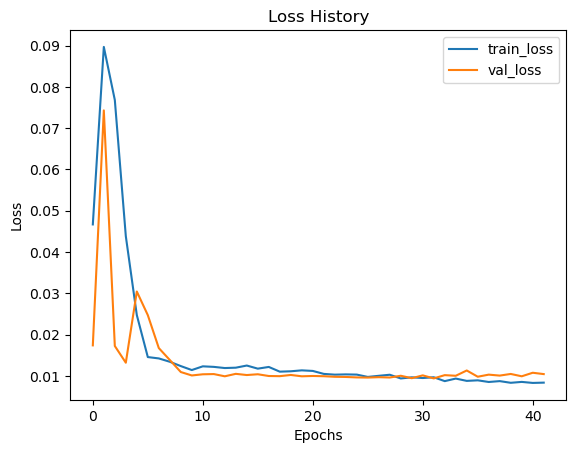

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

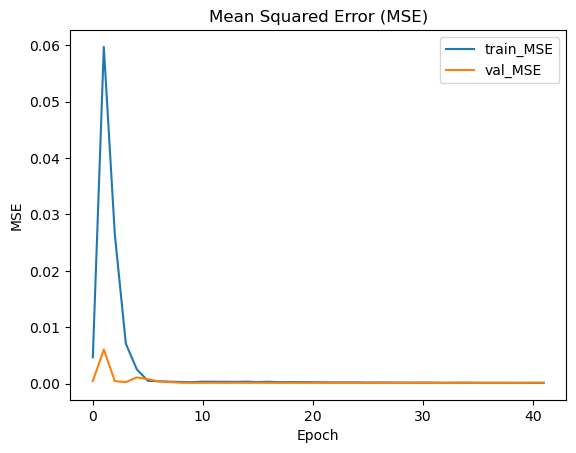

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

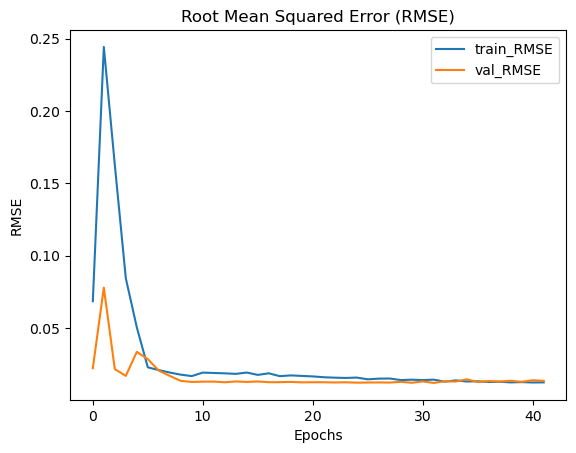

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

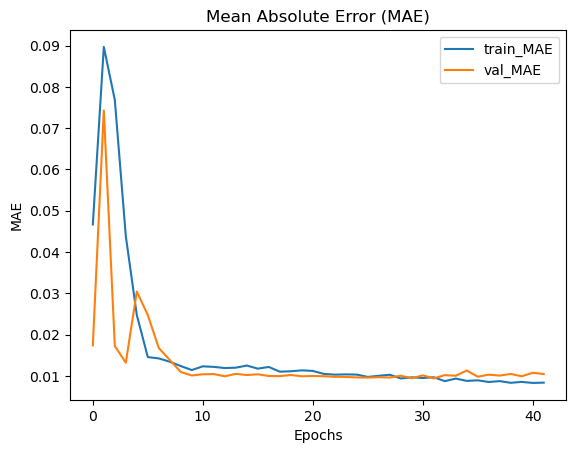

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

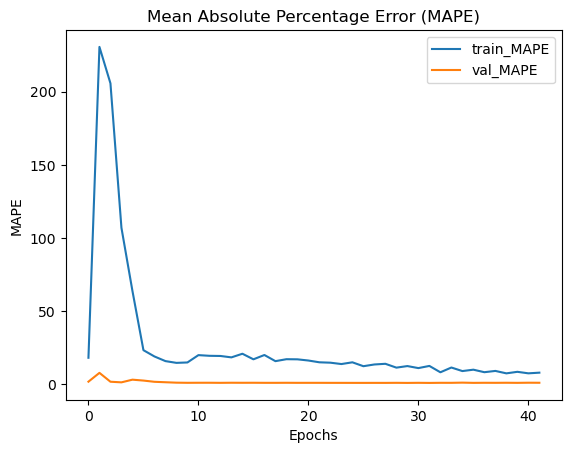

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 01:07:18.889082: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


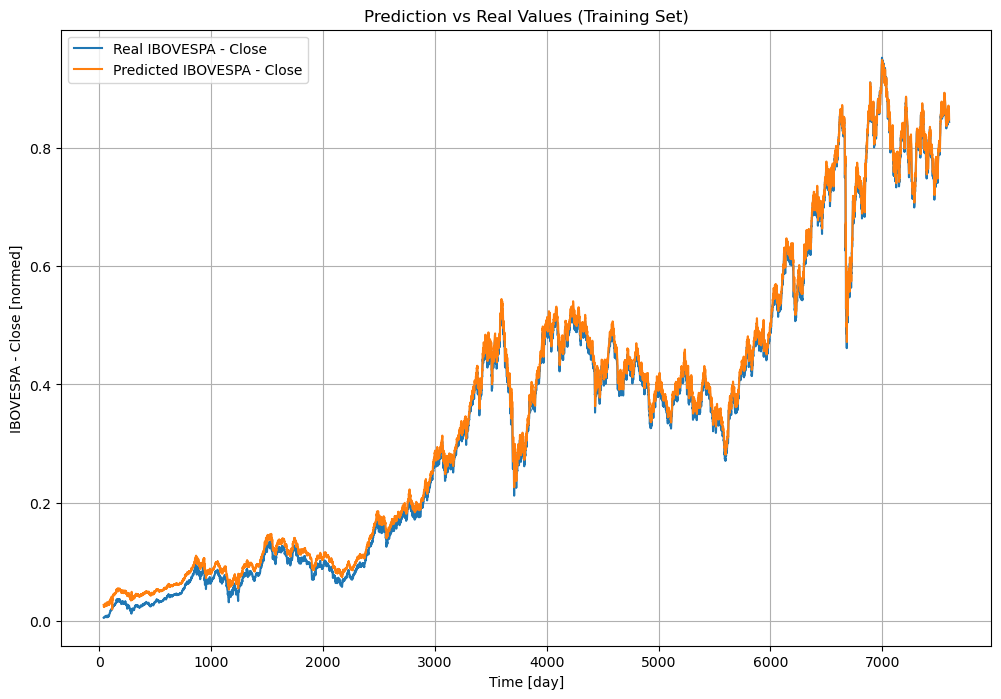

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


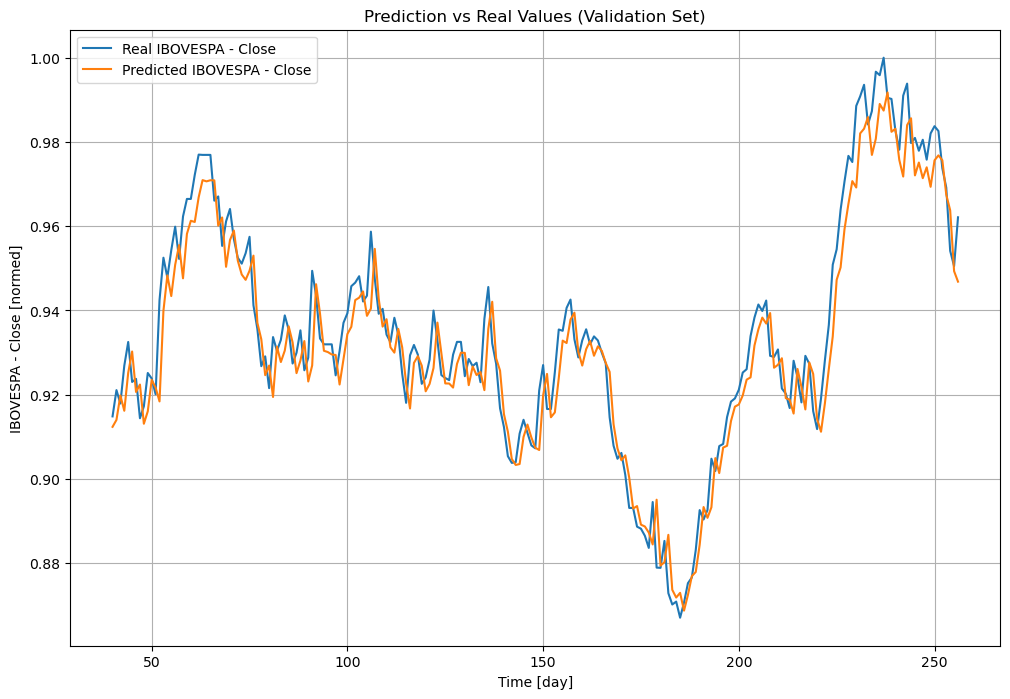

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


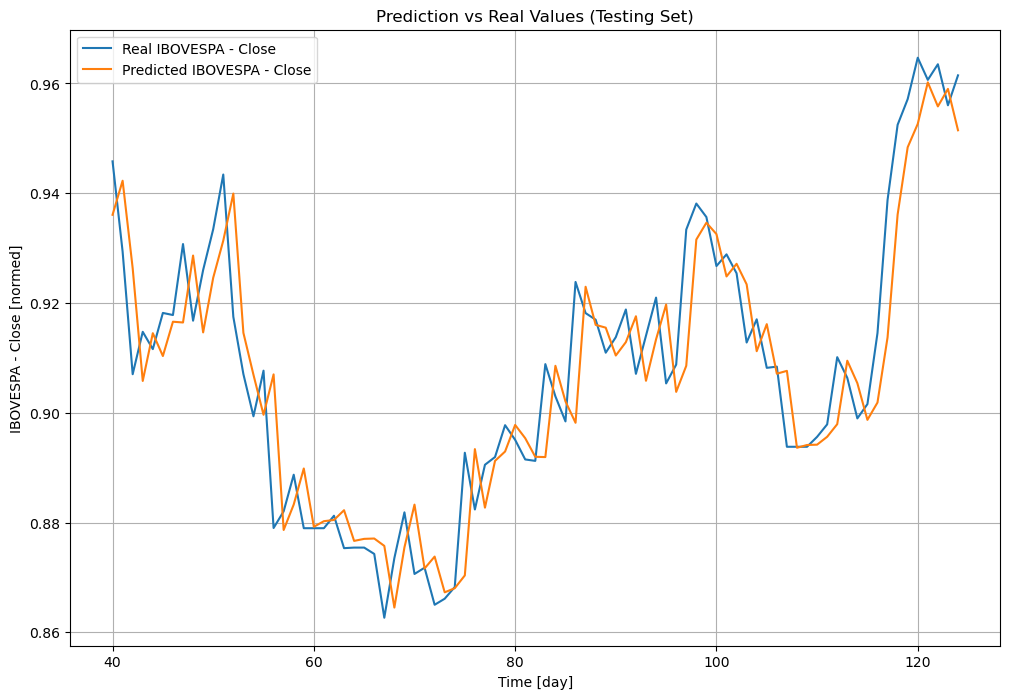

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

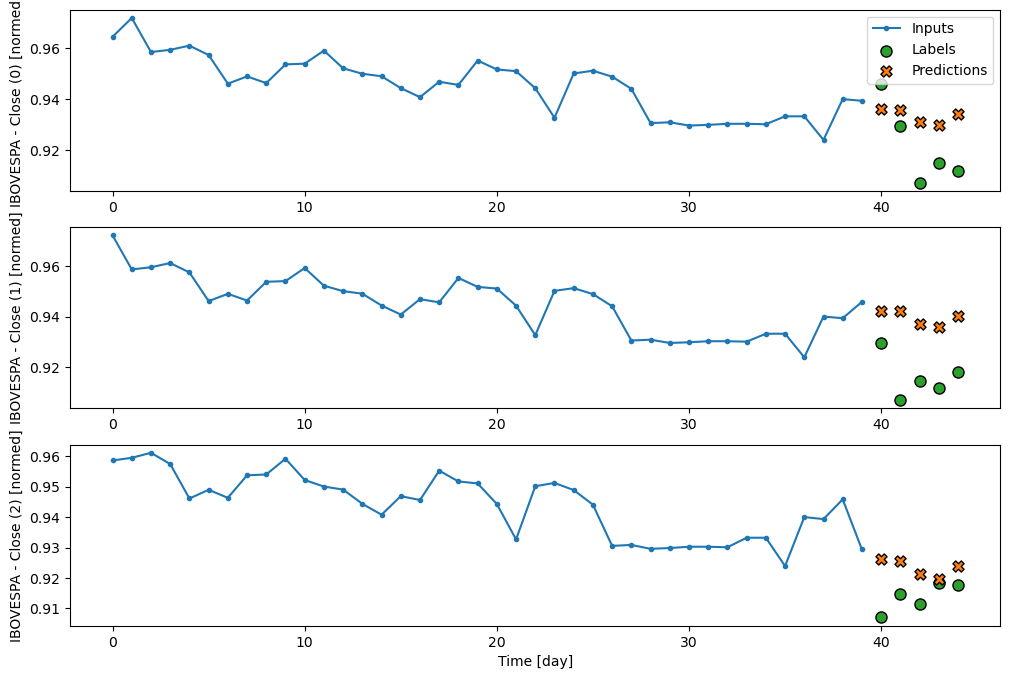

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:6m:45s:926ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


array([[[0.93607163, 0.93607163, 0.93607163, ..., 0.93607163,
         0.93607163, 0.93607163],
        [0.9358708 , 0.9358708 , 0.9358708 , ..., 0.9358708 ,
         0.9358708 , 0.9358708 ],
        [0.9309429 , 0.9309429 , 0.9309429 , ..., 0.9309429 ,
         0.9309429 , 0.9309429 ],
        [0.92990065, 0.92990065, 0.92990065, ..., 0.92990065,
         0.92990065, 0.92990065],
        [0.93413407, 0.93413407, 0.93413407, ..., 0.93413407,
         0.9341339 , 0.9341339 ]],

       [[0.9422791 , 0.9422791 , 0.9422791 , ..., 0.9422791 ,
         0.9422791 , 0.9422791 ],
        [0.9420786 , 0.9420786 , 0.9420786 , ..., 0.9420786 ,
         0.9420786 , 0.9420786 ],
        [0.9369509 , 0.9369509 , 0.9369509 , ..., 0.9369509 ,
         0.9369509 , 0.9369509 ],
        [0.9359246 , 0.9359246 , 0.9359246 , ..., 0.9359246 ,
         0.9359246 , 0.9359246 ],
        [0.94017804, 0.94017804, 0.94017804, ..., 0.94017804,
         0.9401783 , 0.9401783 ]],

       [[0.9263389 , 0.9263389 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')